# OCR Cookbook

---

## OCR Exploration and Simple Structured Outputs (Deprecated)
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model (we recommend using the new Annotations feature instead for better results).

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B

---

**For a more up to date guide on structured outputs visit our [Annotations cookbook](https://github.com/mistralai/cookbook/blob/main/mistral/ocr/data_extraction.ipynb) on Data Extraction.**


## Setup

First, let's install `mistralai` and download the required files.

In [12]:
%%capture
!pip install mistralai

### Download PDF and image files

In [13]:
%%capture
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [14]:
# Initialize Mistral client with API key
from mistralai import Mistral

api_key = "ulLwPOiwc5wM1NciGzW8khNDlMXITmpp" # Replace with your API key
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [15]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("/content/NeftKhim_2025_02.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# \u0421\u041e\u0414\u0415\u0420\u0416\u0410\u041d\u0418\u0415 \n\n\u0422\u043e\u043c 65, \u043d\u043e\u043c\u0435\u0440 2, 2025\n\n\u0411\u0438\u043c\u0435\u0442\u0430\u043b\u043b\u0438\u0447\u0435\u0441\u043a\u0438\u0435 \u043a\u0430\u0442\u0430\u043b\u0438\u0437\u0430\u0442\u043e\u0440\u044b \u0432 \u043e\u043a\u0438\u0441\u043b\u0438\u0442\u0435\u043b\u044c\u043d\u043e\u043c \u043e\u0431\u0435\u0441\u0441\u0435\u0440\u0438\u0432\u0430\u043d\u0438\u0438 \u0443\u0433\u043b\u0435\u0432\u043e\u0434\u043e\u0440\u043e\u0434\u043d\u044b\u0445 \u0444\u0440\u0430\u043a\u0446\u0438\u0439 (\u043e\u0431\u0437\u043e\u0440)\n\u0410. \u0412. \u0410\u043d\u0438\u0441\u0438\u043c\u043e\u0432, \u0410. \u0412. \u0410\u043a\u043e\u043f\u044f\u043d, \u041d. \u0410. \u0421\u0438\u043d\u0438\u043a\u043e\u0432\u0430, \u041e. \u041e. \u0413\u0443\u043b\u044c\n\n\u0412\u044b\u0441\u043e\u043a\u043e\u044d\u0444\u0444\u0435\u043a\u044

View the result with the following:

# СОДЕРЖАНИЕ 

Том 65, номер 2, 2025

Биметаллические катализаторы в окислительном обессеривании углеводородных фракций (обзор)
А. В. Анисимов, А. В. Акопян, Н. А. Синикова, О. О. Гуль

Высокоэффективное гидрирование гваякола на $\mathrm{Ru} / \mathrm{TiO}_{2}$, полученном с применением рутенийсилоксанового олигомера
А. А. Садовников, Е. Р. Наранов, Р. А. Родригес Пинеда, А. Н. Тарасенков, А. М. Музафаров, А. Л. Максимов

Особенности состава и структуры асфальтенов и смол остаточного продукта комбинированного термо- и гидрокрекинга гудрона в суспензионной фазе
М. Р. Якубов, А. А. Храмов, М. Р. Идрисов, Ю. Ю. Борисова, Д. Н. Борисов, С. Г. Якубова, Э. Г. Тазеева, Д. И. Тазеев

Повышение термической стабильности бионефти путем нейтрализации и каталитический крекинг стабилизированных продуктов
П. С. Кузнецов, В. Р. Атласов, Н. А. Калинина, К. И. Дементьев, Е. P. Наранов, K. Wang, Z. Luo

Совместная каталитическая переработка полиэтилентерефталата и поликарбоната в ароматические углеводороды на фосфиде никеля
М. А. Голубева, М. Мухтарова

Новый метод синтеза добавок для снижения содержания оксидов серы в газах регенерации процесса каталитического крекинга
Т. В. Бобкова, К. И. Дмитриев, О. В. Потапенко

Получение и фотокаталитические свойства композитных фотокатализаторов $\mathrm{TiO}_{2}$-MCM-22
А. А. Садовников, Е. Р. Наранов, К. Н. Новоселова, Р. А. Родригес Пинеда, А. Л. Максимов

Исследование процесса гидрооблагораживания петролатумов для производства улучшенных нефтяных церезинов
Д. Ю. Махин, В. А. Лаврентьев, И. А. Пронченков, В. М. Капустин, А. А. С. Ахмед

Никельфосфидный катализатор на основе мезопористого наносферического полимера в процессе гидрирования гваякола и фурфурола
И. И. Шакиров, М. П. Бороноев, Е. А. Ролдугина, Ю. С. Кардашева, С. В. Кардашев

.

# БИМЕТАЛЛИЧЕСКИЕ КАТАЛИЗАТОРЫ В ОКИСЛИТЕЛЬНОМ ОБЕССЕРИВАНИИ УГЛЕВОДОРОДНЫХ ФРАКЦИЙ (ОБЗОР) 

(C) 2025 г. А. В. Анисимов*, А. В. Акопян, Н. А. Синикова, О. О. Гуль<br>Московский государственный университет имени М. В. Ломоносова, химический факультет, Москва, 119991 Россия<br>*E-mail: sulfur45@mail.ru<br>Поступила в редакцию 6 марта 2025 г.<br>После доработки 29 марта 2025 г.<br>Принята к публикации 19 апреля 2025 г.


#### Abstract

Рассмотрены проблемы окислительного обессеривания модельных углеводородных смесей и реальных моторных топлив в присутствии биметаллических гетерогенных катализаторов. Значительное внимание уделено работам по различным методам получения гетерогенных биметаллических катализаторов с использованием разнообразных твердых носителей. Обсуждается проявление такими каталитическими системами синергизма окислительных процессов, связанного с различными свойствами металлов в биметаллических системах, в том числе появлением у этих систем кислотных функций.


Ключевые слова: окислительное обессеривание, биметаллические катализаторы, синергизм, гетерогенный катализ

DOI: 10.31857/S0028242125020014, EDN: KLGCTU

## ПРОЦЕССЫ ОБЕССЕРИВАНИЯ УГЛЕВОДОРОДНОГО СЫРЬЯ И ОСНОВНЫЕ МЕТОДЫ ЕГО РЕАЛИЗАЦИИ

Мировой спрос на энергетические ресурсы постоянно растет, при этом ужесточаются экологические требования к потребляемым моторным топливам, производимым из сырой нефти. Это оказывает давление на нефтеперерабатывающую отрасль, которая сталкивается с истощением запасов легких нефтей и увеличением направляемого на переработку высокосернистого и тяжелого сырья. Присутствие серосодержащих соединений в топливе отрицательно влияет на его качество, отравляет катализаторы нефтепереработки, а также несет угрозу окружающей среде из-за образования при сгорании топлива оксидов серы $\mathrm{SO}_{2}$, являющихся одной из причин кислотных дождей и негативно отражающихся на здоровье людей. Эти обстоятельства привели

к созданию строгих регламентов по содержанию серы в моторных топливах [1]. Так, на территории Российской Федерации сейчас действует норма по содержанию серы в товарных бензиновой и дизельной фракциях не более 10 ppm [2].

Существуют различные способы удаления сернистых соединений из углеводородного сырья: гидроочистка, гидрокрекинг, окислительное обессеривание, биодесульфуризация, экстракционное и адсорбционное обессеривание.

Гидроочистка - наиболее распространенный метод обессеривания, его масштабы достигают сотни миллионов тонн перерабатываемого сырья в год, процесс капиталоемкий и требует жестких условий проведения (высокие температура и давление водорода), что приводит к нежелательным побочным реакциям [3].

Экстракционное обессеривание обеспечивает извлечение соединений серы из углеводо-

родных фракций действием селективных экстрагентов, для чего используют полярные растворители и ионные жидкости (ИЖ) [4, 5]. Экстракционное обессеривание с использованием ИЖ имеет ряд недостатков: неизвестно их влияние на экосистему, возможность экстрагирования ароматических углеводородов, применение ИЖ ограничивает их высокая стоимость, несмотря на возможность регенерации, которая также требует затрат. Высокая взаимная растворимость ИЖ с нефтью затрудняет их отделение после экстракции, а для эффективного обессеривания требуется большое количество экстрагента, что увеличивает затраты и снижает общую эффективность метода [5].

Биодесульфуризация - мягкий метод превращения нерастворимой в воде органической серы в водорастворимые соединения; его применение ограничено необходимостью использования высокоактивных биокатализаторов, большого объема реактора для процесса и эффективного отделения живых микробных клеток от нефти, а также их хранения на нефтеперерабатывающих заводах [6]. Данный способ больше подходит в качестве дополнительного процесса доочистки нефтепродуктов к технологии гидрообессеривания [7].

При адсорбционном обессеривании выбирается подходящий твердый адсорбент для селективной адсорбции соединений серы из дистиллятных фракций и удаления их из топлива. Ключевой момент адсорбционного обессеривания - выбор адсорбентов, в качестве которых в настоящее время используют молекулярные сита, активированный уголь, оксиды металлов и композитные металлоксидные глины [8]. Основная проблема этого метода - необходимость использования недорогого адсорбента с большой площадью поверхности, высокой пористостью и возможностью специфически адсорбировать сернистые соединения из нефтяных фракций. Адсорбент должен быть легко регенерируемым, но адсорбционная способность может значительно снижаться после регенерации, что требует его частого обновления и увеличивает эксплуатационные расходы $[9,10]$.

По сравнению с остальными методами окислительное обессеривание наиболее перспективно благодаря мягким условиям процесса, доступным окислителям и простоте его осуществления [11-14]. Окислительное обессерива-

ние - двухстадийный процесс удаления серы из углеводородного сырья: сначала сернистые соединения в углеводородной фракции окисляют до сульфонов действием подходящего окислителя в присутствии жидкофазного или твердого гетерогенного катализатора, затем окисленные соединения серы отделяют от углеводородной фракции действием подходящих экстрагентов или адсорбентов, используя различия в свойствах с углеводородными компонентами $[1,15]$.

Процессы окислительного обессеривания могут эффективно протекать как в гомогенных, так и в гетерогенных каталитических системах. Гомогенные катализаторы обладают высокой эффективностью, однако их основной недостаток - сложность разделения и невозможность повторного использования, что делает их менее предпочтительными в практическом применении. Гетерогенные катализаторы на основе твердых носителей с развитой поверхностью демонстрируют бо́льшую активность по сравнению с жидкофазными гомогенными катализаторами, а их применение облегчает возможность повторного использования катализатора для последующих реакций. При гетерогенизации различных систем в качестве носителей могут быть использованы $\mathrm{Al}_{2} \mathrm{O}_{3}, \mathrm{SiO}_{2}$, мезопористые силикаты, цеолиты и SBA [15], а в качестве активной фазы - оксиды металлов, полиоксометаллаты (ПОМ) и ИЖ [16-18]. Преимущество мезопористых силикатов состоит в возможности их легкой модификации через поверхностные силанольные группы, что упрощает иммобилизацию активной фазы [19].

Структурные параметры носителя, используемого для приготовления катализатора окислительного обессеривания, особенно размер пор, должны обеспечивать беспрепятственную диффузию молекул ароматических серосодержащих соединений, диаметр которых обычно варьируется от 1 до 1,5 нм [20]. Мезопористые носители, такие как SBA-15 [21], SBA-16 [22], MCM-41 [23], HMS [24] и KIT-6 [25], представляются наиболее подходящими для приготовления гетерогенных катализаторов окисления сернистых соединений и, как следствие, окислительного обессеривания углеводородного сырья. Среди этих носителей SBA-15 выделяется своей хорошо развитой поверхностью, равномерным распределением пор и высокой термической стабильностью. Наличие силанольных

групп на поверхности SBA-15 позволяет легко модифицировать его химическими соединениями, что открывает новые возможности для повышения каталитической активности окислительной системы [21].

Оксиды переходных металлов в качестве активной фазы находят широкое использование при приготовлении катализаторов процесса окисления серосодержащих соединений благодаря своей доступности, легкости синтеза и стабильности в присутствии органических растворителей. Каркас мезопористых материалов может быть модифицирован с использованием соединений различных переходных металлов, таких как молибден [14], ванадий [21], титан [26], железо [27], хром [28], кобальт [29] и медь [30], что позволяет повысить каталитическую активность системы.

Несомненным преимуществом по сравнению с монометаллическими катализаторами обладают биметаллические системы, в которых появляется возможность регулирования окислительной способности контакта подбором бинарной смеси различных металлов, а также добавления кислотной функции, усиливающей эту способность [31]. Это обстоятельство представляется особенно важным, так как окисление сернистых соединений ускоряется в кислой среде [15]. Добавление второго металла может дополнительно повысить окислительно-восстановительные и кислотные свойства катализатора, способствующие росту эффективности реакций окисления.

Так, биметаллические катализаторы, содержащие оксиды молибдена, имеют преимущество перед монометаллическими благодаря возможности реализации двух механизмов окисления: радикального и через образование пероксокомплексов, что приводит к высокой эффективности удаления серы из углеводородных смесей [32]. Добавки оксидов других металлов к оксидам молибдена значительно улучшают селективность катализаторов, что позволяет достичь практически полного удаления серы из модельных смесей и реальных нефтяных фракций. Таким образом, использование соединений двух металлов является предпочтительным для формирования активной фазы катализатора и эффективным способом создания гетерогенной каталитической системы для окислительного обессеривания углеводородного сырья.

## ПОЛУЧЕНИЕ БИМЕТАЛЛИЧЕСКИХ КАТАЛИЗАТОРОВ

Известны следующие методы синтеза биметаллических оксидных катализаторов: метод пропитки по влагоемкости [33], метод совместного осаждения [34], золь-гель-метод [35], плазменный синтез [36], атомно-слоевое осаждение [37], синтез в обратных мицеллах [38], метод химического осаждения из газовой фазы [39].

Существуют два основных варианта метода пропитки: по влагоемкости и с избытком раствора. В пропитке по влагоемкости носитель пропитывают раствором, объем которого равен или немного превышает объем пор носителя [40], впитывание раствора в поры происходит за счет капиллярных сил. Во втором варианте проводят пропитку оксидов, цеолитов и углеродного носителя избытком растворов нитратов, ацетатов или хлоридов металлов. После сушки и прокаливания при высокой температуре ( $300-800^{\circ} \mathrm{C}$ ) образуется активная фаза. Данный метод позволяет контролировать состав, но ограничивает количество наносимых металлов (5-10\%) и может приводить к неравномерному их распределению на носителе или укрупнению частиц активной фазы $[42,43]$.

Совместное осаждение позволяет точно контролировать состав, размер частиц и дисперсность металлов. При одновременном осаждении соединений металлов из раствора добавление осадителя приводит к образованию нерастворимых соединений металлов. Полученный осадок выдерживают в растворе, промывают и сушат, формирование активной фазы происходит в процессе прокаливания при высокой температуре. Этот этап требует тщательного контроля, так как может привести к образованию нежелательных фаз, изменению размера пор носителя и появлению примесей [43, 44].

Метод химического осаждения из газовой фазы, основанный на взаимодействии газообразных соединений металлов с поверхностью носителя при повышенных температурах, позволяет получать наноразмерные биметаллические частицы с узким распределением по размерам, что приводит к высокой удельной поверхности катализатора и улучшенным каталитическим свойствам. Метод является относительно простым и легко масштабируемым, что делает его перспективным для промышленного применения [45].

Варьируя состав золь-геля, удается получать биметаллические катализаторы с высокой степенью дисперсности и равномерным распределением компонентов на атомном уровне, а изменяя условия синтеза ( pH , температуру, соотношение соединений металлов, добавки), можно контролировать размер, форму и пористость получаемых материалов. На первой стадии соединения металлов, такие как алкоксиды или соли, подвергаются гидролизу в растворе, с последующей конденсацией образующихся гидроксидов в коллоидную систему - золь. Стадия старения золя позволяет увеличить его вязкость и модуль упругости, подготавливая к процессу сушки. В зависимости от метода сушки - на воздухе (ксерогель), в сверхкритических условиях (аэрогель) или лиофильной сушкой (криогель) - можно получать материалы с различной пористостью и текстурой. На заключительной стадии прокаливания при температурах $300-500^{\circ} \mathrm{C}$ удаляются остатки органики и происходит окончательное формирование структуры катализатора [46-49].

При плазменном методе синтеза биметаллических катализаторов используют ионизированный в плазме газ с высокой концентрацией возбужденных частиц, образующихся при передаче энергии к газу через электрический разряд или лазерное излучение. В плазму вводятся металлы или их оксиды в виде газа, жидкости или мелкодисперсного порошка, высокоэнергетические частицы плазмы сталкиваются с соединениями металлов, передавая им энергию и вызывая их распад на атомы, ионы или радикалы, которые взаимодействуют друг с другом и с частицами плазмы, образуя наночастицы катализатора с заданным составом. Наночастицы катализатора осаждаются на поверхность носителя, быстрое охлаждение плазмы после синтеза «замораживает» структуру полученных наночастиц, предотвращая их агрегацию и сохраняя высокую дисперсность катализатора [50]. Так, для пероксидного окисления тиофена, тиоанизола и дибензотиофена были использованы композиции из оксидных слоев Ce , $\mathrm{Zr}, \mathrm{Ce}+\mathrm{Zr}, \mathrm{W}, \mathrm{W}+\mathrm{Zn}$, нанесенных на поверхность титана методом плазменно-электролитического оксидирования. Различие в механизме каталитического действия композиций разного состава было выявлено методом радикального ингибирования [51].

Методами сканирующей (СЭМ) и просвечивающей электронной микроскопии (ПЭМ),

а также рентгеновской фотоэлектронной спектроскопии (РФЭС) установлено, что биметаллические катализаторы, полученные лазерным электродиспергированием плотно спрессованных бинарных смесей порошков NiMo и NiWc нанесением на оксид алюминия, содержащие на поверхности наночастицы оксидов Ni и Mo или W , находятся преимущественно в окисленном состоянии; при этом оба компонента каждой пары равномерно распределены на поверхности носителя в виде частиц размером $4-7$ нм [52].

Биметаллические катализаторы, полученные таким образом, обладают высокой дисперсностью, равномерным распределением активной фазы и высокой чистотой. Благодаря взаимодействию различных металлов и воздействию плазмы в процессе синтеза формируются активные центры с уникальными электронными свойствами. Данный метод имеет недостаток в виде ограничения в соединениях металлов, так как не все материалы подходят для плазменного синтеза изза высоких температур и реакционной способности плазмы, а энергоемкость процесса также увеличивает стоимость синтеза.

Синтез в обратных мицеллах использует микроэмульсии для получения металлических частиц заданного размера, нанесенных на носитель. Вначале формируют микроэмульсию, растворяя соединения металлов в водной среде внутри неионногенного ПАВ. Добавление к этой смеси раствора восстановителя в масляной фазе приводит к образованию обратных мицелл. Введение носителя и последующее разрушение мицелл дестабилизирующим агентом, например ацетоном, обеспечивает адсорбцию частиц металла на поверхности носителя [53].

Основанный на поочередной подаче газообразных предшественников на нагретую подложку с разделением продувкой инертным газом метод атомно-слоевого осаждения (АСО) позволяет создавать тонкие пленки и точно контролировать состав, морфологию и структуру наночастиц. Благодаря самоограничивающимся реакциям на поверхности метод обеспечивает точный контроль толщины пленки с атомарной точностью, что делает его идеальным для создания равномерных покрытий на сложных поверхностях в биметаллических катализаторах и в микроэлектронике. Для создания высокоэффективных катализаторов необходим также ато-

марный контроль структуры активных центров, и именно метод атомно-слоевого осаждения позволяет точно контролировать состав, однородность, размер и структуру биметаллических катализаторов. Такой подход способствует глубокому пониманию механизмов катализа на атомарном уровне $[54,55]$.

Высокоэффективный и стабильный катализатор для восстановления в цинк-воздушных батареях получен осаждением смешанного $\mathrm{Mn}-\mathrm{Fe}-$ оксида методом атомно-слоевого осаждения (АСО). Полученные пленки $\mathrm{Mn}-\mathrm{Fe}$-оксида с регулируемым составом обладают равномерным покрытием из кубической шпинели ( $\mathrm{Mn}, \mathrm{Fe}$ ) на частицах углерода воздушного электрода. Биметаллический катализатор продемонстрировал превосходную электрокаталитическую активность и стабильность в составе цинк-воздушных батарей, сохранив более $84 \%$ эффективности после 600 ч циклического использования, что значительно превышает показатели традиционных катализаторов на основе благородных металлов [56].

Каждый из описанных методов синтеза биметаллических катализаторов имеет свои специфические преимущества и недостатки, что позволяет выбирать наиболее подходящий способ синтеза в зависимости от требуемых свойств катализатора.

Плазменный синтез обеспечивает высокую дисперсность и равномерное распределение активной фазы, однако он ограничен в выборе соединений металлов из-за высоких температур и энергоемкости процесса, а использование холодной плазмы для синтеза катализаторов показывает высокую эффективность в реакциях дегидрирования. Метод АСО, в свою очередь, позволяет точно контролировать состав, морфологию и толщину пленок, что делает его особенно перспективным для создания биметаллических и триметаллических оксидных катализаторов. Метод пропитки представляет собой один из наиболее простых и экономически выгодных способов синтеза биметаллических катализаторов, его применение позволяет легко контролировать соотношение компонентов и обеспечивает высокую адсорбцию активной фазы на носителе. Это делает его особенно привлекательным для промышленного применения, где важны как эффективность, так и экономическая целесообразность.

## ПРОЦЕССЫ ОКИСЛИТЕЛЬНОГО ОБЕССЕРИВАНИЯ В ПРИСУТСТВИИ БИМЕТАЛЛИЧЕСКИХ КАТАЛИЗАТОРОВ

В ходе окислительного обессеривания сернистые соединения окисляются в сульфоны и другие ценные продукты, обладающие более высокими полярными свойствами по сравнению с углеводородными компонентами, что облегчает удаление серы из нефтяного топлива. Для достижения высокой эффективности и селективности процесса ключевыми факторами являются состав катализатора и условия реакции [57]. В качестве катализаторов окислительного обессеривания применяются системы на основе металлоорганических каркасов (MOF) [58], полиароматических каркасов (PAF) [59], титановых нанотрубок [60], оксидов металлов [61], ИЖ [62].

Наибольший интерес представляют катализаторы на основе оксидов переходных металлов, так как они демонстрируют высокую активность и селективность в процессе обессеривания [63]. Монометаллические катализаторы на основе оксидов переходных металлов были многократно исследованы в процессе обессеривания нефтяных фракций и моделирующих их смесей при окислении молекулярным кислородом и другими окислителями и показали свою достаточно высокую эффективность и селективность [11-14]. Например, катализатор на основе оксида вольфрама, нанесенный на магнитный мезопористый кремнезем (MMS), продемонстрировал высокую эффективность в процессе окислительного обессеривания дизельного топлива; при оптимальных условиях реакции: температура $120^{\circ} \mathrm{C}$, продолжительность процесса 8 ч, удалось достичь $99,9 \%$ удаления серы для дифенилсульфида, 4-метилдибензотиофена $98,2 \%, 4,6$-диметилдибензотиофена - $92,3 \%$ [64].

Способность переходных металлов легко менять свою степень окисления и взаимодействовать как с кислородом, так и с серосодержащими молекулами, а также их способность образовывать активные пероксокомплексы создает возможность их использования в би- и полиметаллических системах и делает их эффективными компонентами катализаторов окислительного обессеривания $[65,66]$.

Биметаллические катализаторы по сравнению с монометаллическими катализаторами демонстрируют лучшее распределение активных

центров. Это связано с синергетическим взаимодействием между двумя металлами, что способствует образованию более активных и доступных каталитических центров. Например, в катализаторе на основе ванадий-марганцевых оксидов (VMn-MS) наблюдается улучшенное распределение активных компонентов, что позволяет значительно повысить эффективность окислительного обессеривания. Синергетическое взаимодействие между ванадием и марганцем создает два разных пути реакции, что увеличивает каталитическую активность. В результате катализатор VMn-MS позволяет добиться почти $100 \%$-го удаления серы за 60 мин при $80^{\circ} \mathrm{C}$, что значительно превосходит результаты в присутствии монометаллических катализаторов [67].

Примером использования биметаллических катализаторов для окисления сераорганических соединений является работа [68], где было осуществлено полное окисление диметилдисульфида в присутствии катализаторов PtAu и CuAu , нанесенных на $\mathrm{Al}_{2} \mathrm{O}_{3}, \mathrm{CeO}_{2}$ и $\mathrm{CeO}_{2}-\mathrm{Al}_{2} \mathrm{O}_{3}$, среди которых катализатор CuAu проявил более высокую активность, чем катализатор PtAu.

В работе [69] был изучен синергетический эффект присутствия двух металлов - железа и ванадия - в составе мезопористого носителя HMS при окислении ДБТ. Наличие железа и ванадия в катализаторе $\mathrm{Fe}-\mathrm{V}-\mathrm{HMS}$ создает синергетический эффект, проявляющийся в повышении об-

щей кислотности и каталитической активности системы. Данный катализатор демонстрирует способность практически полностью окислять ДБТ до более полярного сульфона, что облегчает его адсорбцию на поверхности катализатора (рис. 1).

Авторы указывают, что для извлечения окисленных соединений из модельной смеси не требуется применения растворителя, поскольку сам катализатор выполняет роль адсорбента, на котором накапливаются окисленные соединения серы. Это двойное действие катализатора, совмещающего функции активного компонента и адсорбента, существенно увеличивает эффективность процесса обессеривания. Такая перспектива одноэтапного процесса окислительного обессеривания без необходимости экстракции сульфонов из окисленного топлива с использованием химических растворителей предоставляет значительные преимущества для сероочистки топлива.

Системы на основе переходных металлов обладают высокой эффективностью в окислении серосодержащих соединений. Известно, что молибден привлекает значительное внимание благодаря своей высокой каталитической активности в процессе глубокого обессеривания [70]. Катализаторы на основе молибдена обладают высокой селективностью при окислении ДБТ до сульфона ДБТ, что делает их эффективными
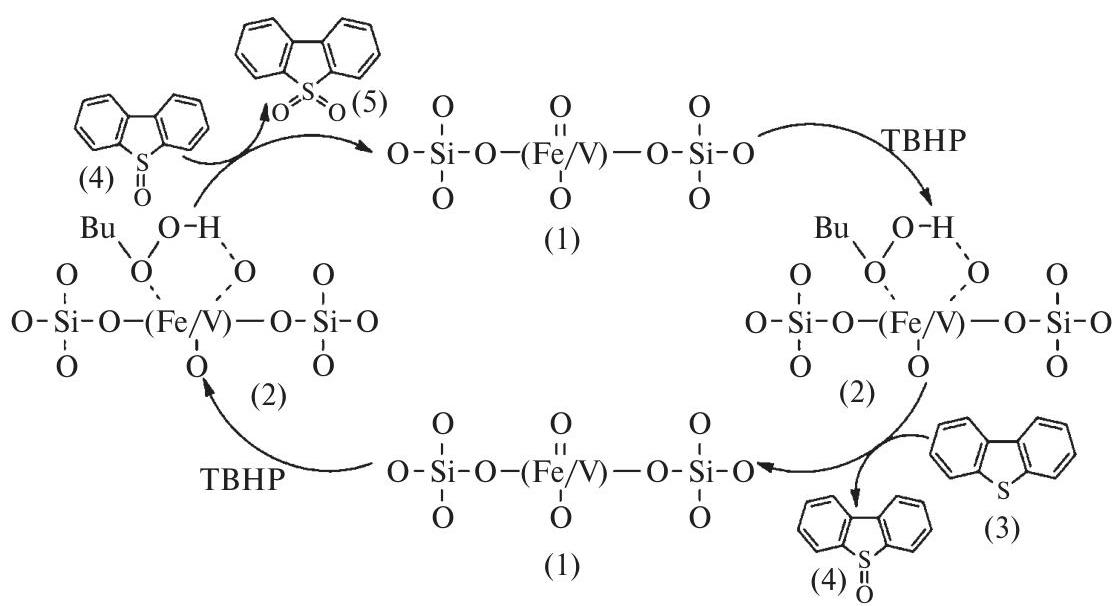

Рис. 1. Предполагаемый механизм окисления дибензотиофена в присутствии катализатора $\mathrm{Fe}-\mathrm{V}-\mathrm{HMS}$ и окислителя трет-бутилгидропероксида (по материалам [69]).

в процессе обессеривания. В работе [71] в качестве добавки к молибденсодержащему катализатору был предложен лантан, который улучшает каталитическую активность благодаря более эффективному взаимодействию с серосодержащими соединениями по сравнению с катализатором без лантана. Были синтезированы три биметаллических катализатора на основе молибдена и лантана (9\%La1\%Mo/ZSM-11, 7\%La3\%Mo/ ZSM-11 и 5\%La5\%Mo/ZSM-11), из которых при различных температурах образец $7 \% \mathrm{La} 3 \% \mathrm{Mo} /$ ZSM-11, обладая схожей эффективностью с $5 \% \mathrm{La} 5 \% \mathrm{Mo} / \mathrm{ZSM}-11$, был рекомендован как более предпочтительный вследствие меньшей токсичности молибдена. Все синтезированные катализаторы позволяют достичь $100 \%$-ной конверсии ДБТ на 60 -й минуте реакции.

В работе [72] был исследован катализатор V/W-HMS в процессе окислительного обессеривания модельного дизельного топлива, содержащего ДБТ. Результаты показали, что он продемонстрировал высокую каталитическую активность, снижая содержание ДБТ в смеси на $95 \%$. Синергетический эффект ванадия и вольфрама состоит в уменьшении ширины запрещенной зоны металлической фазы катализатора, что облегчает переход электронов из валентной зоны в проводящую и повышает каталитическую активность материала. Это способствует более легкому образованию свободных радикалов и активных окислительных частиц, необходимых для окисления ДБТ.

В работе [73] был изучен вероятный механизм окисления сернистых соединений в присутствии биметаллического катализатора $\mathrm{WO}_{3} / \mathrm{MoO}_{3} / \mathrm{Al}_{2} \mathrm{O}_{3}$ (рис. 2). По мнению авторов, окисление ДБТ до сульфона ДБТ начинается с образования гидропероксомолибдата через нуклеофильную атаку трет-бутилгидропероксида на активные центры молибдена на поверхности носителя оксида алюминия. Затем гидропероксомолибдат превращается в пероксид молибдена с выделением трет-бутанола. Окисление атома серы в молекуле ДБТ происходит через нуклеофильную атаку на пероксокомплекс, что приводит к образованию сульфоксида и восстановлению пероксида молибдена, сульфоксид затем окисляется до сульфона (рис. 2).

В работе [73] также было изучено влияние второго металла (вольфрама, титана или ванадия) на активность молибденсодержащего ка-
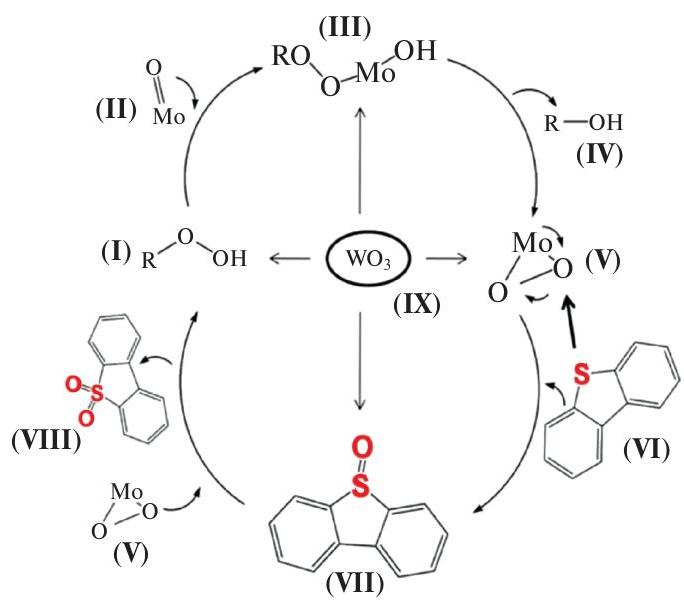

Рис. 2. Механизм окисления сернистых соединений в присутствии бифункционального катализатора $\mathrm{WO}_{3} / \mathrm{MoO}_{3} / \mathrm{Al}_{2} \mathrm{O}_{3}$ (по материалам [73]).

тализатора. Эффективность катализаторов, содержащих смеси двух металлов, уменьшается в порядке: $\mathrm{W} / \mathrm{Mo}>\mathrm{Ti} / \mathrm{Mo}>\mathrm{V} / \mathrm{Mo}$. Катализатор $16,5 \% \mathrm{MoO}_{3} / \mathrm{Al}_{2} \mathrm{O}_{3}$ демонстрирует $90,5 \%$ конверсии ДБТ, в то время как с добавлением вольфрама $\left(4,35 \% \mathrm{WO} / 16,52 \% \mathrm{MoO}_{3} / \mathrm{Al}_{2} \mathrm{O}_{3}\right)$ достигается $100 \%$-ное удаление ДБТ и 4,6-ДМДБТ. Это свидетельствует о том, что вольфрам улучшает дисперсность молибдена и эффективность действия катализатора.

Использование биметаллических систем в катализаторах на основе $\mathrm{MoO}_{x}-\mathrm{VO}_{x}$ обладает значительным преимуществом по сравнению с монометаллическими катализаторами $\mathrm{MoO}_{x} / \mathrm{Al}_{2} \mathrm{O}_{3}$ и $\mathrm{VO}_{x} / \mathrm{Al}_{2} \mathrm{O}_{3}$ [74]. Добавление V к Мо улучшает каталитические свойства, способствуя более сильному связыванию молибденовых частиц с носителем и повышению их дисперсности. Катализатор с содержанием $5 \%$ Мо и $15 \% \mathrm{~V}$ продемонстрировал высокую эффективность, достигая $97 \%$-го окисления сернистых соединений и снижая содержание серы в углеводородной смеси с 619 до 17,3 ppm.

Рентгенофазовый анализ катализатора на основе оксидов Со и Мо выявил существование соединения $\mathrm{CoMoO}_{8}$ как основного компонента во всех образцах, с образованием $\mathrm{Co}_{3} \mathrm{O}_{4}$ или $\mathrm{MoO}_{3}$ при избытке соответствующего металла [75]. Данные РФЭС указывают на проявление элек-

тронодонорного эффекта кобальта, способствующего активации кислорода. Катализатор с мольным соотношением $\mathrm{Co}: \mathrm{Mo}=2: 1$ при проведении окисления модельной смеси продемонстрировал высокую эффективность, обеспечивая практически полную конверсию ДБТ в сульфон ДБТО в мягких условиях. Высокая активность катализатора обусловлена как электронными эффектами, так и наличием поверхностных дефектов, а его стабильность после многократного использования подтверждена методом ИК-спектроскопии. Авторы предлагают механизм реакции, основанный на синергетическом взаимодействии кобальта и молибдена, где Co (II) активирует кислород, а Mo(IV) образует с ним пероксидные частицы, окисляющие сульфиды (рис. 3).

Переходные металлы на поверхности катализатора $\mathrm{CoMo} / \mathrm{SBA}-15$ образуют два типа активных центров: микрокристаллы молибдата, модифицированные Со, и фазу $\beta-\mathrm{CoMoO}_{4}$, что придает таким катализаторам кислотные свойства. Исследования показали, что именно модифицированные кобальтом молибдатные микрокристаллы играют ключевую роль в окислении ДБТ, в то время как частицы $\beta-\mathrm{CoMoO}_{4}$ не проявляют каталитической активности. Повышение концентрации частиц CoMo препятствует образованию неактивной фазы $\beta-\mathrm{CoMoO}_{4}$ и одновременно способствует увеличению количества активных кобальт-модифицированных молибдатных микрокристаллов, что приводит к значительному улучшению каталитической эффективности [76].

Для катализаторов $\mathrm{H}_{3} \mathrm{PW}_{12} \mathrm{O}_{40} / \mathrm{SiO}_{2}-\mathrm{Al}_{2} \mathrm{O}_{3}$ характерно влияние кислотности поверхности катализатора на эффективность окислительного обессеривания модельного топлива. Кислотные центры Льюиса играют ключевую роль в селективном окислении бензотиофена, способствуя его преимущественной адсорбции на поверхности катализатора, в то время как кислотные центры Бренстеда, напротив, снижают селективность процесса [77]. Активность катализатора в окислительном обессеривании повышается с увеличением силы кислотных центров Льюиса, а также плотности кислотных центров Бренстеда [78].

Шпинелевые структуры, содержащие кобальт и марганец в виде частиц $\mathrm{CoMn}_{2} \mathrm{O}_{4}$ и $\mathrm{MnCo}_{2} \mathrm{O}_{4}$, были успешно применены для аэробного окис-
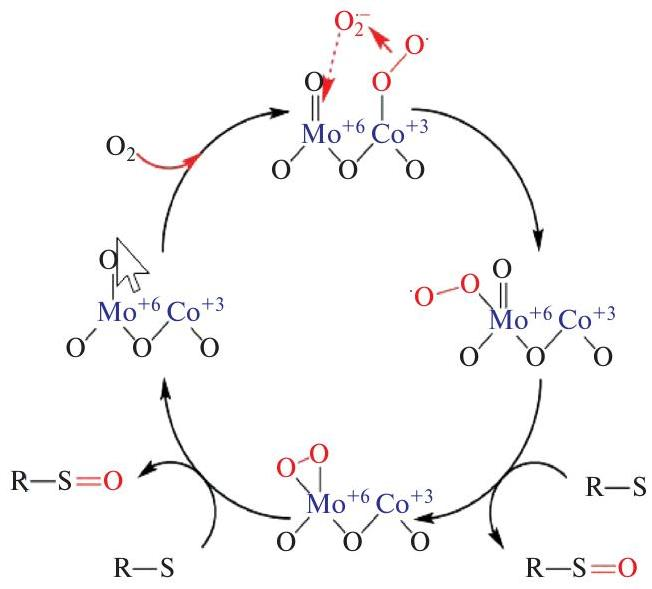

Рис. 3. Предполагаемый механизм активирования кислорода и окисления сульфидов (по материалам [75]).

ления серосодержащих соединений [79]. Высокая активность катализаторов была достигнута существованием в шпинелевой структуре окис-лительно-восстановительных пар $\mathrm{Co}^{2+} / \mathrm{Co}^{3+}$ и $\mathrm{Mn}^{3+} / \mathrm{Mn}^{4+}$, а также высокой подвижностью кислорода. Для аэробного окислительного обессеривания кислородом воздуха были успешно использованы СоМо биметаллические оксиды, которые эффективно катализировали окисление тиофеновых соединений при $80-120^{\circ} \mathrm{C}$ и атмосферном давлении, в то время как индивидуальные оксиды Со или Мо не проявляют каталитической активности. Авторы полагают, что в биметаллической системе частицы Co (II) проявляют способность активировать кислород, а частицы Mo(IV) непосредственно участвуют в окислении сульфидов, образуя реакционноспособные частицы [80].

Высокую активность в окислительной десульфуризации модельной смеси на основе ДБТ проявили содержащие в качестве второго металла Ni , Co и Zn биметаллические катализаторы на основе оксида молибдена, обеспечивая при $40^{\circ} \mathrm{C} 100 \%$-ное удаление ДБТ из смеси с его содержанием 1000 ppm . В качестве носителя служил рекристаллизованный цеолит НY с высокоразвитой мезопористой структурой, пригодной для удаления объемной молекулы ДБТ. Присутствие никеля негативно воздействовало на дисперсию

частиц молибдена, а присутствие кобальта и цинка улучшало дисперсию молибдена. Никель легко взаимодействует со структурой оксида алюминия, что приводит к выделению алюминия и разрушению кристаллической структуры цеолита. Цинк и кобальт ингибируют рост кристаллов $\mathrm{MoO}_{3}$, приводя к улучшению дисперсности молибдена и повышению льюисовской кислотности [81].

Для окислительного обессеривания модельной смеси и реального топлива (бензина) была применена комбинированная экстракционноокислительная система, действующим началом которой были ванадий-хромсодержащие катализаторы, полученные двухстадийным методом пропитки мезопористого силиката KIT-6. Наилучшие результаты - удаление $97 \%$ ДБТ из модельной смеси и $90 \%$ из реального топлива - показал катализатор с максимальным содержанием ванадия, обеспечивавший также сохранение активности после четырехкратного использования и регенерации [82].

Биметаллический церий-ванадиевый катализатор, в котором биметаллическая система $\mathrm{CeVO}_{4} / \mathrm{BNNS}$ нанесена на нитрид бора BNNS, показал хорошие результаты в окислительном обессеривании дизельного топлива. Это было достигнуто благодаря синергетическому эффекту биметаллических оксидов $\mathrm{CeVO}_{4}$ и высокому сродству BNNS к серосодержащим соединениям [83].

Полученный сольвотермальным синтезом биметаллический катализатор SnMo-MOF показал хорошие результаты в окислении в мягких условиях дифенилсульфида и дифурфурилсульфида. Введение олова усиливало льюисовскую кислотность поверхности катализатора, а перенос электрона между оловом и молибденом приводил к синергетическому биметаллическому эффекту, что в итоге дало $98 \%$ селективности окисления сульфидов до соответствующих сульфонов [84].

Алюмосиликатные цеолиты, являясь универсальным материалом, имеют огромное значение для промышленного катализа, поскольку их кислотные центры Бренстеда и Льюиса в значительной степени определяют активность, селективность и стабильность каталитических реакций. В отличие от хорошо изученных кислотных центров Бренстеда, участвующих в кис-лотно-катализируемых реакциях, вопрос об эффективности и роли кислотных центров Льюиса,

образованных алюминием, связанным с каркасом цеолита или находящимся вне его, в реакциях селективного окисления остается открытым. В работе [85] путем точного регулирования времени кислотной обработки ультрастабильного цеолита Y был образован трехкоординированный алюминий, и в результате сформировались трехкоординационные кислотные центры Льюиса, каталитически активные в реакции окислительного обессеривания с использованием пероксида водорода в качестве окислителя. Важно отметить, что активность была связана именно с этими трехкоординированными кислотными центрами Льюиса, а не с кислотными центрами, связанными с внекаркасным алюминием. Наиболее вероятная микроструктура трехкоординированного алюминия с кислотностью Льюиса была подтверждена расчетами функционала плотности. Важно отметить, что как супероксидный, так и гидроксильный радикалы являлись активными формами кислорода в каталитических реакциях. Благодаря своим характеристикам, а именно размеру и свойствам атомов, ионы $\mathrm{Al}^{3+}$ способны легко интегрироваться в кремниевую структуру SBA-15. Замещение ионов $\mathrm{Si}^{4+}$ ионами $\mathrm{Al}^{3+}$ приводит к образованию большого числа кислотных центров Бренстеда и Льюиса, что значительно повышает кислотность материала [26, 86, 87]. Для модификации носителя алюминием применяются различные методы, такие как пропитка по влагоемкости, прямой синтез и постсинтез. Метод постсинтеза обеспечивает наиболее эффективное включение алюминия в структуру материала [88], данные спектроскопии ЯМР подтверждают, что в модифицированных материалах алюминий преимущественно находится в тетраэдрическом окружении, что свидетельствует об успешном встраивании атомов алюминия в кристаллическую структуру материала [89]. Титано-алюмосиликатный катализатор превращает ДБТ в сульфоксид и сульфон через радикальный механизм реакции окисления (рис. 4). Сначала титан реагирует с пероксидом водорода, образуя титановый пероксокомплекс, затем связь $\mathrm{Ti}-\mathrm{O}-\mathrm{Si}$ разрывается, образуя $\mathrm{Ti}-\mathrm{OOH}$ и $\mathrm{Si}-\mathrm{OH}$, и комплекс Ті-пероксид подвергается нуклеофильной атаке атомом серы с образованием сульфоксида. На следующей стадии сульфоксид дибензотиофена подвергается дальнейшему окислению другим титан-пероксокомплексом и образует дибензотиофенсульфон; катализатор $\mathrm{Al}-\mathrm{SBA}-15$ в отсутствие титана не проявляет фотокаталитической активности [90].

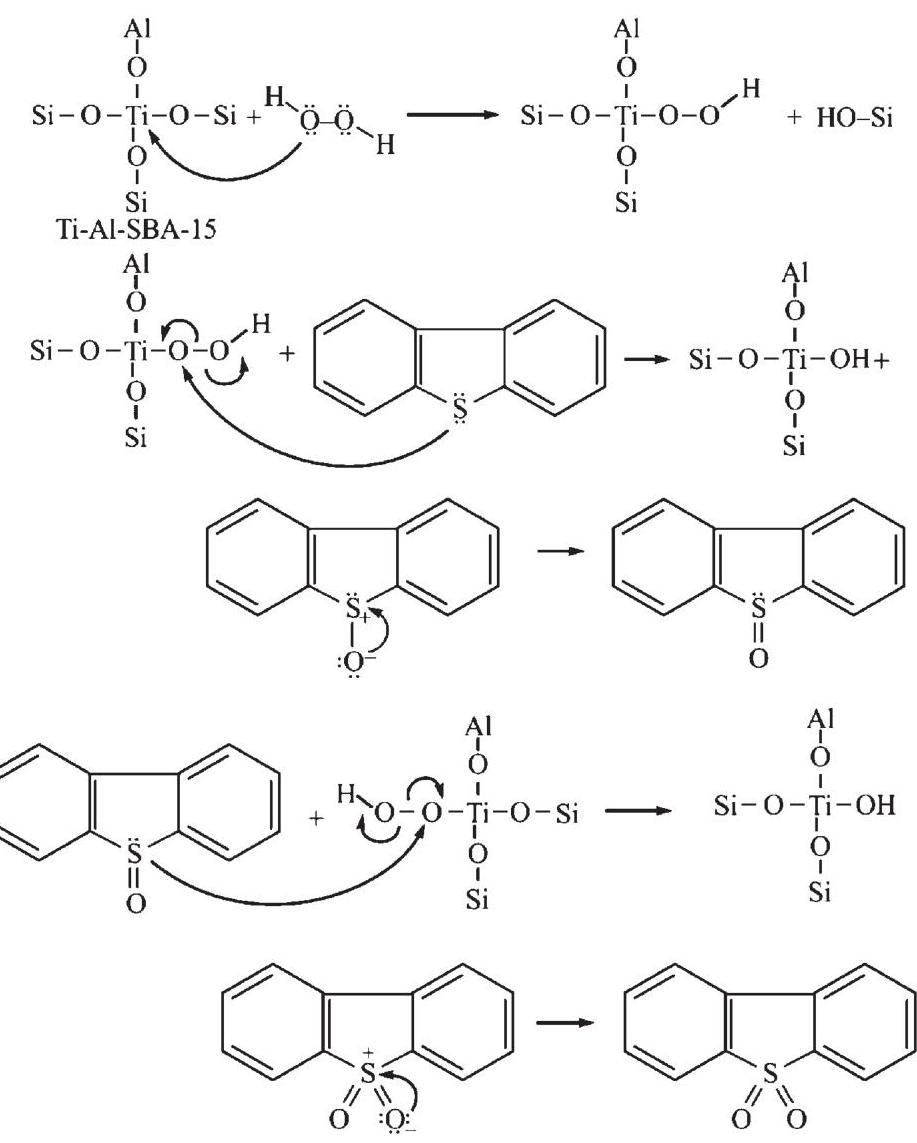

Рис. 4. Предполагаемый механизм окисления ДБТ в присутствии катализатора $\mathrm{Al}-\mathrm{Ti}-\mathrm{SBA}-15$ (по материалам [90]).

Совместное присутствие оксидов церия и циркония при их нанесении на SBA-15 значительно повышает эффективность окисления сернистых соединений в углеводородном топливе. Цирконий $\mathrm{Zr}^{4+}$, выступая как кислота Льюиса, повышает кислотность катализатора и его окислительную способность за счет высокой электрофильности церия, что усиливает адсорбцию серы. Исследования катализаторов $\mathrm{Ce}-\mathrm{Zr}-$ SBA-15, полученных прямым синтезом и методом постсинтеза, подтвердили преимущества прямого включения Се и Zr в матрицу SBA-15. Такой подход обеспечивает более высокую дисперсию оксидов Се, меньший размер частиц и наличие изолированных частиц $\mathrm{Zr}^{4+}$, что в совокупности приводит к повышению активности

катализатора в реакциях окисления ДБТ, 4,6-диметилдибензотиофена и бензотиофена с использованием пероксида водорода в качестве окислителя [91]. В табл. 1 приведены сравнительные характеристики некоторых биметаллических катализаторов на основе мезопористых носителей для окислительного обессеривания модельных углеводородных смесей, содержащих органические соединения серы. В цитируемых работах было достигнуто практически полное удаление серы из модельных углеводородных смесей за счет синергетического эффекта биметаллических систем, обеспечивающих протекание реакции за счет дополнительного эффекта второго металла и/или появления кислотной функции катализатора включением оксида алюминия.

Таблица 1. Биметаллические катализаторы окислительного обессеривания

| Катализатор | Количество металлов, \% | Субстрат | Окислитель, $\mathrm{H}_{2} \mathrm{O}_{2}$ | Конверсия, \% |
| :--: | :--: | :--: | :--: | :--: |
| $\begin{aligned} & 30 \% \mathrm{FeO}_{x} / \mathrm{SBA}-15^{[92]} \\ & 30 \% \mathrm{FeO}_{x} / \mathrm{Zr}-\mathrm{SBA}-15 \end{aligned}$ | $30 \% \mathrm{Fe}, \mathrm{Si} / \mathrm{Zr}=10$ | ДБТ | кат. $=0,1$ г, $[\mathrm{O}] / \mathrm{S}=20$, <br> 30 мин, $60^{\circ} \mathrm{C}$ | 100 |
| $30 \% \mathrm{~V}_{2} \mathrm{O}_{5} / \mathrm{Zr}-\mathrm{SBA}-15^{[93]}$ | $30 \% \mathrm{~V}, \mathrm{Si} / \mathrm{Zr}=10$ | ДБТ | кат. 1 г/л, $[\mathrm{O}] / \mathrm{S}=10$, <br> 40 мин, $60^{\circ} \mathrm{C}$ | $>99$ |
| Ti-Al-SBA-15 ${ }^{[90]}$ | 7,5\%Ti | ДБТ | кат. $0,05 \mathrm{r} / 20$ мл, $\mathrm{H}_{2} \mathrm{O}_{2}=0,5$ мл, <br> 40 мин, $70^{\circ} \mathrm{C}$ | 92,7 |
| $\begin{aligned} & \mathrm{VO}_{2}-\mathrm{Ga}-\mathrm{SBA}-15^{[94]} \\ & \mathrm{VO}_{4}-\mathrm{Al}-\mathrm{SBA}-15 \end{aligned}$ | $\mathrm{V} / \mathrm{Si}=1 / 30, \mathrm{Si} / \mathrm{Ga}=20, \mathrm{Si} / \mathrm{Al}=20$ | ДБТ | кат. $60 \mathrm{mr} / 20$ мл, $[\mathrm{O}] / \mathrm{S}=12$, <br> 15 мин, $60^{\circ} \mathrm{C}$ | 100 |
| $\begin{aligned} & \mathrm{Ce}-\mathrm{SBA}-15^{[91]} \\ & \mathrm{Ce}-\mathrm{Zr}-\mathrm{SBA}-15 \end{aligned}$ | $\mathrm{Si} / \mathrm{Ce}=20, \mathrm{Si} /(\mathrm{Ce}+\mathrm{Zr})=20$ | ДБТ, <br> БТ | кат. 60 мг, $[\mathrm{O}] / \mathrm{S}=12$, <br> 15 мин, $60^{\circ} \mathrm{C}$ | $\begin{aligned} & 100, \\ & 80 \end{aligned}$ |
| $\mathrm{H}_{3} \mathrm{PW}_{12} \mathrm{O}_{40} / \mathrm{ZrO}_{2}-\mathrm{SiO}_{2}{ }^{[95]}$ | 25,9\%HPW | ДБТ | кат. $0,1 \mathrm{r} / 10$ мл, $[\mathrm{O}] / \mathrm{S}=2$, <br> 240 мин, $70^{\circ} \mathrm{C}$ | 100 |
| 20\%HPW/Zr-HMS ${ }^{[96]}$ | $\begin{gathered} 20 \% \mathrm{HPW} \\ \mathrm{Si} / \mathrm{Zr}=10 \end{gathered}$ | ДБТ | кат. $70 \mathrm{mr} / 10$ мл, $\mathrm{H}_{2} \mathrm{O}_{2}=0,3$ мл, <br> 30 мин, $60^{\circ} \mathrm{C}$ | 95 |
| $\mathrm{MoZn} / \mathrm{RHY}^{[97]}$ | $\begin{gathered} 10 \% \mathrm{Mo} \\ 2 \% \mathrm{Zn} \end{gathered}$ | ДБТ | кат. 10 г/л, $[\mathrm{O}] / \mathrm{S}=10$, <br> 30 мин, $40^{\circ} \mathrm{C}$ | 100 |
| $0,05 \% \mathrm{Fe} 5 \% \mathrm{Mo} / \mathrm{SBA}-15^{[98]}$ | $0,05 \% \mathrm{Fe}, 5 \%$ Mo | ДБТ | кат. $0,0189 \mathrm{r}$, $[\mathrm{O}] / \mathrm{S}=2: 1$, <br> 30 мин, $60^{\circ} \mathrm{C}$ | 100 |
| $5 \% \mathrm{~W} / 5 \% \mathrm{Al}-\mathrm{SBA}-15^{[99]}$ | $\begin{gathered} 5 \% \mathrm{~W} \\ 5 \% \mathrm{Al} \end{gathered}$ | ДБТ | кат. $0,0189 \mathrm{r}$, $[\mathrm{O}] / \mathrm{S}=4: 1$, <br> 30 мин, $60^{\circ} \mathrm{C}$ | 100 |
| $7 \% \mathrm{Mo} / 1 \% \mathrm{Al}-\mathrm{SBA}-15^{[100]}$ | $\begin{gathered} 1 \% \mathrm{Mo} \\ 1 \% \mathrm{Al} \end{gathered}$ | ДБТ | кат. $0,0189 \mathrm{r}$, $[\mathrm{O}] / \mathrm{S}=6: 1$, <br> 30 мин, $60^{\circ} \mathrm{C}$ | 100 |

## ПЕРСПЕКТИВНЫЕ НАПРАВЛЕНИЯ ИСПОЛЬЗОВАНИЯ БИМЕТАЛЛИЧЕСКИХ КАТАЛИЗАТОРОВ

Влияние промотирования молибденом на активность и стабильность кобальтового катализатора окисления CO было исследовано в работе [101], в которой был синтезирован в одну стадию кобальтовый катализатор, нанесенный на мезопористый носитель SBA-15 и промотированный молибденом, обладающий высокой устойчивостью к воздействию водяного пара и диоксида серы $\left(\mathrm{SO}_{2}\right)$ в процессе окисления CO при $730^{\circ} \mathrm{C}$. Наличие в составе катализатора высокодисперсных частиц $\mathrm{Co}_{3} \mathrm{O}_{4}$ и молибдена приводит к конверсии CO на уровне $90 \%$, а катализатор без молибдена показывает значительно меньшую конверсию CO - всего $55 \%$. Повышенная эффективность промотированного катализатора объясняется сильным взаимодействием между

кобальтом и молибденом, так как это взаимодействие приводит к росту кислотных свойств катализатора.

Соотношение $\mathrm{Si} / \mathrm{Al}$ в мезопористом алюмосиликатном носителе ( $\mathrm{Al}-\mathrm{SBA}-15$ ) оказывает влияние на каталитические свойства нанесенных на него наночастиц серебра и на активность катализаторов не только в окислении сераорганических соединений, но и в других процессах, например в окислении CO в присутствии водорода [102]. Из синтезированных методом пропитки Ag -катализаторов с различным содержанием Al катализатор $\mathrm{Ag} / \mathrm{Al}-\mathrm{SBA}-15$ с мольным соотношением $\mathrm{Si} / \mathrm{Al}=200$ продемонстрировал наилучшие показатели активности, селективности и стабильности в окислении CO в присутствии водорода. Введение небольшого количества Al способствует формированию высокодисперсных наночастиц Ag , что увеличивает каталитическую

активность и замедляет их агрегацию. Возрастание содержания Al также улучшает структуру носителя и увеличивает количество кислотных центров Льюиса и Бренстеда. Серебро, в свою очередь, обеспечивает высокую активность катализатора при низких температурах [102]. В процессе сухого риформинга метана высокую активность проявил также катализатор $\mathrm{Ni}-\mathrm{Al}$ на носителе Al-SBA-15, полученный в присутствии $\mathrm{HCl}+\mathrm{NaCl}$ наряду с катализаторами $\mathrm{Ni}-\mathrm{Zr}, \mathrm{Ni}-\mathrm{Ti}$ с использованием различных сред $(\mathrm{HCl}, \mathrm{NaCl}, \mathrm{HCl}+\mathrm{NaCl})[103]$.

Для очистки топочного газа от $\mathrm{SO}_{2}$ и $\mathrm{NO}_{x}$ при низкой температуре были использованы железосодержащие и железомедные металлоорганические каркасы для активации пероксомоносульфата. Эти каркасы, содержащие окис-лительно-восстановительные пары $\mathrm{Fe}(\mathrm{II}) / \mathrm{Cu}(\mathrm{I})$ и $\mathrm{Fe}(\mathrm{III}) / \mathrm{Cu}(\mathrm{II})$, инициируют активацию пероксосульфата и генерируют реакционноспособные частицы, окисляющие $\mathrm{SO}_{2}$ на $100 \%$ и $\mathrm{NO}_{x}$ на $86,5 \%$ [104]. В работе [105] для окисления пероксидом водорода пироконденсата, полученного с этиленовых установок различной мощности, использованы в качестве катализатора содержащие РЗЭ (церий, лантан) полиоксовольфраматы, нанесенные на микроструктурированный углеродный материал; конверсия непредельных углеводородов при окислении фракции достигает $95-99 \%$.

Биметаллические катализаторы показывают высокую активность и селективность в реакциях изомеризации ароматических углеводородов, превосходя монометаллические аналоги, что обусловлено синергетическим эффектом между двумя металлами. Биметаллический катализатор увеличивает выход желаемых разветвленных алканов и уменьшает количество нежелательных низкомолекулярных газообразных продуктов [106]. В ходе реакций, протекающих на поверхности бифункциональных катализаторов, существует жесткая конкуренция между изомеризацией и крекингом ( $\beta$-расщепление). При изомеризации алканов на металлических центрах платины происходит также их дегидрирование. Образующийся алкен протонируется с образованием карбокатиона, который далее перегруппировывается в разветвленный алкен с дальнейшим его гидрированием на металлических центрах до изоалкана.

Цеолиты - эффективные катализаторы крекинга и изомеризации углеводородов, но они

подвержены закоксовыванию, что со временем снижает их активность [107]. Добавление благородных металлов, таких как платина и палладий, предотвращает накопление кокса, активируя связи углерод-углерод, углерод-водород и водород-водород, а также способствует очистке поверхности катализатора водородом. Даже небольшое количество платины увеличивает срок службы цеолита, способствуя диссоциации водорода и образованию протонов, блокирующих образование кокса на кислотных центрах, а эффективность благородных металлов зависит от их расположения на цеолите [108]. Катализаторы, содержащие металл двух типов, превосходят по активности и селективности монометаллические системы в реакции изомеризации гептана [109]. Значительное количество кислотных центров Льюиса и более высокая дисперсность платины способствуют улучшению показателей процесса гидрирования-дегидрирования и снижению доли нежелательных реакций гидрогенолиза и крекинга.

Прямой синтез аминов из спиртов представляет собой важную каталитическую реакцию, для которой широко используются гомогенные биметаллические комплексы на основе рутения и иридия, действующие по механизму заимствования или автопереноса водорода [110]. Гетерогенные никельсодержащие катализаторы, такие как наночастицы никеля [111, 112] и смешанные оксиды, демонстрируют хорошую эффективность, но обладают рядом недостатков, включая высокую стоимость, низкую дисперсность металла, выщелачивание никеля и снижение активности при низких содержаниях. Биметаллические катализаторы $\mathrm{Ni}-\mathrm{Pd}$ представляют собой перспективную альтернативу благодаря уникальным свойствам, возникающим в результате взаимодействия палладия и никеля на оксиде алюминия. Палладий, склонный к диспергированию в виде $\mathrm{PdO}_{x}$ и агрегации при высоких температурах, модифицирует свойства никеля, который может образовывать различные оксидные частицы с разным взаимодействием с носителем. Это синергетическое взаимодействие приводит к повышению активности в реакциях гидрирования, что открывает новые возможности для разработки более эффективных и экологически чистых процессов синтеза аминов. В работе [113] добавление $\beta$-циклодекстрина ( $\beta$-CD) при приготовлении биметаллических катализаторов $\mathrm{NiPd} / \mathrm{Al}_{2} \mathrm{O}_{3}$ методом пропитки улучшает их эффективность в реакции аминирования спиртов. $\beta$-CD способствует образованию более

мелких и легко восстанавливаемых частиц оксида никеля, обогащенных поверхностным никелем. Это происходит благодаря комплексообразованию $\beta$-CD с предшественником Ni , что препятствует образованию трудновосстанавливаемых алюминатов никеля.

Гидрирование на биметаллических катализаторах часто основано на активации водорода с помощью двух атомов металла и переносе активированного водорода к молекуле-мишени, что было показано при исследованиях биядерных металлоорганических комплексов PtRh. Синергетический эффект двух металлических центров обеспечивает высокую эффективность диссоциации водорода и последующего восстановления субстрата, например $\mathrm{N}_{2} \mathrm{O}$ [114]. Селективное гидрирование ацетилена до этилена представляет собой сложную задачу, поскольку этилен также может быть легко гидрирован до этана, что снижает выход целевого продукта. При решении этой задачи биметаллические катализаторы демонстрируют превосходную активность и селективность по сравнению с их монометаллическими аналогами. Вхождение в состав катализатора двух разных металлов приводит к синергетическому эффекту, улучшающему их каталитические свойства. В работе [115] исследована селективная гидрогенизация ацетилена на биметаллических катализаторах AgPd и CuPd , синтезированных на носителях $\mathrm{TiO}_{2}$ и $\mathrm{SiO}_{2}$. Хемосорбционные измерения показали, что Pd предпочитает поверхностное расположение в присутствии Cu и подповерхностное в присутствии Ag. Рентгеновская спектроскопия показала более равномерное распределение наночастиц на $\mathrm{SiO}_{2}$, структура поверхности катализатора динамична и зависит от газовой среды и применяемого носителя. Биметаллические катализаторы продемонстрировали повышенную селективность по этилену ( $>92 \%$ ) по сравнению с монометаллическими Pd-катализаторами.

Удаление нитрат-ионов $\left(\mathrm{NO}_{3}^{-}\right)$с использованием биметаллических катализаторов и водорода $\left(\mathrm{H}_{2}\right)$ - перспективный метод очистки воды, активно исследуемый в настоящее время, а альтернативой водороду может выступать муравьиная кислота. Наиболее эффективными для этого процесса признаны катализаторы, сочетающие благородный металл (палладий или платину) с промотирующим металлом (медь, олово, индий). Ключевую роль играют биметаллические центры, где активные центры благородного ме-

талла соседствуют с промоторами. Монометаллические центры, изолированные от промотора, каталитической активностью в восстановлении нитратов не обладают [116].

Гидротермальный синтез катализаторов $\mathrm{Cu} / \mathrm{Sn}-\mathrm{SBA}-15$ проводили варьированием методов добавления источников металла: до или после предшественника кремнезема, в виде порошка или растворенными в спирте, а также в конкурентных (алюминиевых) ионных средах [117]. Добавление металлов, особенно в растворенном виде, способствовало улучшению текстурных свойств, увеличивая толщину стенок SBA-15, вероятно, за счет ионных притяжений в высокозаряженных средах. FTIR-спектроскопия выявила изменения в области растяжения гидроксильных групп и значительное увеличение кислотности Бренстеда и Льюиса, особенно и при добавлении алюминия. Катализаторы продемонстрировали высокую конверсию этанола при умеренных температурах, с максимальной селективностью по ацетальдегиду при $300^{\circ} \mathrm{C}$. Алюминиевая среда положительно влияла на нанесение олова, но не меди. Олово увеличивало кислотность Льюиса, медь - конверсию этанола при низких температурах и количество микро- и мезопор, возможно, за счет образования оксидов металлов. В целом олово и медь оказались эффективными для селективного окисления, дегидрирования, гидроксилирования, парового риформинга и реакций этерификации [118]. Для проведения высокотемпературного окисления метана были использованы модифицированные платиной содержащие палладий катализаторы на основе гексаалюмината марганца. Такие катализаторы с атомным соотношением $\mathrm{Pt} / \mathrm{Pd}$ менее 0,25 обладают сопоставимой или меньшей активностью, но с большей стабильностью при повышенных температурах и скоростях газового потока по сравнению с палладиевым катализатором [119].

## ЗАКЛЮЧЕНИЕ

Биметаллические катализаторы на основе переходных металлов и носителей с кислотной функцией демонстрируют значительные преимущества по сравнению с монометаллическими аналогами в окислительных процессах, что связано с синергетическими взаимодействиями между двумя металлами, усиливающими каталитическую активность и эффективность действия каждого активного компонента. Выбор оксидов переходных металлов, таких как

железо, молибден, вольфрам, медь, кобальт, для создания биметаллических катализаторов основан на их высокой активности в окислительных процессах, а включение алюминия в состав катализатора способствует увеличению его кислотности и положительно сказывается на окислении соединений серы, являющихся основаниями Льюиса. Синергетические эффекты между компонентами и высокая стабильность катализаторов свидетельствуют об их высоком потенциале для разработки экологически безопасных методов обессеривания углеводородного сырья. Имеются и недостатки известных биметаллических катализаторов: все еще остаются открытыми вопросы, касающиеся оптимизации их состава, структуры и условий реакции для достижения максимальной эффективности; известные биметаллические катализаторы требуют значительного количества металла в составе активной фазы, что увеличивает их стоимость и ограничивает коммерческое применение. Длительное время реакций в таких системах затрудняет их использование в промышленных условиях, где требуется высокая скорость процесса; потребление значительного объема окислителя также является серьезным недостатком.

## ФИНАНСИРОВАНИЕ

Работа выполнена в рамках государственного задания «Нефтехимия и катализ. Рациональное использование углеродсодержащего сырья», № 121031300092-6.

## КОНФЛИКТ ИНТЕРЕСОВ

Авторы заявляют об отсутствии конфликта интересов, требующих раскрытия в данной статье.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Анисимов Александр Владимирович, ORCID: https://orcid.org/0000-0001-9272-2913

Акопян Аргам Виликович, ORCID: https://orcid.org/0000-0001-6386-0006

Синикова Наталья Александровна, ORCID: https://orcid.org/0000-0001-7196-0082

Гуль Олеся Олеговна, ORCID: https://orcid.org/0000-0001-6708-0058

## СПИСОК ЛИТЕРАТУРЫ

1. Mjalli F.S., Ahmed O.U., Al-Wahaibi T., Al-Wahaibi Y., AlNashef I.M. Deep oxidative desulfurization of liquid fuels // Reviews in Chem. Engineering. 2014. V. 30. № 4. P. 337-378.
https://doi.org/10.1515/revce-2014-0001
2. ГОСТ 32139-2019. Межгосударственный стандарт. Нефть и нефтепродукты. Определение содержания серы методом энергодисперсионной рентгенофлуоресцентной спектрометрии.
3. Hossain M.N., Park H.C., Choi H.S. A comprehensive review on catalytic oxidativedesulfurization of liquid fuel oil // Catalysts. 2019. V. 9. № 3. ID229. https://doi.org/10.3390/catal9030229
4. Desai K., Dharaskar S., Khalid M., Gedam V. Effectiveness of ionic liquids in extractive-oxidative desulfurization of liquid fuels: a review // Chem. Pap. 2022. V. 76. № 4. P. 1989-2028. https://doi.org/10.1007/s11696-021-02038-3
5. Sikarwar P., Gosu V., Subbaramaiah V. An overview of conventional and alternative technologies for the production of ultra-low-sulfur fuels // Rev. Chem. Eng. 2019. V. 35. № 6. P. 669-705. https://doi.org/10.1515/revce-2017-0082
6. Mohamed Magdy E.-S., Al-Yacoub Z.H., Vadakumar J.V. Biocatalytic desulfurization of thiophenic compounds and crude oil by newly isolated bacteria // Front. Microbiol., Sec. Microbiotechnology. 2015. V. 6. ID112
https://doi.org/10.3389/fmicb.2015.00112
7. Malani R.S., Batghare A.H., Bhasarkar J.B., Moholkar V.S. Kinetic modelling and process engineering aspects of biodesulfurization of liquid fuels: Review and analysis // Bioresour. Technol. Rep. 2021. V. 14. ID100668.
https://doi.org/10.1016/j.biteb.2021.100668
8. Li J., Yang Z., Li S., Jin Q., Zhao J. Review on oxidative desulfurization of fuel by supported heteropolyacid catalysts // J. Ind. Eng. Chem. 2020. V. 82. P. 1-16. https://doi.org/10.1016/j.jiec.2019.10.020
9. Danmaliki G.I., Saleh T.A. Effects of bimetallic $\mathrm{Ce} / \mathrm{Fe}$ nanoparticles on the desulfurization of thiophenes using activated carbon // Chem. Eng. J. 2017. V. 307. P. 914-927.
https://doi.org/10.1016/j.cej.2016.08.143
10. Shah S.S., Ahmad I., Ahmad W., Ishaq M., Khan H. Deep desulphurization study of liquid fuels using acid treated activated charcoal as adsorbent // Energy Fuels. 2017. V. 31. P. 7867-7873.
https://doi.org/10.1021/acs.energyfuels.7b00914
11. Muhammad Nobi Hossain, Hoon Chae Park, Hang Seok Choi. A comprehensive review on catalytic oxidative

desulfurization of liquid fuel oil // Catalysts. 2019. V. 9. № 3. ID229.
https://doi:10.3390/catal9030229
12. Xian Bin Lim ab, Wee-Jun Ong. A current overview of the oxidative desulfurization of fuels utilizing heat and solar light: from materials design to catalysis for clean energy // Nanoscale Horiz. 2021. V. 6. P. 588-633 https://doi.org/10.1039/d1nh00127b
13. Haruna A., Merican Z.A., Musa S.G. Recent advances in catalytic oxidative desulfurization of fuel oil: A review // J. Ind. Eng. Chem. 2022. V. 112. P. 20-36. https://doi.org/10.1016/j.jiec.2022.05.023
14. Khalid H., Umar A., Saeed M.H., Nazir M.S., Akhtat T., Ikhlaq A., Ali Z., Hassan S.U. Advances in fuel oil desulfurization: a comprehensive review of polyoxometalate catalysts // J. Ind. Eng. Chem. 2025. V. 141. P. $32-45$.
http://doi.org/10.1016/j.jec.2024.06.043
15. Houda S., Lancelot C., Blanchard P., Poinel L., Lamonier C. Oxidative desulfurization of heavy oils with high sulfur content: A review // Catalysts. 2018. V. 8. № 9. ID344.
https://doi.org/10.3390/catal8090344
16. Liu F., Yu J., Qazi A.B., Zhang L., Liu X. Metal-based ionic liquids in oxidative desulfurization: a critical review // Environ. Sci. Technol. 2021. V. 55. № 3. P. $1419-1435$.
https://doi.org/10.1021/acs.est.0c05855
17. Yuan B., Li X., Sun Y. A short review of aerobic oxidative desulfurization of liquid fuels over porous materials // Catalysts. 2022. V. 12. № 2. ID129. https://doi.org/10.3390/catal12020129
18. Crucianelli M., Bizzarri B.M., Saladino R. SBA-15 anchored metal containing catalysts in the oxidative desulfurization process // Catalysts. 2019. V. 9. № 12. ID984.
https://doi.org/10.3390/catal9120984
19. Xiong J., Zhu W., Ding W., Yang L., Zhang M., Jiang W., Zhao Z., Li H. Hydrophobic mesoporous silica-supported heteropolyacid induced by ionic liquid as a high efficiency catalyst for the oxidative desulfurization of fuel // RSC Adv. 2015. V. 5. № 22. P. 16847-16855. https://doi.org/10.1039/C4RA14382E
20. Duan Z., Bian H., Gao Z., Zhu L., Xia D. Green fuel desulfurization with $\beta$-cyclodextrin aqueous solution for thiophenic sulfides by molecular inclusion // Energy Fuels. 2019. V. 33. № 10. P. 9690-9701. https://doi.org/10.1021/acs.energyfuels.9b02349
21. Nurwita A., Stawicka K., Trejda M. SBA-15 type mesoporous silica modified with vanadium as a catalyst for oxidative and extractive oxidative desulfurization processes // Materials. 2024. V. 17. № 16. ID4041. https://doi.org/10.3390/ma17164041
22. Truong T.H., Vu D.C., Pham X.N. Direct synthesis of $\mathrm{Cu}-\mathrm{TiO}_{2}-\mathrm{SBA}-16$ photocatalysts and its application for the oxidative desulfurization of fuel oil model // Vietnam J. of Catalysis and Adsorption. 2024. V. 13. № 3. P. 36-41.
https://doi.org/10.62239/jca.2024.055
23. Moghadasi Z., Baghernia J. Preparation and identification of MCM-41 catalyst and its application in the oxidation reaction of sulfide to sulfoxide // Nanomaterials Chemistry. 2024. V. 2. № 1. P. 38-50. https://doi.org/10.22034/nc.2024.459131.1032
24. Wang F., Xiao K., Shi L., Bing L., Han D., Wang G. Catalytic oxidative desulfurization of model fuel utilizing functionalized HMS catalysts: characterization, catalytic activity and mechanistic studies // React. Chem. Eng. 2021. V. 6. № 2. P. 289-296. https://doi.org/10.1039/D0RE00373E
25. Ding Y., WangJ., Liao M., Li J., Zhang L., Guo J., Wu H. Deep oxidative desulfurization of dibenzothiophene by novel POM-based IL immobilized on well-ordered KIT-6 // Chem. Eng. J. 2021. V. 418. ID129470. https://doi.org/10.1016/j.cej.2021.129470
26. Zou J., Lin Y., Wu S., Wu M., Yang C. Construction of bifunctional 3-D ordered mesoporous catalyst for oxidative desulfurization // Sep. Purif. Technol. 2021. V. 264. ID118434.
https://doi.org/10.1016/j.seppur.2021.118434
27. Nawaf A.T., Abdulmajeed B.A. Design of oscillatory helical baffled reactor and dual functional mesoporous catalyst for oxidative desulfurization of real diesel fuel // Chem. Eng. Res. Des. 2024. V. 209. P. 193-209. https://doi.org/10.1016/j.cherd.2024.07.032
28. Lu Y., Yue C., Liu B., Zhang M., Li Y., Yang W., Lin Y., Pan Y., Sun D., Liu Y. The encapsulation of POM clusters into MIL-101 (Cr) at molecular level: $\mathrm{LaW}_{10} \mathrm{O}_{36} @$ MIL-101 (Cr), an efficient catalyst for oxidative desulfurization // Microporous Mesoporous Mater. 2021. V. 311. ID110694.
https://doi.org/10.1016/j.micromeso.2020.110694
29. We S., He H., Cheng Y., Yang C., Zeng G., Kang L., Qian H., Zhu C. Preparation, characterization, and catalytic performances of cobalt catalysts supported on KIT-6 silicas in oxidative desulfurization of dibenzothiophene // Fuel. 2017. V. 200. P. 11-21. https://doi.org/10.1016/j.fuel.2017.03.052
30. Ahmadian M., Anbia M. Highly efficient oxidative desulfurization catalyzed by copper-based materials using hydrogen peroxide as oxidant // Fuel. 2022. V. 324. Pt. A. ID124471.
https://doi.org/10.1016/j.fuel.2022.124471
31. Guo H., Lu X., Zhang W., Zhang M., Zhao L., Zhou D., Xia Q. Highly efficient oxidation of various thioethers with molecular oxygen catalyzed by bimetallic SnMo-MOF // Mol. Catal. 2024. V. 569. ID114555. https://doi.org/10.1016/j.mcat.2024.114555

32. Mokhtar W.N.A.W., Wan Abu Bakar W.A., Ali R., Kadir A.A.A. Development of bimetallic and trimetallic oxides doped on molybdenum oxide based material on oxidative desulfurization of diesel // Arab. J. Chem. 2018. V. 11. № 8. P. 1201-1208. https://doi.org/10.1016/j.arabjc.2016.04.020
33. Otaghsaraei S.S., Kazemeini M., Hasannia S., Ekramipooya A. Deep oxidative desulfurization via rGOimmobilized tin oxide nanocatalyst: Experimental and theoretical perspectives // Adv. Powder Technol. 2022. V. 33. № 3. ID103499.
https://doi.org/10.1016/j.apt.2022.103499
34. Chen X., Luo J., Khan S., Shi R., Li P., Shi S., Hu J., Shi F. Thick pore walls mesoporous silicon composites based on phosphomolybdic acid: an efficient catalyst for oxidation desulfurization reaction // J. Phys. Chem. Solids. 2023. V. 173. ID111118. https://doi.org/10.1016/j.jpcs.2022.111118
35. Said S., Abdelrahman A.A. Atomic layer deposition of $\mathrm{MoO}_{3}$ on mesoporous $\gamma-\mathrm{Al}_{2} \mathrm{O}_{3}$ prepared by sol-gel method as efficient catalyst for oxidative desulfurization of refractory dibenzothiophene compound // J. SolGel Sci. Technol. 2020. V. 95. P. 308-320. https://doi.org/10.1007/s10971-020-05332-w
36. Boshagh F., Rahmani M., Rostami K., Yousefifar M. Key factors affecting the development of oxidative desulfurization of liquid fuels: a critical review // Energy Fuels. 2021. V. 36. № 1. P. 98-132. https://doi.org/10.1021/acs.energyfuels/c03396
37. Yu L., Cui W.G., Zhang Q., Li Z.F., Shen Y., Hu T.L. Atomic layer deposition of nano-scale molybdenum sulfide within a metal-organic framework for highly efficient hydrodesulfurization // Mater. Adv. 2021. V. 2. № 4. P. 1294-1301.
https://doi.org/10.1039/DOMA00955E
38. Akbari A., Chamack M., Omidkhah M. Reverse microemulsion synthesis of polyoxometalate-based heterogeneous hybrid catalysts for oxidative desulfurization // J. Mater. Sci. 2020. V. 55. № 15. P. 65136524 .
https://doi.org/10.1007/s10853-020-04458-0
39. Khan Z., Ali S. Oxidative desulphurization followed by catalytic adsorption method // S. Afr. J. Chem. Eng. 2013. V. 18. № 2. P. 14-28.
https://hdl.handle.net/10520/EJC151789
40. Oyewem A., Abdulkareem A.S., Tijani J.O., Bankole M.T., Abubakre O.K., Afolabi A.S., Roos W.D. Controlled syntheses of multi-walled carbon nanotubes from bimetallic $\mathrm{Fe}-\mathrm{Co}$ catalyst supported on kaolin by chemical vapour deposition method // Arab. J. Sci. Eng. 2019. V. 44. P. 5411-5432.
https://doi.org/10.1007/s13369-018-03696-4
41. Yu W., Porosoff M.D., Chen J.G. Review of Pt-based bimetallic catalysis: from model surfaces to supported
catalysts // Chem. Rev. 2012. V. 112. № 11. P. 57805817.
https://doi.org/10.1021/cr300096b
42. Munnik P., de Jongh P.E., de Jong K.P. Recent developments in the synthesis of supported catalysts // Chem. Rev. 2015. V. 115. № 14. P. 6687-6718. https://doi.org/10.1021/cr500486u
43. Pérez-Pastenes H., Núñez-Correa S., Pérez-López G., Ricardez-Sandoval L., Viveros-García T. 2-Propanol dehydration and dehydrogenation on $\mathrm{Pt} / \mathrm{Al}_{2} \mathrm{O}_{3}$ and $\mathrm{Pt} / \mathrm{Al}_{2} \mathrm{O}_{3}-\mathrm{CeO}_{2}$ catalysts // Revista Mexicana de Ingeniería Química. 2021. V. 20. № 2. P. 1047-1058. https://doi.org/10.24275/rmiq/Cat2360
44. Yang J., Zuo T., Lu J. Effect of preparation methods on the hydrocracking performance of $\mathrm{NiMo} / \mathrm{Al}_{2} \mathrm{O}_{3}$ catalysts // Chin. J. Chem. Eng. 2021. V. 32. P. 224-230. https://doi.org/10.1016/j.cjche.2020.06.009
45. Hu Y., ZhangJ., Huo H., Wang Z., Xu X., Yang Y., Lin K., Fan R. One-pot synthesis of bimetallic metal-organic frameworks (MOFs) as acid-base bifunctional catalysts for tandem reaction // Catal. Sci. Technol. 2020. V. 10. № 2. P. 315-322.
https://doi.org/10.1039/C9CY01940E
46. Nasresfahani Z., Kassaee M.Z. Nickel-copper bimetallic mesoporous nanoparticles: as an efficient heterogeneous catalyst for N -alkylation of amines with alcohols // Appl. Organomet. Chem. 2021. V. 35 № 1. ID e6032.
https://doi.org/10.1002/aoc. 6032
47. Rex A., dos Santos J.H.Z. The use of sol-gel processes in the development of supported catalysts // J. SolGel Sci. Technol. 2023. V. 105. № 1. P. 30-49. https://doi.org/10.1007/s10971-022-05975-x
48. Zhang J., Chen T., Jiao Y., Cheng M., Wang L.-L., Wang J.-L., Li X.-Y., Chen Y.-Q. Improved activity of $\mathrm{Ni}-\mathrm{Mo} / \mathrm{SiO}_{3}$ bimetallic catalyst synthesized via solgel method for methylcyclohexane cracking // Petrol. Sci. 2021. V. 18. № 5. P. 1530-1542. https://doi.org/10.1016/j.petsci.2021.08.009
49. Dongare S., Singh N., Bhunia H., Bajpai P.K. Electrochemical reduction of $\mathrm{CO}_{2}$ using oxide based Cu and Zn bimetallic catalyst // Electrochim. Acta. 2021. V. 392. ID138988.
https://doi.org/10.1016/j.electacta.2021.138988
50. Rudresha K., Zahir Hussain A., Ravikumar C.R., Anil Kumar M.R. Bimetallic $\mathrm{CuO}-\mathrm{ZnO}$ hybrid nanocomposite materials for efficient remediation of environmental pollutants // ChemistrySelect. 2023. V. 8. № 29. ID e202300583.
https://doi.org/10.1002/slct. 202300583
51. Брыжин А.А., Руднев В.С., Лукиянчук И.В., Василева М.С., Тарханова И.Г. Влияние состава оксидных слоев, полученных методом плазменно-

электролитического оксилирования, на механизм пероксидного окисления сераорганических соединений // Кинетика и катализ. 2020. Т. 61. № 2. C. $262-270$.
https://doi.org/10.31857/S0453881120020021
52. Брыжин А.А., Тарханова И.Г., Маслаков К.И., Николаев С.А., Гуревич С.А., Кожевин В.М., Явсин Д.А., Гантман М.Г., Ростовщикова Т.Н. Наноструктурированные NiMo- и NiW-катализаторы окисления тиофена, полученные методом лазерного электролиспергирования // Журн. физ. химии. 2019. T. 93. № 10. C. 1575-1583.
https://doi.org/10.1134/S0044453719100029
53. Guan S., Yu R., Guo F., Fang Y., Ji L. Facile synthesis of ultra-fine nanoporous Pt co-catalyst decorated on P25 and its highly efficient photocatalytic activity // Ionics. 2021. V. 27. P. 1633-1643.
https://doi.org/10.1007/s11581-021-03958-6
54. Lu J. A perspective on new opportunities in atom-byatom synthesis of heterogeneous catalysts using atomic layer deposition // Catal. Lett. 2021. V. 151. P. 15351545 .
https://doi.org/10.1007/s10562-020-03412-8
55. Zhang J., Zheng X., Yu W., Feng X., Qin Y. Unravelling the synergy in platinum-nickel bimetal catalysts designed by atomic layer deposition for efficient hydrolytic dehydrogenation of ammonia borane // Appl. Catal. B: Environ. 2022. V. 306. ID121116. https://doi.org/10.1016/j.apcatb.2022.121116
56. Labbe M., Clark M.P., Cadien K., Ivey D.G. Bifunctional Mn-Fe Oxide Catalysts for Zn-Air Battery Air Electrodes Fabricated Through Atomic Layer Deposition // Batter. Supercaps. 2024. V. 7. № 9. ID e202400133.
https://doi.org/10.1002/batt. 202400133
57. Srivastava V.C. An evaluation of desulfurization technologies for sulfur removal from liquid fuels // RSC Adv. 2012. V. 2. № 3. P. 759-783.
https://doi.org/10.1039/C1RA00309G
58. Zhang X., Zhang Z., Zhang B., Yang X., Chang X., Zhou Z., Wang D.H., Zhang M.H., Bu X.H. Synergistic effect of Zr-MOF on phosphomolybdic acid promotes efficient oxidative desulfurization // Appl. Catal. B: Environ. 2019. V. 256. ID117804.
https://doi.org/10.1016/j.apcatb.2019.117804
59. Akopyan A.V., Kulikov L.A., Polikarpova P.D., Shlenova A.O., Anisimov A.V., Maximov A.L., Karakhanov E.A. Metal-free oxidative desulfurization catalysts based on porous aromatic frameworks // Ind. Eng. Chem. Res. 2021. V. 60. № 25. P. 9049-9058. https://doi.org/10.1021/acs.iecr.1c00886
60. Tang W., Yao Y., Huang X. Hydrogen-assisted thermocatalysis over Titanium Nanotube for oxidative desulfurization // Catalysts. 2021. V. 12. № 1. ID29. https://doi.org/10.3390/catal12010029
61. Bai J., Song Y., Wang C., Chen H., Wei D., Bai L., Wang W., Yang L., Liang Y., Yang H. Engineering the electronic structure of Mo sites in $\mathrm{Mn}-\mathrm{Mo}-\mathrm{O}-$ mixed-metal oxides for efficient aerobic oxidative desulfurization // Energy Fuels. 2021. V. 35. № 15. P. $12310-12318$.
https://doi.org/10.1021/acs.energyfuels.1c01476
62. Elwan H.A., Zaky M.T., Farag A.S., Soliman F.S., Hassan M.E.D. Efficient pyridinium-based ionic liquid for deep oxidative desulfurization of model oil // J. Mol. Liq. 2020. V. 310. ID113146.
https://doi.org/10.1016/j.molliq.2020.113146
63. Liu Z., Zhang Y., Bai J., Yang H., Yang L., Bai L., Wei D., Wang W., Liang Y., Chen H. MoO ${ }_{x}$ nanoclusters decorated on spinel-type transition metal oxide porous nanosheets for aerobic oxidative desulfurization of fuels // Fuel. 2023. V. 334. Pt. 2. ID126753.
https://doi.org/10.1016/j.fuel.2022.126753
64. Jiang W., Gao X., Dong L., Xiao J., Zhu L.H., Chen G.Y., Xun S.H., Peng C., Zhu W.S., Li H.M. Aerobic oxidative desulfurization via magnetic mesoporous silicasupported tungsten oxide catalysts // Pet. Sci. 2020. V. 17. P. 1422-1431.
https://doi.org/10.1007/s12182-020-00498-y
65. Chen L., Yuan Z.Y. Design strategies of supported me-tal-based catalysts for efficient oxidative desulfurization of fuel // J. Ind. Eng. Chem. 2022. V. 108. P. 1-14. https://doi.org/10.1016/j.jiec.2021.12.025
66. García-Gutiérrez J.L., Fuentes G.A., Hernández-Terán M.E., Murrieta F., Navarrete J., Jiménez-Cruz F. Ultra-deep oxidative desulfurization of diesel fuel with $\mathrm{H}_{2} \mathrm{O}_{2}$ catalyzed under mild conditions by polymolybdates supported on $\mathrm{Al}_{3} \mathrm{O}_{7}$ // Appl. Catal. A: Gen. 2006. V. 305. № 1. P. 15-20.
https://doi.org/10.1016/j.apcata.2006.01.027
67. Yang F., Wang R., Zhou S., Wang X., Kong Y., Gao S. Mesopore-encaged V-Mn oxides: Progressive insertion approach triggering reconstructed active sites to enhance catalytic oxidative desulfurization // Chin. J. Chem. Eng. 2022. V. 45. P. 182-193. https://doi.org/10.1016/j.cjche.2021.05.015
68. Nevanperä T.K., Ojala S., Laitinen T., Pitkäaho S., Saukko S., Keiski R.L. Catalytic oxidation of dimethyl disulfide over bimetallic $\mathrm{Cu}-\mathrm{Au}-$ and $\mathrm{Pt}-\mathrm{Au}$-catalysts supported on $\mathrm{Al}_{2} \mathrm{O}_{3}, \mathrm{CeO}_{2}$ and $\mathrm{CeO}_{2}-\mathrm{Al}_{2} \mathrm{O}_{3} / /$ Catalysis. 2019. V. 9. № 7. ID603.
https://doi.org/10.3390/catal9070603
69. Liu S., Zhao F., Sun H., Liu X., Cui B. Iron promotion of V-HMS mesoporous catalysts for ultra-deep oxidative desulfurization // Appl. Organomet. Chem. 2017. V. 32. № 2. ID e4082.
https://doi.org/10.1002/aoc. 4082
70. Aslam S., Subhan F., Yan Z., Yaseen M. Facile fabrication of confined spaces with molybdenum atoms

for fast oxidative desulfurization of fuel oil // Sep. Purif. Technol. 2024. V. 344. P. 127301.
https://doi.org/10.1016/j.seppur.2024.127301
71. Haghighi M., Gooneh-Farahani S. Oxidative desulfurization of dibenzothiophenes over metallic and bimetallic supported ZSM-11 catalysts: $x \mathrm{La} / \mathrm{y}$ Mo-ZSM-11 as an efficient bimetallic catalyst // Inorg. Chem. Commun. 2019. V. 106. P. 61-69.
https://doi.org/10.1016/j.inoche.2019.05.007
72. Jamali N., Ramezani N., Mousazadeh M.H. Modified mesoporous HMS supported V/W for oxidative desulfurization of dibenzothiophene // Phys. Chem. Res. 2021. V. 9. № 4. P. 637-649.
https://doi.org/10.22036/pcr.2021.276639.1898
73. Wan Abu Bakar W.A., Ali R., Kadir A.A.A., Mokhtar W.N.A.W. Effect of transition metal oxides catalysts on oxidative desulfurization of model diesel // Fuel Process. Technol. 2012. V. 101. P. 78-84.
https://doi.org/10.1016/j.fuproc.2012.04.004
74. Alvarez-Amparán M.A., Cedeno-Caero L. $\mathrm{MoO}_{x}-\mathrm{VO}_{x}$ based catalysts for the oxidative desulfurization of refractory compounds: Influence of $\mathrm{MoO}_{x}-\mathrm{VO}_{x}$ interaction on the catalytic performance // Catal. Today. 2017. V. 282. Pt. 2. P. 133-139.
https://doi.org/10.1016/j.cattod.2016.07.002
75. Zhang Q., Zhang J., Yang H., Dong Y., Liu Y., Yang L., Wei D., Wang W., Bai L., Chen H. Efficient aerobic oxidative desulfurization over $\mathrm{Co}-\mathrm{Mo}-\mathrm{O}$ bimetallic oxide catalysts // Catal. Sci. Technol. 2019. V. 9. № 11. P. 2915-2922.
https://doi.org/10.1039/C9CY00459A
76. Ramos J.M., Wang J.A., Chen L.F., Arellano U., Ramírez S.P., Sotelo R., Schachat P. Synthesis and catalytic evaluation of $\mathrm{CoMo} / \mathrm{SBA}-15$ catalysts for oxidative removal of dibenzothiophene from a model diesel // Catal. Commun. 2015. V. 72. P. 57-62.
https://doi.org/10.1016/j.catcom.2015.09.007
77. Yan X.M., Mei Z., Mei P., Yang Q. Self-assembled HPW/silica-alumina mesoporous nanocomposite as catalysts for oxidative desulfurization of fuel oil // J. Porous Mater. 2014. V. 21. P. 729-737.
https://doi.org/10.1007/s10934-014-9819-2
78. Chen L., Ren J.T., Yuan Z.Y. Increasing the utilization of SiBeta support to anchor dual active sites of transition metal and heteropolyacids for efficient oxidative desulfurization of fuel // Appl. Catal. B: Environ. 2022. V. 305. ID121044.
https://doi.org/10.1016/j.apcatb.2021.121044
79. Eseva E., Dunko A., Latypova S., Grafov O., Cherednichenko K., Motyakin M.V., Anisimov A., Akopyan A. Cobalt-manganese spinel structure catalysts for aerobic oxidative desulfurization // Fuel. 2024. V. 357. ID129689.
https://doi.org/10.1016/j.fuel.2023.129.689
80. Jiabao B., Ya S., Chenxu W., Hou Ch., Donglei W., Liangjiu B., Wenxiang W., Lixia Y., Ying L., Huawei Y. Engineering the electronic structure of Mo sites in $\mathrm{Mn}-\mathrm{Mo}-\mathrm{O}$ mixed-metal oxides for efficient aerobic oxidative desulfurization // Energy Fuels. 2021. V. 35. № 15. P. 12310-12318.
https://doi.org/10.1021/acs.energyfuels.1c01476
81. Naseri H., Mazloom G., Akbari A., Banisharif F. Investigation of $\mathrm{Ni}, \mathrm{Co}$, and Zn promoters on $\mathrm{Mo} / \mathrm{HY}$ modified zeolite for developing an efficient bimetallic catalyst for oxidative desulfurization of dibenzothiophene // Microporous Mesoporous Mater. 2021. V. 325. ID111341.
https://doi.org/10.1016/j.micromeso.2021.111341
82. Mohammadil Z., Najafi Chermahini A., Kasiri Baboukani Z. Oxidative desulfurization of real and model fuel using vanadium-chromium bimetallic catalysts supported on KIT-6 // Res. Chem. Intermed. 2024. V. 50. P. 597-624.
https://doi.org/10.1007/s11164-023-05211-3
83. Li X., Shi J., Wang J., Xi L., Sun R., Zhang F., Wu X., Zhou Z., Ren Z. Preparation of $\mathrm{CeVO}_{4} / \mathrm{BNNS}$ catalyst and its application in oxidation desulfurization of diesel oil // Fuel. 2023. V. 337. ID126875.
https://doi.org/10.1016/j.fuel.2022.126875
84. Guo H., Lu X., Zhang W., Zhang M., Zhao L., Shou D., Xia Q. Highly efficient oxidation of various thioethers with molecular oxygen catalyzed by bimetallic SnMoMOF // Mol. Catal. 2024. V. 569. ID114555.
https://doi.org/10.1016/j.mcat.2024.114555
85. Zhu Z., Ma H., Liao W., Tang P., Yang K., Su T., Ren W., Lü H. Insight into tri-coordinated aluminum dependent catalytic properties of dealuminated Y zeolites in oxidative desulfurization // Appl. Catal. B: Environ. 2021. V. 288. ID120022.
https://doi.org/10.1016/j.apcatb.2021.120022
86. Li Y., Zhang W., Zhang L., Yang Q., Wei Z., Feng Z., Li C. Direct synthesis of Al-SBA-15 mesoporous materials via hydrolysis-controlled approach // J. Phys. Chem. B. 2004. V. 108. № 28. P. 9739-9744. https://doi.org/10.1021/jp. 049824j
87. Chandra Mouli K., Soni K., Dalai A., Adjaye J. Effect of pore diameter of $\mathrm{Ni}-\mathrm{Mo} / \mathrm{Al}-\mathrm{SBA}-15$ catalysts on the hydrotreating of heavy gas oil // Appl. Catal. A: Gen. 2011. V. 404. № 1-2. P. 21-29.
https://doi.org/10.1016/j.apcata.2011.07.001
88. Gajardo J., Colmenares-Zerpa J., Peixoto A.F., Silva D.S.A., Silva J.A., Gispert-Guirado F., Chimentão R.J. Revealing the effects of high Al loading incorporation in the SBA-15 silica mesoporous material // J. Porous Mater. 2023. V. 30. № 5. P. 1687-1707. https://doi.org/10.1007/s10934-023-01453-z
89. Ashirov R., Kimball M.R., O’Brien M., Bhuvanesh N., Blümel J. Aluminum trichloride adducts of phosphine

oxides: Structures, Solid-State NMR, and application // Inorg. Chim. Acta. 2024. V. 564. ID121952. https://doi.org/10.1016/j.ica.2024.121952
90. Pham X.N., Nguyen M.B., Doan H.V. Direct synthesis of highly ordered Ti-containing Al-SBA-15 mesostructured catalysts from natural halloysite and its photocatalytic activity for oxidative desulfurization of dibenzothiophene // Adv. Powder Technol. 2020. V. 31. № 8. P. 3351-3360.
https://doi.org/10.1016/j.apt.2020.06028
91. Rivoira L.P., Valles V.A., Martínez M.L., Sa-Ngasaeng Y., Jongpatiwut S., Beltramone A.R. Catalytic oxidation of sulfur compounds over $\mathrm{Ce}-\mathrm{SBA}-15$ and $\mathrm{Ce}-\mathrm{Zr}-$ SBA-15 // Catal. Today. 2021. V. 360. P. 116-128. https://doi.org/10.1016/j.cattod.2019.08.005
92. Ramos J.M., Wang J.A., Flores S.O., Chen L.F., Nava N., Navarrete J., Domínguez J.M., Szpunar J.A. Ultrasound-assisted synthesis and catalytic activity of mesostructured $\mathrm{FeO}_{x} / \mathrm{SBA}-15$ and $\mathrm{FeO}_{2} / \mathrm{Zr}-\mathrm{SBA}-15$ catalysts for the oxidative desulfurization of model diesel // Catal. Today. 2020. V. 349. P. 198-209. https://doi.org/10.1016/j.cattod.2018.04.059
93. Ramos J.M., Wang J.A., Flores S.O., Chen L., Arellano U., Noreña L.E., González J., Navarrete J. Ultrasound-assisted hydrothermal synthesis of $\mathrm{V}_{2} \mathrm{O}_{5} / \mathrm{Zr}-\mathrm{SBA}-15$ catalysts for production of ultralow sulfur fuel // Catalysts. 2021. V. 11. № 4. ID408. https://doi.org/10.3390/catal11040408
94. Rivoira L., Martínez M.L., Anunziata O., Beltramone A. Vanadium oxide supported on mesoporous SBA-15 modified with Al and Ga as a highly active catalyst in the ODS of DBT // Microporous Mesoporous Mater. 2017. V. 254. P. $96-113$.
https://doi.org/10.1016/j.micromeso.2017.04.019
95. Zhang X., Zhu Y., Huang P., Zhu M. Phosphotungstic acid on zirconia-modified silica as catalyst for oxidative desulfurization // RSC Adv. 2016. V. 6. № 73. P. 69357-69364.
https://doi.org/10.1039/C6RA16622A
96. Yuzbashi S., Mousazadeh M.H., Ramezani N., Sid Kalal H., Sabour B. Mesoporous zirconium-silica nanocomposite modified with heteropoly tungstophosphoric acid catalyst for ultra-deep oxidative desulfurization // Appl. Organomet. Chem. 2020. V. 34. № 2. ID e5326. https://doi.org/10.1002/aoc. 5326
97. Naseri H., Mazloom G., Akbari A., Banisharif F. Investigation of $\mathrm{Ni}, \mathrm{Co}$, and Zn promoters on $\mathrm{Mo} / \mathrm{HY}$ modified zeolite for developing an efficient bimetallic catalyst for oxidative desulfurization of dibenzothiophene // Microporous Mesoporous Mater. 2021. V. 325. ID111341.
https://doi.org/10.1016/j.micromeso.2021.111341
98. Гуль О.О., Поликарпова П.Д., Акопян А.В., Анисимов А.В. Биметаллические гетерогенные катализа-

торы для окисления серосодержащих соединений пероксидом водорода // Кинетика и катализ. 2023. Т. 64. № 5. С. 609-617.
https://doi.org/10.31857/S0453881123050039
[Gul O.O., Polikarpova P.D., Akopyan A.V., Anisimov A.V. Bimetallic heterogeneous catalysts for the oxidation of sulfur-containing compounds with hydrogen peroxide // Kinet. Catal. 2023. V. 64. № 5. P. 627-634. https://doi.org/10.1134/S0023158423050038]
99. Гуль О.О., Домашкина П.Д., Акопян А.В., Сенявин В.М., Анисимов А.В. Катализаторы на основе оксида вольфрама и $\mathrm{Al}-\mathrm{SBA}-15$ для окисления сернистых соединений нефтяного происхождения / Нефтехимия. 2024. Т. 64. № 2. С. 163-174. https://doi.org/10.31857/S0028242124020055
100. Akopyan A., Polikarpova P., Gul O., Anisimov A., Karakhanov E. Catalysts based on acidic SBA-15 for deep oxidative desulfurization of model fuels // Energy Fuels. 2020. V. 34. № 11. P. 14611-14619. https://doi.org/10.1021/acs.energyfuels.0c02008
101. Lima T.M., de Macedo V., Silva D.S.A., Castelblanco W.N., Pereira C.A., Roncolatto R.E., Gawande M.B., Zbořil R., Varma R.S., Urquieta-González E.A., Ur-quieta-González E.A. Molybdenum-promoted cobalt supported on SBA-15: Steam and sulfur dioxide stable catalyst for CO oxidation // Appl. Catal. B: Environ. 2020. V. 277. ID119248.
https://doi.org/10.1016/j.apcatb.2020.119248
102. Todorova S., Kolev H., Karakirova Y., Filkova D., Grahovski B., Aleksieva K., Holgado J.P., Kadinov G., Caballero A. Preferential CO oxidation in hydrogenrich gases over Ag catalysts supported on different supports // Reac. Kinet. Mech. Catal. 2022. V. 135. № 3. P. 1405-1422.
https://doi.org/10.1007/s11144-022-02158-1
103. Okutan C., Arbag H., Yasyerli N., Yasyerli S. Catalytic activity of SBA-15 supported Ni catalyst in $\mathrm{CH}_{4}$ dry reforming: effect of $\mathrm{Al}, \mathrm{Zr}$, and Ti co-impregnation and Al incorporation to SBA-15 // Int. J. Hydrog. Energy. 2020. V. 45. № 27. P. 13911-13928. https://doi.org/10.1016/j.ijhydene.2020.03.052
104. Wan Z., Xu X., Li C., Zhang J., Wang Q., Fang L., Zhang L., Guo Q., Sun D. Simultaneous oxidation and absorption of nitric oxide and sulfur dioxide by peroxomonosulfate activated by bimetallic metalorganic frameworks // J. Environ. Chem. Eng. 2023. V. 11. № 2. ID109417 https://doi.org/10.1016/j.jece.2023.109417
105. Алимарданов Х.М., Мусаева Э.С., Гарибов Н.И., Дадашова Н.Р. Окисление пироконденсата и некоторых его непредельных компонентов пероксидом водорода в присутствии полиоксовольфрамата, модифицированного катионами церия // Нефтехимия. 2024. Т. 64. № 1. С. 55-63.
https://doi.org/10.31857/S0028242124010042

106. Khalaf Y.H., Sherhan B.Y., Shakor Z.M., Al-Sheikh F. Биметаллические катализаторы изомеризации алканов (обзор) // Современные молекулярные сита. 2023. Т. 5. № 2. С. 134-149.
https://doi.org/10.53392/27130304_2023_5_2_134
[Khalaf Y.H., Sherhan B.Y., Shakor Z.M., Al-Sheikh F. Bimetallic catalysts for isomerization of alkanes (A Review) // Petrol. Chem. 2023. V. 63. № 7. P. 829843 .
https://doi.org/10.1134/S0965544123050079]
107. Zhou J., Zhao J., Zhang J., Zhang T., Ye M., Liu Z. Regeneration of catalysts deactivated by coke deposition: A review // Chin. J. Catal. 2020. V. 41. № 7. P. $1048-1061$.
https://doi.org/10.1016/S1872-2067(20)63552-5
108. Zhao J., Huffman G.P., Davis B.H. XAFS study of the state of platinum in a sulfated zirconia catalyst // Catal. Lett. 1994. V. 24. P. 385-389.
109. Blomsma, E., Martens, I., Jacobs, P.A. Isomerization and hydrocracking of heptane over bimetallic bifunctional PtPd/H-beta and PtPd/USY zeolite catalysts // J. Catal. 1997. V. 165, № 2. P. 241-248. https://doi.org/10.1016/jcat.1997.1473
110. Corma A., Navas J., Sabater M.J. Advances in onepot synthesis through borrowing hydrogen catalysis // Chem. Rev. 2018. V. 118. № 4. P. 1410-1459. https://doi.org/10.1021/acs.chemrev.7b00340
111. Tomer A., Yan Z., Ponchel A., Pera-Titus M. Mixed oxides supported low-nickel formulations for the direct amination of aliphatic alcohols with ammonia // J. Catal. 2017. V. 356. P. 133-146. https://doi.org/10.1016/j.jcat.2017.08.015
112. Ruiz D., Aho A., Mäki-Arvela P., Kumar N., Oliva H., Murzin D.Y. Direct amination of dodecanol over noble and transition metal supported silica catalysts // Ind. Eng. Chem. Res. 2017. V. 56. № 45. P. 12878-12887. https://doi.org/10.1021/acs.iecr.7b03580
113. Tomer A., Kusema B.T., Paul J.F., Przybylski C., Monflier E., Pera-Titus M., Ponchel A. Cyclodextrinassisted low-metal $\mathrm{Ni}-\mathrm{Pd} / \mathrm{Al}_{2} \mathrm{O}_{3}$ bimetallic catalysts
for the direct amination of aliphatic alcohols // J. Catal. 2018. V. 368. P. 172-189. https://doi.org/10.1016/j.jcat.2018.10.002
114. Liu L., Corma A. Bimetallic sites for catalysis: from binuclear metal sites to bimetallic nanoclusters and nanoparticles // Chem. Rev. 2023. V. 123. № 8. P. 48554933.
https://doi.org/10.1021/acs.chemrev.2c00733
115. Ball M.R., Rivera-Dones K.R., Gilcher E.B., Ausman S.F., Hullfish C.W., Lebron E.A., Dumesic J.A. AgPd and CuPd catalysts for selective hydrogenation of acetylene // ACS Catal. 2020. V. 10. № 15. P. 85678581 .
https://doi.org/10.1021/acscatal.0c01536
116. Sanchis I., Diaz E., Pizarro A.H., Rodriguez J.J., Mohedano A.F. Nitrate reduction with bimetallic catalysts. A stability-addressed overview // Sep. Purif. Technol. 2022. V. 290. ID120750. https://doi.org/10.1016/j.seppur.2022.120750
117. Akti F., Balci S., Dogu T. Role of synthesis media on properties of tin and copper incorporated SBA-15 catalysts and their activity in selective oxidation of ethanol // Mater. Chem. Phys. 2019. V. 223. P. $249-259$.
https://doi.org/10.1016/j.matchemphys.2018.10.068
118. Lee J.S., Han G.B., Kang M. Low-temperature steam reforming of ethanol for carbon monoxide-free hydrogen production over mesoporous Sn-incorporated SBA-15 catalysts // Energy. 2012. V. 44. № 1. P. $248-256$.
https://doi.org/10.1016/j.energy.2012.06.032
119. Яиник С.А., Суровиева Т.А., Ищенко А.В., Каичев В.В., Исмагилов З.Р. Структура и свойства модифицированных платиной Рd-Mn-гексаалюминатных катализаторов высокотемпературного окисления метана // Кинетика и катализ. 2016. Т. 57. № 4. C. 535-547.
https://doi.org/10.7868/S0453881116040171

# ВЫСОКОЭФФЕКТИВНОЕ ГИДРИРОВАНИЕ ГВАЯКОЛА НА $\mathrm{Ru} / \mathrm{TiO}_{2}$, ПОЛУЧЕННОМ С ПРИМЕНЕНИЕМ РУТЕНИЙСИЛОКСАНОВОГО ОЛИГОМЕРА 

(C) 2025 г. А. А. Садовников ${ }^{1, *}$, Е. Р. Наранов ${ }^{1}$, Р. А. Родригес Пинеда ${ }^{1}$, А. Н. Тарасенков ${ }^{3}$, А. М. Музафаров ${ }^{3,4}$, А. Л. Максимов ${ }^{1,2}$<br>${ }^{1}$ Институт нефтехимического синтеза им. А. В. Топчиева РАН, Москва, 119991 Россия<br>${ }^{2}$ Московский государственный университет им. М. В. Ломоносова, химический факультет, Москва, 119991 Россия<br>${ }^{3}$ Институт синтетических полимерных материалов им. Н. С. Ениколопова РАН, Москва, 117393 Россия<br>${ }^{4}$ Институт элементоорганических соединений им. А. Н. Несмеянова РАН, Москва, 119334 Россия<br>E-mail: sadovnikov@ips.ac.ru<br>Поступила в редакцию 2 декабря 2024 г.<br>После доработки 4 марта 2024 г.<br>Принята к публикации 29 апреля 2025 г.


#### Abstract

Методом нанесения рутенийсилоксанового олигомера на поверхность наноразмерного оксида титана(IV) получены Ru-содержащие катализаторы. Физико-химические свойства катализаторов исследованы методами рентгеновской фотоэлектронной микроскопии (РФЭС), рентгенофазового анализа (РФА), растровой (РЭМ) и просвечивающей электронной микроскопии (ПЭМ), методом низкотемпературной адсорбции азота, термопрограммируемого восстановления водородом (ТПВ-Н ${ }_{2}$ ). Катализаторы испытаны в реакции гидрирования гваякола в додекане при температурах $150-250^{\circ} \mathrm{C}$ и давлении водорода 5 МПа. Показано, что катализатор, полученный из рутенийсилоксана, обладает более высокой активностью в гидрировании гваякола по сравнению с аналогом, полученным из хлорида рутения.


Ключевые слова: анатаз, диоксид титана, рутенийсилоксан, гидрирование, гваякол
DOI: 10.31857/S0028242125020021, EDN: KLPYAF

Ограниченные запасы нефти и экологические инициативы служат мотивацией для разработки альтернативных источников энергии, которые не только экологически безопасны, но и экономически выгодны [1, 2]. Быстрый пиролиз, как термохимический путь преобразования и сжижения биомассы, был предложен в качестве возможных решений для производства возобновляемых видов топлива и химически ценных соединений из лигноцеллюлозной массы [3-6]. Быстрый пиролиз в сочетании с процессом каталитической обработки - один из популярных методов преобразования биомассы в жидкое

топливо для получения стабильных дезоксигенированных продуктов [7]. Ряд исследований показали, что это менее затратный путь по сравнению с другими процессами, такими как ферментация и газификация. Масло пиролиза - продукт жидкой фазы, полученный в результате быстрого пиролиза и обычно называемый бионефтью, содержит более 400 различных соединений, образующихся при термическом распаде гемицеллюлозных, целлюлозных и лигниновых фракций биомассы [5, 8-10]. Высокое содержание кислорода в ряде соединений является негативным фактором, а его каталитическое удаление -

важной задачей, чтобы сделать бионефть пригодной для использования в качестве источника топлива [11, 12]. Бионефть также нестабильна в процессе хранения, и с течением времени ее свойства меняются вследствие взаимодействия между компонентами [13-15].

Гидродеоксигенация (ГДО) пиролизной бионефти, полученной из лигнина, представляет значительный интерес как потенциальная технология повышения ее стабильности для замены обычных видов топлива и химических продуктов на основе нефти. Различные исследования сообщали о катализаторах на основе Ru , используемых в гидродеоксигенации пиролизной бионефти и ее модельных соединений, и были предложены различные стратегии для настройки каталитических свойств с целью повышения производительности и углубления понимания реакции ГДО [16-20]. Катализаторы ГДО на основе рутения находятся в центре внимания, поскольку они демонстрируют превосходную каталитическую активность, будучи при этом экономически эффективными по сравнению с другими катализаторами на основе благородных металлов. Рутениевые катализаторы активны в присутствии кислородсодержащих соединений и воды [16-18]. Следует также отметить, что Ru является на порядок дешевле, чем Pt и Pd , и более активен в реакции ГДО, чем Ni или Fe [19]. Несмотря на преимущества, использование рутениевых (как и других) катализаторов в промышленности ограничено, прежде всего вследствие возможных отложений кокса на поверхности частиц рутения, которые приводят к увеличению их размеров и снижению активности. Поэтому уместно разработать стабильные рутениевые катализаторы. Одним из таких решений может быть создание наноразмерных и атомарных катализаторов, используя для этого силаны, которые образуют связь $\mathrm{Ru}-\mathrm{O}-\mathrm{Si}$, что способствует повышению стабильности наночастиц рутения [20].

Недавно нашей группой был разработан метод использования рутенийсилоксановых олигомеров для «пришивки» Ru через силоксановые мостики к поверхности наноразмерного диоксида титана с гидрофильной поверхностью, протестированный в реакции фотокаталитического разложения органического красителя. Исследование подобных катализаторов в реакции гидродезоксигенации модельных соединений бионефти также становится перспективным.

Цель работы - получение рутенийсодержащих катализаторов на основе наноразмерного диоксида титана и рутенийсилоксанового олигомера и исследование активности данных катализаторов в процессе гидрирования гваякола.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

Наноразмерный диоксид титана(IV), трис(метилдиэтоксисилокси)рутений $\mathrm{Ru}\left[\mathrm{OSi}(\mathrm{Me})(\mathrm{OEt})_{2}\right]$, и катализатор на основе рутенийсилоксанового олигомера $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ были получены по методике, описанной в работе [21]. Образцы сравнения $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}, \mathrm{Ru} / \mathrm{TS}-1, \mathrm{Ru} / \mathrm{ZSM}-5$, $\mathrm{Ru} / \mathrm{HMS}$ были получены пропиткой по влагоемкости с использованием хлорида рутения(III) ( $\geqslant 46,5$ мас. $\%$, ч., ОАО «Аурат», Россия) в расчете на конечное содержание рутения в образцах 0,5 мас.\%. После пропитки все образцы были высушены и прокалены в муфельной печи при $400^{\circ} \mathrm{C}$ в течение 5 ч с последующим восстановлением в атмосфере водорода со скоростью нагрева $2^{\circ} \mathrm{C} /$ мин при $400^{\circ} \mathrm{C}$.

Методом РФА был проанализирован фазовый состав рутенийсодержащих катализаторов. Дифрактограммы регистрировали в диапазоне углов $2 \theta 10^{\circ}-80^{\circ}$ с шагом $0,02^{\circ}$ со скоростью $1^{\circ} /$ мин на приборе Rigaku Rotaflex D/MAX-RC (Rigaku, Япония). Фазовый состав определяли с использованием справочной базы данных порошковых дифрактограмм ICDD PDF-2.

Исследование морфологии полученных катализаторов проводили методом сканирующей электронной микроскопии (СЭМ) с использованием электронного микроскопа Carl Zeiss NVision 40 (Германия), оснащенного анализатором X-Max Oxford Instruments ( 80 мм$^{2}$ ), и просвечивающей электронной микроскопии (ПЭМ) на приборе JEOL JEM-2100 (Япония) с ускоряющим напряжением 200 кВ.

Текстурные характеристики образцов определяли методом низкотемпературной адсорбции азота с использованием прибора ASAP 2020 (Micromeritics). Перед анализом образцы вакуумировали 2 ч при $250^{\circ} \mathrm{C}$. Удельная поверхность рассчитана по БЭТ при относительном парциальном давлении $P / P_{0}=0,2$; общий объем пор определен по ВЈН при относительном парциальном давлении $P / P_{0}=0,95$. Общий объем и диаметр пор определены по ветви адсорбции.

Термопрограммируемое восстановление водородом (ТПВ- $\mathrm{H}_{2}$ ) проводили в кварцевом реакторе с использованием AutoChem 2950HP (Micromeritics Instrument Corp.; Норкросс, Джорджия, США). Предварительно образцы продували в токе смеси водорода 7 об. $\%$ в аргоне (расход 20 мл/мин) для стабилизации базовой линии, затем температуру повышали со скоростью $10^{\circ} \mathrm{C} /$ мин до $350^{\circ} \mathrm{C}$ с регистрацией сигнала детектором по теплопроводности.

Исследование катализаторов методом РФЭС проводили на спектрометре PREVAC EA15 (PREVAC sp. z o. о., Польша), оснащенном полусферическим анализатором высокого разрешения. В качестве источника излучения был выбран $\mathrm{Al}_{n}(\mathrm{hv}=1486,6$ эВ, 150 Вт). Давление остаточных газов в ходе измерения не более $5 \times 10^{-9}$ мбар. Эффект зарядки учитывали, используя в качестве внутреннего стандарта положение линии $\mathrm{Cl} s\left(E_{\text {св }}=284,8\right.$ эВ) атомов углерода, входящих в состав поверхностных примесей. Деконволюцию спектров проводили с использованием программного обеспечения CasaXPS с учетом параметров фона, рассчитанных по алгоритму Ширли.

Гидрирование гваякола осуществляли в стальном автоклаве (внутренний объем $10 \mathrm{~cm}^{3}$ ), снабженном магнитной мешалкой и манометром. В автоклав загружали 20 мг мелкорастертого катализатора и 1 г гваякола в 3 г $н$-додекана. Автоклав продували и заполняли водородом до давления 50 атм. Реакцию проводили при $150-250^{\circ} \mathrm{C}$. После окончания реакции автоклав охлаждали до комнатной температуры под струей воздуха, давление стравливали до атмосферного.

Количественное определение продуктов реакции гидрирования гваякола проведено на хроматографе Кристаллюкс-4000 M (ООО «НПФ Мета-хром», Россия), снабженном пламенноионизационным детектором, капиллярной колонкой Petrocol ${ }^{\mathrm{TM}}$ (Supelco), 0,25 мм $\times 50$ м, газноситель - гелий; качественное определение продуктов реакции - методом хромато-массспектрометрии на приборе Finnigan MAT 95 XL (ThermoQuest, Германия), оборудованном хроматографом с капиллярной колонкой Varian VF-5MS ( 30 м $\times 0,25$ мм $\times 0,25$ мкм), газ-носитель - гелий.

Расчет селективности (\%) по продуктам реакции и конверсия (\%) гваякола были произведены по формулам:

$$
\text { Селективность }=\frac{S_{i}}{\sum S_{\text {пр }}} 100 \%
$$

Конверсия $=\frac{\sum S_{\text {пр }} \times 100 \%}{\sum S_{\text {пр }}+S_{\text {гв }} \text {, }}$,
где $S_{i}$ - площадь пика $i$-продукта, $\sum S_{\text {пр }}$ - сумма площадей пиков всех продуктов реакции гидрирования гваякола, $S_{\text {гв }}$ - площадь пика гваякола.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

Порошок, полученный в результате гидро-термально-микроволновой обработки раствора сульфата титанила представляет собой однофазный нанокристаллический диоксид титана со структурой анатаза (PDF \#21-1272) и размером частиц диоксида титана, определенным по формуле Шеррера и составляющим $\sim 9$ нм, о чем свидетельствует дифрактограмма, приведенная на рис. 1 без примесей других полиморфов. Синтез катализатора из рутенийсилоксанового олигомера не привел к изменениям дифрактограммы. В то же время дифрактограмма образца, полученного пропиткой диоксида титана хлоридом рутения(III) с последующими сушкой и отжигом, демонстрирует уширение рефлексов для фазы анатаза без изменения фазового состава. Фаза металлического рутения обнаружена не была.

Удельная поверхность образцов диоксида титана, полученного гидротермально-микроволновой обработкой, и катализаторов $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$
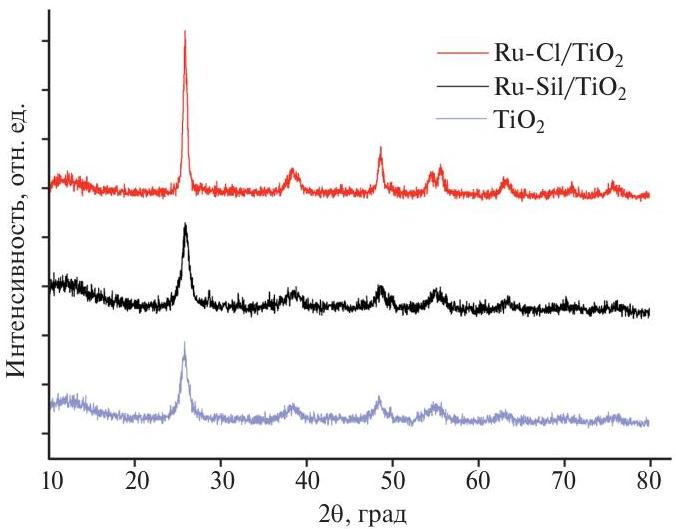

Рис. 1. Дифрактограммы образцов исходного наноразмерного $\mathrm{TiO}_{2}, \mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ и $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$.

и $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$ на его основе составляет 285, 321, $264 \mathrm{~m}^{2} /$ г соответственно. Рост площади удельной поверхности согласуется с данными РФЭС, так как на поверхности катализатора $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ присутствует значительное количество кремния(IV).

В табл. 1 представлен состав поверхности катализаторов $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ и $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$. Концентрация в них атомов $\mathrm{Ti}, \mathrm{O}, \mathrm{C}, \mathrm{Ru}$ и Si составляет 16,$82 ; 54,97 ; 18,9 ; 0,26 ; 9,05$ ат. $\%$ и $\mathrm{Ti}, \mathrm{O}, \mathrm{C}, \mathrm{Ru}$ и Cl 21,$34 ; 53,1 ; 24,9 ; 0,15 ; 0,51$ ат. $\%$ соответственно.

Для оценки фазового состава поверхности исследованных образцов была проведена деконволюция спектров $\mathrm{Cl} s, \mathrm{O} 1 s$ и Ru 3 d , также приведены спектры $\mathrm{Si} 2 p$ и $\mathrm{Cl} 2 p$ (рис. 2). Деконволюция спектра $\mathrm{Cl} s$ и Ru 3 d (рис. 2a) показала, что углерод находится в трех состояниях: $\mathrm{C}-\mathrm{C}$, $\mathrm{C}-\mathrm{OH}$ и $\mathrm{O}=\mathrm{C}-\mathrm{OH}$, в то время как энергия связи рутения соответствует элементу в окисленной форме, так называемой $\mathrm{Ru}^{\mathrm{d+}}$. Кислород (рис. 2б) находится в трех формах для образца $\mathrm{RuCl} / \mathrm{TiO}_{2}$ : $\mathrm{O}^{2-}(\mathrm{O}-\mathrm{Ti}),-\mathrm{OH}$ и $\mathrm{H}_{2} \mathrm{O}_{\text {адс }}$, и четырех формах для образца $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}: \mathrm{O}^{2-}(\mathrm{O}-\mathrm{Ti}), \mathrm{O}^{2-}(\mathrm{O}-\mathrm{Si}),-\mathrm{OH}$ и $\mathrm{H}_{2} \mathrm{O}_{\text {адс }}$. Указанные в табл. 1 значения энергии связи для Ru 3 d соответствуют рутению в окисленном состоянии и согласуются с литературными данными [22].

На микрофотографиях (рис. 3) катализатора $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$, полученных методом РЭМ, не видны частицы Ru как в изображении вторичных, так и обратно отраженных электронов; в то же время по данным рентгеноспектрального микроанализа удалось зафиксировать присутствие в катализаторах Ru, Si и Cl . На микрофотографиях же

Таблица 1. Состав поверхности полученного Ru-Sil/ $\mathrm{TiO}_{2}$ и $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$ катализаторов

| Элемент энергия связи, эВ |  | $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ |  |  |
| :--: | :--: | :--: | :--: | :--: |
|  |  | доля, ат.\% | доля, <br> ат.\% |  |
| Ti | $\begin{gathered} 2 p_{3 / 2} \\ 2 p_{1 / 2} \end{gathered}$ | $\begin{aligned} & 458,8\left(\mathrm{TiO}_{2}\right) \\ & 464,5\left(\mathrm{TiO}_{2}\right) \end{aligned}$ | 16,82 | 100 |
|  | $\begin{gathered} 1 s \\ 1 s \\ 1 s \\ 1 s \end{gathered}$ | $\begin{aligned} & 530,2(\mathrm{Ti}-\mathrm{O}) \\ & 532,1(\mathrm{Si}-\mathrm{O}) \\ & 531,6(\mathrm{Ti}-\mathrm{OH}) \\ & 534,5\left(\mathrm{H}_{2} \mathrm{O}\right. \text { адс.) } \end{aligned}$ | 54,97 | $\begin{aligned} & 39,6 \\ & 26,1 \\ & 27,2 \\ & 7,1 \end{aligned}$ |
|  | $\begin{gathered} 1 s \\ 1 s \\ 1 s \end{gathered}$ | $\begin{gathered} 286,3(\mathrm{C}-\mathrm{C}) \\ 284,7(\mathrm{C}-\mathrm{C}) \\ 288,9(\mathrm{O}=\mathrm{C}-\mathrm{O}) \end{gathered}$ | 18,9 | $\begin{aligned} & 74,9 \\ & 15,9 \\ & 9,2 \end{aligned}$ |
| Ru | $3 d_{5 / 2}$ | 281,2 (Ru ${ }^{b+}$ ) | 0,26 | 100 |
| Si | $2 p$ | 103.4 | 9,05 | 100 |
| Элемент |  | $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$ |  |  |
| Ti | $\begin{gathered} 2 p_{3 / 2} \\ 2 p_{1 / 2} \end{gathered}$ | $\begin{aligned} & 458,8\left(\mathrm{TiO}_{2}\right) \\ & 464,5\left(\mathrm{TiO}_{2}\right) \end{aligned}$ | 21,34 | 100 |
|  | $\begin{gathered} 1 s \\ 1 s \\ 1 s \end{gathered}$ | $\begin{aligned} & 530,5(\mathrm{Ti}-\mathrm{O}) \\ & 531,9(\mathrm{Ti}-\mathrm{OH}) \\ & 533,8\left(\mathrm{H}_{2} \mathrm{O}\right. \text { адс.) } \end{aligned}$ | 53,10 | $\begin{aligned} & 81,3 \\ & 17,6 \\ & 1,1 \end{aligned}$ |
|  | $\begin{gathered} 1 s \\ 1 s \\ 1 s \end{gathered}$ | $\begin{gathered} 286,3(\mathrm{C}-\mathrm{C}) \\ 284,7(\mathrm{C}-\mathrm{C}) \\ 288,9(\mathrm{O}=\mathrm{C}-\mathrm{O}) \end{gathered}$ | 24,90 | $\begin{aligned} & 70,0 \\ & 20,0 \\ & 10,0 \end{aligned}$ |
| Ru | $3 d_{5 / 2}$ | 281,1 (Ru ${ }^{b+}$ ) | 0,15 | 100 |
| Cl | $2 p$ | 289,9 (Cl ${ }^{-}$) | 0,51 | 100 |

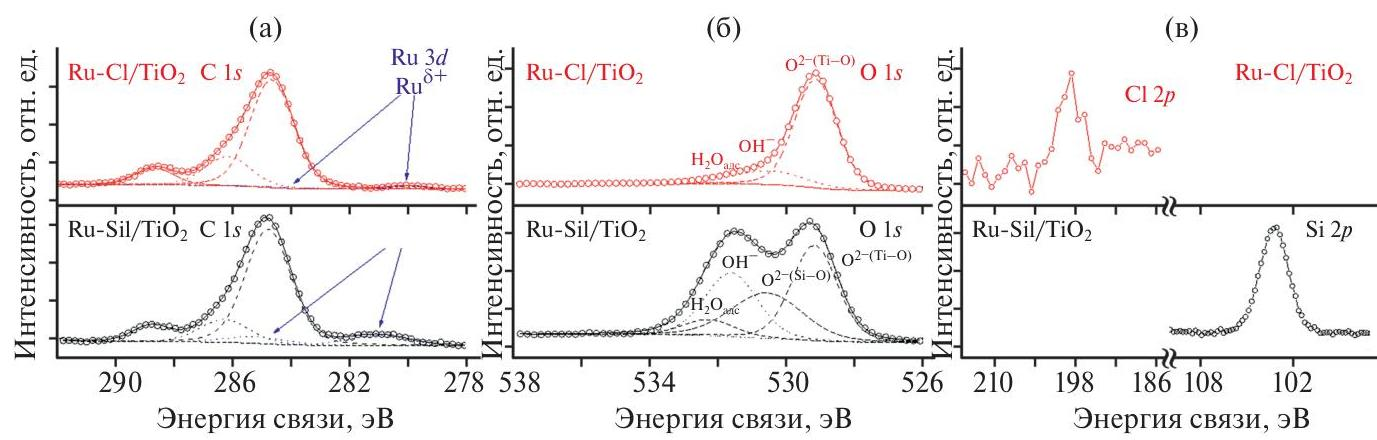

Рис. 2. РФЭС-спектры катализаторов $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ и $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$ : (а) $\mathrm{Cl} s+\mathrm{Ru} 3 d$, (б) $\mathrm{O} 1 s$, (в) $\mathrm{Si} 2 p$ и $\mathrm{Cl} 2 p$.

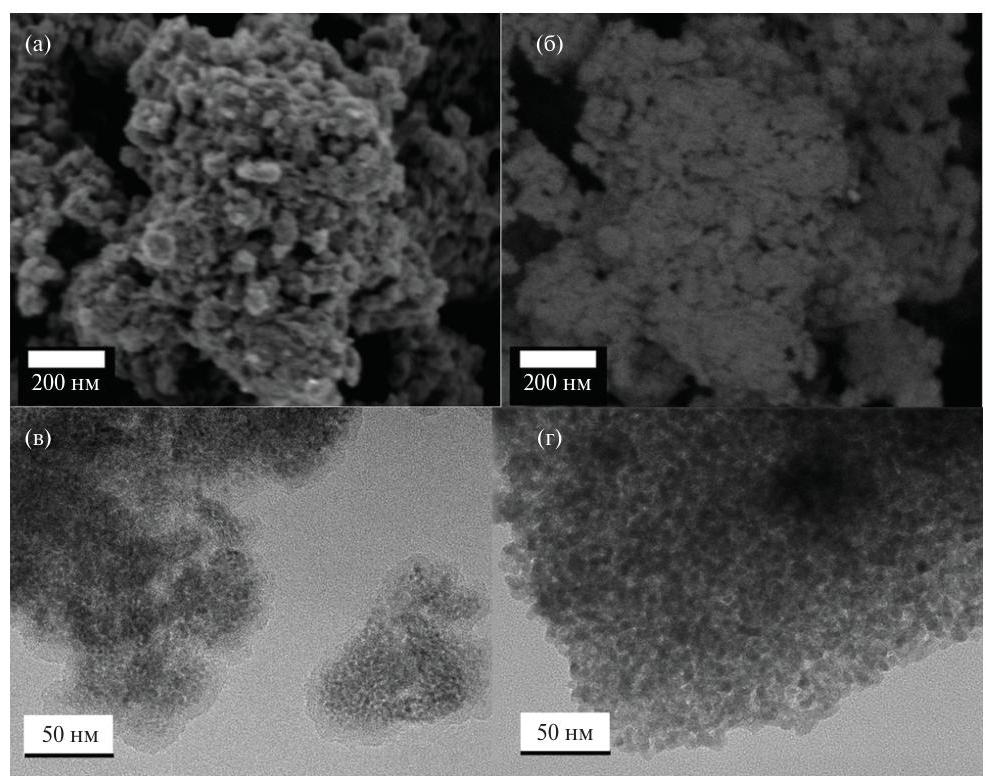

Рис. 3. Микрофотографии, полученные с использованием РЭМ и ПЭМ: для Ru-Sil/TiO ${ }_{2}$-катализатора (а, б, в); для $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$-катализатора (г).
$\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$-катализатора, полученного методом ПЭМ, также можно наблюдать отсутствие агломератов наночастиц рутения, в то время как частицы $\mathrm{TiO}_{2}$ связаны между собой -SiO -сеткой.

По данным термопрограммируемого восстановления водородом (рис. 4) можно заключить,
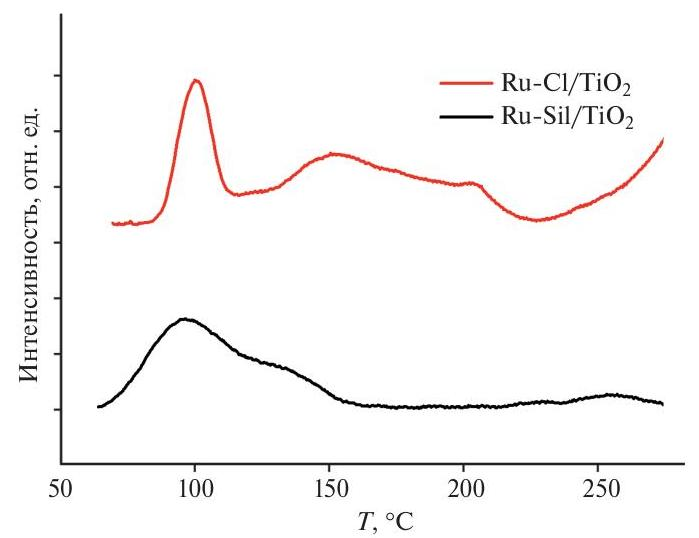

Рис. 4. Профили ТПВ- $\mathrm{H}_{2}$ для образцов $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$ и $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}$.

что восстановление окисленной формы Ru на поверхности диоксида титана происходит при разных условиях. Так, для образца, полученного из рутенийсилоксанового олигомера процесс восстановления Ru завершается до $150^{\circ} \mathrm{C}$ в то время как для образца, полученного из хлорида Ru , четко разделены две стадии восстановления, что может соответствовать восстановлению из оксидной фазы и оксохлоридной фазы, причем вторая стадия протекает до $230^{\circ} \mathrm{C}$ (см. экспериментальную часть).

Продуктами реакции гидродезоксигенации гваякола являются циклогексанол, циклогексанон, смесь иис-/транс-метоксициклогексанолов, циклогексан, метанол и фенол (рис. 5).

Результаты каталитических экспериментов для образца $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$, приведенные на рис. 6 , демонстрируют существенное возрастание активности катализатора в реакции гидрирования гваякола с увеличением температуры. Стоит отметить, что с повышением температуры с 200 до $250^{\circ} \mathrm{C}$ количество циклогексанола и циклогексана возрастает, а количество метоксициклогексанола уменьшается (рис. 6).

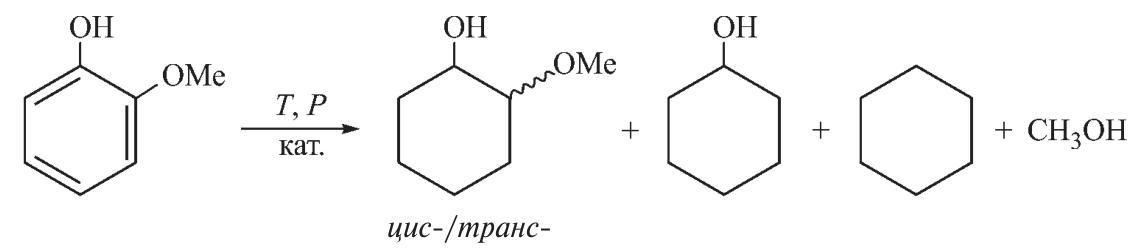

Рис. 5. Схема реакции гидрирования гваякола.
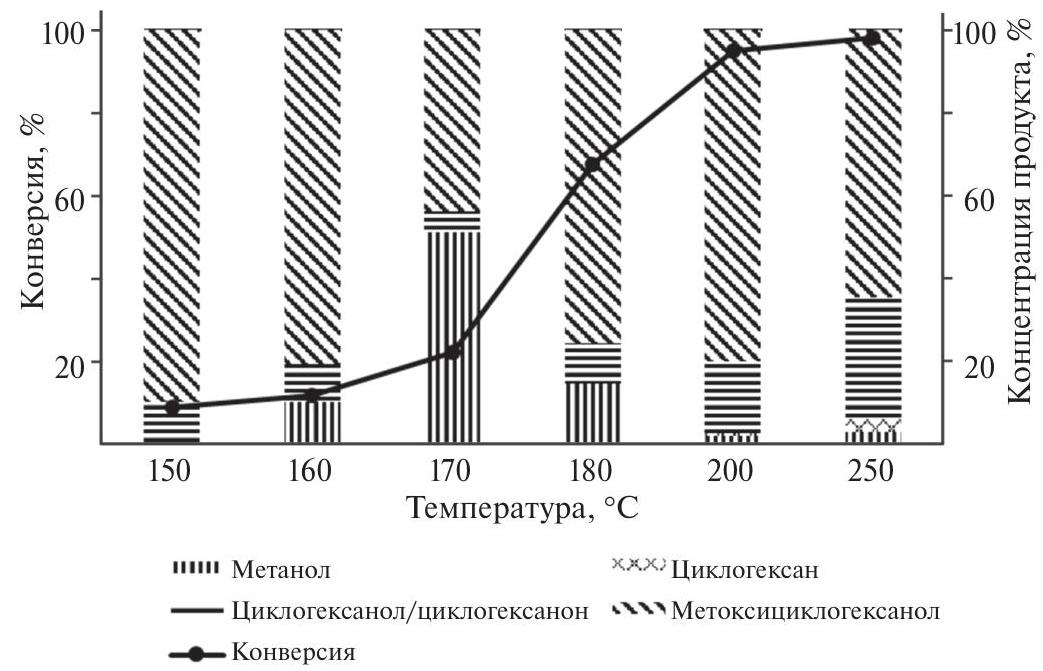

Рис. 6. Зависимость конверсии и селективности продуктов гидрирования гваякола при температуре $150-250^{\circ} \mathrm{C}$, 5 МПа, 1 ч для катализатора $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}$.

Таблица 2. Гидрирование гваякола в $н$-додекане на Ru-катализаторах при $200^{\circ} \mathrm{C}, 50$ атм $\mathrm{H}_{2}, \tau=1$ ч

| Показатель | Ru-Sil/TiO ${ }_{2}$ | Ru-Cl/TiO ${ }_{2}$ | Ru/TS-1 | Ru/ZSM-5 | Ru/HMS |
| :--: | :--: | :--: | :--: | :--: | :--: |
| Содержание Ru, мас.\% | 0,48 | 0,49 | 0,96 | 0,98 | 0,91 |
| Конверсия гваякола | 98,2 | 3,2 | 64,8 | 90,9 | 79,2 |
| Селективность |  |  |  |  |  |
| Метанол | 1,7 | 16,5 | 7,4 | 3,5 | 4,4 |
| Циклогексан | 0,8 | 1,0 | - | 3,9 | 1,4 |
| Циклогексанол/ циклогексанон | 17,3 | 9,5 | 14,4 | 16,9 | 19,4 |
| Метоксициклогексанол | 80,2 | 65,5 | 78,3 | 74,6 | 74,7 |
| Фенол | - | - | - | 1,1 | 0,2 |

В табл. 2 приведены значения конверсии и селективность по продуктам для образцов сравнения на основе нанесенного на цеолит рутения.

Конверсия для образца, полученного из рутенийсилоксана, на порядок выше, чем для образца, полученного пропиткой хлоридом Ru , и сопоставима с конверсией для образцов сравнения на основе цеолитов с содержанием $\mathrm{Ru} \sim 1$ мас. $\%$. Стоит отметить также тот факт, что для всех катализаторов при данной температуре селективность по метоксициклогексанолу составила $\sim 75-80 \%$. Для образцов, содержащих Ti , не наблюдается продуктов прямой дезоксигенации, в то время как для образцов Ru/ZSM-5 и Ru/HMS в продуктах реакции присутствует фенол.

## ЗАКЛЮЧЕНИЕ

В ходе исследования были получены катализаторы $\mathrm{Ru} / \mathrm{TiO}_{2}$ из рутенийсилоксанового олигомера и наноразмерного диоксида титана. Методом РФЭС выявлено, что при данном способе получения $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}(0,5$ мас. $\%$ ) рутений находится в окисленном состоянии; методами электронной микроскопии не обнаружены крупные частицы Ru. Исследования каталитических свойств в реакции гидрирования гваякола в $н$-додекане показали, что катализатор $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}(0,5$ мас.\%), полученный из рутенийсилоксанового олигомера, обладает большей активностью по сравнению с аналогичным катализатором, полученным пропиткой из хлорида $\mathrm{Ru}(\mathrm{III})$ с селективностью по метоксициклогексанолу $\sim 75-80 \%$. Проведенное сравнение $\mathrm{Ru}-\mathrm{Sil} / \mathrm{TiO}_{2}(0,5$ мас.\%) с катализаторами $\mathrm{Ru}-\mathrm{Cl} / \mathrm{TiO}_{2}, \mathrm{Ru} / \mathrm{TS}-1, \mathrm{Ru} / \mathrm{ZSM}-5$, $\mathrm{Ru} / \mathrm{HMS}$ показало, что при одинаковых условиях проведения реакции, конверсия гваякола не уступает значениям конверсии на катализаторах на основе цеолитов. В ходе исследования было установлено, что для образцов содержащих Ti не наблюдается продуктов прямой дезоксигенации, в частности фенола.

## ФИНАНСИРОВАНИЕ

Исследования проводились в рамках проекта РНФ № 23-23-00662.

## БЛАГОДАРНОСТИ

Работа выполнена с использованием оборудования ЦКП «Аналитический центр проблем глубокой переработки нефти и нефтехимии» ИНХС

РАН. Авторы выражают благодарность ЦКП ФМИ ИОНХ РАН за содействие в проведении исследований свойств катализаторов методом растровой электронной микроскопии. Аттестация синтезированных образцов гетерогенных катализаторов выполнена при финансовой поддержке Минобрнауки России (Соглашение № 075-15-2021-1363).

## КОНФЛИКТ ИНТЕРЕСОВ

А.Л. Максимов является главным редактором журнала «Нефтехимия», у остальных авторов конфликт интересов, требующий раскрытия в данной статье, отсутствует.

## ИНФОРМАЦИЯ О ВКЛАДЕ АВТОРОВ

А.Л. Максимов, А.М. Музафаров и Е.Р. Наранов поставили цели и задачи исследования, предложили набор физико-химических методов анализа для изучения катализатора; А.Н. Тарасенков осуществил синтез рутенийсилоксанового олигомера; А.А. Садовников и Е.Р. Наранов разработали методику получения и осуществили синтез катализаторов, обработали данные, полученные методами электронной микроскопии, рентгеновской фотоэлектронной спектроскопии и рентгенофазового анализа. А.А. Садовников, Е.Р. Наранов и Р.А. Пинеда провели каталитические эксперименты и интерпретировали результаты хроматографического анализа смесей продуктов, подготовили графические материалы для публикации.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Садовников Алексей Александрович, ORCID: https://orcid.org/0000-0002-3574-0039

Наранов Евгений Русланович, к.х.н., ORCID: https://orcid.org/0000-0002-3815-9565

Родригес Пинеда Рикардо Артурович, ORCID: https://orcid.org/0009-0001-2744-2242

Тарасенков Александр Николаевич, к.х.н., ORCID: https://orcid.org/0000-0003-0723-2771

Музафаров Азиз Мансурович, д.х.н., академик PAH, ORCID: https://orcid.org/0000-0002-3050-3253

Максимов Антон Львович, д.х.н., академик РАН, ORCID: http://orcid.org/0000-0001-9297-4950

## СПИСОК ЛИТЕРАТУРЫ

1. Vispute T.P., Zhang H., Sanna A., Xiao R., Huber G.W. Renewable chemical commodity feedstocks from integrated catalytic processing of pyrolysis oils // Science. 2010. V. 330, № 6008. P. 1222-1227.
https://www.science.org/doi/abs/10.1126/science. 1194218
2. Stöcker M. Biofuels and biomass-to-liquid fuels in the biorefinery: catalytic conversion of lignocellulosic biomass using porous materials // Angew. Chem. Int. Ed. 2008. V. 47, № 48. P. 9200-9211.
https://onlinelibrary.wiley.com/doi/full/10.1002/ anie. 200801476
3. Mohan D., Pittman Jr. C.U., Steele P.H. Pyrolysis of wood/biomass for bio-oil: A critical review // Energy Fuels. 2006. V. 20, № 3. P. 848-889. https://pubs.acs.org/doi/abs/10.1021/ef0502397
4. Bridgwater A.V., Peacocke G.V.C. Fast pyrolysis processes for biomass // Renew. Sustain. Energy Rev. 2000. V. 4, № 1. P. 1-73.
https://dx.doi.org/10.1016/S1364-0321(99)00007-6
5. Huber G.W., Iborra S., Corma A. Synthesis of transportation fuels from biomass: Chemistry, catalysts, and engineering // Chem. Rev. 2006. V. 106, № 9. P. 4044-4098.
https://pubs.acs.org/doi/full/10.1021/cr068360d
6. Наранов Е.Р., Дементьев К.И., Герзелиев И.М., Колесниченко Н.В., Ролдугина Е.А., Максимов А.Л. Роль цеолитного катализа в современной нефтепереработке: вклад отечественных разработок // Современные молекулярные сита. 2019. Т. 1, № 1. C. $3-11$.
[Naranov E.R., Dement'ev K.I., Gerzeliev I.M., Kolesnichenko N.V., Roldugina E.A., Maksimov A.L. The role of zeolite catalysis in modern petroleum refining: Contribution from domestic technologies // Petrol. Chem. 2019. V. 59. P. 247-261.
https://doi.org/10.1134/S0965544119030101]
7. Su J., Li T., Luo G., Zhang Y., Naranov E.R., Wang K. Co-hydropyrolysis of pine and HDPE over bimetallic catalysts: Efficient BTEX production and process mechanism analysis // Fuel Process. Technol. 2023. V. 249. ID107845.
https://doi.org/10.1016/j.fuproc.2023.107845
8. Naranov E.R., Sadovnikov A.A., Arapova O.V., Bugaev A.L., Usoltsev O.A., Gorbunov D.N., Russo V., Murzin D.Y., Maximov A.L. Mechanistic insights on Ru nanoparticle in situ formation during hydrodeoxygenation of lignin-derived substances to hydrocarbons // Catal. Sci. Technol. 2023. V. 13, № 5. P. $1571-1583$.
https://doi.org/10.1039/D2CY01127A
9. Hu X., Gholizadeh M. Progress of the applications of bio-oil // Renew. Sustain. Energy Rev. 2020. V. 134. ID110124.
https://dx.doi.org/10.1016/j.rser.2020.110124
10. Pinheiro Pires A.P., Arauzo J., Fonts I., Domine M.E., Fernández Arroyo A., Garcia-Perez M.E., Montoya J., Chejne F., Pfromm P., Garcia-Perez M. Challenges and opportunities for bio-oil refining: A review // Energy Fuels. 2019. V. 33, № 6. P. 4683-4720.
https://dx.doi.org/10.1021/acs.energyfuels.9b00039
11. Sharifzadeh M., Sadeqzadeh M., Guo M., Borhani T.N., Murthy Konda N.V.S.N., Garcia M.C., Wang L., Hallett J., Shah N. The multi-scale challenges of biomass fast pyrolysis and bio-oil upgrading: Review of the state of art and future research directions // Prog. Energy Combust. Sci. 2019. V. 71. P. 1-80.
https://dx.doi.org/10.1016/j.pecs.2018.10.006
12. Wang Y., Akbarzadeh A., Chong L., Du J., Tahir N., Kumar Awasthi M. Catalytic pyrolysis of lignocellulosic biomass for bio-oil production: A review // Chemosphere. 2022. V. 297. ID134181.
https://dx.doi.org/10.1016/j.chemosphere.2022.134181
13. Yang Z., Kumar A., Huhnke R.L. Review of recent developments to improve storage and transportation stability of bio-oil // Renew. Sustain. Energy Rev. 2015. V. 50. P. 859-870.
https://dx.doi.org/10.1016/j.rser.2015.05.025
14. Valle B., Remiro A., García-Gómez N., Gayubo A.G., Bilbao J. Recent research progress on bio-oil conversion into bio-fuels and raw chemicals: a review // J. Chem. Technol. Biotechnol. 2018. V. 94, № 3. P. 670-689.
https://dx.doi.org/10.1002/jctb. 5758
15. Saber M., Nakhshiniev B., Yoshikawa K. A review of production and upgrading of algal bio-oil // Renew. Sustain. Energy Rev. 2016. V. 58. P. 918-930. https://dx.doi.org/10.1016/j.rser.2015.12.342
16. Naranov E., Sadovnikov A., Arapova O., Kuchinskaya T., Usoltsev O., Bugaev A., Janssens K., de Vos D., Maximov A. The in-situ formation of supported hydrous ruthenium oxide in aqueous phase during HDO of lignin-derived fractions // Appl. Catal. B: Environ. 2023. V. 334. ID122861.
https://dx.doi.org/10.1016/j.apcatb.2023.122861
17. Wan S., Pham T., Zhang S., Lobban L., Resasco D., Mallinson R. Direct catalytic upgrading of biomass pyrolysis vapors by a dual function $\mathrm{Ru} / \mathrm{TiO}_{2}$ catalyst // AIChE J. 2013. V. 59, № 7. P. 2275-2285.
https://aiche.onlinelibrary.wiley.com/doi/full/ 10.1002/aic. 14038
18. Boonyasuwat S., Omotoso T., Resasco D.E., Crossley S.P. Conversion of guaiacol over supported Ru catalysts // Catal. Lett. 2013. V. 143, № 8. P. 783-791. https://dx.doi.org/10.1007/s10562-013-1033-3

19. Shu R., Lin B., Zhang J., Wang C., Yang Z., Chen Y. Efficient catalytic hydrodeoxygenation of phenolic compounds and bio-oil over highly dispersed $\mathrm{Ru} / \mathrm{TiO}_{2} / /$ Fuel Process. Technol. 2019. V. 184. P. 12-18. https://dx.doi.org/10.1016/j.fuproc.2018.11.004
20. Glotov A., Novikov A., Stavitskaya A., Nedolivko V., Kopitsyn D., Kuchierskaya A., Ivanov E., Stytsenko V., Vinokurov V., Lvov Y. Nanoreactors based on hydrophobized tubular aluminosilicates decorated with ruthenium: Highly active and stable catalysts for aromatics hydrogenation // Catal. Today. 2021. V. 378. P. 33-42. https://dx.doi.org/10.1016/j.cattod.2020.10.001
21. Садовников А.А., Наранов Е.Р., Судьин В.В., Тарасенков А.Н., Музафаров А.М., Максимов А.Л. Получение и фотокаталитические свойства допированного рутением диоксида титана // Нефтехимия. 2025. T. 65. № 1. C. 44-54. EDN: LKWPTO https://dx.doi.org/10.31857/S0028242125010041
22. Zhou J., Gao Z., Xiang G., Zhai T., Liu Z., Zhao W., Liang X., Wang L. Interfacial compatibility critically controls $\mathrm{Ru} / \mathrm{TiO}_{2}$ metal-support interaction modes in $\mathrm{CO}_{2}$ hydrogenation // Nat. Commun. 2022. V. 13. ID327.
https://doi.org/10.1038/s41467-021-27910-4

# ОСОБЕННОСТИ СОСТАВА И СТРУКТУРЫ АСФАЛЬТЕНОВ И СМОЛ ОСТАТОЧНОГО ПРОДУКТА КОМБИНИРОВАННОГО ТЕРМО- И ГИДРОКРЕКИНГА ГУДРОНА В СУСПЕНЗИОННОЙ ФАЗЕ 

© 2025 г. М. Р. Якубов ${ }^{1, *}$, А. А. Храмов ${ }^{2}$, М. Р. Идрисов ${ }^{2}$, Ю. Ю. Борисова ${ }^{1}$, Д. Н. Борисов ${ }^{1}$, С. Г. Якубова ${ }^{1}$, Э. Г. Тазеева ${ }^{1}$, Д. И. Тазеев ${ }^{1}$<br>${ }^{1}$ Институт органической и физической химии им. А.Е. Арбузова -<br>обособленное структурное подразделение Федерального государственного бюджетного учреждения науки «Федеральный исследовательский центр Казанский НЦ РАН», Казань, 420088 Татарстан<br>${ }^{2} A O$ «ТАИФ-НК», Нижнекамск, 423574 Татарстан<br>*E-mail: yakubovmr@mail.ru

Поступила в редакцию 3 апреля 2025 г.
После доработки 8 апреля 2025 г.
Принято к публикации 29 апреля 2025 г.


#### Abstract

Впервые исследован состав асфальтенов и смол концентрированного остатка гидрокрекинга гудрона (КОГГ), получаемого по технологии комбинированного термо- и гидрокрекинга в суспензионной фазе. Содержание асфальтенов в КОГГ составляет 48,6 мас. \%, а смол - 14,3 мас.\%. Сопоставительный анализ асфальтенов и смол КОГГ методами ИК-спектроскопии, масс-спектрометрии матрично-активированной лазерной десорбции/ионизации (МАЛДИ), элементного анализа, ТГА, ЭПР и ААС позволил выявить основные особенности их состава и структуры в сравнении с соответствующими компонентами в исходном гудроне. В результате показано, что асфальтены и смолы КОГГ отличаются от соответствующих компонентов исходного гудрона меньшей молекулярной массой, более высокой долей ароматических и конденсированных структур и более чем в 30 раз сниженным содержанием ванадия и никеля. Полученные результаты позволяют предположить, что в составе асфальтенов и смол КОГГ в основном присутствуют новообразованные за счет поликонденсации компоненты, а также определенные полиароматические структуры, которые не могут быть конвертированы в дистилляты в условиях гидрокрекинга.


Ключевые слова: тяжелые нефтяные остатки, суспензионный гидрокрекинг, гудрон, асфальтены, смолы, состав, структура
DOI: 10.31857/S0028242125020036, EDN: KLVDLZ

При переработке тяжелого нефтяного сырья (ТНС) все более востребованы процессы полной конверсии сырья в дистилляты без образования нефтяных остатков и кокса. Значительное содержание асфальтенов и смол в ТНС - основная причина образования продуктов уплотнения (кокса) в термокаталитических процессах, что приводит к быстрой дезактивации традиционных катализаторов на носителе и обусловливает жесткие ограничения к свойствам исходного сырья $[1-3]$.

Гидрокрекинг в суспензионной фазе - один из вариантов преодоления подобных ограничений, в основном за счет усиления реакций гидрирования в присутствии диспергированных катализаторов с большой удельной площадью поверхности [4-6].

Процессы, основанные на различных вариантах гидрокрекинга ТНС и остатков в присутствии суспензионных мелкодисперсных катализаторов, представили различные компании [7]. В по-

следние годы на нефтеперерабатывающем заводе АО «ТАИФ-НК» реализован уникальный процесс комбинированного термо- и гидрокрекинга гудрона в суспензионной фазе, который позволяет достигать выхода светлых нефтепродуктов до $98,2 \%$ и глубины переработки до $98,6 \%$ [8, 9]. Технология отличается от других вариантов гидрокрекинга наличием отдельного реакторного блока, работающего с суспендированным слоем добавки, адсорбирующей на своей поверхности асфальтены, смолы, гетероатомные компоненты и соединения металлов, что позволяет очистить сырье от нежелательных компонентов и на следующей стадии использовать традиционный гидрокрекинг со стационарным слоем катализатора для получения товарных топливных нефтепродуктов. На первой стадии процесса при температуре $430-470^{\circ} \mathrm{C}$ и давлении $200-210$ атм в присутствии специальной угольной добавки без каталитического воздействия получается очищенный от соединений металлов гидрогенизат, а также $2-3 \%$ (в расчете на сырье) концентрированного остатка гидрокрекинга гудрона (КОГГ), который представляет собой твердый непластичный (при комнатной температуре) материал, содержащий в основном смолы, асфальтены, карбены и карбоиды (рис. 1).

Асфальтены и смолы, в зависимости от условий процесса, претерпевают ряд изменений в процессе гидрокрекинга. Известно, что при высоких температурах и давлении в подобных процессах существенно меняется состав и структура асфальтенов [10-16].

Основные изменения в структуре асфальтенов связаны с отрывом алкильных заместите-
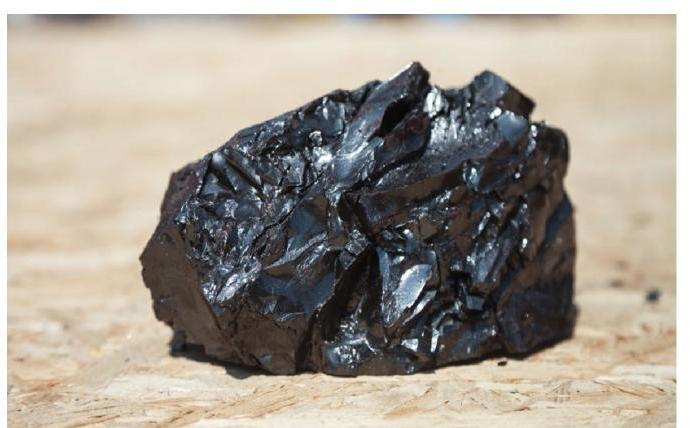

Рис. 1. Внешний вид концентрированного остатка гидрокрекинга гудрона (КОГГ).

лей, которые являются наиболее лабильными при повышении температуры, с образованием свободных радикалов. Снижение доли алифатического углерода в асфальтенах сопровождается снижением атомного отношения $\mathrm{H} / \mathrm{C}$, соответственно, возрастает доля ароматических структур. Молекулярная масса также уменьшается при удалении алифатических цепей, при этом молекулярно-массовое распределение (ММР) становится более узким. Несмотря на значительный объем исследований, проведенных в последние годы в этом направлении, до настоящего времени отсутствует информация об изменениях в составе асфальтенов и смол в процессе гидрокрекинга в присутствии адсорбирующих добавок.

Глубина переработки нефти определяется не только количеством выработки дистиллятных фракций, но и направлением использования остатка, в котором концентрируются преобразованные асфальтены и смолы. В последнее время наблюдается возрастающий интерес исследователей к методам получения ценных продуктов (углеродных материалов, наполнителей для полимеров, сорбентов, катализаторов, суперконденсаторов и пр.) на основе нефтяных асфальтеновых концентратов [17-22]. Анализ состава и свойств асфальтенов и смол КОГГ позволит выбрать оптимальное направление его применения с возможностью получения высокомаржинальных продуктов.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

Гудрон и КОГГ были предоставлены АО «ТАИФ-НК». Все растворители и реагенты имели квалификацию не ниже х. ч. В качестве адсорбента применяли силикагель марки АСКГ (ГОСТ-3956-76), который перед использованием сушили (5 ч, $150^{\circ} \mathrm{C}$ ).

КОГГ разделяли на толуолнерастворимую (ТНР) и толуолрастворимую (ТР) части путем добавления 20 -кратного избытка толуола. Полученную смесь подогревали до $100^{\circ} \mathrm{C}$ при перемешивании, затем охлаждали до комнатной температуры. Фильтрованием отделяли осадок ТНР, который затем промывали толуолом в аппарате Сокслета до обесцвечивания стекающего растворителя, с последующим высушиванием до постоянной массы в вакуум-сушильном шкафу при $80^{\circ} \mathrm{C}$. Из фильтрата (ТР) отгоняли растворитель и после высушивания до постоян-

ной массы получали твердый темно-коричневый порошок, который затем фракционировали на асфальтены, смолы и масла (углеводороды). Для выделения асфальтенов исходный объект (гудрон или ТР) сначала разбавляли небольшим количеством толуола и перемешивали до получения гомогенного вязкого раствора, после чего добавляли 40 -кратный избыток $n$-гексана и выдерживали в течение 24 ч. Затем асфальтены отфильтровывали и промывали $n$-гексаном в аппарате Сокслета до обесцвечивания стекающего растворителя с последующим высушиванием до постоянной массы. Деасфальтизат разделяли на масла и смолы колоночной хроматографией на силикагеле марки АСКГ. Для десорбции масел использовали $н$-гексан, для десорбции смол - смесь толуол : изопропанол = $=(50: 50$ об. $\%$ ).

Масс-спектры МАЛДИ получали на приборе UltraFlex III MALDI-TOF/TOF (Bruker Daltonik GmbH , Германия) в линейном режиме с использованием Nd : YAG-лазера ( 355 нм). Регистрировали положительно заряженные ионы, в качестве матрицы применяли 1,8,9-тригидроксиантрацен. Матрицу и анализируемый образец наносили на металлическую мишень MTP AnchorChipTM последовательно в виде $1 \%$-ных растворов в толуоле объемом 0,5 мкл. Значения максимальной молекулярной массы $\mathrm{M}_{\max }$ рассчитывали по данным МАЛДИ-спектров по методике, описанной в работе [23].

Содержание водорода и углерода в образцах определяли на CHNS-O-анализаторе Euro EA3028-HT (EuroVector, Italy), содержание V и Ni в образцах - на атомно-абсорбционном спектрометре с электротермической атомизацией «МГА-1000» («Люмекс», Россия). Содержание V и Ni рассчитывали по калибровочной кривой, полученной с использованием в качестве эталона стандарта (Oil based standard solution, Specpure ${ }^{\circledR}$ V $5000 \mu \mathrm{~g} / \mathrm{g}$; Specpure ${ }^{\circledR}$ Ni $5000 \mu \mathrm{~g} / \mathrm{g}$ ) производства Alfa Aesar (Германия).

Спектры электронного парамагнитного peзонанса (ЭПР) регистрировали на спектрометре Elexsys E500 (Bruker, Германия) с микроволновым мостом Bruker ER049X в X-диапазон ( 9,67 ГГц) при комнатной температуре. Условия эксперимента при регистрации спектров: микроволновая мощность 0,63 мВт, амплитуда модуляции 1(4) Гс, время развертки $60(240)$ с, постоянная времени 328 мс.

ИК-спектры образцов регистрировали на приборе Spectrum One FTIR Spectrometer (Perkin Elmer, США) в диапазоне $4000-400 \mathrm{~cm}^{-1}$. Образцы наносили в виде раствора в толуоле на диск из KBr и высушивали до образования тонкой пленки. На основе интенсивности характеристичных полос поглощения в ИК-спектрах были рассчитаны спектральные коэффициенты, характеризующие структурно-групповой состав изучаемых объектов. Алифатичность показывает суммарную долю метиленовых и метильных групп по отношению к ароматическим связям $\mathrm{C}=\mathrm{C}$ (D720+1380/D1600). Ароматичность отражает долю $\mathrm{C}=\mathrm{C}$-связей в ароматических фрагментах по отношению к $\mathrm{C}-\mathrm{H}$-связям в алифатических структурах (D1600/D1460). Разветвленность отражает долю $\mathrm{C}-\mathrm{H}$-связей в метильных фрагментах по отношению к $\mathrm{C}-\mathrm{H}$-связям в метиленовых группах (D1380/D720). Конденсированность показывает долю $\mathrm{C}=\mathrm{C}$-связей в ароматических фрагментах по отношению к $\mathrm{C}-\mathrm{H}$-связям в ароматических структурах (D1600/D740+860).

Термическую стабильность образцов исследовали на приборе синхронного термического анализа STA 449 F3 Jupiter (NETZSCH, Германия). Навеску образца массой 5-18 мг помещали в алюминиевый (при нагреве до $600^{\circ} \mathrm{C}$ ) либо корундовый тигель (при нагреве до $1000^{\circ} \mathrm{C}$ ) с отверстием на крышке. Аргон высокой чистоты подавали при скорости потока газа 70 мл/мин. Измерения выполняли при скоростях нагрева $10 \mathrm{~K} /$ мин.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

В табл. 1 представлены данные по компонентному составу исходного гудрона и КОГГ.

Таблица 1. Компонентный состав гудрона и концентрированного остатка гидрокрекинга гудрона (КОГГ)

| Образец | Содержание, мас.\% |  |  |  |
| :--: | :--: | :--: | :--: | :--: |
|  | THP <br> (карбены + <br> карбоиды) | ТР |  |  |
|  |  | масла <br> (углеводороды) | смолы | асфаль- <br> тены |
| Гудрон | - | 49,9 | 39,8 | 10,3 |
| КОГГ | 13,9 | 23,2 | 14,3 | 48,6 |

Предполагается, что в составе ТНР кроме образовавшихся в процессе гидрокрекинга карбенов и карбоидов имеется также незначительное количество тонкодисперсных частиц отработанной угольной добавки. По сравнению с гудро-

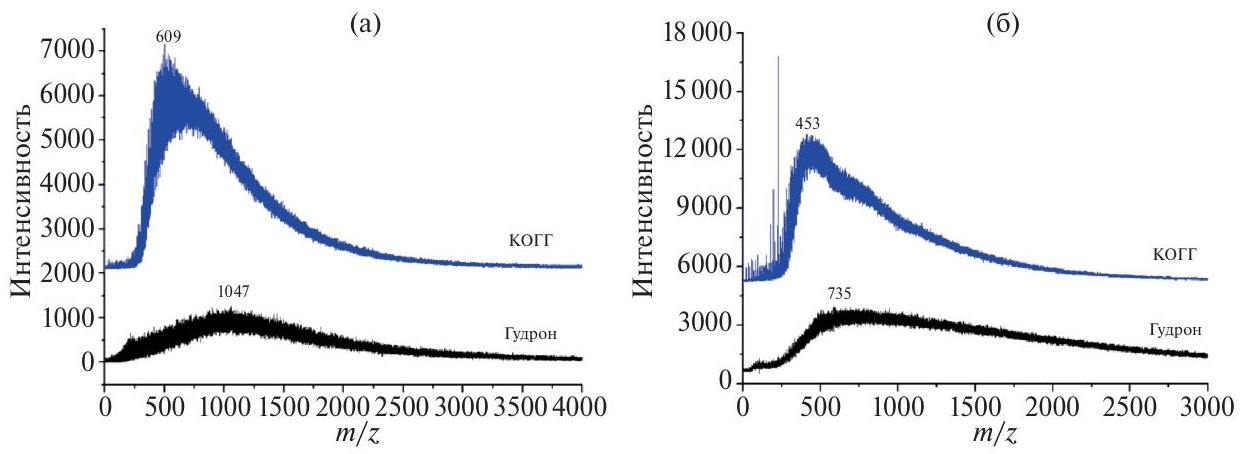

Рис. 2. МАЛДИ-спектры асфальтенов (а) и смол (б), выделенных из гудрона и КОГГ.

ном, в составе КОГГ в 2,8 раза меньше смол, но значительно выше содержание асфальтенов (в 4,7 раза). За счет усовершенствования технологии в настоящее время из тяжелого остатка после первой стадии гидрокрекинга удается обеспечить максимальный отбор дистиллятных фракций, поэтому содержание масел в составе КОГГ имеет такое низкое значение.

Сравнение МАЛДИ-спектров асфальтенов и смол (рис. 2) показывает, что максимальные значения $\mathrm{M}_{\max }$ для этих компонентов из КОГГ смещаются в область меньших масс по сравнению с гудроном.

При сравнении результатов определения содержания водорода и углерода для асфальтенов и смол КОГГ фиксируется уменьшение отношения Н/С по сравнению с гудроном (табл. 2). Также можно отметить, что Н/С для смол из КОГГ и асфальтенов гудрона имеет одинаковое значение.

Таблица 2. Элементный состав асфальтенов и смол, выделенных из гудрона и КОГГ

| Образец | Содержание, <br> мас.\% |  | $\mathrm{H} / \mathrm{C}$ | Содержание, <br> мас.\% |  |
| :--: | :--: | :--: | :--: | :--: | :--: |
|  | C | H |  | V | Ni |
| Асфальтены |  |  |  |  |  |
| Гудрон | 84,42 | 7,72 | 1,10 | 0,1590 | 0,0291 |
| КОГГ | 84,78 | 6,02 | 0,85 | 0,0050 | 0,0049 |
| Смолы |  |  |  |  |  |
| Гудрон | 78,46 | 10,11 | 1,41 | 0,0250 | 0,0040 |
| КОГГ | 86,31 | 7,91 | 1,10 | $<0,0010$ | 0,0006 |

Особый интерес при изучении преобразования асфальтенов и смол в процессе гидрокрекинга представляет вопрос изменения содержания ванадия и никеля, которые в нефтяных объектах существуют в виде металлокомплексов порфиринового типа. Последние относятся к тем немногим соединениям в составе смол и асфальтенов, для которых возможно их извлечение и структурная идентификация. Данная особенность является одной из причин повышенного интереса к данному классу соединений и дает возможность лучше понять природу взаимодействия асфальтенов с металлопорфиринами в различных процессах [16].

Ранее нами было показано, что ванадилпорфирины выполняют связующую функцию в процессе агрегирования асфальтенов [24]. Известно, что в процессе гидрокрекинга асфальтены и металлокомплексы ванадила и никеля участвуют в формировании кокса и становятся его частью [25]. Полученные результаты по содержанию ванадия и никеля показывают значительное снижение данного показателя в асфальтенах и смолах КОГГ по сравнению с соответствующими компонентами гудрона. В итоге в асфальтенах содержание V и Ni меньше в 31,8 и 5,9 раза соответственно, а в смолах ванадия - в 25 раз меньше, никеля - в 6,7 раза.

В этом отношении интересным является более существенное снижение содержания V по сравнению с Ni. В результате гидрокрекинга соотношение V/Ni в асфальтенах и смолах КОГГ становится практически равным единице. При этом соотношение V/Ni в асфальтенах гудрона составляет 5,46 и в смолах 6,25 , что является

характерным для нефтей Волго-Уральского региона [26]. В целом наблюдаемое снижение содержания ванадия и никеля объясняется адсорбцией основного количества соединений этих металлов на поверхности суспендированной добавки на первой стадии процесса гидрокрекинга.

Методом ЭПР-спектроскопии проведен сопоставительный анализ по содержанию основных парамагнитных компонентов в асфальтенах КОГГ и гудрона (табл. 3).

Содержание ВК в асфальтенах КОГГ существенно ниже по сравнению с асфальтенами гуд-

Таблица 3. Содержание ванадиловых комплексов (ВК) и свободных стабильных радикалов (ССР) в асфальтенах по данным ЭПР-спектроскопии

| Образец | Содержание, $\times 10^{18}$ отн. сп. г. |  |
| :-- | :--: | :--: |
|  | ВК | ССР |
| Гудрон | 6,2 | 54,3 |
| КОГГ | 0,4 | 35,4 |

рона, что подтверждает выявленные закономерности на основании результатов определения содержания ванадия методом атомно-абсорбционной спектроскопии. Содержание ССР в ас-
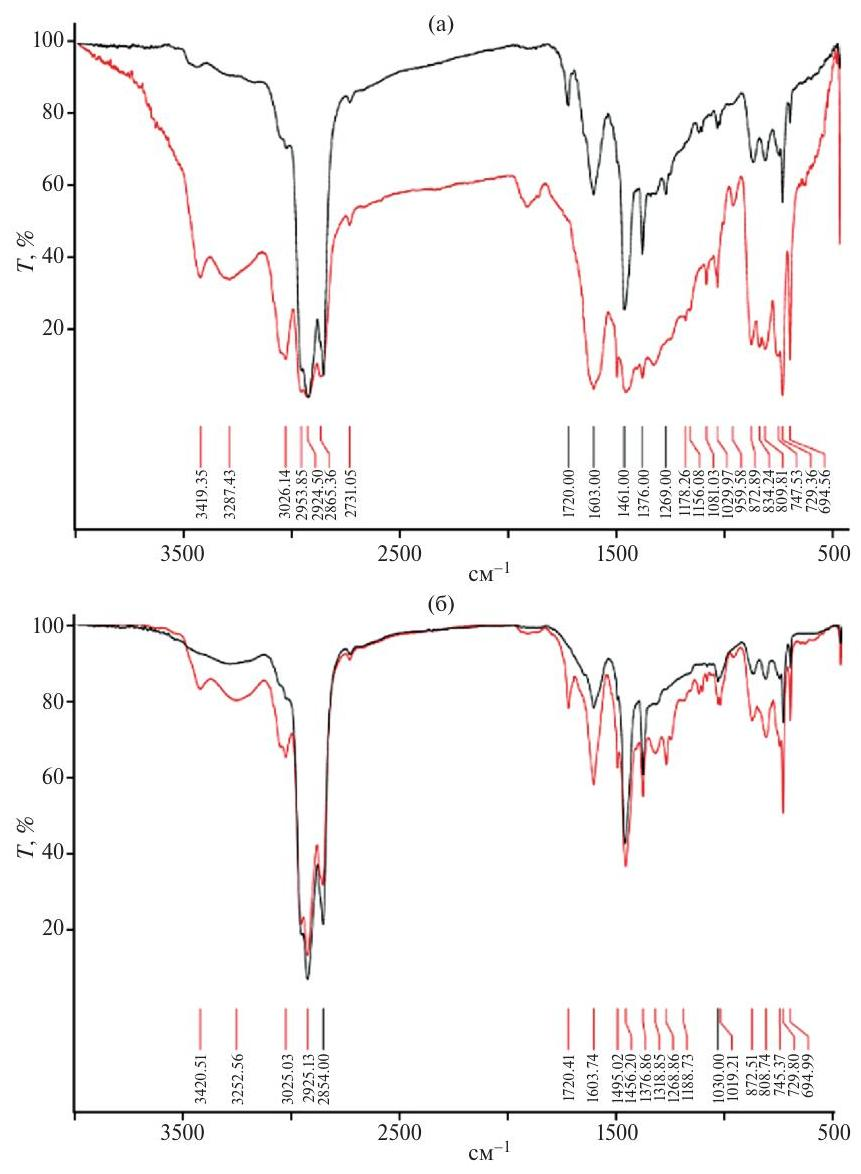

Рис. 3. ИК-спектры асфальтенов (а) и смол (б) (компоненты гудрона - черного цвета, компоненты КОГГ - красного цвета).

Таблица 4. Спектральные коэффициенты, рассчитанные по данным ИК-спектроскопии

| Образец | Алифатичность $\mathrm{CH}_{3}+\mathrm{CH}_{2} / \mathrm{C}=\mathrm{C}$ | Ароматичность $\mathrm{C}=\mathrm{C} / \mathrm{CH}_{2}$ | Разветвленность $\mathrm{CH}_{3} / \mathrm{CH}_{2}$ | Конденсированность $\mathrm{C}=\mathrm{C} / \mathrm{CH}$ |
| :--: | :--: | :--: | :--: | :--: |
| Асфальтены |  |  |  |  |
| Гудрон | 2,7 | 0,4 | 1,5 | 0,7 |
| КОГГ | 2,1 | 0,9 | 0,7 | 1,0 |
| Смолы |  |  |  |  |
| Гудрон | 3,2 | 0,3 | 1,7 | 0,9 |
| КОГГ | 2,3 | 0,6 | 0,9 | 0,9 |

фальтенах КОГГ составляет $65 \%$ от величины данного показателя в асфальтенах гудрона и, как видно, меняется не столь существенно в сравнении с ВК. Как известно, количество ССР в нефтяных асфальтенах отражает долю конденсированных полиароматических структур, а также локальное окружение парамагнитных центров, сопряжение с которыми может стабилизировать свободные радикалы [27, 28].

Сравнение ИК-спектров асфальтенов и смол, а также рассчитанных спектральных коэффициентов (рис. 3, табл. 4) позволило выявить определенные сходства и различия в их структурногрупповом составе.

Асфальтены КОГГ по сравнению с асфальтенами гудрона имеют более высокие значения коэффициентов ароматичности и конденсированности, но меньшие значения коэффициентов разветвленности и алифатичности. Для смол КОГГ можно наблюдать аналогичные изменения в спектральных коэффициентах, за исключением конденсированности, которая не меняется. В целом анализ полученных данных по спектральным коэффициентам подтверждает известные результаты по изменению состава и структуры асфальтенов в процессе гидрокрекинга, где в основном за счет отрыва боковых алкильных заместителей в асфальтенах увеличивается доля ароматических и конденсированных структур. Особый интерес в данном случае вызывает изменение структурных характеристик смол, поскольку до настоящего времени для процесса гидрокрекинга изменения состава и свойств этих компонентов целенаправленно не исследовались.

Методом термогравиметрического анализа (ТГА) оценена термическая стабильность асфальтенов и смол в интервале температур 30$600^{\circ} \mathrm{C}$ (табл. 5 , рис. 4).

Таблица 5. Данные ТГА для асфальтенов и смол, выделенных из гудрона и КОГГ

| Образцы | Температуры потери массы, ${ }^{\circ} \mathrm{C}$ |  |  | Остаток при $600^{\circ} \mathrm{C}$, мас.\% |
| :--: | :--: | :--: | :--: | :--: |
|  | $T_{5 \%}$ | $T_{10 \%}$ | $T_{\text {макс }}$ |  |
| Асфальтены |  |  |  |  |
| Гудрон | 405,5 | 433,5 | 463,2 | 49,75 |
| КОГГ | 370,8 | 414,7 | 452,7 | 67,87 |
| Смолы |  |  |  |  |
| Гудрон | 161,2 | 232,0 | 464,0 | 17,57 |
| КОГГ | 335,8 | 377,7 | 460,1 | 40,44 |

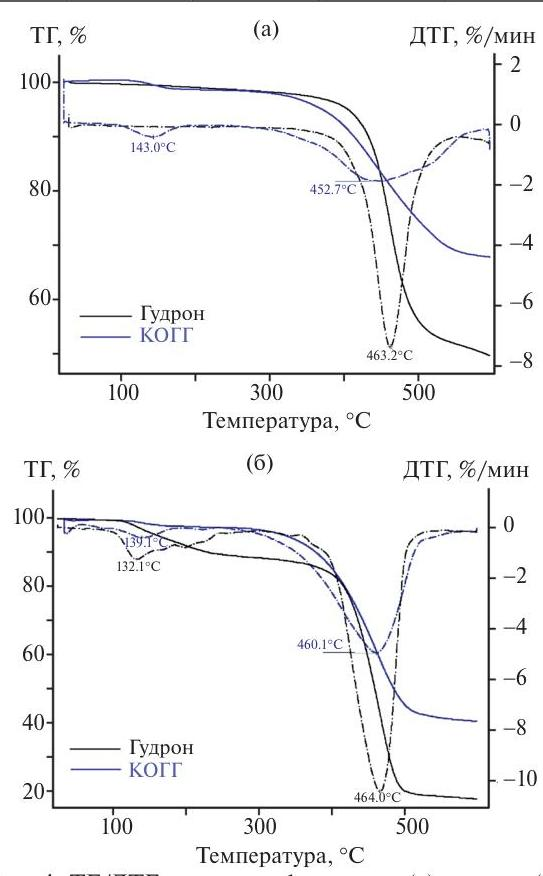

Рис. 4. ТГ/ДТГ-кривые асфальтенов (а) и смол (б), выделенных из гудрона и КОГГ (сплошные линии ТГ-кривые, пунктирные линии - ДТГ-кривые).

Температуры потери 5 и $10 \%$ массы для асфальтенов значительно выше, чем для смол. При этом смолы КОГГ демонстрируют более высокие величины, в то время как асфальтены, наоборот, показывают немного меньшие значения. Максимальная потеря массы для всех образцов происходит в достаточно узком диапазоне температур $452,7-464,0^{\circ} \mathrm{C}\left(T_{\text {макс }}\right)$, при которых за счет процессов термической деструкции и конденсации в итоге образуется остаток в виде коксоподобного продукта. Для смол и асфальтенов из КОГГ выход остатка выше, чем для соответствующих компонентов из гудрона. Полученный результат подтверждает общую особенность структуры асфальтенов и смол КОГГ, где меньше периферических алкильных заместителей, связанных с полиароматическими блоками термически менее устойчивыми вторичными С-С-связями.

Полученные результаты позволяют выявить ряд основных изменений в составе и структуре асфальтенов и смол в процессе комбинированного термо- и гидрокрекинга в суспензионной фазе. По аналогии с другими процессами гидрокрекинга в асфальтенах происходит отрыв боковых алкильных цепей, что приводит к образованию разнообразных углеводородных радикалов. Кроме того, в условиях локального недостатка водорода возникают условия для процессов поликонденсации с образованием вторичных асфальтенов с катаконденсированными полиароматическими структурами, которые считаются предшественниками кокса [11]. Молекулярная масса остаточных асфальтенов уменьшается при удалении алкильных боковых цепей, что приводит к более узкому MMP. Полученные новые данные показали, что изменение MMP смол в процессе комбинированного термо- и гидрокрекинга в суспензионной фазе имеет аналогичную с асфальтенами тенденцию. В этом случае также не исключен вариант образования вторичных смол за счет конденсационных процессов из би- и трициклических ароматических радикалов. Ранее также сообщалось [29], что в остаточных фракциях после гидрокрекинга остаются определенные полиароматические структуры, которые не могут быть конвертированы в дистилляты. Значительное снижение содержания ванадия и никеля в асфальтенах и смолах КОГГ в сравнении с гудроном позволяет утверждать, что основная масса соответствующих металлокомплексов преобразуется в условиях гидрокрекинга. Комплексы ванадила демонстрируют более существенное снижение по сравнению

с никелем, что может быть связано с их парамагнетизмом и более высокой реакционной способностью в условиях гидрокрекинга [30].

## ЗАКЛЮЧЕНИЕ

Проведено исследование состава и свойств асфальтенов и смол остаточного продукта (КОГГ) процесса комбинированного термо- и гидрокрекинга гудрона в суспензионной фазе в сравнении с асфальтенами и смолами исходного гудрона. Технология отличается от других вариантов гидрокрекинга наличием отдельного реакторного блока, работающего с суспендированным слоем добавки, адсорбирующей на своей поверхности асфальтены, смолы, гетероатомные компоненты и соединения металлов, что позволяет очистить сырье от нежелательных компонентов и на следующей стадии использовать традиционный гидрокрекинг со стационарным слоем катализатора для получения товарных топливных нефтепродуктов. В результате показано, что основные изменения асфальтенов и смол в данном случае происходят по аналогии с другими процессами гидрокрекинга. Изучение структуры асфальтенов и смол КОГГ методами масс-спектрометрии МАЛДИ, элементного анализа, ИКи ЭПР-спектроскопии и ТГА показало, что они отличаются меньшими значениями молекулярной массы и большей долей конденсированных и ароматических структур. Максимальное значение молекулярных масс $\mathrm{M}_{\max }$ снизилось с 1047 до 609 а.е. для асфальтенов и с 735 до 453 а.е. для смол. Отношение Н/С снизилось с 1,10 до 0,85 для асфальтенов и с 1,41 до 1,10 для смол после гидрокрекинга. Асфальтены КОГГ по сравнению с асфальтенами гудрона имеют более высокую долю ароматических и конденсированных структур с пропорциональным уменьшением алифатичности, при этом для смол КОГГ можно наблюдать аналогичные изменения, за исключением конденсированности, которая не меняется. По содержанию ванадия и никеля показано значительное снижение данного показателя в асфальтенах и смолах КОГГ по сравнению с соответствующими компонентами гудрона, что связано с адсорбцией металлокомплексов ванадила и никеля на поверхности добавки. Результаты исследования позволяют предположить, что в составе асфальтенов и смол КОГГ в основном присутствуют новообразованные за счет поликонденсации компоненты, а также определенные полиароматические структуры, которые не могут быть конвертированы в дистилляты.

## БЛАГОДАРНОСТИ

Авторы благодарят сотрудников ЦКП-САЦ ФИЦ КазНЦ РАН за техническую помощь в проведении исследований.

## ФИНАНСИРОВАНИЕ РАБОТЫ

Работа выполнена за счет предоставленного в 2024 г. Академией наук Республики Татарстан гранта (Соглашение № 19/2024-ФИП) на осуществление фундаментальных и прикладных научных работ в научных и образовательных организациях, предприятиях и организациях реального сектора экономики Республики Татарстан.

## КОНФЛИКТ ИНТЕРЕСОВ

Якубов М.Р. является членом редколлегии журнала «Нефтехимия», остальные авторы заявляют об отсутствии конфликта интересов, требующего раскрытия в данной статье.

## СВЕДЕНИЯ ОБ АВТОРАХ

Якубов Махмут Ренатович, д.х.н., доцент, ORCID: https://orcid.org/0000-0003-0504-5569, SPIN-код: 1937-2391

Храмов Алексей Александрович, ORCID: https://orcid.org/0009-0003-8870-0457

Идрисов Марат Ринатович, к.т.н., ORCID: https://orcid.org/0000-0002-0997-2872, SPIN-код: 8739-6447

Борисова Юлия Юрьевна, к.х.н., ORCID: https://orcid.org/0000-0003-1677-3668, SPIN-код: 2400-4890

Борисов Дмитрий Николаевич, к.х.н., ORCID: https://orcid.org/0000-0002-3755-7764, SPIN-код: 2385-7552

Якубова Светлана Габидуллиновна, к.х.н., ORCID: https://orcid.org/0000-0002-2845-2573, SPIN-код: 9490-4620

Тазеева Эльвира Габидулловна, ORCID: https://orcid.org/0000-0002-6419-708X, SPIN-код: 4802-3772

Тазеев Дамир Ильдарович, к.х.н., ORCID: https://orcid.org/0000-0002-7074-6508, SPIN-код: 8875-2280

## СПИСОК ЛИТЕРАТУРЫ

1. Максимов А.Л., Зекель Л.А., Кадиева М.Х., Гюльмалиев А.М., Дандаев А.У., Батов А.Е., Висалиев М.Я., Кадиев Х.М. Оценка активности дисперсных катализаторов в реакциях гидрокрекинга углеводородного сырья // Нефтехимия. 2019. Т. 59, № 5. C. $516-523$.
https://doi.org/10.1134/S0028242119050101
[Maksimov A.L., Zekel L.A., Kadieva M.K., Gulmaliev A.M., Dandaev A.U., Batov A.E., Visaliev M.Y., Kadiev K.M. Assessment of the activity of dispersed catalyst in hydrocracking reactions of hydrocarbonaceous feedstock // Petrol. Chem. 2019. V. 59, № 9. P. 968-974.
https://doi.org/10.1134/S096554411909010X]
2. Окунев А.Г., Пархомчук Е.В., Лысиков А.И., Парунин П.Д., Семейкина В.С., Пармон В.Н. Каталитическая гидропереработка тяжелого нефтяного сырья // Успехи химии. 2015. Т. 84, № 9. С. 981-999. https://doi.org/10.1070/RCR4486
[Okunev A.G., Parkhomchuk E.V., Lysikov A.I., Parunin P.D., Semeykina V.S., Parmon V.N. Catalytic hydroprocessing of heavy oil feedstocks // Russ. Chem. Rev. V. 84, № 9. P. 991-999. https://doi.org/10.1070/RCR4486]
3. Pham D.V., Nguyen N.T., Kang K.H., Seo P.W., Yun D., Phan P.D., Park Y.K., Park S. Comparative study of single-and two-stage slurry-phase catalytic hydrocracking of vacuum residue for selective conversion of heavy oil // Catalysis Today. 2024. V. 426. ID114391.
https://doi.org/10.1016/j.cattod.2023.114391
4. Al-Attas T.A., Ali S.A., Zahir M.H., Xiong Q., AlBogami S.A., Malaibari Z.O., Razzak S.A., Hossain M.M. Recent advances in heavy oil upgrading using dispersed catalysts // Energy Fuels. 2019. V. 33, № 9. P. 7917-7949.
https://doi.org/10.1021/acs.energyfuels.9b01532
5. Prajapati R., Kohli K., Maity S.K. Slurry phase hydrocracking of heavy oil and residue to produce lighter fuels: An experimental review // Fuel. 2021. V. 288. ID119686.
https://doi.org/10.1016/j.fuel.2020.119686
6. Sahu R., Song B.J., Im J.S., Jeon Y.P., Lee C.W. A review of recent advances in catalytic hydrocracking of heavy residues // J. Ind. Eng. Chem. 2015. V. 27. P. $12-24$.
https://doi.org/10.1016/j.jiec.2015.01.011
7. Kapustin V., Chernysheva E., Khakimov R. Comparison of moving-bed catalytic tar hydrocracking processes // Processes. 2021. V. 9, № 3. ID500. https://doi.org/10.3390/pr9030500

8. Konovnin A.A., Presnyakov V.V., Shigabutdinov R.A., Akhunov R.N., Idrisov M.R., Novikov M.A., Khramov A.A., Urazaikin A.S., Shigabutdinov A.K. Deep processing of heavy resids based on TAIF-NK JSC heavy residue conversion complex // Chem. Technol. Fuels Oils. 2023. V. 59, № 1. P. 1-6. https://doi.org/10.1007/s10553-023-01493-w
9. Khramov A.A., Idrisov M.R., Presnyakov V.V., Shigabutdinov R.A., Akhunov R.N., Novikov M.A., Konovnin A.A., Urazaikin A.S., Shigabutdinov A.K. Methods of conversion of residual product of combined thermoand hydrocracking of heavy resid // Chem. Technol. Fuels Oils. 2023. V. 59, № 1. P. 17-21. https://doi.org/10.1007/s10553-023-01496-7
10. Chacón-Patiño M.L., Blanco-Tirado C., Orrego-Ruiz J.A., Gómez-Escudero A., Combariza M.Y. Tracing the compositional changes of asphaltenes after hydroconversion and thermal cracking processes by highresolution mass spectrometry. Energy Fuels. V. 29, № 10. P. 6330-6341. https://doi.org/10.1021/acs.energyfuels.5b01510
11. Nguyen M.T., Nguyen D.L.T., Xia C., Nguyen T.B., Shokouhimehr M., Sana S.S., Grace A.N., Aghbashlo M., Tabatabaei M., Sonne C., Kim S.-Y., Lam S.S., Le V.Q. Recent advances in asphaltene transformation in heavy oil hydroprocessing: Progress, challenges, and future perspectives // Fuel Processing Technology. 2021. V. 213. ID106681.
https://doi.org/10.1016/j.fuproc.2020.106681
12. Liu D., Li Z., Fu Y., Zhang Y., Gao P., Dai C., Zheng K. Investigation on asphaltene structures during Venezuela heavy oil hydrocracking under various hydrogen pressures // Energy Fuels. 2013. V. 7. P. 3692-3698. https://doi.org/10.1021/ef4003999
13. Sun Y.D., Yang C.H., Zhao H., Shan H.H., Shen B.X. Influence of asphaltene on the residue hydrotreating reaction // Energy Fuels. 2010. V. 24, № 9. P. 50085011 .
https://doi.org/10.1021/ef1005385
14. Nguyen N.T., Kang K.H., Pham H.H., Go K.S., Van Pham D., Seo P.W., Nho N.S., Lee C., Park S. Catalytic hydrocracking of vacuum residue in a semi-batch reactor: Effect of catalyst concentration on asphaltene conversion and product distribution // J. Ind. Eng. Chem. 2021. V. 102. P. 112-121.
https://doi.org/10.1016/j.jiec.2021.06.033
15. Pham H.H., Nguyen N.T., Go K.S., Park S., Nho N.S., Kim G.T., Lee C.W, Felix G. Kinetic study of thermal and catalytic hydrocracking of asphaltene // Catalysis Today. 2020. V. 353. P. 112-118. https://doi.org/10.1016/j.cattsd.2019.08.031
16. Ancheyta J., Trejo F., Rana M.S. Asphaltenes: chemical transformation during hydroprocessing of heavy oils. CRC Press, 2010. 461 p.
https://doi.org/10.1201/9781420066319
17. Ok S., Samuel J., Bahzad D., Safa M.A., Hejazi M.A., Trabzon L. The asphaltenes: state-of-the-art applications and future perspectives in materials science // Energy Fuels. 2024. V. 38, № 12. P. 10421-1044. https://doi.org/10.1021/acs.energyfuels.4c00060
18. Kamkar M., Natale G. A review on novel applications of asphaltenes: A valuable waste // Fuel. 2021. V. 285. ID119272.
https://doi.org/10.1016/j.fuel.2020.119272
19. Enayat S., Tran M.K., Salpekar D., Kabbani M.A., Babu G., Ajayan P.M., Vargas F.M. From crude oil production nuisance to promising energy storage material: Development of high-performance asphaltene-derived supercapacitors // Fuel. 2020. V. 263. ID116641. https://doi.org/10.1016/j.fuel.2019.116641
20. Borisova Y.Y., Minzagirova A.M., Galikhanov M.F., Zaripov R.B., Spiridonova R.R., Yakubov M.R., Borisov D.N. Potential of industrial symbiosis of petroleum residues and recycled polyethylene // Petrol. Sci. Technol. 2024. P. 1-18.
https://doi.org/10.1080/10916466.2024.2353279
21. Borisova Y.Y., Minzagirova A.M., Gilmanova A.R., Galikhanov M.F., Borisov D.N., Yakubov M.R. Heavy oil residues: application as a low-cost filler in polymeric materials // Civil Engineering J. 2019. V. 5, № 12. P. $2554-2568$.
http://doi.org/10.28991/cej-2019-03091432
22. Pripakhaylo A.V., Tsypakin A.A., Klam A.A., Andreichev A.L., Timerbaev A.R., Shapovalova O.V., Magomedov R.N. Polyacrylonitrile composites blended with asphalt as a low-cost material for producing synthetic fibers: rheology and thermal stability // Materials. 2024. V. 17, № 23. P. 5725.
https://doi.org/10.3390/ma17235725
23. Борисова Ю.Ю., Мусин Л.И., Борисов Д.Н., Якубов М.Р. Экстракционное выделение высококонденсированных полиароматических компонентов из нефтяных асфальгенов // Нефтехимия. 2021. Т. 61, № 3. С. 311-318.
https://doi.org/10.31857/S0028242121030023
[Borisova Y.Y., Musin L.I., Borisov D.N., Yakubov M.R. Extraction of highly condensed polyaromatic components from petroleum asphaltenes // Petrol. Chem. 2021. V. 61. P. 424-430.
https://doi.org/10.1134/S0965544121050029]
24. Borisova Y.Y., Tazeeva E.G., Mironov N.A., Borisov D.N., Yakubova S.G., Abilova G.R., Sinyashin K.O., Yakubov M.R. Role of vanadylporphyrins in the flocculation and sedimentation of asphaltenes of heavy oils with high vanadium content // Energy Fuels. 2017. V. 31, № 12. P. 13382-13391.
https://doi.org/10.1021/acs.energyfuels.7b02544
25. Кадиев Х.М., Зекель Л.А., Кадиева М.Х., Гюльмалиев А.М., Батов А.Е., Висалиев М.Я., Дандаева А.У.,

Магамодов Э.Э., Кубрин Н.А. Поведение ванадия и никеля при гидроконверсии гудрона в присутствии суспензий наноразмерных катализаторов // Нефтехимия. 2020. Т. 60, № 5. С. 619-629.
https://doi.org/10.31857/S0028242120050135
[Kadiev K.M., Zekel L.A., Kadieva M.K., Gulmaliev A.M., Batov A.E., Visaliev M.Y., Dandaev A.U., Magamadov E.E., Kubrin N.A. Behavior of vanadium and nickel in hydroconversion of vacuum tower bottoms over nanosized slurry catalysts // Petrol. Chem. 2020. V. 60, № 9. P. 1009-1018. https://doi.org/10.1134/S0965544120090133]
26. Якубов М.Р., Синяшин К.О., Абилова Г.Р., Тазеева Э.Г., Милордов Д.В., Якубова С.Г., Борисов Д.Н., Грязнов П.И., Миронов Н.А., Борисова Ю.Ю. Дифференциация тяжелых нефтей по содержанию ванадия и никеля в асфальтенах и смолах // Нефтехимия. 2017. Т. 57, № 5. С. 525-531.
https://doi.org/10.7868/S0028242117050197
[Yakubov M.R., Sinyashin K.O., Abilova G.R., Tazeeva E.G., Milordov D.V., Yakubova S.G., Borisov D.N, Gryaznov P.I., Mironov N.A., Borisova Y.Y. Differentiation of heavy oils according to the vanadium and nickel content in asphaltenes and resins // Petrol. Chem. 2017. V. 57, № 10. P. 849-854.
https://doi.org/10.1134/S096554411710019X]
27. Hernández M.S., Coll D.S., Silva P.J. Temperature dependence of the electron paramagnetic resonance spectrum of asphaltenes from Venezuelan crude oils and their vacuum residues // Energy Fuels. 2019. V. 33. № 2. P. 990-997.
https://doi.org/10.1021/acs.energyfuels.8b03951
28. Мартьянов О.Н., Ларичев Ю.В., Морозов Е.В., Трухан С.Н., Казарян С.Г. Развитие и применение современных метолов in situ для исследования стабильности нефтяных систем и физико-химических процессов в них // Успехи химии. 2017. Т. 86, № 11. С. 999-1023.
https://doi.org/10.1070/RCR4742
29. Rueda-Velásquez R.I., Freund H., Qian K., Olmstead W.N., Gray M.R. Characterization of asphaltene building blocks by cracking under favorable hydrogenation conditions // Energy Fuels. 2013. V. 27, № 4. P. $1817-1829$.
https://doi.org/10.1021/ef301521q
30. León A.Y., Guzman A., Laverde D., Chaudhari R.V., Subramaniam B., Bravo-Suárez J.J. Thermal cracking and catalytic hydrocracking of a colombian vacuum residue and its maltenes and asphaltenes fractions in toluene // Energy Fuels. 2017. V. 31, № 4. P. 38683877.
https://doi.org/10.1021/acs.energyfuels.7b00078

# ПОВЫШЕНИЕ ТЕРМИЧЕСКОЙ СТАБИЛЬНОСТИ БИОНЕФТИ ПУТЕМ НЕЙТРАЛИЗАЦИИ И КАТАЛИТИЧЕСКИЙ КРЕКИНГ СТАБИЛИЗИРОВАННЫХ ПРОДУКТОВ 

© 2025 г. П. С. Кузнецов ${ }^{1, *}$, В. Р. Атласов ${ }^{1}$, Н. А. Калинина ${ }^{1}$, К. И. Дементьев ${ }^{1}$, Е. Р. Наранов, K. Wang ${ }^{2}$, Z. Luo ${ }^{2}$<br>${ }^{1}$ Институт нефтехимического синтеза им. А. В. Топчиева РАН, Москва, 119991 Россия<br>${ }^{2}$ State Key Laboratory of Clean Energy Utilization, Zhejiang University, Hangzhou 310027, PR China<br>E-mail: pkuznetsov@ips.ac.ru

Поступила в редакцию 6 декабря 2024 г.
После доработки 15 февраля 2025 г.
Принята к публикации 2 апреля 2025 г.


#### Abstract

Исследован метод стабилизации бионефти за счет повышения ее pH путем обработки гидроксидом натрия или аммиаком. Показано, что щелочная обработка во всех случаях позволяет существенно повысить термическую стабильность (ТС) бионефти и обеспечить возможность ее вовлечения в процесс каталитического крекинга вакуумного дистиллята. Стабилизированные образцы подвергали каталитическому крекингу для исследования влияния этапа обработки на выход основных продуктов. Показано, что повышение pH бионефти способствует интенсификации процесса крекинга: наблюдается увеличение конверсии сырья с 78,6 до 82,2 мас. $\%$, выхода бензиновой фракции с 44,7 до 47,3 мас. $\%$ в случае обработки бионефти гидроксидом натрия и с 50,0 до 54,2 мас. $\%$ в случае обработки аммиаком. При этом крекинг бионефти, обработанной гидроксидом натрия, приводит к необратимой дезактивации катализатора вследствие наличия в ее составе натрия; для крекинга бионефти, обработанной аммиаком, необратимой дезактивации не наблюдается.


Ключевые слова: биомасса, бионефть, нейтрализация, термическая стабильность, каталитический крекинг
DOI: 10.31857/S0028242125020049, EDN: KLVQBG

Основной проблемой использования ископаемых топлив в мировой экономике является выброс огромных количеств техногенного диоксида углерода в атмосферу - около 33 млрд т/год, с тенденцией к постоянному увеличению [1]. В этой связи идет активный поиск альтернативных источников энергии, способных полностью покрыть современный спрос на энергоносители. Одним из таких источников может стать лигноцеллюлозная биомасса, являющаяся единственным углеродсодержащим ресурсом, по объемам сопоставимым с нефтью [2].

Одним из основных способов крупнотоннажной переработки биомассы служит пиролиз,

продуктами которого являются бионефть, биогаз и биоуголь [3, 4]. Бионефть, в силу высокого выхода (до $75 \%$ ) и жидкого агрегатного состояния, - наиболее перспективное сырье для дальнейшей переработки в моторные топлива. Главный недостаток бионефти - низкая термическая стабильность (ТС), обусловленная наличием в ее составе большого количества реакционноспособных соединений: альдегидов, кетонов, спиртов, гликолей, фенолов и их производных, а также ангидросахаров [5]. В условиях высокой кислотности бионефти ( $\mathrm{pH} 1-3$ ) нагрев даже до $100-120^{\circ} \mathrm{C}$ приводит к ее интенсивной реполимеризации, что делает невозможным вовлечение бионефти в традиционные процессы нефтепере-

работки - каталитический крекинг и гидрокрекинг - и обусловливает актуальность разработки методов ее предварительной стабилизации.

В литературе представлено большое количество подходов к повышению ТС бионефти [6-8]. Физические методы разделения, основанные на экстракции и вакуумной ректификации высокозатратны вследствие многостадийности и большого расхода экстрагентов. Поэтому более перспективными являются способы химической стабилизации. Так, в работах [9-11] была исследована этерификация и ацилирование бионефти с использованием различных спиртов. Показано, что добавление спиртов - метанола, этанола, изопропанола - к бионефти в количестве до $10 \%$ приводит к увеличению ее стабильности при хранении. Однако без использования катализаторов такой процесс обработки бионефти может достигать $2-3$ месяцев. Применение твердых кислотных и основных катализаторов [12], ионных жидкостей [13], цеолитов и алюмосиликатов [14, 15] позволяет снизить время проведения этерификации до нескольких часов, однако ТС конечного продукта недостаточна для вовлечения его в каталитическую переработку.

В этой связи активно изучается каталитическая гидродезоксигенация бионефти [16-18]. При гидрировании из бионефти кислород выделяется в виде воды, вследствие чего после реакции обычно наблюдается расслоение субстрата на водную и органическую фазы, причем количество водной фазы зависит от глубины дезоксигенации [19]. Как правило, органическая фаза термически стабильнее исходной бионефти, что коррелирует со степенью гидрирования последней. В работе [20] показано, что предварительное гидрооблагораживание бионефти до содержания кислорода 21 мас.\% позволило ввести ее в процесс крекинга вплоть до концентраций 20 мас.\%. Недостаток гидрооблагораживания, как способа стабилизации бионефти,- выделение большого количества водной фазы (до 40 мас.\%) с потерей потенциально ценных соединений, растворенных в ней, а также необходимость расхода большого количества водорода.

Альтернативный подход по стабилизации бионефти заключается в ее нейтрализации, что способствует снижению скорости реакции альдольно-кротоновой конденсации нестабильных кислородсодержащих соединений - гидроксикетонов, кетонов и альдегидов.

Так, в работе [21] сообщалось об использовании сверхкритических флюидов для стабилизации бионефти, однако выход стабильного продукта при этом не превышал $30 \%$. Остальная часть бионефти превращается в тяжелую смолу и газ, рассматриваемые как побочные продукты процесса. Применение других флюидов (например, глицерина [22]) также не позволяет существенно повысить выход стабильного продукта. В работе [23] описывается процесс нейтрализации бионефти водными растворами оснований, однако ТС конечного продукта авторами не измерялась.

В настоящей работе авторы изучали нейтрализацию бионефти щелочью и аммиаком как способ повышения ее термической стабильности, а также вовлечение стабилизированных продуктов в сырье каталитического крекинга для оценки их влияния на выход и состав продуктов крекинга.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

Реактивы и катализаторы. В качестве сырья использовали жидкий продукт пиролиза лигноцеллюлозной биомассы, предоставленной Чжэцзянским университетом (Ханчжоу, КНР). Характеристики сырья приведены в табл. 1.

В качестве катализатора каталитического крекинга применяли микросферический цеолит Y на аморфном алюмосиликате марки REDUXION DMS PHO (BASF, Германия). Эксперименты по каталитическому крекингу проводили с использованием гидроочищенного вакуумного дистиллята (ВД) производства «Лукойл-ННОС»; характеристики сырья приведены в табл. 2.

Таблица 1. Свойства исследованной бионефти

| Параметр | Значение |
| :-- | :--: |
| Плотность, г/см ${ }^{3}$ | 1,182 |
| pH | 0,9 |
| Содержание воды, мас.\% | 26,5 |
| Стабильность, с | 240 |
| Элементный состав, мас.\% |  |
| C | 38,7 |
| H | 6,3 |
| N | 0,1 |
| O | 55,0 |
| S | $<0,1$ |

Таблица 2. Свойства исследованного вакуумного дистиллята

| Параметр | Значение |
| :-- | :--: |
| Плотность при $20^{\circ} \mathrm{C}$, г/см ${ }^{3}$ | 0,885 |
| Содержание серы, млн $^{-1}$ | 204 |
| Содержание общего азота, мас.\% | $<0,1$ |
| Содержание Ni, млн $^{-1}$ | Не обнаружено |
| Содержание V, млн $^{-1}$ | Не обнаружено |
| Содержание Fe, млн $^{-1}$ | 25,9 |
| Групповой состав, мас.\% | 67,6 |
| Парафино-нафтеновые углеводороды | 30,5 |
| Ароматические углеводороды, в т.ч. | 19,5 |
| - моноциклические | 5,6 |
| - бициклические | 5,4 |
| - полициклические | 0,9 |
| Нейтральные смолы | 1,1 |
| Кислые смолы |  |

Тестирование термической стабильности бионефти. Стандартизированных методик определения ТС бионефтей нет. Поэтому нами была разработана оригинальная методика оценки стабильности бионефти и продуктов ее стабилизации к термическому воздействию. Установка представляла нагреваемый реактор, в центр которого перпендикулярно герметично вставляли трубку диаметром 3 мм, подсоединенную к шприцу с тестируемым образцом. В рамках методики определяли время, за которое происходило полное закоксовывание и забивание трубки подачи сырья продуктами термического разложения бионефти. Конец теста фиксировали по резкому подъему давления в системе подачи, свидетельствующем о коксовании трубки, в результате чего подача сырья в систему прекращалась. Подачу бионефти осуществляли непосредственно в центр реактора при помощи шприцевого инфузионного насоса Legato 100 Series Syringe Pump (KD Scientific, США); скорость подачи составляла 0,3 мл/мин. Температуру внутри реактора поддерживали в диапазоне $520-540^{\circ} \mathrm{C}$, что соответствует условиям проведения каталитического крекинга. Тест проводили в инертной атмосфере азота, газ подавали через верхнее отверстие реактора со скоростью потока 20 мл/мин. Выходящий поток газов пропускали через емкость с абсорбирующей жидкостью. После проведения теста реактор и трубку подачи сырья тщательно очищали от образовавшихся продуктов. Тест повторяли не менее $2-3$ раз для достижения сходимо-

сти результатов. Величина расхождения времени стабильности не должна превышать $20-30$ с; из полученных данных брали среднее значение и округляли с точностью до 10 с. Основным условием достижения воспроизводимости теста является использование гомогенных образцов.

Элементный анализ. Исследования элементного состава проб проводили на приборе TruSpec Micro CHNS с TruSpec micro Oxygen Add-on (Leco, США). Метод определения CHNS на TruSpec Micro CHNS состоит в сожжении исследуемой пробы (навеска 2 мг) в высокотемпературной печи при $1050^{\circ} \mathrm{C}$. Продукты сгорания проходят через систему окислительно-восстановительных реакторов и очистительных систем и затем попадают в систему детектирования. Углерод, водород и сера определяются одновременно с помощью независимых инфракрасных детекторов; азот измеряется с помощью системы определения по теплопроводности.

Определение содержания кислорода проводили на дополнительной приставке TruSpec micro Oxygen Add-on. Методика анализа заключалась в пиролизе проб (навеска 2 мг) в отдельной печи при температуре $1300^{\circ} \mathrm{C}$ в обогащенной углеродом среде с образованием CO , который далее окислялся до $\mathrm{CO}_{2}$ и подавался на инфракрасный детектор.

Рентгенофлуоресцентный анализ (РФлА) проводили на спектрометре ARL Perform'x Sequential XFR (Thermo Fisher Scientific, Швейцария). Условия проведения анализа: первичный источник рентгеновского излучения - рентгеновская трубка с родиевым анодом, режим работы - 40 кВ и 60 мА, кристалл-монохроматор Ge111, коллиматор диаметром 25 мм, среда измерения - гелий, время накопления интенсивности 100 с, линия хлора $K_{\alpha} 2,62$ кэВ. Различие интенсивности пиков для каждой концентрации не должно превышать $10 \%$.

Определение рН. Анализ показателя pH бионефти и продуктов ее стабилизации определяли методом потенциометрии на автоматическом потенциометрическом титраторе АТП-02 («Аквилон», Россия) в комплекте с комбинированным электродом ЭСК-10601/7.

Термогравиметрический анализ (ТГА). ТГА осуществляли на приборе TGA/DSC1 (Mettler Toledo, Швейцария). Измерения проводили

в тигле из оксида алюминия объемом 70 мкл в инертной среде (аргон) с расходом 10 мл/мин; образцы нагревали до $1000^{\circ} \mathrm{C}$.

Нейтрализация бионефти. Нейтрализацию бионефти щелочью проводили путем добавления необходимого количества NaOH (х.ч.) к навеске бионефти с точностью $\pm 0,01$ г, далее образец перемешивали на магнитной мешалке в течение 1 ч.

Нейтрализацию бионефти аммиаком (ГОСТ 949-73) проводили посредством пропускания газа через пробу при расходе 5-7 мл/мин в течение рассчитанного времени.

Проведение каталитического крекинга. Перед проведением экспериментов по каталитическому крекингу образец стабилизированной бионефти необходимой массы смешивали с ВД в ультразвуковой бане при $25^{\circ} \mathrm{C}$; полученную пробу подавали в реактор.

Каталитические эксперименты проводили на лабораторной установке каталитического крекинга Short Contact Time MAT (Grace Davison, США) с проточным реактором и стационарным слоем катализатора, схема установки и методика эксперимента подробно описаны в [24]. Эксперименты проводили при температуре $560^{\circ} \mathrm{C}$, отношение катализатор/сырье составляло 3 , массовая скорость подачи сырья - $100 \mathrm{ч}^{-1}$. Расчет результатов каждого эксперимента проводился путем составления материального баланса; при этом потери для каждого баланса не превышали 5 мас.\%. Полученные результаты воспроизводили по выходу каждого из продуктов с точностью до 0,1 мас. $\%$.

Анализ жидких продуктов проводили методом газовой хроматографии по стандарту ASTM D2887 («Имитированная дистилляция»). Хроматограф ГХ-1000 («Хромос», Россия) со встроенным пламенно-ионизационным детектором. Используемая колонка: HP5-MS ( 15 м $\times 0,25$ мм $\times 1,00$ мкм). Условия разделения: газ-носитель гелий, скорость потока через колонку 2 мл/мин, деление потока $1: 50$, водород расход - $25 \mathrm{~cm}^{3} /$ мин, воздух - $250 \mathrm{~cm}^{3} /$ мин, температура инжектора $350^{\circ} \mathrm{C}$, температурный режим печи: начальная температура $40^{\circ} \mathrm{C}$ ( 0 мин), далее нагрев со скоростью $10^{\circ} \mathrm{C} /$ мин до $330^{\circ} \mathrm{C}$, далее выдержка 6 мин; температура детектора $350^{\circ} \mathrm{C}$. Обработку результатов анали-

за проводили с использованием программного обеспечения компании «Хромос».

Качественный анализ жидких продуктов крекинга проводили на хромато-масс-спектрометре Thermo ISQ (Thermo Fisher Scientific, Швейцария). Используемая колонка: капиллярная колонка Varian VF-5ms ( $30 \mathrm{~m} \times 0,25$ мм $\times 0,25$ мкм). Газ-носитель: гелий, режим работы: температура инжектора $270^{\circ} \mathrm{C}$, начальная температура печи хроматографа $-40^{\circ} \mathrm{C}$, затем нагрев со скоростью $15^{\circ} \mathrm{C} /$ мин до $300^{\circ} \mathrm{C}$, затем изотерма в течение 10 мин. Режим работы масс-спектрометра: энергия ионизации 70 эВ, температура источника $230^{\circ} \mathrm{C}$, сканирование в диапазоне 10 800 Да со скоростью 2 скан/с, разрешение единичное по всему диапазону масс.

Анализ газового продукта осуществляли на хроматографе «Кристаллюкс-4000М» («Метахром», Россия) с детектором ПИД/ДТП/ДТП по двухколоночной схеме, подробные условия анализа приведены в работе [25].

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

## Нейтрализация бионефти щелочью

На сегодняшний день не существует одностадийного способа переработки бионефти. Поэтому большой интерес вызывает разработка комбинированных схем с предварительным этапом обработки бионефти до термически стабильного сырья и его последующей каталитической конверсии до целевых продуктов. Одно из перспективных направлений - введение стабилизированной бионефти в накуумный дистиллят (ВД) - традиционное сырье каталитического крекинга, что позволяет удалить из бионефти кислород с получением компонентов топлив и легких олефинов - сырья нефтехимии и органического синтеза. Однако для эффективного вовлечения бионефти в крекинг требуется повышение ее ТС за счет ингибирования процессов олигомеризации.

В работе было проведено исследование по изучению зависимости коксуемости бионефти от ее кислотности. pH системы варьировали путем добавления оснований - гидроксида натрия и аммиака. Щелочь вносили непосредственно в бионефть в концентрации $2,4,8,16$ мас.\% (далее - БН-2, БН-4, БН-8, БН-16) в расчете на массу бионефти. Установлено, что в результате

защелачивания бионефть теряет фазовую стабильность и расслаивается на две фазы. Верхняя фаза представляет жидкость, не отличающуюся от исходного образца, в то время как нижняя фаза - густая малоподвижная темно-коричневая жидкость. Оценку массы фаз проводили при помощи центрифугирования образцов (5000 об/мин, 10 мин) с последующим взвешиванием разделенных продуктов. Соотношение фаз меняется от количества введенной щелочи (табл. 3), где с увеличением концентрации щелочи количество верхней фазы уменьшается с 85 до 44 мас. $\%$.

Кислотность верхней фазы зависит от количества внесенной щелочи. Увеличить pH системы свыше 4,0 получилось только при содержании NaOH более 8 мас.\%. Для верхней фазы с ростом pH от 1,0 до 3,4 наблюдается одновременный рост ТС. Дальнейшее увеличение концентрации щелочи (количество щелочи более 4 мас.\%, pH более 4,0) приводит к резкому скачку ТС до значений порядка 1800 с, что обусловлено максимальным объемом ввода бионефти в установку определения стабильности. Образцы с показателем ТС свыше 1800 с условно считали полностью стабильными.

В случае нижней фазы общая тенденция изменения ТС аналогична, однако рост показателя ТС менее интенсивен и достигает максимальных значений (1800 с) только для образца с наибольшей концентрацией щелочи БН-16. Адекватно оценить pH нижней фазы не представлялось возможным ввиду ее густоты.

Вероятно, каталитический эффект кислот в реакциях олигомеризации и конденсации кислородсодержащих соединений бионефти наиболее ярко наблюдается при низких значениях pH

менее 4,0 , так как для нижних и верхних фаз ТС остается близкой к показателю исходной бионефти при концентрации щелочи менее 4 мас.\% и не превышает 600 c .

Анализ элементного состава бионефти и ее фаз методом РФЛА до и после нейтрализации показал отсутствие натрия в исходном образце бионефти; при этом введение щелочи приводит к неравномерному распределению натрия по обеим фазам - бо́льшая часть натрия концентрируется в нижней фазе (табл. 3). Анализ других элементов показал наличие незначительных количеств железа, кальция, хлора, фосфора, цинка, серы и др. элементов, суммарно их концентрация в образцах не превышала 150 млн $^{-1}$. Элементный CHNSO-анализ показал отсутствие серы во всех исследованных образцах (менее 0,1 мас.\%), что согласуется с данными РФЛА. Изменение концентрации водорода и азота для верхних и нижних фаз практически не наблюдалось с учетом точности анализа и варьировалось в диапазонах $5,9-6,5$ и $0,1-0,2$ мас. $\%$ соответственно. В случае углерода и кислорода происходит основное перераспределение по фазам. Количество кислорода и углерода в верхней фазе практически идентично исходной бионефти и составляет около 54 и 33 мас.\% соответственно с учетом не регистрируемого CHNSO-анализом внесенного в бионефть натрия. Концентрация углерода в нижней фазе снижается с 50 до 43 мас.\% с ростом концентрации щелочи, что выше в сравнении с исходным образцом бионефти; при этом количество кислорода, наоборот, возрастает с 36 до 46 мас. $\%$, что наряду с изменением концентрации натрия свидетельствует о концентрировании щелочи в нижних фазах.

Бионефть и образцы с максимальным показателем ТС, верхняя и нижняя фазы БН-16,

Таблица 3. Характеристики бионефти до и после нейтрализации щелочью

| Образец | Фаза | Количество фазы, <br> мас.\% | Стабильность, с | pH | Натрий, мас.\% |
| :-- | :--: | :--: | :--: | :--: | :--: |
| Бионефть | - | 100 | 240 | 0,9 | не обнаружено |
| БН-2 | верх | 85 | 400 | 2,8 | 0,84 |
|  | низ | 15 | 310 | - | 1,16 |
| БН-4 | верх | 74 | 600 | 3,4 | 1,13 |
|  | низ | 26 | 480 | - | 2,38 |
| БН-8 | верх | 65 | стабильна | 4,2 | 1,48 |
|  | низ | 35 | 1320 | - | 4,14 |
| БН-16 | верх | 44 | стабильна | 4,9 | 1,73 |
|  | низ | 56 | стабильна | - | 6,04 |

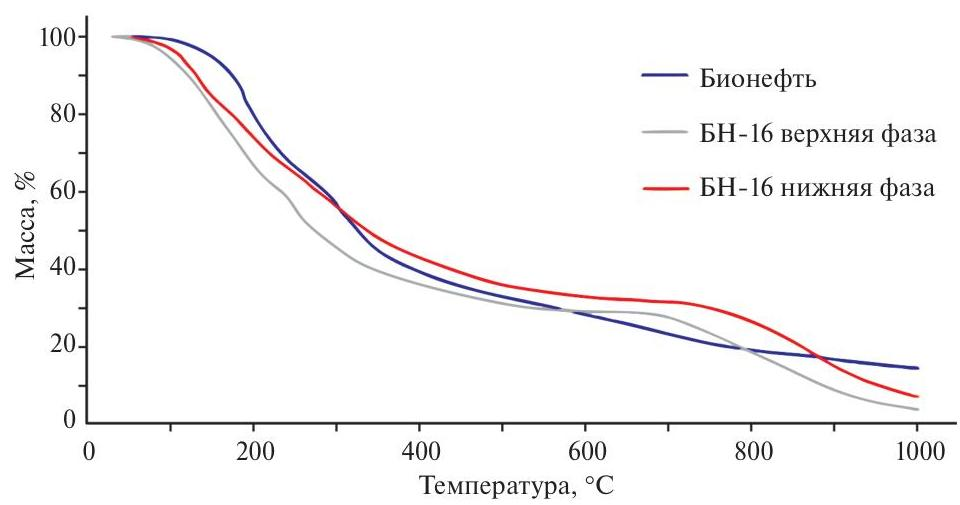

Рис. 1. Кривые потери массы при нагреве в среде аргона для исходной бионефти и верхней и нижней фаз после нейтрализации, образец БН-16.

были изучены методом ТГА (рис. 1). Хотя вид всех кривых похож, следует отметить, что верхняя фаза после защелачивания содержит большее количество легких компонентов, чем нижняя. Кроме того, вследствие обработки щелочью снижается коксуемость фаз, которую можно оценить по остатку массы при $1000^{\circ} \mathrm{C}$. Для исходной бионефти остаток составляет $14,5 \%$, для верхней фракции $-3,9 \%$, для нижней $-7,2 \%$.

Таким образом, введение щелочи в концентрации более 4 мас.\% позволяет значительно (в 7,5 раза) повысить ТС как верхней, так и нижней фаз; при этом увеличение концентрации щелочи смещает соотношение фаз в сторону большего образования именно нижней фазы. Элементный анализ показывает, что введение щелочи приводит к увеличению концентрации кислорода и уменьшению количества углерода в нижних фазах; в верхних фазах концентрация кислорода и углерода практически не меняется. Такие результаты, вероятно, связаны с увеличением количества натрия (не учитывается при анализе CHNS-O) и кислорода, концентрирующегося именно в нижних фазах стабилизированной бионефти.

## Каталитический крекинг бионефти, нейтрализованной щелочью

Образцы верхней фазы бионефти, обработанной щелочью, подвергали каталитическому крекингу. Для этого образцы БН-2, 4, 8 и 16 в ко-

личестве 10 мас.\% вносили в ВД, после чего полученную смесь подавали на установку SCT-MAT. Стоит отдельно сказать, что опыты с исходной бионефтью и нижней фазой нейтрализованной бионефти не проводили из-за заклинивания системы подачи (в случае бионефти) и несмешиваемости густой нижней фазы с ВД. В табл. 4 приведены основные выходы жидких и газообразных продуктов крекинга.

В отличие от ВД, крекинг образцов с бионефтью сопровождается выделением CO и $\mathrm{CO}_{2}$, обусловленным процессами декарбоксилирования и декарбонилирования кислородсодержащих соединений, что приводит к двухкратному повышению выхода сухого газа по сравнению с крекингом чистого ВД. При этом существенных различий по выходам газовых продуктов состава $\mathrm{C}_{2}$ не наблюдалось. Введение щелочи влияет на выходы пропан-пропиленовой (ППФ) и бутан-бутиленовой (ББФ) фракций, причем увеличение выходов по сравнению с ВД происходит только для ненасыщенных газов. С повышением pH системы с 2,8 до 4,9 возрастает как конверсия сырья (с 78,6 до 82,2 мас.\%), так и выход бензиновой фракции (с 44,7 до 47,3 мас.\%). Эффект интенсификации реакций крекинга может быть объяснен тем, что кислородсодержащие компоненты бионефти активно вступают в реакции переноса водорода с углеводородными карбокатионами, образовавшимися при крекинте ВД. При этом происходит гидрирование кислородсодержащих соединений с образованием воды, которая способствует интенсификации

Таблица 4. Выходы продуктов крекинга ВД и смеси ВД с бионефтью, стабилизированной щелочью, мас.\%

| Сырье | ВД | $10 \%$ БН-2/ВД | $10 \%$ БН-4/ВД | $10 \%$ БН-8/ВД | $10 \%$ БН-16/ВД | $15 \%$ БН-16/ВД | $20 \%$ БН-16/ВД | Реген.* |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| Сухой газ, в т.ч. | 2,1 | 3,9 | 3,9 | 3,8 | 3,9 | 4,7 | 5,4 | 6,6 |
| $\mathrm{H}_{2}+\mathrm{CH}_{4}$ | 0,7 | 0,7 | 0,7 | 0,7 | 0,7 | 1,2 | 1,3 | 0,8 |
| $\mathrm{CO}+\mathrm{CO}_{2}$ | 0,0 | 1,8 | 1,8 | 1,7 | 1,7 | 2,1 | 2,6 | 4,7 |
| Этан + этилен | 1,4 | 1,4 | 1,4 | 1,4 | 1,5 | 1,4 | 1,4 | 1,1 |
| ППФ | 8,8 | 8,0 | 8,4 | 8,9 | 9,3 | 7,9 | 6,7 | 5,2 |
| - пропилен | 7,4 | 6,9 | 7,2 | 7,4 | 7,7 | 6,8 | 6,0 | 4,4 |
| ББФ | 13,7 | 12,9 | 13,2 | 13,6 | 13,9 | 11,9 | 10,3 | 7,5 |
| - бутилены | 7,1 | 7,0 | 7,1 | 7,2 | 7,5 | 6,8 | 6,0 | 5,3 |
| Бензин <br> $\left(\right.$ НК-200 ${ }^{\circ} \mathrm{C}$ ) | 46,1 | 44,7 | 45,4 | 46,9 | 47,3 | 46,3 | 45,9 | 41,5 |
| Легкий газойль $\left(200-350^{\circ} \mathrm{C}\right)$ | 16,3 | 14,9 | 14,4 | 13,9 | 13,0 | 14,4 | 14,9 | 15,5 |
| Тяжелый газойль $350+{ }^{\circ} \mathrm{C}$ | 5,1 | 6,9 | 6,6 | 5,8 | 4,8 | 5,6 | 6,2 | 13,6 |
| Кокс | 3,9 | 4,1 | 4,0 | 4,1 | 3,9 | 6,6 | 7,0 | 5,7 |
| Конверсия | 78,6 | 78,6 | 79,0 | 80,3 | 82,2 | 80,0 | 78,9 | 70,9 |

* Опыт с регенерированным катализатором после каталитического крекинга $20 \%$ БН-16/ВД.

каталитического крекинга. Кроме того, обработка щелочью, по всей видимости, приводит к концентрированию наиболее активных высокомолекулярных соединений, склонных к коксообразованию, в нижней фазе. Для всех опытов по крекингу с 10 мас.\% верхних фаз, количество кокса составляло около 4,0 мас. $\%$, что не приводило к существенному снижению активности катализатора.

Увеличение концентрации добавки бионефти в ВД с 10 до 20 мас.\% приводит к заметному снижению конверсии сырья с 82,2 до 78,9 мас.\%. По всей видимости, ухудшение показателей крекинга происходит за счет повышения коксуемости сырья, что подтверждается увеличением выхода кокса с 3,9-4,0 до 7,0\%. Кроме того, становится заметным влияние натрия в составе добавки на активность катализаторов. Показано, что содержание натрия в катализаторе после реакции составляет около 0,4 мас.\%; снижение же активности катализатора после регенерации на $10 \%$ связано, по всей видимости, с необратимой дезактивацией активных центров под действием натрия.

Качественный анализ жидких продуктов крекинга методом газовой хроматографии с массселективным детектором (ГХ-МС) показывает,

что введение в ВД бионефти приводит к появлению в их составе кислородсодержащих соединений. Среди последних были идентифицированы фенол, крезолы и другие алкилзамещенные фенолы. Присутствующих в составе бионефти гваякола и его гомологов обнаружить не удалось, что свидетельствует в пользу их превращений в ходе каталитического крекинга.

## Нейтрализация бионефти аммиаком

Несмотря на возможность увеличения ТС за счет введения щелочи, данный подход имеет существенный недостаток, так как для достаточного увеличения ТС ( $\mathrm{pH} 4,0$ ) количество введенного основания должно превышать 4 мас.\%. Введенный натрий в значительных количествах распределяется по обеим фазам, что делает невозможным прямую переработку термически стабильных фаз бионефти на установках каталитического крекинга вследствие ускоренной дезактивации последнего в присутствии натрия. Другой проблемой является образование нижней фазы, которую нельзя подать на установки крекинга даже в виде смеси с ВД; при этом ее количество увеличивается пропорционально введенной щелочи.

Альтернативным агентом нейтрализации, не содержащим металлов, может служить аммиак.

Таблица 5. Характеристика бионефти до и после нейтрализации аммиаком

| Образец | Фаза | Количество <br> фазы, мас.\% | Стабиль- <br> ность, <br> с | pH | Азот, <br> мас.\% |
| :-- | :--: | :--: | :--: | :--: | :--: |
| Бионефть | - | 100 | 240 | 0,9 | 0,1 |
| БН-5- $\mathrm{NH}_{3}$ | верх | 66 | 230 | 5,1 | 3,4 |
| БН-10- $\mathrm{NH}_{3}$ | верх | 34 | - | - | 2,6 |
| БН-15- $\mathrm{NH}_{3}$ |  | 68 | 290 | 8,2 | 5,0 |
| БН-10- $\mathrm{NH}_{3}$ | верх | 32 | - | - | 4,4 |
| БН-30- $\mathrm{NH}_{3}$ |  | 69 | 500 | 9,3 | 5,5 |
|  |  | 31 | - | - | 5,9 |

Нейтрализацию бионефти аммиаком проводили посредством пропускания потока газа (5-7 мл/мин) через пробу с одинаковой навеской бионефти в течение $5,10,15$ и 30 мин (далее -БН-5- $\mathrm{NH}_{3}$, БН-10- $\mathrm{NH}_{3}$, БН-15- $\mathrm{NH}_{3}$ и БН-30$\mathrm{NH}_{3}$ ), затем образцы подвергали физико-химическому анализу (табл. 5).

Как и в случае со щелочью, обработка бионефти аммиаком приводит к образованию двух фаз - верхней (жидкая) и нижней (густая, почти твердая); при этом соотношение фаз практически не меняется от времени защелачивания и составляет $\sim 70 / 30$. В процессе пропускания аммиака повышается температура бионефти, что свидетельствует о протекании экзотермичных процессов нейтрализации; в случае щелочи разогрев происходил с меньшей интенсивностью.

В отличие от нейтрализации щелочью, нижняя фаза после нейтрализации аммиаком обладала неудовлетворительной ТС - во всех случаях время испытания на стабильность не превышало нескольких секунд. В случае верхней фазы (табл. 5), обработка аммиаком длительностью до 10 мин не влияет на ТС бионефти, однако далее она линейно увеличивается с повышением pH . Стоит отметить, что разница ТС при обработке щелочью и аммиаком, вероятно связана в первую очередь с различием в принципе внесения реагентов, где газ менее склонен к равномерному распределению по пробе в процессе пропускания в сравнении с растворением навески щелочи.

Элементный анализ показал рост концентрации азота в обеих фазах, причем время обработ-

ки влияет на концентрирование азота. Так, при малых временах обработки азот в первую очередь концентрируется в верхней фазе; далее концентрирование азота преобладает в нижних фракциях, что, возможно, связано с образованием и осаждением более тяжелых аммонийных соединений. Концентрация водорода увеличилась во всех фазах на $1,0-1,5$ мас. $\%$ по сравнению с исходной бионефтью. Как и в случае со щелочью, происходило перераспределение углерода и кислорода. В случае верхней фазы содержание углерода и кислорода практически одинаково для всех образцов и составляет около 30 и 55 мас.\% соответственно. Для нижней фазы характерно содержание углерода около 50 мас. $\%$, а кислорода - 36 мас. $\%$, что связано, вероятно, с обогащением верхней фазы водой.

## Каталитический крекинг бионефти, нейтрализованной аммиаком

Каталитический крекинг бионефти после обработки аммиаком проводили для смеси с ВД в концентрации 10 мас.\%, аналогично щелочи; результаты экспериментов приведены в табл. 6. Стабилизация бионефти аммиаком приводит к снижению выхода газовых продуктов в сравнении с крекингом ВД за счет уменьшения выходов ББФ и ППФ с одновременным увеличением выхода оксидов углерода. Также с повышением ТС бионефти происходит увеличение выхода бензиновой фракции с 50,0 до 54,2 мас.\%. Обычно повышение количества азотсодержащих соединений в сырье приводит к обратимой дезактивации катализатора; в данном случае при введении сырья в реактор происходит, вероятно, термическая деструкция аддуктов аммиака и кислородсодержащих соединений, что обусловливает высокую конверсию сырья.

Анализ газовых продуктов крекинга показывает, что обработка аммиаком увеличивает соотношения пропилен/пропан и бутилены/ бутаны до 6,0 и 1,7 соответственно, в сравнении с ВД - 5,0 и 1,1 , чего не наблюдалось при щелочной обработке. При этом время контакта значительно не влияло на данные показатели. Увеличение соотношения олефин/парафин для ППФ и ББФ может свидетельствовать об интенсивном участии кислородсодержащих компонентов бионефти в реакциях переноса водорода в качестве акцепторов и являться показателем эффективности их переработки в процессе каталитического крекинга.

Таблица 6. Выходы продуктов крекинга ВД и смеси ВД с бионефтью, стабилизированной аммиаком, мас.\%

| Сырье | ВД | 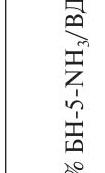 | 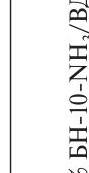 | 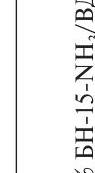 | 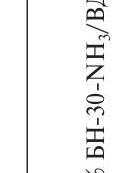 | 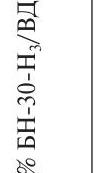 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| Сухой газ, в т.ч. $\begin{aligned} & \mathrm{H}_{2}+\mathrm{CH}_{4} \\ & \mathrm{CO}+\mathrm{CO}_{2} \end{aligned}$ | $\begin{aligned} & 2,1 \\ & 0,7 \\ & 0,0 \end{aligned}$ | $\begin{aligned} & 2,9 \\ & 0,7 \\ & 1,0 \end{aligned}$ | $\begin{aligned} & 2,8 \\ & 0,7 \\ & 0,9 \end{aligned}$ | $\begin{aligned} & 2,8 \\ & 0,6 \\ & 1,0 \end{aligned}$ | $\begin{aligned} & 3,3 \\ & 0,7 \\ & 1,4 \end{aligned}$ | $\begin{aligned} & 3,3 \\ & 0,7 \\ & 1,8 \end{aligned}$ |
| Этан + этилен | 1,4 | 1,2 | 1,2 | 1,2 | 1,2 | 1,1 | 1,2 |
| ППФ <br> - пропилен | $\begin{aligned} & 8,8 \\ & 7,4 \end{aligned}$ | $\begin{aligned} & 6,9 \\ & 5,9 \end{aligned}$ | $\begin{aligned} & 7,1 \\ & 6,1 \end{aligned}$ | $\begin{aligned} & 7,0 \\ & 6,1 \end{aligned}$ | $\begin{aligned} & 7,2 \\ & 6,2 \end{aligned}$ | $\begin{aligned} & 5,1 \\ & 4,4 \end{aligned}$ | $\begin{aligned} & 4,7 \\ & 4,0 \end{aligned}$ |
| ББФ <br> - бутилены | $\begin{aligned} & 13,7 \\ & 7,1 \end{aligned}$ | $\begin{aligned} & 11,7 \\ & 4,3 \end{aligned}$ | $\begin{aligned} & 11,8 \\ & 4,3 \end{aligned}$ | $\begin{aligned} & 11,9 \\ & 4,3 \end{aligned}$ | $\begin{aligned} & 12,2 \\ & 4,5 \end{aligned}$ | $\begin{aligned} & 8,5 \\ & 2,5 \end{aligned}$ | $\begin{aligned} & 7,7 \\ & 2,2 \end{aligned}$ |
| Бензин (НК-200 ${ }^{\circ} \mathrm{C}$ ) | 46,1 | 50,0 | 51,9 | 53,5 | 54,2 | 51,5 | 48,8 |
| Легкий газойль ( $200-350^{\circ} \mathrm{C}$ ) | 16,3 | 15,4 | 14,4 | 13,8 | 13,1 | 14,9 | 16,3 |
| Тяжелый газойль $350+^{\circ} \mathrm{C}$ | 5,1 | 6,9 | 6,1 | 5,5 | 4,9 | 8,0 | 9,8 |
| Кокс | 3,9 | 4,0 | 4,0 | 4,2 | 4,2 | 4,7 | 5,5 |
| Конверсия | 78,6 | 77,7 | 79,5 | 80,7 | 82,0 | 77,1 | 73,9 |

Для образца с наибольшим показателем ТС (БН-30- $\mathrm{NH}_{3}$ ) были проведены эксперименты с повышенной концентрацией бионефти. Увеличение концентрации добавки с 10 до 20 мас. $\%$, как и в случае обработки щелочью, приводит к снижению конверсии сырья с 82,0 до $73,9 \%$ и увеличению выхода кокса с 4,2 до $5,5 \%$. С повышением концентрации добавки наблюдается уменьшение выхода бензиновой фракции с 54,2 до 48,8 мас.\% и газа с 22,7 до 16,0 мас.\%. Вместе с тем активность катализатора после регенерации полностью восстанавливается, что говорит об отсутствии его необратимой дезактивации под действием азотсодержащих соединений.

Как и в случае щелочной обработки, жидкие продукты крекинга содержат в своем составе фенол, крезолы и другие алкилзамещенные фенолы; при этом обнаружить азотсодержащие соединения методом ГХ-МС не удалось. Можно сделать предположение, что бо́льшая часть введенного азота в процессе крекинга перешла в газовую фазу в виде аммиака, либо осталась на катализаторе в составе кокса и не была детектирована. Также стоит отметить, что вне зависимости от условий проведения реакции продукты взаимодействия с участием бионефти содержали

меньшее количество полиароматических соединений в сравнении с ВД.

## ЗАКЛЮЧЕНИЕ

Разработан метод определения термической стабильности бионефти и продуктов ее нейтрализации, позволяющий адекватно оценить ее поведение в условиях подачи в установку каталитического крекинга при температуре до $550^{\circ} \mathrm{C}$.

В рамках исследования показано, что процесс реполимеризации бионефти может быть подавлен путем ее нейтрализации, что позволяет повысить термическую стабильность бионефти в несколько раз. При этом происходит разделение бионефти на две фазы: в случае обработки аммиаком вне зависимости от времени контакта соотношение фаз составляет 70/30, в случае обработки щелочью доля нижней фазы увеличивается с концентрацией основания и может достигать 56 мас.\%. При этом щелочная обработка повышает термическую стабильность обеих образующихся фаз, в то время как обработка аммиаком влияет на стабильность только верхней фазы. Повышение pH образцов бионефти также сопровождается концентрированием в ней

натрия (в случае обработки щелочью) и азота (в случае обработки аммиаком).

Во всех случаях ТС обработанной бионефти повышается с увеличением pH . Кроме того, повышение pH бионефти приводит к интенсификации каталитического крекинга: повышается конверсия, увеличивается выход бензиновой фракции, пропан-пропиленовой и бутан-бутиленовой фракций. Введение в сырье каталитического крекинга 10 мас.\% бионефти, обработанной щелочью, приводит к необратимой дезактивации катализатора вследствие наличия натрия, что делает данный способ малопригодным для промышленности. Введение в сырье каталитического крекинга бионефти, обработанной аммиаком, позволяет повысить выход бензиновой фракции с 50,0 до 54,2 мас. $\%$, несмотря на более низкую термическую стабильность добавок по сравнению со щелочной обработкой. Качественный анализ жидких продуктов крекинга для всех типов обработки, помимо стандартных продуктов крекинга вакуумного дистиллята, показал образование таких кислородсодержащих соединений как фенол, его алкилзамещенных структур и крезолов. В случае обработки аммиаком в составе жидких продуктов азотсодержащие соединения обнаружены не были.

Метод нейтрализации позволил ввести в вакуумный дистиллят до 20 мас.\% бионефти без протекания заклинивания системы подачи. Однако рост концентрации бионефти в вакуумном дистилляте приводит к падению активности катализатора за счет повышения коксообразования вне зависимости от типа обработки.

По результатам исследований можно сделать вывод, что использование аммиака в качестве регулятора кислотности бионефти более предпочтительно с технологической точки зрения, но для его использования необходим подбор оптимальных условий и способов равномерного распределения по объему для получения бионефтей с максимальными показателями термической стабильности.

## ФИНАНСИРОВАНИЕ РАБОТЫ

Работа выполнена при финансовой поддержке Минобрнауки России. Проект 13.2251.21.0206 (идентификатор проекта RF-2251.61323X0071). Соглашение 075-15-2023-583.

## КОНФЛИКТ ИНТЕРЕСОВ

Дементьев К.И. является заместителем главного редактора журнала «Нефтехимия». Остальные авторы заявляют об отсутствии конфликта интересов, требующего раскрытия в данной статье.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Кузнецов Петр Сергеевич, к.х.н., ORCID: https://orcid.org/0000-0002-3140-3035

Атласов Валентин Русланович, ORCID: https://orcid.org/0000-0003-1450-3947

Калинина Наталья Алексеевна, ORCID: https://orcid.org/0009-0003-3571-7183

Дементьев Константин Игоревич, к.х.н., ORCID: https://orcid.org/0000-0002-8102-8624

Наранов Евгений Русланович, к.х.н., ORCID: https://orcid.org/ 0000-0002-3815-9565

Kaige Wang, Ph.D.
Zhongyang Luo, Ph.D.

## СПИСОК ЛИТЕРАТУРЫ

1. URL: https://https://www.globalcarbonproject.org/ global/pdf/LeQuere_2014_GlobalCarbon Budget2014. ESDD-D.pdf/ сайт фирмы Global Carbon Project (дата обращения: 17.11.2024).
2. Jindal M., Negi A., Palla V.C.S., Krishna B.B., Thallada B. Catalytic interventions in bio-oil production from lignocellulosic biomass and Co-processing with petroleum refinery fractions: A review // Biomass and Bioenergy. 2024. V. 183. ID107119. https://doi.org/10.1016/j.biombioe.2024.107119
3. Hirano A., Hon-Nami K., Kunito S., Hada M., Ogushi Y. Temperature effect on continuous gasification of microalgal biomass: theoretical yield of methanol production and its energy balance // Catalysis Today. 1998. V. 45, № 1-4. P. 399-404. https://doi.org/10.1016/S0920-5861(98)00275-2
4. Pütün A.E., Ozbay N., Onal E.P., Pütün E. Fixed-bed pyrolysis of cotton stalk for liquid and solid products // Fuel Process. Technol. 2005. V. 86, № 11. P. 12071219.
https://doi.org/10.1016/j.fuproc.2004.12.006

5. Samolada M.C., Baldauf W., Vasalos I.A. Production of a bio-gasoline by upgrading biomass flash pyrolysis liquids via hydrogen processing and catalytic cracking // Fuel. 1998. V. 77, № 14. P. 1667-1675. https://doi.org/10.1016/S0016-2361(98)00073-8
6. Xu J., Li C., Dai L., Xu C., Zhong Y., Yu F., Si C. Biomass fractionation and lignin fractionation towards lignin valorization // ChemSusChem. 2020. V. 13, № 17. P. $4284-4295$.
https://doi.org/10.1002/cssc. 202001491
7. Lindfors C., Kuoppala E., Oasmaa A., Solantausta Y., Arpiainen V. Fractionation of bio-oil // Energy \& fuels. 2014. V. 28, № 9. P. 5785-5791. https://doi.org/10.1021/ef500754d
8. Chan Y.H., Loh S.K., Chin B.L.F., Yiin C.L., How B.S., Cheah K.W., Wong M.E., Loy A.C.M., Gwee Y.L., Lo S.L.Y., Yusup S., Lam S.S. Fractionation and extraction of bio-oil for production of greener fuel and value-added chemicals: Recent advances and future prospects // Chem. Engin. J. 2020. V. 397. ID12540. https://doi.org/10.1016/j.cej.2020.125406
9. Oasmaa A., Kuoppala E., Selin J.F., Gust S., Solantausta Y. Fast pyrolysis of forestry residue and pine. 4. Improvement of the product quality by solvent addition // Energy \& Fuels. 2004. V. 18, № 5. P. 1578-1583. https://doi.org/10.1021/ef040038n
10. Mahfud F.H., Melian-Cabrera I., Manurung R., Heeres H.J. Biomass to fuels: upgrading of flash pyrolysis oil by reactive distillation using a high boiling alcohol and acid catalysts // Process Safety and Environmental Protection. 2007. V. 85, № 5. P. 466-472. https://doi.org/10.1205/psep07013
11. Junming X., Jianchun J., Yunjuan S., Yanju L. Bio-oil upgrading by means of ethyl ester production in reactive distillation to remove water and to improve storage and fuel characteristics // Biomass and bioenergy. 2008. V. 3, № 11. P. 1056-1061.
https://doi.org/10.1016/j.biombioe.2008.02.002
12. Zhang Q., Chang J., Wang Xu.Y. Upgrading bio-oil over different solid catalysts // Energy \& Fuels. 2006. V. 20, № 6. P. 2717-2720.
https://doi.org/10.1021/ef060224o
13. Xiong W.M., Zhu M.Z., Deng L., Fu Y., Guo Q.X. Esterification of organic acid in bio-oil using acidic ionic liquid catalysts // Energy \& Fuels. 2009. V. 23, № 4. P. $2278-2283$.
https://doi.org/10.1021/ef801021j
14. Peng J., Chen P., Lou H., Zheng X. Upgrading of bio-oil over aluminum silicate in supercritical ethanol // Energy \& Fuels. 2008. V. 22, № 5. P. 3489-3492.
https://doi.org/10.1021/ef8001789
15. Peng J., Chen P., Lou H., Zheng X. Catalytic upgrading of bio-oil by HZSM-5 in sub-and super-critical ethanol //

Bioresource technology. 2009. V. 100, № 13. P. 34153418 .
https://doi.org/10.1016/j.biortech.2009.02.007
16. de Miguel Mercader F., Groeneveld M.J., Kersten S.R.A., Way N.W.J., Schaverien C.J., Hogendoorn J.A. Production of advanced biofuels: Co-processing of upgraded pyrolysis oil in standard refinery units // Appl. Catalysis B: Environmental. 2010. V. 96, № 1-2. P. $57-66$.
https://doi.org/10.1016/j.apcatb.2010.01.033
17. Elliott D.C., Hart T.R., Neuenschwander G.G., Rotness L.J., Zacher A.H. Catalytic hydroprocessing of biomass fast pyrolysis bio-oil to produce hydrocarbon products // Environmental Progress \& Sustainable Energy. 2009. V. 28, № 3. P. 441-449. https://doi.org/10.1002/ep. 10384
18. Kwon K.C., Mayfield H., Marolla T., Nichols B., Mashburn M. Catalytic deoxygenation of liquid biomass for hydrocarbon fuels // Renewable Energy. 2011. V. 36, № 3. P. 907-915.
https://doi.org/10.1016/j.renene.2010.09.004
19. Venderbosch R.H., Ardiyanti A.R., Wildschut J., Oasmaa A., Heeres H.J. Stabilization of biomass-derived pyrolysis oils // J. of Chem. Technology \& Biotechnology. 2010. V. 85. № 5. P. 674-686. https://doi.org/10.1002/jctb. 2354
20. Fogassy G., Thegarid N., Toussaint G., van Veen A.C., Schuurman Y., Mirodatos C. Biomass derived feedstock co-processing with vacuum gas oil for second-generation fuel production in FCC units // Appl. Catalysis B: Envir. 2010. V. 96, № 3-4. P. 476-485. https://doi.org/10.1016/j.apcatb.2010.03.008
21. Tang Z., Lu Q., Zhang Y., Zhu X., Guo Q. One step biooil upgrading through hydrotreatment, esterification, and cracking // Industrial \& Engineering Chemistry Research. 2009. V. 48, № 15. P. 6923-6929. https://doi.org/10.1021/ie900108d
22. Deng L., Yan Z., Fu Y., Guo Q.X. Green solvent for flash pyrolysis oil separation // Energy \& fuels. 2009. V. 23, № 6. P. 3337-3338.
https://doi.org/10.1021/ef9002268
23. Park L.K.E., Ren S., Yiacoumi S., Ye X.P., Borole A.P., Tsouris C. pH neutralization of aqueous bio-oil from switchgrass intermediate pyrolysis using process intensification devices // Energy \& Fuels. 2017. V. 31, № 9. P. 9455-9464.
https://doi.org/10.1021/acs.energyfuels.7b00854
24. Fogassy G., Thegarid N., Toussaint G., van Veen A.C., Schuurman Y., Mirodatos C. Biomass derived feedstock co-processing with vacuum gas oil for secondgeneration fuel production in FCC units // Appl. Catal. B Environ. 2010. V. 96, № 3-4. P. 476-485. https://doi.org/10.1016/j.apcatb.2010.03.008

25. Дементьев К.И., Паланкоев Т.А., Кузнецов П.С., Абрамова Д.С., Ромазанова Д.А., Махин Д.Ю., Максимов А.Л. Влияние размерного фактора на активность цеолитов в реакции жидкофазного крекинга углеводородов // Нефтехимия. 2020. Т. 60, № 1. C. 34-43.
https://doi.org/10.31857/S0028242120010062
[Dement'ev K.I., Palankoev T.A., Kuznetsov P.S., Abramova D.S., Romazanova D.A., Makhin D.Y., Maksimov A.L. Effect of size factor on the activity of zeolites in the liquid-phase cracking of hydrocarbons // Petrol. Chem. 2020. V. 60. P. 30-38.
https://doi.org/10.1134/S0965544120010065]

# СОВМЕСТНАЯ КАТАЛИТИЧЕСКАЯ ПЕРЕРАБОТКА ПОЛИЭТИЛЕНТЕРЕФТАЛАТА И ПОЛИКАРБОНАТА В АРОМАТИЧЕСКИЕ УГЛЕВОДОРОДЫ НА ФОСФИДЕ НИКЕЛЯ 

(C) 2025 г. М. А. Голубева*, М. Мухтарова<br>Институт нефтехимического синтеза им. А. В. Топчиева РАН<br>Москва, 119991 Россия<br>*E-mail: vinnikova@ips.ac.ru<br>Поступила в редакцию 7 мая 2025 г.<br>После доработки 8 мая 2025 г.<br>Принята в печать 12 мая 2025 г.

Проведены каталитические гидропревращения отходов кислородсодержащих пластиков: полиэтилентерефталата (ПЭТФ) и поликарбоната (ПК). Никельфосфидный катализатор реакции гидропревращения, содержащий кристаллические фазы $\mathrm{Ni}_{2} \mathrm{P}$ и $\mathrm{Ni}\left(\mathrm{PO}_{3}\right)_{2}$, получен in situ в процессе совместной переработки данных пластиков. Исследование катализатора проведено методами рентгенофазового анализа (РФА) и рентгеновской фотоэлектронной спектроскопии (РФЭС). С использованием образующегося катализатора в результате количественной переработки пластиков получены $\mathrm{C}_{6}-\mathrm{C}_{10}$-ароматические углеводороды с селективностью до $89 \%$ при $400^{\circ} \mathrm{C}$, начальном давлении водорода 9 МПа и проведении реакции в течение 6 ч.

Ключевые слова: фосфид никеля, переработка пластиковых отходов, полиэтилентерефталат, поликарбонат, гидродеоксигенация, ароматические углеводороды
DOI: 10.31857/S0028242125020057, EDN: KLXKTC

Нарастающий объем накапливаемых пластиковых отходов представляет собой глобальную проблему, оказывая негативное влияние на окружающую среду. Для решения данной проблемы должен быть реализован комплексный подход, направленный на сокращение производства и потребления пластика, а также создание эффективных систем управления отходами, включающих сбор, сортировку и переработку [1]. Разработка способов переработки пластиковых отходов - одна из ключевых задач мирового научного сообщества. Традиционными способами утилизации пластика являются захоронение отходов и сжигание с целью получения энергии [2, 3]. Тем не менее данные способы наносят вред экологии. Захоронение отходов занимает большие площади, способствует загрязнению почвы и грунтовых вод. Экологичным подходом к утилизации пластика может быть механическая переработка, однако она имеет определенные огра-

ничения, такие как необходимость сортировки пластика по типам и ухудшение механических свойств вторичных пластиков [4, 5]. В связи с этим разработка эффективных и экологичных подходов к переработке остается актуальной задачей.

Одним из перспективных способов может служить переработка пластика в ценные химические вещества с использованием гетерогенных катализаторов [6]. Кроме того, схожая структура ряда пластиков открывает возможность их совместной переработки, что в дальнейшем исключит необходимость сортировки пластиков по каждому из видов. Такие полимеры, как ПЭТФ, полистирол (ПС), ПК, полифениленоксид (ПФО), ароматические полиэфиркетоны, эпоксидные смолы имеют в своем составе ароматическую структуру. Переработкой данных пластиков можно получать ароматические углеводороды бензинового ряда.

Наиболее высокую эффективность в подобных гидропревращениях показали катализаторы на основе металлов платиновой группы. Так, Цзин и др. [7] проводили совместную переработку четырех видов пластиков: ПЭТФ, ПК, ПФО и ПС с использованием катализатора $\mathrm{Ru} / \mathrm{Nb}_{2} \mathrm{O}_{5}$. При их конверсии в $78,9 \%$ ( $0,5 \mathrm{M}$ Па $\mathrm{H}_{2}, 320^{\circ} \mathrm{C}, 16$ ч) с селективностью $89 \%$ была получена смесь бензола, толуола, ксилолов, этилбензола и кумола. К сожалению, данные катализаторы характеризуются высокой стоимостью и ограниченной доступностью [8]. В отличие от них, катализаторы на основе соединений переходных металлов значительно более доступны и обладают низкой стоимостью.

Ранее нами in situ в реакторе гидропроцессов были получены каталитические системы на основе фосфида никеля для гидропревращений терефталевой кислоты и полиэтилентерефталата [9, 10]. Фракция бензол-толуол- $n$-ксилол была получена с селективностью до $93 \%$ в результате переработки ПЭТФ (конверсия $100 \%$, $400^{\circ} \mathrm{C}, 9 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч) и до $100 \%$ в результате переработки терефталевой кислоты (конверсия $100 \%, 350^{\circ} \mathrm{C}, 9 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч).

В данной работе было предложено проведение совместной переработки двух наиболее используемых и схожих по своей структуре кислородсодержащих пластиков - ПЭТФ и ПК. Цель работы - оценка возможности их совместной переработки в ароматические углеводороды бензинового ряда с использованием каталитической системы, содержащей фосфид никеля и сформированной in situ в среде перерабатываемых полимеров.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

В качестве прекурсора никельфосфидного катализатора был использован гипофосфит никеля $\mathrm{Ni}\left(\mathrm{PH}_{2} \mathrm{O}_{2}\right)_{2}$ in situ, полученный по методике, описанной в работе [9]. В качестве сырья были использованы отработанные бутылки из ПЭТФ и сотовый ПК. Использованы также: тетралин ( $>98 \%$, кат. номер TE02401000, Scharlau); диметилсульфоксид ( $>99,8 \%$, ООО «Компо-нент-реактив»); петролейный эфир (техн., ООО «Компонент-реактив»); ацетон (техн., ООО «Компонент-реактив»); $\mathrm{H}_{2}$ ( $\geqslant 98 \%$, Air Liquide), Ar ( $\geqslant 98 \%$, Air Liquide); He (99,999\%, Air Liquide).

Для проведения каталитических экспериментов в автоклав из нержавеющей стали объемом 45 см $^{3}$ загружали 0,1 г нарезанного пластика (ПЭТФ, ПК или смесь пластиков в равном массовом соотношении), 0,05 г гипофосфита никеля и 1,5 г тетралина. Каталитическую переработку проводили при 350 и $400^{\circ} \mathrm{C}$, начальном давлении $\mathrm{H}_{2} 5-9$ МПа, в течение 6 ч при постоянном перемешивании ( 7000 об./мин). После реакции жидкие продукты отделяли от катализатора центрифугированием. Терефталевую кислоту, остававшуюся в осадке после переработки ПЭТФ, отделяли от катализатора растворением в диметилсульфоксиде. Катализатор промывали петролейным эфиром и ацетоном, сушили и хранили в атмосфере аргона. Жидкие продукты анализировали методами газожидкостной хроматографии и хромато-масс-спектрометрии.

Качественный анализ продуктов проводили на хромато-масс-спектрометре Thermo Scientific ISQ 7000 (Thermo Fisher Scientific, США), оснащенном капиллярной колонкой Restek 5XI-17SIL MS CAP ( $30 \mathrm{~m} \times 0,25$ мм $\times 0,25$ мкм) в токе гелия в качестве газа-носителя. Идентификацию компонентов осуществляли с помощью базы данных NIST/EPA/NIH.

Количественный анализ проводили на газожидкостном хроматографе «Кристаллюкс 4000M» (ООО «Научно-производственная фирма «Метахром») с пламенно-ионизационным детектором, капиллярной колонкой Optima-1 ( $25 \mathrm{~m} \times 0,32$ мм $\times$ $\times 0,35$ мкм) и гелием в качестве газа-носителя. Конверсию пластиков (\%) и селективность (\%) по продуктам реакции определяли по формулам (1) и (2):
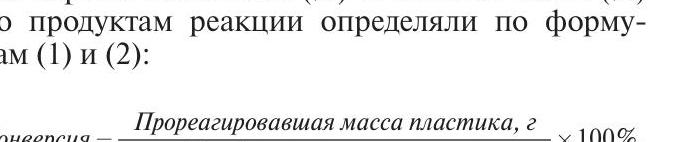

Катализатор, полученный in situ в среде перерабатываемых полимеров ПЭТФ и ПК при $400^{\circ} \mathrm{C}$ и 9 МПа, был исследован физико-химическими методами анализа. Данные о фазовом составе катализатора были получены методом РФА с использованием дифрактометра Tongda TD-3700, оснащенного рентгеновской трубкой с медным анодом, линейным многоканальным полупро-

водниковым детектором Mythen2R1K и зеркалом Гебеля. Качественный состав катализатора определяли с помощью справочной базы данных ICDD PDF-2 по дифракционным картинам порошка катализатора. Средний размер кристаллитов фосфида никеля оценивали по формуле Шеррера. Данные о химическом состоянии поверхности были получены методом РФЭС с использованием электронного спектрометра PREVAC EA15 (Prevac, Польша) с излучением $\mathrm{Al} K_{\mathrm{s}}$, hv $=1486,74$ эВ, 150 Вт. С целью проведения деконволюции спектров использовали программу PeakFit.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

Методом РФА (рис. 1a) установлено наличие в образце катализатора кристаллической фазы фосфида никеля $\mathrm{Ni}_{2} \mathrm{P}$ (PDF № 3-953) со средним размером кристаллитов $42 \pm 2$ нм, а также кристаллической фазы метафосфата никеля $\mathrm{Ni}\left(\mathrm{PO}_{3}\right)_{2}$, который наравне с фосфидом образуется в результате разложения прекурсора катализатора $[11,12]$.

Методом РФЭС были исследованы электронные состояния на поверхности катализаторов. В спектре катализатора в области $\mathrm{Ni} 2 p 3 / 2$ были выделены 3 пика (рис. 1б). Пики с вершинами при 851,8 эВ и 855,2 эВ были отнесены к $\mathrm{Ni}^{\delta+}$

в фосфиде и $\mathrm{Ni}^{2+}$ в фосфате соответственно ${ }^{1}$. Пик с вершиной при 859,3 эВ был отнесен к сателлиту электронной встряски. Оцененное содержание $\mathrm{Ni}^{\delta+}$ на поверхности катализатора составляло $59 \%$, в то время как $\mathrm{Ni}^{2+}-41 \%$. Спектр катализатора в области $\mathrm{P} 2 p$ был разложен на 4 пика (рис. 1в). Пики с вершинами при 129,7 и 130,5 эВ были отнесены к $\mathrm{P}^{\delta-}$ в областях $\mathrm{P} 2 p 3 / 2$ и $\mathrm{P} 2 p 1 / 2$ в фосфиде. Пики с вершинами при 133,7 эВ и 134,5 эВ были отнесены к $\mathrm{P}^{5+}$ в областях $\mathrm{P} 2 p 3 / 2$ и $\mathrm{P} 2 p 1 / 2$ в фосфате. Содержание $\mathrm{P}^{\delta-}$ на поверхности было оценено как $25 \%$, а $\mathrm{P}^{5+}-75 \%$. Таким образом, физико-химическими методами было подтверждено in situ образование фосфида никеля. Идентифицированный фосфат никеля также вносит вклад в активность катализатора в гидродеоксигенации за счет формирования кислотных центров Льюиса $\left(\mathrm{Ni}^{2+}\right)$ и Бренстеда $\left(\mathrm{P}_{x} \mathrm{O}_{y}-\mathrm{H}\right)[13,14]$.

Гидропревращения пластиков исследовали в присутствие катализаторов и без них (рис. 2). В отсутствие катализатора ( $350^{\circ} \mathrm{C}, \mathrm{H}_{2}, 5 \mathrm{M}$ Па) конверсия поликарбоната достигала $87 \%$ (рис. 2a), а полиэтилентерефталата - $85 \%$

[^0]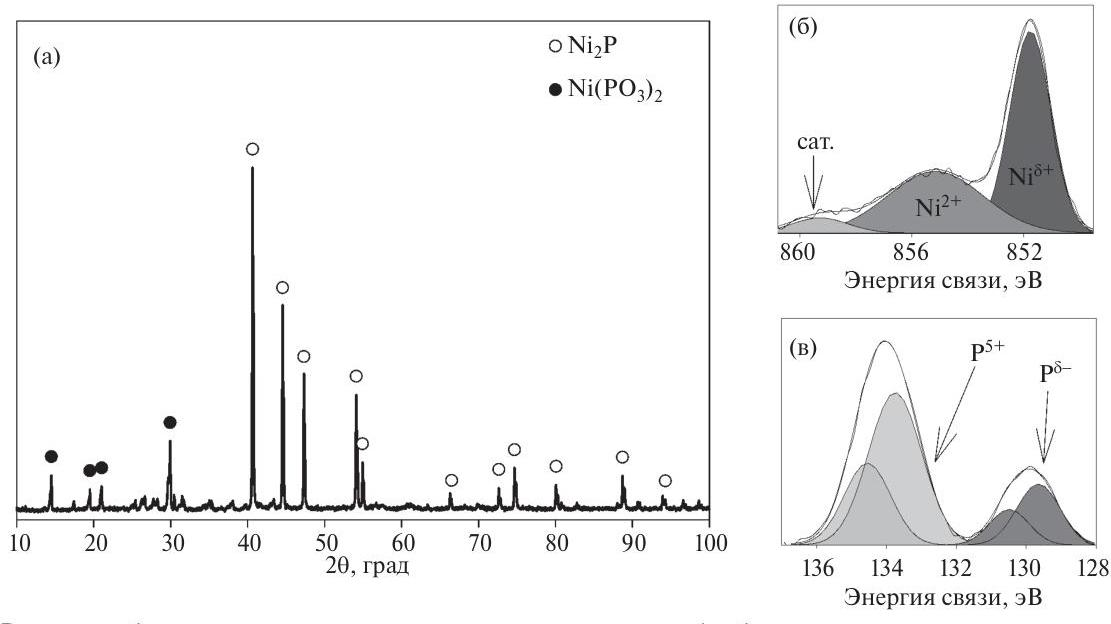

Рис. 1. Результаты физико-химических методов исследования никельфосфидного катализатора, полученного in situ при $400^{\circ} \mathrm{C}, \mathrm{H}_{2} 9$ МПа: (a) рентгеновская дифрактограмма; (б) рентгеновский фотоэлектронный спектр в области $\mathrm{Ni} 2 p 3 / 2$; (в) рентгеновский фотоэлектронный спектр в области $\mathrm{P} 2 p$.


[^0]:    ${ }^{1}$ Naumkin A. V., Kraut-Vass A., Gaarenstroom S. W., Powell C. J. NIST X-ray photoelectron spectroscopy database, version 5.0 // National Institute of Standards and Technology. Gaithersburg, 2023. http://dx.doi.org/10.18434/T4T88K

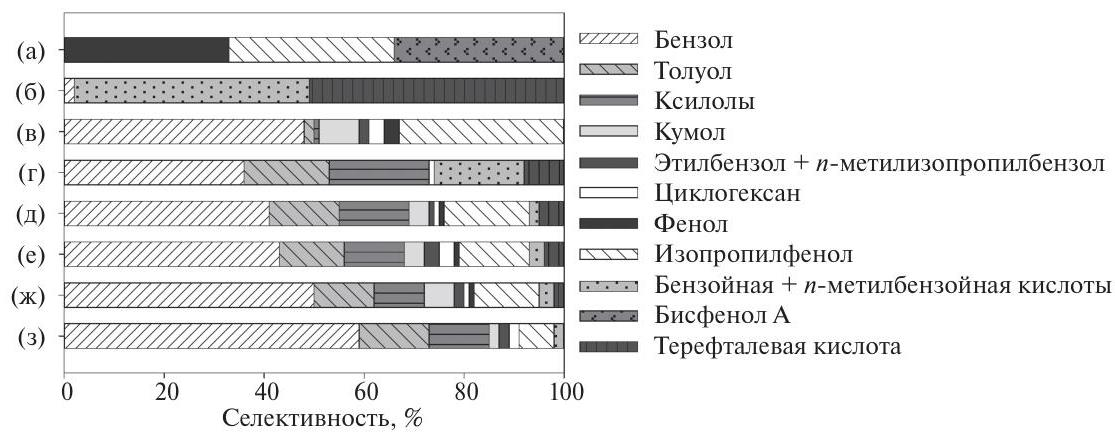

Рис. 2. Зависимость селективности гидропревращения полиэтилентерефталата и поликарбоната по продуктам от условий реакции: (а) поликарбонат, без катализатора, $350^{\circ} \mathrm{C}, 5 \mathrm{M} П \mathrm{a} \mathrm{H}_{2}, 6$ ч; (б) полиэтилентерефталат, без катализатоpa, $350^{\circ} \mathrm{C}, 5 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч; (в) поликарбонат, $\mathrm{Ni}_{3} \mathrm{P}$ in situ, $350^{\circ} \mathrm{C}, 5 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч; (г) полиэтилентерефталат, $\mathrm{Ni}_{3} \mathrm{P}$ in situ, $350^{\circ} \mathrm{C}, 5 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч; (д) поликарбонат + полиэтилентерефталат, $\mathrm{Ni}_{3} \mathrm{P}$ in situ, $350^{\circ} \mathrm{C}, 5 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч; (е) поликарбонат + + полиэтилентерефталат, $\mathrm{Ni}_{3} \mathrm{P}$ in situ, $400^{\circ} \mathrm{C}, 5 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч; (ж) поликарбонат + полиэтилентерефталат, $\mathrm{Ni}_{3} \mathrm{P}$ in situ, $400^{\circ} \mathrm{C}, 7 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч; (з) поликарбонат + полиэтилентерефталат, $\mathrm{Ni}_{3} \mathrm{P}$ in situ, $400^{\circ} \mathrm{C}, 9 \mathrm{M}$ Па $\mathrm{H}_{2}, 6$ ч.
(рис. 2б). Основные продукты превращения поликарбоната - его мономер, бисфенол А, а также продукты разрыва С-С-связи в бисфеноле фенол и $n$-изопропилфенол. Основные продукты превращения полиэтилентерефталата - терефталевая кислота и продукт ее частичного декарбоксилирования - бензойная кислота; в незначительных количествах образовывался продукт полного декарбоксилирования - бензол. Таким образом, температура реакции оказывала влияние только на деполимеризацию и удаление кислорода путем декарбоксилирования.

При использовании каталитической системы при $350^{\circ} \mathrm{C}$ и 5 M Па $\mathrm{H}_{2}$ конверсия как ПК, так и ПЭТФ возрастала и была количественной. Проведение гидропревращений поликарбоната (рис. 2в) с использованием каталитической системы способствовало образованию не только кислородсодержащих соединений, но и бензола с селективностью $48 \%$, а также других полностью деоксигенированных соединений (кумол, толуол, ксилолы, этилбензол, $n$-метилизопропилбензол, циклогексан). Толуол и этилбензол могут наравне с кумолом и бензолом образовываться в результате разрыва $\mathrm{C}-\mathrm{C}$-связи в поликарбонате [15]. Ксилолы и $n$-метилизопропилбензол являются продуктами алкилирования толуола и кумола соответственно. Циклогексан образуется в результате гидрирования бензола. В результате гидропревращений ПЭТФ (рис. 2г) основными продуктами полной деоксигенации являлись бензол (селективность $36 \%$ ), толуол
(селективность $17 \%$ ) и $n$-ксилол (селективность $20 \%$ ). Бензол образуется в результате декарбоксилирования терефталевой и бензойной кислот, $n$-ксилол - в результате прямой деоксигенации терефталевой кислоты, в то время как толуол может образовываться, как в результате прямой деоксигенации бензойной кислоты, так и в результате декарбоксилирования $n$-метилбензойной кислоты [9].

Проведение совместной переработки ПК и ПЭТФ при $350^{\circ} \mathrm{C}$ и 5 M Па $\mathrm{H}_{2}$ (рис. 2д) способствовало образованию бензола в качестве основного продукта (селективность $41 \%$ ); при этом селективность по всем $\mathrm{C}_{6}-\mathrm{C}_{10}$-ароматическим углеводородам была равна $74 \%$. Повышение температуры до $400^{\circ} \mathrm{C}$ (рис. 2е) практически не влияло на увеличение селективности по бензолу и всем $\mathrm{C}_{6}-\mathrm{C}_{10}$-ароматическим углеводородам. Однако повышение давления до 7 МПа при $400^{\circ} \mathrm{C}$ (рис. 2ж) способствовало увеличению селективности по ароматическим углеводородам. Наибольшее влияние на образование ароматических углеводородов оказывало повышение начального давления водорода с 5 до 9 МПа (рис. 2з). Наибольшая селективность по бензолу составляла $59 \%$ при общей селективности по ароматическим углеводородам $89 \%$ ( $400^{\circ} \mathrm{C}, 9 \mathrm{M}$ Па $\mathrm{H}_{2}$ ). Таким образом, в данной работе была показана возможность получения $\mathrm{C}_{6}-\mathrm{C}_{10}$-ароматических углеводородов из смеси пластиков со схожей структурой.

## ЗАКЛЮЧЕНИЕ

Использование гипофосфита никеля в качестве прекурсора катализатора in situ в ходе совместной переработки ПЭТФ и ПК способствует формированию каталитической системы, содержащей кристаллический $\mathrm{Ni}_{2} \mathrm{P}$. Сформированный катализатор позволяет получать с селективностью до $89 \%$ смесь $\mathrm{C}_{6}-\mathrm{C}_{10}$-ароматических углеводородов с преобладанием в смеси бензола (селективность 59\%) при количественной конверсии пластиков. Полученные углеводороды могут быть использованы в качестве компонентов бензина, растворителей, а также промежуточных соединений для органического, нефтехимического синтеза, а также синтеза полимеров. Таким образом, в данной работе получаемая каталитическая система на основе $\mathrm{Ni}_{2} \mathrm{P}$ позволяет эффективно преобразовывать смесь пластиковых отходов в ценные химические продукты, внося тем самым вклад в экономику замкнутого цикла.

## БЛАГОДАРНОСТИ

Работа выполнена с использованием оборудования ЦКП «Аналитический центр проблем глубокой переработки нефти и нефтехимии ИНХС PAH». Авторы выражают благодарность коллегам из ИНХС РАН: к.ф.-м.н. Левину И.С. за исследования методом рентгенофазового анализа, Садовникову А.А. - за исследования методом рентгеновской фотоэлектронной спектроскопии, к.х.н. Борисову Р.С. - за исследования методом хромато-масс-спектрометрии.

## ФИНАНСИРОВАНИЕ РАБОТЫ

Работа выполнена при поддержке Российского научного фонда (грант № 24-79-00274).

## КОНФЛИКТ ИНТЕРЕСОВ

Авторы заявляют об отсутствии конфликта интересов, требующего раскрытия в данной статье.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Голубева Мария Андреевна, к.х.н., ORCID: https://orcid.org/0000-0002-3741-7833 SPIN-код: 2282-9612

Мухтарова Мариям, ORCID:
https://orcid.org/0000-0003-1215-6136 SPIN-код: 2809-4340

## СПИСОК ЛИТЕРАТУРЫ

1. Kibria M.G., Masuk N.I., Safayet R., Nguyen H.Q., Mourshed M. Plastic waste: Challenges and opportunities to mitigate pollution and effective management // Int. J. Environ. Res. 2023. V. 17. ID20. https://doi.org/10.1007/s41742-023-00507-z
2. Kijo-Kleczkowska A., Gnatowski A. Recycling of plastic waste, with particular emphasis on thermal methods review // Energies. 2022. V. 15, № 6. ID2114. https://doi.org/10.3390/en15062114
3. Chen S., Hu Y.H. Advancements and future directions in waste plastics recycling: From mechanical methods to innovative chemical processes // Chem. Eng. J. 2024. V. 493. ID152727.
https://doi.org/10.1016/j.cej.2024.152727
4. Ragaert K., Delva L., Van Geem K. Mechanical and chemical recycling of solid plastic waste // Waste Manag. 2017. V. 69. P. 24-58.
https://doi.org/10.1016/j.wasman.2017.07.044
5. Schyns Z.O.G., Shaver M.P. Mechanical recycling of packaging plastics: A review // Macromol. Rapid Commun. 2021. V. 42, № 3. ID2000415. https://doi.org/10.1002/marc. 202000415
6. Tan T., Wang W., Zhang K., Zhan Z., Deng W., Zhang Q., Wang $Y$. Upcycling plastic wastes into value-added products by heterogeneous catalysis // ChemSusChem. 2022. V. 15, № 14. ID e202200522.
https://doi.org/10.1002/cssc. 202200522
7. Jing Y., Wang Y., Furukawa S., Xia J., Sun C., Hülsey M.J., Wang H., Guo Y., Liu X., Yan N. Towards the circular economy: Converting aromatic plastic waste back to arenes over a $\mathrm{Ru} / \mathrm{Nb}_{2} \mathrm{O}_{5}$ catalyst // Angew. Chem. 2021. V. 133, № 10. P. 5587-5595. https://doi.org/10.1002/anie. 202011063
8. Golubeva M., Mukhtarova M., Sadovnikov A., Maximov A. PET waste recycling into BTX fraction using in situ obtained nickel phosphide // Polymers. 2023. V. 15, № 10. ID2248.
https://doi.org/10.3390/polym15102248
9. Mukhtarova M., Golubeva M.A., Maximov A.L. In situ $\mathrm{Ni}_{2} \mathrm{P}$ catalyst for the selective processing of terephthalic acid into BTX fraction // Appl. Catal. A: Gen. 2024. V. 678. ID119734.
https://doi.org/10.1016/j.apcata.2024.119734
10. Shi G., Shen J. New synthesis method for nickel phosphide nanoparticles: solid phase reaction of nickel cations with hypophosphites // J. Mater. Chem. 2009. V. 19. P. 2295-2297.
https://doi.org/10.1039/B903088N
11. Guan Q., Li W., Zhang M., Tao K. Alternative synthesis of bulk and supported nickel phosphide from

the thermal decomposition of hypophosphites // J. Catal. 2009. V. 263, № 1. P. 1-3. https://doi.org/10.1016/j.jcat.2009.02.008
12. Lee Y.K., Oyama S.T. Bifunctional nature of a $\mathrm{SiO}_{2}$ supported $\mathrm{Ni}_{2} \mathrm{P}$ catalyst for hydrotreating: EXAFS and FTIR studies // J. Catal. 2006. V. 239, № 2. P. 376-389. https://doi.org/10.1016/j.jcat.2005.12.029
13. Li K., Wang R., Chen J. Hydrodeoxygenation of anisole over silica-supported $\mathrm{Ni}_{2} \mathrm{P}, \mathrm{MoP}$, and NiMoP catalysts // Energy Fuels. 2011. V. 25. № 3. P. 854-863. https://doi.org/10.1021/ef101258j
14. Kim J.G. Chemical recycling of poly(bisphenol A carbonate) // Polym. Chem. 2020. V. 11. P. 4830-4849. https://doi.org/10.1039/C9PY01927H

# НОВЫЙ МЕТОД СИНТЕЗА ДОБАВОК ДЛЯ СНИЖЕНИЯ СОДЕРЖАНИЯ ОКСИДОВ СЕРЫ В ГАЗАХ РЕГЕНЕРАЦИИ ПРОЦЕССА КАТАЛИТИЧЕСКОГО КРЕКИНГА 

© 2025 г. Т. В. Бобкова ${ }^{1, *}$, К. И. Дмитриев ${ }^{1}$, О. В. Потапенко ${ }^{1}$<br>${ }^{1}$ Центр новых химических технологий ИК СО РАН, Институт катализа СО РАН, Омск, 644040 Россия<br>*E-mail: sprini@list.ru<br>Поступила в редакцию 3 сентября 2024 г.<br>После доработки 20 января 2025 г.<br>Принята к публикации 12 апреля 2025 г.


#### Abstract

Синтезированы добавки к катализатору крекинга для снижения содержания оксидов серы в газах регенерации при переработке сырья с высоким содержанием серы. Добавки приготовлены на основе смешанных оксидов $\mathrm{Mg}, \mathrm{Al}, \mathrm{Ce}, \mathrm{V}$, выполняющих одновременно окислительную, адсорбционную и восстановительную функции. Синтезы смешанных оксидов на основе гидротальцитов осуществлены с использованием различных осадителей $\left[\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}, \mathrm{CO}\left(\mathrm{NH}_{2}\right)_{2}\right]$. Исследованы структурные и каталитические свойства добавок. Показано, что синтезированные добавки проявляют высокую эффективность работы при проведении циклических испытаний «реакция крекинга регенерация катализатора», которая составила $96.5 \%$ при содержании добавки в каталитической системе 5 мас.\%.


Ключевые слова: каталитический крекинг, регенерация, адсорбция, восстановление, оксиды серы, добавки для снижения выбросов оксидов серы, гидротальциты, магний-алюминиевые оксиды, оксид церия, оксид ванадия
DOI: 10.31857/S0028242125020064, EDN: KLZEYT

Каталитический крекинг - процесс, способствующий глубокой переработке нефти и получению важных компонентов моторных топлив и сырья для нефтехимии. В результате проведения каталитического крекинга сырья с высоким содержанием серы (вакуумный газойль и тяжелое остаточное сырье) в составе газов регенерации катализатора происходит увеличение выброса оксидов серы $\mathrm{SO}_{x}$, обладающих выраженными кислотными свойствами и являющихся основным источником загрязнения атмосферы [1].

По данным [2, 3], содержание серы в коксе может изменяться от 0,4 до 4,4 мас. $\%$ в зависимости от условий осуществления процесса каталитического крекинга, концентраций сераорганических соединений, входящих в состав сырья, а также

типа используемого катализатора. Для снижения выбросов оксидов серы с газами регенерации катализаторов крекинга используют специальные добавки $\mathrm{deSO}_{x}$, способные улавливать и переносить соединения серы из регенератора в реактор в виде сероводорода. Таким образом, сероводород является основным серосодержащим продуктом, который выводится с установки вместе с продуктовыми углеводородными газами.

Катализаторы или добавки для восстановления $\mathrm{SO}_{x}$ [3] производят компании: Albemarle Corporation ( $\mathrm{KDSO}_{x} ; \mathrm{DuraSO}_{4} ; \mathrm{SO}_{x} \mathrm{Master}-1,2$ ); W. R. Grace and Company [Super DESOX (OCI; MCD; CeRO; CV+)]; BASF (SOXCAT Extra; EnviroSO ${ }_{x}$ ); Sinopec (RFS-C); Johnson Matthey [Super SO ${ }_{x}$ Getter (II, II DM, III), $\mathrm{LoSO}_{x}$ (PB Plus, Special)].

Albemarle Corporation - одна из первых компаний, запатентовавших эту технологию. Добавки $\mathrm{KDSO}_{x}$ и DuraSO ${ }_{x}$ основаны на гидротальците с соотношением $\mathrm{Mg} / \mathrm{Al}$, равным 3,0. На практике было показано, что чем выше содержание магния, тем выше хемосорбционная способность к $\mathrm{SO}_{3}$. Ключевые отличия между добавками, производимыми ведущими мировыми компаниями (BASF ${ }^{1}$, Albemarle Corporation ${ }^{2}$, Johnson Matthey ${ }^{3}$, W. R. Grace and Company ${ }^{4}$ ), заключаются не только в типе адсорбционного компонента (оксид магния, смешанные оксиды магния и алюминия, оксид алюминия), но и в типе и концентрации редкоземельных элементов (Р3Э), преимущественно диоксида церия $\mathrm{CeO}_{2}$ ), играющих роль окислителя серы(IV). Уровень содержания РЗЭ непосредственно сказывается на стоимости присадок. Например, компания W. R. Grace and Company предлагает три варианта присадок Super DESOX, Super DESOX OCI и Super DESOX MCD, которые отличаются уменьшенным содержанием РЗЭ при идентичной окислительной способности ${ }^{4}$. В свою очередь, Johnson Matthey производит присадку Super SOXGETTER, со-

[^0]держащую 12 мас.\% оксида церия, а также серию Super SOXGETTER-II с содержанием оксида церия в пределах $4-8$ мас. $\%$.

У некоторых производителей имеются серии добавок без введения РЗЭ:

- $\mathrm{SO}_{x}$ MASTER от Albemarle Corporation;
- Super DESOX CeRO от W.R. Grace and Company;
- LoSO ${ }_{x}$-PB-II от Johnson Matthey.

Считается, что применение каталитически неактивных добавок в процессе крекинга является более эффективным по сравнению с бифункциональными катализаторами, так как они подвержены меньшему слеживанию. Кроме того, количество добавок и, следовательно, содержание оксидов серы в газах регенерации можно регулировать независимо от загрузки катализатора.

На рис. 1 представлен состав добавки к катализатору крекинга, предназначенной для снижения уровня оксидов серы в газах регенерации. Оксиды металлов, таких как церий, медь, кобальт, ванадий, марганец, хром и железо [4-17] наносят на адсорбционный компонент добавки $\mathrm{deSO}_{x}$ либо получают соосаждением с ним. Эти оксиды обладают основными и окислитель-но-восстановительными свойствами, что делает их активными компонентами для удаления оксидов серы из газов регенерации.

| Окислительновосстановительная функция | Адсорбционная функция | Наполнитель, связующие |
| :--: | :--: | :--: |
| - Оксид церия (катализатор окисления сернистого газа, активация кислорода) <br> - Оксид ванадия (катализатор восстановления сульфатов) <br> - Оксиды металлов ( $\mathrm{Cu}, \mathrm{Co}, \mathrm{Cr}$, $\mathrm{Fe}, \mathrm{Mn}$, и др.) с переменной валентностью <br> - Благородные металлы | - Смешанный магнийалюминиевый оксид на основе стехиометрического гидротальцита <br> - Смешанный магнийалюминиевый оксид с повышенным содержанием магния <br> - Оксид магния <br> - Оксид алюминия <br> - Филлосиликаты | - Формирование физических свойств <br> - Оксид алюминия <br> - Природные глины <br> - Аморфные алюмосиликаты |

Рис. 1. Компонентный состав добавки к катализатору крекинга для снижения содержания оксидов серы в газах регенерации.


[^0]:    ${ }^{1}$ EnviroSO ${ }_{x}$ enables full FCC operation through turnaround (Добавлено, ИС) - https://www.digitalrefining.com/article/ 1002372/envirosox-enables-full-fcc-operation-through-turnaround (08.08.2024)
    ${ }^{2}$ DuraSO ${ }_{x}{ }^{a}$ - Highly attrition-resistant $\mathrm{SO}_{x}$ reduction additive without performance compromise // Рекламный проспект Albemarle. FCC additives. 2011.
    ${ }^{3}$ Sulphur oxide reduction FCC additives (Добавлено, ИС). https://matthey.com/en/products-and-services/chemical-pro-cesses/additives/sulfur-oxide-reduction-additives (08.08.2024)
    ${ }^{4}$ A New Generation of Super DESOX Additive // Рекламный проспект Grace Davison № 109. 2011.

В качестве связующего вещества в добавке обычно используют оксид алюминия, различные природные глины и аморфные алюмосиликаты.

Общепринятый механизм сокращения выбросов $\mathrm{SO}_{\mathrm{x}}$ при использовании добавок в процессе крекинга (включая окисление, хемосорбцию и восстановительное разложение) [18-21] представляет собой ряд реакций (1-6).

Добавка, способствующая уменьшению содержания $\mathrm{SO}_{\mathrm{x}}$ в газах, выделяемых при регенерации катализатора крекинга, выполняет две основные функции. Первая функция заключается в окислении оксида серы(IV) до оксида серы(VI), а вторая - в адсорбции $\mathrm{SO}_{3}$ в виде сульфата. Сера, содержащаяся в коксе, в основном окисляется до $\mathrm{SO}_{2}$ (реакция 1 , в присутствии кислорода воздуха) при температуре $700^{\circ} \mathrm{C}$. Для дальнейшего окисления $\mathrm{SO}_{2}$ до $\mathrm{SO}_{3}$ (реакция 2 , $600-750^{\circ} \mathrm{C}$ ) в присутствии кислорода воздуха последний должен вступить в реакцию с оксидами металлов, обладающими основными свойствами (см. ниже), что приводит к образованию сульфата (реакция 3).

Схема переноса оксидов серы из регенератора установки каталитического крекинга в реактор в виде сероводорода имеет вид:
Регенератор ( $600-750^{\circ} \mathrm{C}$ ):

$$
\begin{aligned}
& \mathrm{S}(\text { в коксе })+\mathrm{O}_{2} \leftrightarrow \mathrm{SO}_{2} \\
& 2 \mathrm{SO}_{2}+\mathrm{O}_{2} \leftrightarrow 2 \mathrm{SO}_{3} \\
& \mathrm{SO}_{3}+\mathrm{MeO} \leftrightarrow \mathrm{MeSO}_{4}
\end{aligned}
$$

Температура в регенераторе установки крекинга обычно находится в диапазоне $600-750^{\circ} \mathrm{C}$. Изменение свободной энергии Гиббса реакции 2 составляет $-9,5$ кДж/моль при $675^{\circ} \mathrm{C}$ и $-4,4$ кДж/моль при $730^{\circ} \mathrm{C}$. При этих температурах в условиях крекинга равновесное отношение концентраций $\mathrm{SO}_{2}$ и $\mathrm{SO}_{3}$ составляет около $9: 1$. В реальных условиях процесса регенерации катализатора крекинга образующийся оксид серы(VI) начинает поглощаться компонентами катализатора, обладающими основными свойствами. Таким образом, вследствие постоянного отвода продукта из зоны реакции, равновесие реакции 2 смещено вправо. С целью максимального поглощения оксидов серы принципиальным является увеличение скорости реакции окисления оксида серы(IV) до оксида серы(VI), т.е. первая - окислительная функция каталитической добавки для снижения выбросов $\mathrm{SO}_{\mathrm{x}}$ выполняется.

Реакция 3 демонстрирует адсорбцию $\mathrm{SO}_{3}$ компонентами добавки, обладающими основными свойствами (вторая функция добавки - адсорбционная). После процесса регенерации каталитическая система, содержащая сульфатированную добавку для снижения выбросов $\mathrm{SO}_{\mathrm{x}}$, поступает в реактор установки.

В реакторе образовавшийся сульфат восстанавливается с помощью водорода и углеводородов, образуя смесь оксида металла и сероводорода (реакция $4,500-600^{\circ} \mathrm{C}$ ) или сульфида металла (реакция $5,500-600^{\circ} \mathrm{C}$ ) в присутствии восстановителей - водорода и углеводородов:
Реактор ( $500-600^{\circ} \mathrm{C}$ )

$$
\begin{aligned}
& \mathrm{MeSO}_{4}+4 \mathrm{H}_{2} \leftrightarrow \mathrm{MeO}+\mathrm{H}_{2} \mathrm{~S}+3 \mathrm{H}_{2} \mathrm{O} \\
& \mathrm{MeSO}_{4}+4 \mathrm{H}_{2} \leftrightarrow \mathrm{MeS}+4 \mathrm{H}_{2} \mathrm{O}
\end{aligned}
$$

Отпарная колонна:

$$
\mathrm{MeS}+\mathrm{H}_{2} \mathrm{O} \leftrightarrow \mathrm{MeO}+\mathrm{H}_{2} \mathrm{~S}
$$

Возможность получения активного компонента добавки, выполняющего одновременно окислительную, адсорбционную и восстановительную функции, позволяет сократить энергозатраты на производство добавок $\mathrm{deSO}_{x}$. Перспективным является метод совместного осаждения металлов в присутствии различных осадителей.

Цель настоящей работы - исследование добавок $\mathrm{deSO}_{x}$, приготовленных на основе смешанных оксидов $\mathrm{Me}(\mathrm{Me}=\mathrm{Ce}, \mathrm{V}, \mathrm{Mg}, \mathrm{Al})$, выполняющих одновременно окислительную, адсорбционную и восстановительную функции, содержащих в качестве связующего бентонитовую глину и оксид алюминия на основе предобработанного продукта термохимической активации глинозема.

Данную научно-исследовательскую работу проводили в лабораторных условиях, в дальнейшем планируются опытно-промышленные (полупромышленные) испытания добавки с долгосрочной программой.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

## Синтез добавок к катализатору крекинга

Активные компоненты добавки $\mathrm{deSO}_{x}-\mathrm{Me}-$, $\mathrm{Mg}-$, Al -гидротальциты (где $\mathrm{Me}=\mathrm{Ce}$ и V ), как предшественники смешанных оксидов получены методом соосаждения из растворов катионов металлов. Для образцов с маркировкой ГТ в ка-

честве осадителя использовали смесь растворов гидроксида и карбоната натрия [5, 9, 10, 17, 22, 23], для образцов с маркировкой ГТМ - мочевину [24-26]. Растворы металлов готовили из их азотнокислых солей, взятых в определенных мольных соотношениях (за исключением раствора ванадия, приготовленного из сернокислой соли). В табл. 1 представлены условия приготовления данных соединений.

Приготовление композиции добавки выполнено путем последовательного смешения расчетных количеств суспензий синтезированных образцов активного компонента (ГТМ-2, ГТМ-3, ГТМ-4), оксида алюминия на основе предобработанного продукта термохимической активации глинозема и бентонитовой глины в соотношении $50 / 25 / 25$ (мас.\%). Содержание оксида натрия в матрице добавки составляет около 0,2 мас.\%. Полученную композицию добавки формуют (целевая фракция 50-250 мкм), сушат при температуре $100^{\circ} \mathrm{C}$ в течение 10 ч и прокаливают в две ступени - подъем температуры до $450^{\circ} \mathrm{C}-2$ ч, выдержка при этих условиях 5 ч, далее снова подъем температуры до $700^{\circ} \mathrm{C}$ (2 ч) и выдержка в течение 5 ч.

Осаждение гидротальцитов с помощью смеси $\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}$ проводили при одновре-

менном дозировании и перемешивании в течение всего времени (5 ч) расчетных объемов растворов металлов и осадителя при температуре $60^{\circ} \mathrm{C}$ (термостатирование) и значении $\mathrm{pH} 9,5-10,5$. Перемешивание осуществляли с помощью механической мешалки. «Старение» осадка для образования смешанного оксида проводили при перемешивании в течение 1 ч при температуре термостатирования; далее продолжали перемешивание в течение 18 ч при комнатной температуре. Образовавшийся осадок фильтровали и промывали дистиллированной водой для отмывки от ионов $\mathrm{NO}_{3}{ }^{-}$и $\mathrm{Na}^{+}$ до остаточного содержания оксида натрия менее 0,05 мас. $\%$.

Осаждение гидротальцитов с помощью мочевины проводили при смешении раствора металлов с расчетным количеством мочевины в виде сухого порошка. «Старение» в автоклаве осуществляли при температуре $120^{\circ} \mathrm{C}$ в течение 8 ч. Образовавшийся осадок фильтровали и промывали дистиллированной водой для отмывки от ионов $\mathrm{NO}_{3}{ }^{-}$и мочевины. Объем промывных вод выбирали равным 2-кратному объему получаемого фильтрата. Основное преимущество применения мочевины в качестве осадителя отсутствие катионов натрия и исключение стадии отмывки.

Таблица 1. Условия приготовления предшественников смешанных оксидов

| Условие | Тип соединения |  |
| :--: | :--: | :--: |
|  | гидротальцит (ГТ) | гидротальцит с мочевиной (ГТМ) |
| Осадитель | смесь $\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}$ | мочевина $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{2}$ |
| $\frac{\mathrm{CO}_{3}^{2-}}{\Sigma\left(\mathrm{Me}^{2+}+\mathrm{Me}^{3+}\right)}$ | 0,667 моль | - |
| $\frac{\mathrm{OH}^{-}}{\Sigma\left(\mathrm{Me}^{2+}+\mathrm{Me}^{3+}\right)}$ | 2,25 моль | - |
| $\frac{\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{2}}{\mathrm{NO}_{3}^{-}}$ | $-$ | 3 |
| Соосадитель | 1,5 моль/дм ${ }^{2}$ | 1,0 моль/дм ${ }^{3}$ |
| $C\left(\mathrm{Me}^{2+}+\mathrm{Me}^{3+}\right)$ | $10 \%$ |  |
| $C\left(\mathrm{CeO}_{3}\right)$ | $1,0-2,0 \%$ |  |
| $\mathrm{C}\left(\mathrm{V}_{2} \mathrm{O}_{5}\right)$ | $60^{\circ} \mathrm{C}, 5$ ч (термостатирование) | - |
| Температура и время осаждения | $T_{\text {коми }}, 18$ ч | $120^{\circ} \mathrm{C}, 8$ ч (автоклавирование) |
| Температура и время «старения» |  |  |

Объем растворов солей, содержащих необходимые металлы для окисления оксида серы(IV) и восстановления образующихся сульфатов (после прокаливания образцов при $700^{\circ} \mathrm{C}$ образуются оксиды металлов, выполняющих функции окислительного и восстановительного компонентов добавки для снижения содержания оксидов серы в газах регенерации, соответственно) определяли, исходя из массы адсорбционного компонента добавки и необходимого содержания окислительного и восстановительного компонентов.

## Определение химического состава синтезированных образцов

Навеску исследуемого образца активного компонента добавки (после сушки при $100^{\circ} \mathrm{C}$ в течение 10 ч) переводили в раствор разложением в соляной кислоте для определения содержания составляющих элементов. Потери при прокаливании определяли при $800^{\circ} \mathrm{C}$.

Содержание Al в растворах определяли методом атомно-абсорбционной спектрометрии на спектрометре AA-6300 (Shimadzu, Япония), содержание $\mathrm{Mg}, \mathrm{Ce}, \mathrm{V}$ - методом атомно-эмиссионной спектрометрии с индуктивно-связанной плазмой на спектрометре Varian 710-ES (Австралия).

## Исследование пористой структуры образцов

Удельную поверхность образцов измеряли одноточечным методом низкотемпературной адсорбции азота на приборе «Сорбтометр» (фирма «Катакон», Россия) при относительном давлении паров азота $P / P_{0}=0,075$ и температуре 77,4 К. При расчете удельной поверхности принимали, что значение молекулярной площадки азота в заполненном монослое составляет $0,162 \mathrm{HM}^{2}[27]$.

## Определение фазового состава

Рентгенофазовый анализ (РФА) синтезированных образцов (после прокаливания при $450-700^{\circ} \mathrm{C}$ в течение 5 ч на каждой ступени) проводили на порошковом дифрактометре D8 Advance (Bruker, Германия) в монохроматическом $\mathrm{Cu} K_{\alpha}$-излучении ( $\lambda=1,5418 \AA$ ). Образцы сканировали при комнатной температуре в области углов $5^{\circ}-80^{\circ}$ (20) с шагом сканирования $0,05^{\circ}$ и временем накопления 384 c , напряжении 40 кВ, токе накала 40 mA .

Расшифровку полученных дифрактограмм проводили в программном комплексе EVA (Bruker) с использованием базы данных по порошковой дифракции ICDD, PDF-2, 2006 г.

## Определение силы основных центров по данным адсорбции $\mathrm{CO}_{2}$

Адсорбционные измерения диоксида углерода проводили на объемной вакуумной статической автоматизированной установке Sorptomatic-1900. Предварительно образцы (после прокаливания при $450-700^{\circ} \mathrm{C}$ в течение 5 ч на каждой ступени) подготавливали откачкой в вакууме при $300^{\circ} \mathrm{C}$ в течение 16 ч.

Изотермы адсорбции $\mathrm{CO}_{2}$ сняты при $30^{\circ} \mathrm{C}$ в области относительных давлений до 0,033 . После первой адсорбции образец дегазировали в вакууме в течение 1 ч при $30^{\circ} \mathrm{C}$ и затем проводили еще одну адсорбцию при $30^{\circ} \mathrm{C}$ в течение 1 ч. Разница адсорбционной емкости $\mathrm{CO}_{2}$ при 1 атм между этими измерениями соответствует необратимой адсорбции (хемосорбции). Далее образец вакуумировали при $100^{\circ} \mathrm{C}$ в течение 1 ч. Затем снимали еще одну изотерму адсорбции при $30^{\circ} \mathrm{C}$ и вычисляли разницу адсорбционной емкости. При последующем подъеме температуры до $200^{\circ} \mathrm{C}$ снова вычисляли разницу адсорбционной емкости.

## Исследование способности

к адсорбции оксида серы(VI) и восстановлению сульфатированных добавок в циклических испытаниях

Испытание стабильных свойств синтезированных образцов определяли с помощью лабораторной установки (рис. 2) по изменению значений адсорбционной емкости при повторении десяти циклов, включающих в себя следующие стадии:

- восстановление в токе пропилена при $500^{\circ} \mathrm{C}$ в течение 15 мин с целью перевода образованных на стадии окисления сульфатов в сульфиды, а в последующем - в оксиды;
- продувка системы азотом при разогреве реактора от 500 до $700^{\circ} \mathrm{C}$;
- окисление и адсорбция в токе оксида серы(IV) при $700^{\circ} \mathrm{C}$;
- продувка системы азотом при охлаждении реактора от 700 до $500^{\circ} \mathrm{C}$.

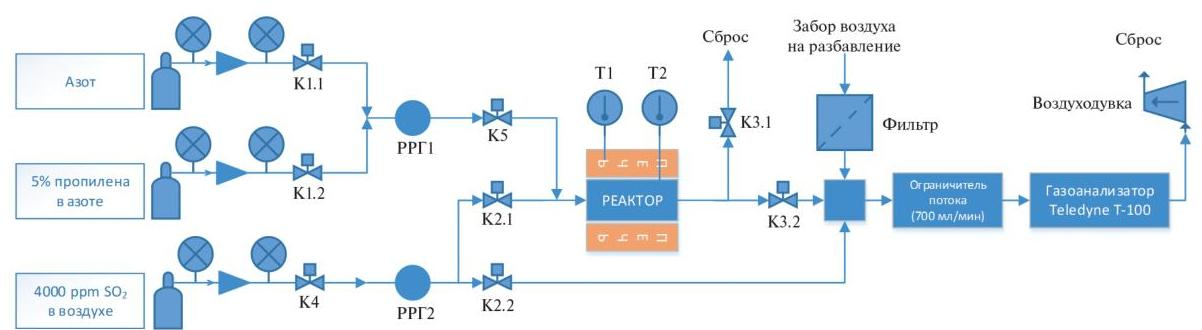

Рис. 2. Принципиальная схема установки определения стабильных свойств добавок к катализатору крекинга для снижения выбросов оксидов серы в газах регенерации (PPI 1 и 2 - регуляторы массового расхода газа, T1 и T2 - датчики температуры).

Определение содержания оксида серы(IV) проводили с помощью газоанализатора модели «Т-100Н» (производитель Teledyne Instruments Advanced Pollution Instrumentation Division, США). Принцип действия газоанализатора модели «Т-100Н» основан на флуориметрическом методе, заключающемся в возбуждении молекул $\mathrm{SO}_{2}$ УФ-излучением и измерении интенсивности флуоресценции пропорционально содержанию диоксида серы в газовой смеси.

## Исследование эффективности работы добавок в снижении содержания оксидов серы в газах регенерации каталитического крекинга

Для исследования эффективности работы добавок на основе различных активных компонентов в снижении выбросов $\mathrm{SO}_{2}$ в газах регенерации были проведены процессы крекинга, регенерации и анализа отходящих газов. В качестве сырья использовали негидроочищенный вакуумный газойль с высоким содержанием серы. Испытания проводили на промышленном катализаторе, в том числе в смеси с добавками в количестве 5 мас.\%. В табл. 2 представлены характеристики используемого сырья и катализатора крекинга. Анализ отходящих газов выполняли с помощью газоанализатора модели «Т-100Н».

Каталитические испытания выполнены на лабораторной установке с неподвижным слоем катализатора по стандарту ASTM D3907. Температура крекинга составляла $527^{\circ} \mathrm{C}$, соотношение катализатор : сырье $=4$, массовая скорость подачи сырья $-30 \mathrm{~V}^{-1}$.

Для исследования процесса регенерации закоксованных катализаторов крекинга и добавок к ним использована лабораторная установка,

включающая в себя блок подачи газов, реакторный блок и аналитический блок, представляющий собой газоанализатор модели «Т-100Н» (производитель Teledyne Instruments Advanced Pollution Instrumentation Division, США). Температура регенерации катализатора составляла $700^{\circ} \mathrm{C}$, что моделирует процесс, происходящий в реальном регенераторе установки каталитического крекинга. Для исключения преждевременного горения коксовых отложений

Таблица 2. Основные характеристики используемого сырья и катализатора крекинга

| Наименование показателя | Значение |
| :--: | :--: |
| Негидроочищенный вакуумный газойль |  |
| Плотность при $15^{\circ} \mathrm{C}, \mathrm{r} / \mathrm{cm}^{3}$ | 0,912 |
| Фракционный состав, ${ }^{\circ} \mathrm{C}$ : <br> - н.к. | 324 |
| $-10 \%$ | 372 |
| $-50 \%$ | 447 |
| $-90 \%$ | 519 |
| $-98 \%$ | 545 |
| Массовая доля фракции, выкипающей до $350^{\circ} \mathrm{C}, \%$ | 4,0 |
| Массовая доля общей серы, мг/кг | 8260 |
| Массовая доля азота, мг/кг | 1025 |
| Массовая доля суммы ванадия и никеля, мг/кг | 0,1 |
| Коксуемость, мас.\% | 0,26 |
| Промышленный катализатор крекинга |  |
| Насыпная плотность, кг/м ${ }^{3}$ | 753 |
| Средний размер частиц, мкм | 86 |
| Объем пор, см $^{3} /$ г | 0,503 |
| Удельная площадь поверхности, м²/г | 266 |

при помещении кварцевого реактора с навеской исследуемого катализатора в нагретую до заданной температуры печь перед проведением процесса регенерации выполняли продувку инертным газом (азотом) в течение не менее 10 мин, но не ранее стабилизации температуры регенератора. Расход воздуха во всех экспериментах составлял 100 мл/мин.

Долю серы сырья, переходящую в диоксид серы, рассчитывали из уравнения 7:

$$
S_{\mathrm{SO}_{2}}=\frac{m_{\mathrm{S}_{\mathrm{r}}}}{m_{\mathrm{S}_{\mathrm{c}}}} \times 100 \%
$$

где $S_{\mathrm{SO}_{2}}$ - доля серы сырья, перешедшая в $\mathrm{SO}_{2}, \%$; $m_{\mathrm{S}_{\mathrm{r}}}$ - масса серы в газах регенерации, г; $m_{\mathrm{S}_{\mathrm{c}}}$ масса серы в сырье, г.

Расчет эффективности работы добавки выполняли по формуле 8:

$$
Э=\left(1-\frac{S_{\mathrm{KC}}}{S_{\mathrm{БK}}}\right) \times 100 \%
$$

где $Э$ - эффективность каталитической системы, состоящей из базового катализатора и каталитической добавки, в снижении выбросов оксидов серы, $\% ; S_{\text {КС }}$ - массовая доля серы сырья, переходящая в диоксид серы при регенерации каталитической системы, состоящей из базового катализатора и каталитической добавки для снижения выбросов оксидов серы при регенерации, $\% ; S_{\text {БК }}$ - массовая доля серы сырья, перехо-

дящая в диоксид серы при регенерации базового катализатора без добавок, $\%$.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

Одна из фаз каталитического цикла представляет перенос оксидов серы из регенератора установки каталитического крекинга в реактор в виде сероводорода. На этой стадии происходит восстановление сульфатов, образовавшихся в результате окислительной регенерации, в условиях восстановительной среды реактора, где присутствуют углеводороды. Эта фаза играет ключевую роль в формировании стабильных характеристик добавки, так как она определяет степень разрушения сульфатов и восстановление первоначальной адсорбционной емкости по отношению к оксидам серы.

В табл. 3 представлены синтезированные образцы активного компонента добавки для снижения содержания оксидов серы в газах регенерации и их химический состав. Осаждение гидротальцитов проводили при расчетном соотношении Mg к Al , равном $6: 1$. Маркировка ГТ соответствует классическому карбонатнощелочному осаждению, маркировка ГТМ осаждению в присутствии мочевины.

Первые образцы в каждой серии представляют собой только адсорбционный компонент, вторые - адсорбционный и окислительный компоненты, третьи и четвертые - системы, включающие все три компонента для проведения полного цикла удаления оксидов серы, т.е. $\mathrm{Ce}, \mathrm{V}, \mathrm{Mg}$, Al -гидротальциты.

Таблица 3. Химический состав образцов активного компонента добавки

| Образец | Компонент | Содержание, мас.\% |  |  |  |  | Соотношение <br> Mg: Al |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  | $\mathrm{Na}_{2} \mathrm{O}$ | $\mathrm{CeO}_{2}$ | $\mathrm{V}_{2} \mathrm{O}_{5}$ | $\mathrm{Al}_{2} \mathrm{O}_{3}$ | MgO |  |
| ГТ-1 | Адсорбционный | 0,01 | - | - | 17,05 | 82,94 | 6,15 |
| ГТ-2 | Адсорбционный, окислительный | 0,08 | 9,07 | - | 16,45 | 74,40 | 5,72 |
| ГТ-3 | Адсорбционный, окислительный, | 0,01 | 11,95 | 1,07 | 16,04 | 70,87 | 5,59 |
| ГТ-4 | восстановительный | 0,05 | 9,13 | 1,91 | 15,24 | 73,62 | 6,11 |
| ГТМ-1 | Адсорбционный | - | - | - | 15,07 | 84,91 | 7,13 |
| ГТМ-2 | Адсорбционный, окислительный | - | 10,07 | - | 16,03 | 73,83 | 5,83 |
| ГТМ-3 | Адсорбционный, окислительный, | - | 10,12 | 0,89 | 14,93 | 74,00 | 6,27 |
| ГТМ-4 | восстановительный | - | 10,39 | 1,62 | 15,24 | 72,70 | 6,03 |

Для всех синтезированных образцов достигнуто расчетное соотношение Mg к Al (примерно $6: 1$ ), а также расчетное содержание оксидов церия и ванадия ( $\sim 10$ мас. $\%$ по $\mathrm{CeO}_{2}$ и $\sim 1$ и 2 мас. $\%$ по $\mathrm{V}_{2} \mathrm{O}_{5}$ соответственно для образцов 3 и 4 в каждой серии).

По данным РФА для всех образцов, прокаленных при $700^{\circ} \mathrm{C}$ в течение 5 ч, определяется фаза оксида магния. При введении окислительного компонента регистрируется фаза оксида церия с кубической кристаллической решеткой. Оксид ванадия на рентгенограмме не определяется ввиду малого содержания в образцах. На рис. 3 представлены дифрактограммы для образцов, полученных осаждением смесью $\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}$. Дифрактограммы для образцов, полученных осаждением с помощью мочевины, не отличаются от «карбонатно-щелочных» аналогов.

Исследование адсорбционных свойств смешанных оксидов $\mathrm{Ce}, \mathrm{V}, \mathrm{Mg}$ и Al , полученных с использованием мочевины в качестве осадителя, показало стабильность основных характеристик независимо от конкретного состава образца. В табл. 4 представлены результаты анализа адсорбции диоксида углерода $\left(\mathrm{CO}_{2}\right)$ на четырех образцах (ГТМ-1 - ГТМ-4), прокаленных при $700^{\circ} \mathrm{C}$. Адсорбцию проводили при $30^{\circ} \mathrm{C}$ в течение одного часа, после чего реакция считалась необратимой, что свидетельствует о достаточно сильном взаимодействии $\mathrm{CO}_{2}$ с поверхно-

стью оксидов. Это указывает на наличие на поверхности активных центров, способных как к химической, так и к физической адсорбции. Табл. 4 демонстрирует, что у образцов ГТМ-1 и ГТМ-2 удельная поверхность составляет 102 и $126 \mathrm{~m}^{2} /$ г соответственно; при этом адсорбционная емкость по $\mathrm{CO}_{2}$ практически одинакова (150 и 146 мкмоль/г). Однако адсорбционная емкость, отнесенная к единице поверхности (мкмоль/м²), существенно различается: 1,47 мкмоль/м² для ГТМ-1 и 1,16 мкмоль/м² для ГТМ-2. Это указывает на то, что различия в структуре и химическом составе образцов, несмотря на одинаковый осадитель (мочевина), влияют на эффективность адсорбции $\mathrm{CO}_{2}$. Более высокая адсорбционная емкость по $\mathrm{CO}_{2}$, отнесенная к единице поверх-

Таблица 4. Характеристики адсорбции $\mathrm{CO}_{2}$ на смешанных оксидах (необратимая после 1 ч при $30^{\circ} \mathrm{C}$, прокалка $700^{\circ} \mathrm{C}$ )

| 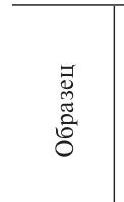 | 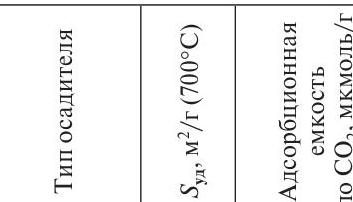 | 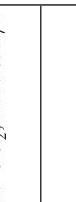 | 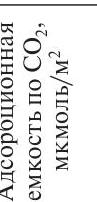 |
| :--: | :--: | :--: | :--: |
| ГТМ-1 | $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{3}$ | 102 | 150 | 1,47 |
| ГТМ-2 | $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{3}$ | 126 | 146 | 1,16 |
| ГТМ-3 | $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{3}$ | 96 | 200 | 2,08 |
| ГТМ-4 | $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{3}$ | 98 | 200 | 2,04 |

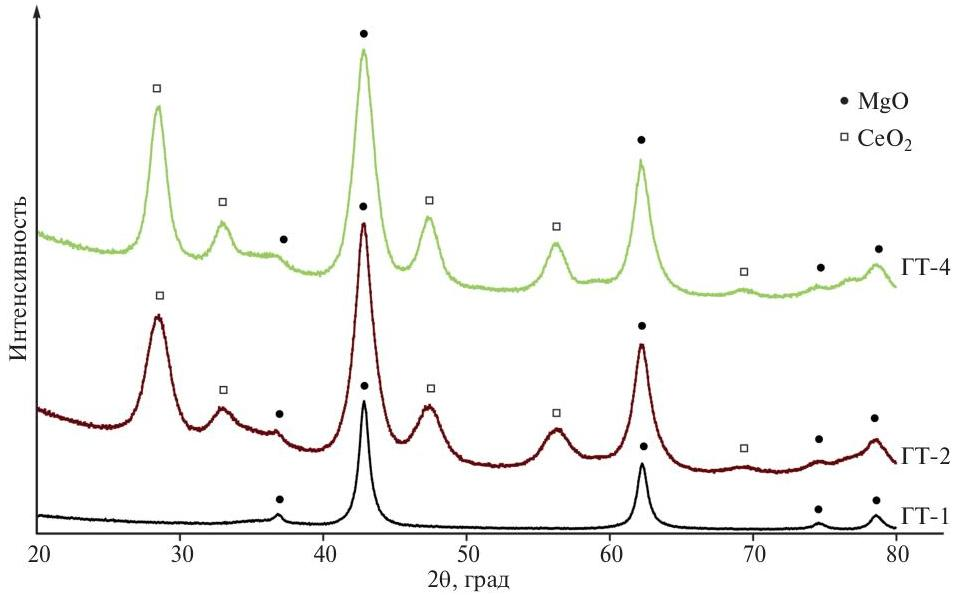

Рис. 3. Дифрактограммы синтезированных образцов, прокаленных при $700^{\circ} \mathrm{C}$, ГТ-1, ГТ-2 и ГТ-4: $\cdot-\mathrm{MgO}-$ оксид магния кубический; $\square-\mathrm{CeO}_{2}-$ церианит кубический.

ности, у ГТМ-1 может быть связана с более высокой концентрацией активных центров на его поверхности, возможно, из-за различий в морфологии или распределении компонентов. Образцы ГТМ-3 и ГТМ-4 показывают схожую высокую адсорбционную емкость (200 мкмоль/г), несмотря на меньшую удельную поверхность (96 и $98 \mathrm{~m}^{2} /$ г соответственно). Значение адсорбционной емкости, отнесенное к единице поверхности, также близко для обоих образцов (2,08 и 2,04 мкмоль/м²), что свидетельствует о высокой плотности активных центров на их поверхности. Это может быть связано с оптимальным соотношением компонентов в этих образцах, обеспечивающим более эффективное взаимодействие с молекулами $\mathrm{CO}_{2}$.

На рис. 4 и в табл. 5 представлены результаты исследования пористой структуры и адсорбционной емкости к оксиду серы(VI) образцов активного компонента добавки $\mathrm{deSO}_{x}$. Для образцов ГТ-1 и ГТМ-1, представляющих собой адсорбционный компонент добавки, $S_{\text {адс }}$ составляет 1.2 и 1.3 ммоль/г соответственно при входной концентрации сернистого газа, равной 4000 ppm . Исследования адсорбционной емкости к $\mathrm{SO}_{3}$ для данных образцов выполняли в присутствии нанесенного на оксид кремния оксида церия, который вводили в состав каталитической системы путем механического смешения в количестве 10 мас. $\%$.

Все приготовленные образцы отличаются высокой начальной адсорбционной емкостью к оксиду серы(VI) - более 10,0 ммоль/г. Совместное введение окислительного и восстановительного компонентов на стадии осаждения (образцы ГТ-3, ГТ-4 и ГТМ-3, ГТМ-4 соответственно) позволяет увеличить значение адсорбционной емкости с 11,9 до 13,7 ммоль/г (при осаждении $\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}$ ) и с 12,9 до 14,1 ммоль/г (при осаждении $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{2}$ ). По результатам низкотемпературной адсорбции азота введение окислительного компонента на стадии осаждения (образцы ГТ-2 и ГТМ-2 соответственно) способствует стабилизации кристаллической решетки оксида магния, в результате чего наблюдаются более высокие значения удельной площади поверхности смешанных $\mathrm{Ce}, \mathrm{Mg}, \mathrm{Al}$ - оксидов увеличение $S_{\text {ка }}$ со 135 до $157 \mathrm{~m}^{2} /$ г (при осаждении $\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}$ ) и со 102 до $126 \mathrm{~m}^{2} /$ г [при осаждении $\mathrm{CO}\left(\mathrm{NH}_{2}\right)_{2}$ ]. Для трехкомпонентных систем, т.е. $\mathrm{Ce}, \mathrm{V}, \mathrm{Mg}, \mathrm{Al}$ - оксидов (третьи и четвертые образцы в каждой серии) наблюдается не-

которое снижение значений удельной площади поверхности, что можно объяснить частичной блокировкой пор.

Исследование циклической стабильности синтезированных смешанных оксидов, предназначенных для адсорбции триоксида серы $\left(\mathrm{SO}_{3}\right)$, выявило существенные различия в их поведении в зависимости от состава. В эксперименте были использованы образцы, обозначенные как ГТ-3, ГТ-4, ГТМ-3 и ГТМ-4, которые представляли собой различные комбинации оксидов, содержащих как окислительные, так и восстановительные компоненты. Ключевым отличием между группами образцов ГТ и ГТМ являлся метод синтеза: образцы ГТ были получены карбонат-но-щелочным методом, а образцы ГТМ - методом осаждения с использованием мочевины. После десяти циклов, включающих адсорбцию $\mathrm{SO}_{3}$ с последующим восстановлением образовавшихся сульфатов, смешанные оксиды, содержащие оксид ванадия $\left(\mathrm{V}_{2} \mathrm{O}_{5}\right)$, продемонстрировали значительно бо́льшую стабильность, чем образцы без $\mathrm{V}_{2} \mathrm{O}_{5}$. Образцы ГТ-4 и ГТМ-4, содержащие около 2 мас. $\% \mathrm{~V}_{2} \mathrm{O}_{5}$, показали снижение адсорбционной емкости к $\mathrm{SO}_{3}$ всего на 23 и $21 \%$ соответственно. Это контрастирует с образцами без $\mathrm{V}_{2} \mathrm{O}_{5}$, где снижение адсорбционной емкости $\left(S_{\text {адс }}\right)$ превысило $50 \%$. Наблюдаемое улучшение стабильности связывается с каталитическим действием $\mathrm{V}_{2} \mathrm{O}_{5}$, способствующим более эффективному восстановлению сульфатов и предотвращению дезактивации активных центров добавки. Примечательно, что увеличение концентрации $\mathrm{V}_{2} \mathrm{O}_{5}$ с 1 до 2 мас. $\%$ приводит к более быстрому выходу адсорбционной емкости на плато после 5 циклов. Это указывает на оптимальную концентрацию $\mathrm{V}_{2} \mathrm{O}_{5}$ для достижения максимальной стабильности работы добавки. Вероятно, при меньшем содержании $\mathrm{V}_{2} \mathrm{O}_{5}$ недостаточно активных центров для эффективного катализа, а при большем - могут возникать новые, нежелательные взаимодействия, снижающие эффективность. Кроме того, результаты подтвердили превосходство метода осаждения с использованием мочевины (образцы ГТМ) над карбонат-но-щелочным методом (образцы ГТ). Образцы, синтезированные с помощью мочевины, показали более высокую начальную адсорбционную емкость и меньшее снижение значений после циклических испытаний. Это может быть связано с более однородным распределением активных компонентов материала. В целом, полученные результаты указывают на перспективность

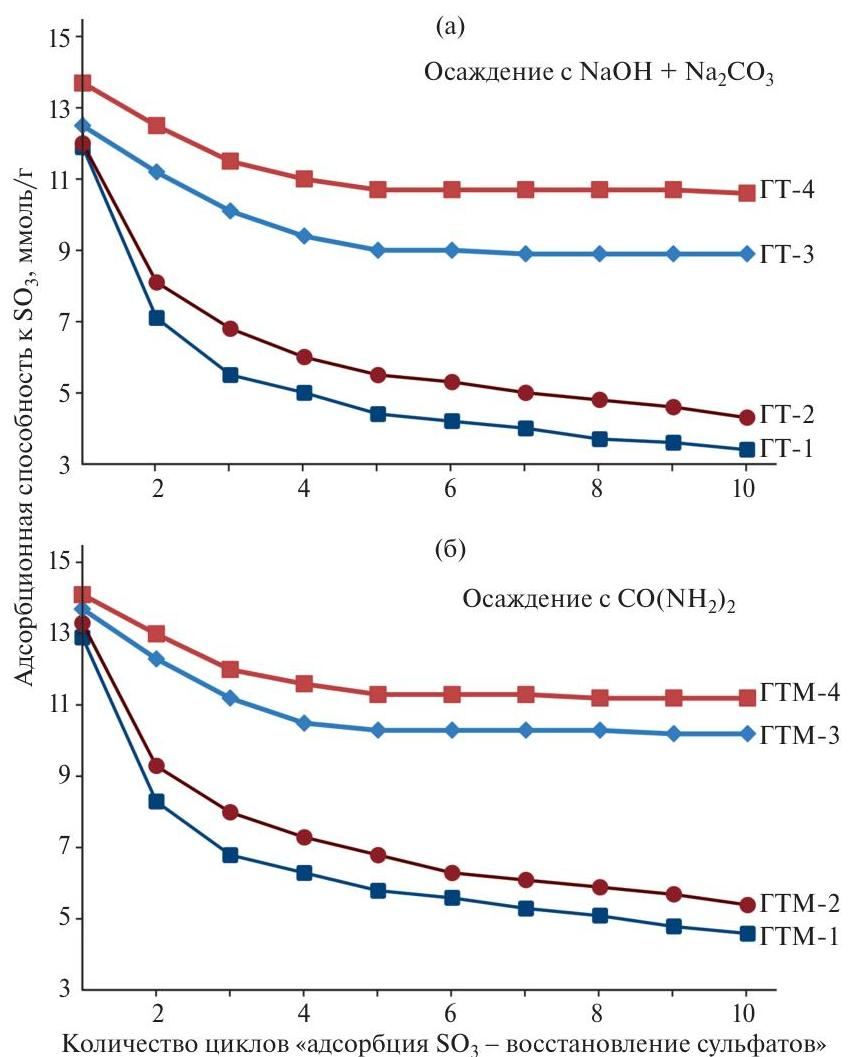

Рис. 4. Циклические исследования способности к адсорбции оксида серы(VI) и восстановления сульфатированных образцов при осаждении смесью $\mathrm{NaOH}+\mathrm{Na}_{2} \mathrm{CO}_{3}$ (а) и мочевиной (б).

Таблица 5. Пористая структура и адсорбционная емкость образцов

| Образец | Компонент | $\begin{gathered} S_{\text {кк }}, \mathrm{m}^{2} / \mathrm{r} \\ \left(700^{\circ} \mathrm{C}\right) \end{gathered}$ | $S_{\text {кк }}$, ммоль/т (по циклам) |  |  |  |  |  |  |  |  |  | \% снижения $S_{\text {кк }}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  |  | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |  |
| ГТ-1 | Адсорбционный* | 135 | 11,9 | 7,1 | 5,5 | 5,0 | 4,4 | 4,2 | 4,0 | 3,7 | 3,6 | 3,4 | 71 |
| ГТ-2 | Адсорбционный, окислительный | 157 | 12,0 | 8,1 | 6,8 | 6,0 | 5,5 | 5,3 | 5,0 | 4,8 | 4,6 | 4,3 | 64 |
| ГТ-3 | Адсорбционный, окислительный, | 125 | 12,5 | 11,2 | 10,1 | 9,4 | 9,0 | 9,0 | 8,9 | 8,9 | 8,9 | 8,9 | 29 |
| ГТ-4 | восстановительный | 124 | 13,7 | 12,5 | 11,5 | 11,0 | 10,7 | 10,7 | 10,7 | 10,7 | 10,7 | 10,6 | 23 |
| ГТМ-1 | Адсорбционный* | 102 | 12,9 | 8,3 | 6,8 | 6,3 | 5,8 | 5,6 | 5,3 | 5,1 | 4,8 | 4,6 | 64 |
| ГТМ-2 | Адсорбционный, окислительный | 126 | 13,3 | 9,3 | 8,0 | 7,3 | 6,8 | 6,3 | 6,1 | 5,9 | 5,7 | 5,4 | 59 |
| ГТМ-3 | Адсорбционный, окислительный, | 96 | 13,7 | 12,3 | 11,2 | 10,5 | 10,3 | 10,3 | 10,3 | 10,3 | 10,2 | 10,2 | 26 |
| ГТМ-4 | восстановительный | 98 | 14,1 | 13,0 | 12,0 | 11,6 | 11,3 | 11,3 | 11,3 | 11,2 | 11,2 | 11,2 | 21 |

[^0]
[^0]:    * В смеси с 10 мас. $\% \mathrm{CeO}_{2} / \mathrm{SiO}_{2}$.

использования смешанных оксидов, содержащих $\mathrm{V}_{2} \mathrm{O}_{5}$, синтезированных методом осаждения с мочевиной, для эффективной и стабильной адсорбции $\mathrm{SO}_{3}$.

Для исследования регенерации промышленного катализатора крекинга были синтезированы добавки на основе образцов ГТМ-2, ГТМ-3 и ГТМ-4 и проведено 5 циклов «реакция крекинга - регенерация катализатора». Получены значения эффективности от $98,2 \%$ в первом цикле до $96,5 \%$ в пятом цикле, что сопоставимо с импортной добавкой, имеющей значения от 98,9 до $97,0 \%$ в первом и пятом циклах соответственно.

В табл. 6 приведены данные по материальному балансу процесса каталитического крекинга в ходе проведения 5 циклов. Введение оксида ванадия, а также увеличение его содержания с 1 до 2 мас.\% приводит к увеличению стабильности и эффективности работы добавки (рис. 5 - для образца на основе ГТМ-4 эффективность соста-
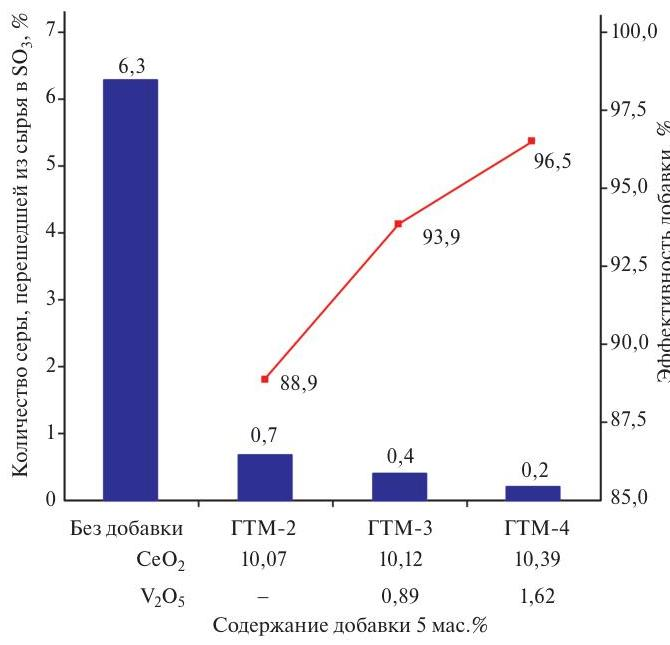

Рис. 5. Исследование регенерации катализатора крекинга (результаты после проведения 5 циклов «реакция крекинга - регенерация катализатора»).

Таблица 6. Материальный баланс крекинга негидроочищенного вакуумного газойля с содержанием серы 8260 ppm по методу ASTM D3907 ( $527^{\circ} \mathrm{C}$, соотношение катализатор : сырье -4 , скорость подачи сырья $-30 \cdot ч^{-1}$ ) на промышленном катализаторе в присутствии добавок ГТМ-2, ГТМ-3, ГТМ-4 в количестве 5 мас.\%, дезактивация термопаровая $788^{\circ} \mathrm{C}$ в течение 5 ч по методу ASTM D4463-06, а также результаты регенерации катализаторов крекинга в отсутствие и присутствии добавок ( $T=700^{\circ} \mathrm{C}, m_{\text {нав }}=0,6$ г, расход газа-окислителя (воздуха) 100 мл/мин). Доля серы сырья, перешедшая в $\mathrm{SO}_{2}$, для катализатора в отсутствие добавок составляет 6,3\%

| Показатель, мас.\% | Без добавки | ГТМ-2 |  |  |  |  |  | ГТМ-3 |  |  |  |  |  | ГТМ-4 |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  | циклы | 1 | 2 | 3 | 4 | 5 | 1 | 2 | 3 | 4 | 5 | 1 | 2 | 3 | 4 | 5 |  |  |
| Материальный баланс крекинга |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| Выход бензина, \% | 45,3 | 45,3 | 45,2 | 45,4 | 45,2 | 45,2 | 45,2 | 45,1 | 45,2 | 45,3 | 45,1 | 45,0 | 45,2 | 45,1 | 45,2 | 45,2 |  |  |
| Выход газа, \% | 18,9 | 18,9 | 18,8 | 18,7 | 19 | 18,9 | 19 | 19,2 | 19,3 | 19,4 | 19,6 | 19,3 | 18,9 | 19,2 | 19,3 | 19,2 |  |  |
| Метан-этан, \% | 2,1 | 2,2 | 2,2 | 2,1 | 2,2 | 2,1 | 2,1 | 2,1 | 2,2 | 2,2 | 2,4 | 2,3 | 2,2 | 2,3 | 2,2 | 2,3 |  |  |
| Пропанпропиленовая фракция, \% | 6,0 | 6,0 | 5,9 | 5,8 | 6,1 | 5,9 | 5,9 | 6,0 | 6,1 | 6,2 | 6,2 | 6,1 | 6,1 | 6,1 | 6,2 | 6,2 |  |  |
| Бутанбутиленовая фракция, \% | 10,8 | 10,7 | 10,7 | 10,8 | 10,7 | 10,9 | 11,0 | 11,1 | 11,0 | 11,0 | 11,0 | 10,9 | 10,6 | 10,8 | 10,9 | 10,7 |  |  |
| Кокс, \% | 7,9 | 8,0 | 8,3 | 8,3 | 8,5 | 8,2 | 7,8 | 7,7 | 7,7 | 7,6 | 7,4 | 7,8 | 7,8 | 7,7 | 7,6 | 7,5 |  |  |
| Легкий каталитический газойль, \% | 19,7 | 19,7 | 19,7 | 19,6 | 19,7 | 19,8 | 19,8 | 19,7 | 19,6 | 19,5 | 19,6 | 19,6 | 19,8 | 19,5 | 19,6 | 19,6 |  |  |
| Тяжелый каталитический газойль, \% | 8,2 | 8,1 | 8,0 | 8,0 | 7,6 | 7,9 | 8,2 | 8,3 | 8,2 | 8,2 | 8,3 | 8,3 | 8,3 | 8,5 | 8,3 | 8,5 |  |  |
| Конверсия, \% | 72,1 | 72,2 | 72,3 | 72,4 | 72,7 | 72,3 | 72,0 | 72,0 | 72,2 | 72,3 | 72,1 | 72,1 | 71,9 | 72,0 | 72,1 | 71,9 |  |  |
| Регенерация каталитической системы |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |  |
| Эффективность <br> удаления серы из газов регенерации, \% | - | 94,0 | 93,2 | 91,9 | 89,5 | 88,9 | 97,1 | 96,2 | 95,4 | 94,5 | 93,9 | 98,2 | 98,0 | 97,6 | 97,0 | 96,5 |  |  |

вила $96,5 \%$ при содержании добавки в каталитической системе 5 мас.\%. При этом введение добавки не оказывает существенного влияния на активность катализатора при крекинге негидроочищенного вакуумного газойля: выход бензина сохраняется на уровне 45,0 мас. $\%$, конверсия - 72,0 мас. $\%$.

## ЗАКЛЮЧЕНИЕ

Синтезированы образцы активного компонента добавки $\mathrm{deSO}_{x}$ методом соосаждения из растворов катионов металлов с использованием таких осадителей, как смесь карбоната и гидроксида натрия и мочевина. Показано, что введение оксида церия на стадии осаждения смешанного Mg , Al-оксида ведет к увеличению удельной площади поверхности образцов. Coвместное введение оксидов церия и ванадия на стадии осаждения смешанного Mg , Al-оксида ведет к увеличению адсорбционной емкости образцов к оксиду серы(VI). Проведение циклических испытаний «адсорбция $\mathrm{SO}_{3}$ - восстановление сульфатов» показало стабилизирующее действие присутствия оксида ванадия (при содержании $1-2$ мас. \%) в активном компоненте добавки $\mathrm{deSO}_{x}$. Применение мочевины в качестве осадителя позволяет получить более стабильный и эффективный активный компонент добавки $\mathrm{deSO}_{x}$, а отсутствие стоков, содержащих натрий, делает получение добавки менее энергозатратной и снижает ее себестоимость. Эффективность добавок на основе синтезированных образцов активных компонентов в снижении содержания оксидов серы в газах регенерации катализатора крекинга достигает $96,5 \%$ (при содержании в каталитической системе 5 мас.\%).

## БЛАГОДАРНОСТИ

Авторы выражают благодарность сотрудникам ЦНХТ ИК СО РАН Г.Г. Савельевой, И.В. Муромцеву, Д.Н. Огурцовой, А.С. Гилязутдиновой, В.А. Ковезе, В.П. Доронину, Т.П. Сорокиной. Исследования проведены с использованием оборудования ЦКП «Национальный центр исследования катализаторов» Института катализа СО PAH.

## ФИНАНСИРОВАНИЕ РАБОТЫ

Работа выполнена при финансовой поддержке Министерства науки и высшего образования

РФ в рамках государственного задания Института катализа CO PAH (проект FWUR-2024-0039).

## КОНФЛИКТ ИНТЕРЕСОВ

Авторы заявляют об отсутствии конфликта интересов, требующего раскрытия в данной статье.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Бобкова Татьяна Викторовна, к.х.н., ORCID: https://orcid.org/0000-0002-6542-2082

Дмитриев Константин Игоревич, к.т.н., ORCID: https://orcid.org/0000-0003-0704-2468

Потапенко Олег Валерьевич, к.х.н., ORCID: https://orcid.org/0000-0002-2755-7998

## СПИСОК ЛИТЕРАТУРЫ

1. Maholland M.K. Reducing gasoline Sulphur with additives // Petrol. Technology Quarterly. 2004. V. 9, № 3. P. 71-75.
2. Каминский Э.Ф. Глубокая переработка нефти: технологический и экологический аспекты. М.: Texника. 2001.384 с.
3. Letzsch W. Fluid catalytic cracking (FCC) in petroleum refining // Handbook of Petroleum Processing. 2015. V. 1. P. 261-316.
https://doi.org/10.1007/978-3-319-14529-7_2
4. Jiang R., Yu S., Zhou Y., Zhu T. Study on the Relation between the $\mathrm{Mn} / \mathrm{Al}$ mixed oxides composition and performance of FCC sulfur transfer agent // Catalysts. 2016. V. 6, № 2. ID20.
https://doi.org/10.3390/catal6020020
5. Corma A., Palomares A.E., Rey F., Márquez F. Simultaneous catalytic removal of $\mathrm{SO}_{x}$ and $\mathrm{NO}_{x}$ with hydrotalcite-derived mixed oxides containing copper, and their possibilities to be used in FCC units // J. Catal. 1997. V. 170, № 1. P. 140-149. https://doi.org/10.1006/jcat.1997.1750
6. Pi Z., Shen B., Zhao J., Liu J. CuO, $\mathrm{CeO}_{2}$ modified $\mathrm{Mg}-\mathrm{Al}$ spinel for removal of $\mathrm{SO}_{2}$ from fluid catalytic cracking flue gas // Ind. Eng. Chem. Res. 2015. V. 54, № 43. P. 10622-10628. https://doi.org/10.1021/acs.iecr.5b02329
7. Jae L.S., Jun H.K., Jung S.Y., Lee T.J., Ryu C.K., Kim J.C. Regenerable MgO-based $\mathrm{SO}_{x}$ removal sorbents promoted with cerium and iron oxide in RFCC // Ind. Eng. Chem. Res. 2005. V. 44, № 26. P. 9973-9978. https://doi.org/10.1021/ie050607u

8. Jiang L., Wei M., Xu X., Lin Y., Lü Z., Song J., Duan X. $\mathrm{SO}_{x}$ Oxidation and adsorption by $\mathrm{CeO}_{2} / \mathrm{MgO}$ : synergistic effect between $\mathrm{CeO}_{2}$ and MgO in the fluid catalytic cracking process // Ind. Eng. Chem. Res. 2011. V. 50, № 8. P. 4398-4404.
https://doi.org/10.1021/ie 102243y
9. Pereira H.B., Polato C.M., Monteiro J.L.F., Henriques C.A. $\mathrm{Mn} / \mathrm{Mg} / \mathrm{Al}$-spinels as catalysts for $\mathrm{SO}_{x}$ abatement: Influence of $\mathrm{CeO}_{2}$ incorporation and catalytic stability // Catal. Today. 2010. V. 149, № 3-4. P. 309315.
https://doi.org/10.1016/j.cattod.2009.06.006
10. Li B., Yuan S. Synthesis, characterization, and evaluation of TiMgAlCu mixed oxides as novel $\mathrm{SO}_{x}$ removal catalysts // Ceram. Int. 2014. V. 21, № 5. P. 805-824.
https://doi.org/10.1081/LFT-120017451
11. Kang H.T., Lv K., Yuan S.L. Synthesis, characterization, and $\mathrm{SO}_{2}$ removal capacity of MnMgAlFe mixed oxides derived from hydrotalcite-like compounds // Appl. Clay Sci. 2013. V. 72. P. 184-190. https://doi.org/10.1016/j.clay.2013.01.015
12. Cantú M., López-Salinas E., Valente J.S., Montiel R. $\mathrm{SO}_{x}$ removal by calcined MgAlFe hydrotalcite-like materials: Effect of the chemical composition and the cerium incorporation method // Environ. Sci. Technol. 2005. V. 39, № 24. P. 9715-9720. https://doi.org/10.1021/es051305m
13. Cheng W.P., Yu X.Y., Wang W.J., Liu L., Yang J.G., He M.Y. Synthesis, characterization and evaluation of $\mathrm{Cu} / \mathrm{MgAlFe}$ as novel transfer catalyst for $\mathrm{SO}_{x}$ removal // Catal. Commun. 2008. V. 9, № 6. P. 1505-1509. https://doi.org/10.1016/j.catcom.2007.12.020
14. Kong J., Jiang L., Huo Z., Xu X., Evans D.G., Song J., He M., Li Z., Wang Q., Yan L. Influence of the preparation process on the performance of three hydro-talcite-based $\mathrm{De}-\mathrm{SO}_{x}$ catalysts // Catal. Commun. 2013. V. 40. P. 59-62.
https://doi.org/10.1016/j.catcom.2013.05.026
15. Sanchez-Cantu M., Perez-Diaz L.M., Maubert A M., Valente J.S. Dependence of chemical composition of calcined hydrotalcite-like compounds for $\mathrm{SO}_{x}$ reduction // Catal. Today. 2010. V. 150, № 3-4. P. 332339.
https://doi.org/10.1016/j.cattod.2009.09.010
16. Polato C.M.S., Henriques C.A., Neto A.A., Monteiro J.L.F. Synthesis, characterization and evaluation of $\mathrm{CeO}_{2} / \mathrm{Mg}$, Al-mixed oxides as catalysts for $\mathrm{SO}_{x}$ removal // J. Mol. Catal. A: Chem. 2005. V. 241, № 1-2. P. 184-193.
https://doi.org/10.1016/j.molcata.2005.07.006
17. Bhattacharyya A., Yoo J.S. Additives for the catalytic removal of fluid catalytic cracking unit flue gas pollutants // Stud. Surf. Sci. Catal. 1993. V. 76. P. $531-562$.
https://doi.org/10.1016/S0167-2991(08)63837-9
18. Hirschberg E.H., Bertolacini R.J. Catalytic control of $\mathrm{SO}_{x}$ emissions from fluid catalytic cracking units // Fluid Catalytic Cracking. 1988. P. 114-145. https://doi.org/10.1021/bk-1988-0375.ch008
19. Scherzer J. Designing FCC catalysts with high-silica Y zeolites // Appl. Catal. 1991. V. 75, № 1. P. 1-32. https://doi.org/10.1016/S0166-9834(00)83119-X
20. Magnabosco L.M. Principles of the $\mathrm{SO}_{x}$ reduction technology in fluid catalytic cracking units (FCCUs) // Stud. Surf. Sci. Catal. 2007. V. 166. P. 254-303. https://doi.org/10.1016/S0167-2991(07)80199-6
21. Evans D.G., Duan X. Preparation of layered double hydroxides and their applications as additives in polymers, as precursors to magnetic materials and in biology and medicine // Chem. Commun. 2006. V. 37, № 5. P. 485-496.
https://doi.org/10.1039/b510313b
22. Oh J., Hwang S., Choy J. The effect of synthetic conditions on tailoring the size of hydrotalcite particles // Solid State Ionics. 2002. V. 151, № 1-4. P. 285-291. https://doi.org/10.1016/S0167-2738(02)00725-7
23. Saber O., Hatano B., Tagaya H. Preparation of new layered double hydroxide, Co-TiLDH // J. Ind. Phenom. Macrocycl. Chem. 2005. V. 51. P. 17-25. https://doi.org/10.1007/s10847-004-4819-5
24. Costantino U., Marmottini F., Nocchetti M., Vivani R. New synthetic routes to hydrotalcite-like compounds - characterisation and properties of the obtained materials // Eur. J. Inorg. Chem. 1998. V. 1998, № .10. P. 1439-1446.
https://doi.org/10.1002/(SICI)1099-0682(199810) 1998:10<1439::AID-EJIC1439>3.0.CO;2-1
25. Zeng H., Deng X., Wang Y., Liao K. Preparation of $\mathrm{Mg}-\mathrm{Al}$ hydrotalcite by urea method and its catalytic activity for transesterification // AIChE J. 2009. V. 55, № 5. P. 1229-1235.
https://doi.org/10.1002/aic. 11722
26. Rao M.M., Reddy B.R., Jayalakshmi M., Jaya V.S., Sridhar B. Hydrothermal synthesis of $\mathrm{Mg}-\mathrm{Al}$ hydrotalcites by urea hydrolysis // Materials Research Bulletin. 2005. V. 40, № 2. P. 347-359.
https://doi.org/10.1016/j.materresbull.2004.10.007
27. Абызов А.М. Измерение удельной поверхности дисперсных материалов методом низкотемпературной адсорбции газа: Практикум. СПб.: СПбГТИ(ТУ), 2016. 37 с.

# ПОЛУЧЕНИЕ И ФОТОКАТАЛИТИЧЕСКИЕ СВОЙСТВА КОМПОЗИТНЫХ ФОТОКАТАЛИЗАТОРОВ $\mathrm{TiO}_{2}$-МСМ-22 

©2025 г. А. А. Садовников ${ }^{1,2, *}$, Е. Р. Наранов ${ }^{1}$, К. Н. Новоселова ${ }^{2}$, Р. А. Родригес Пинеда ${ }^{1}$, А. Л. Максимов ${ }^{1}$<br>${ }^{1}$ Институт нефтехимического синтеза им. А. В. Топчиева РАН, Москва, 119991 Россия<br>${ }^{2}$ Институт общей и неорганической химии им. Н. С. Курнакова РАН, Москва, 119991 Россия<br>*E-mail: sadovnikov@ips.ac.ru<br>Поступила в редакцию 13 декабря 2024 г.<br>После доработки 4 марта 2025 г.<br>Принята к публикации 29 апреля 2025 г.


#### Abstract

Разработан быстрый и простой метод синтеза эффективных фотокатализаторов на основе диоксида титана и мезопористого цеолита МСМ-22 из различных прекурсоров титана. Полученные фотокатализаторы были проанализированы методами рентгенофазового анализа (РФА), низкотемпературной адсорбции азота, растровой электронной микроскопии (РЭМ). Фотокаталитическая активность образцов $\mathrm{TiO}_{2}$-МСМ-22 была протестирована в реакциях фотокаталитического разложения красителя кристаллического фиолетового и окисления ацетона. Наибольшую фотокаталитическую активность продемонстрировал образец с соотношением $\mathrm{TiO}_{2}$-цеолит $1: 1$, полученный из тетрахлорида титана. Степень деградации кристаллического фиолетового составила $22 \%$ при УФ-облучении в течение 2 ч, а в реакции разложения ацетона активность составила 642 млн д. (выход $\mathrm{CO}_{2}$ ).


Ключевые слова: МСМ-22, фотокатализ, диоксид титана, нанокомпозит
DOI: 10.31857/S0028242125020072, EDN: KMELKU

В настоящее время загрязнение окружающей среды привлекает все большее внимание исследователей. Органические и неорганические загрязнители, содержащиеся в воде и воздухе, такие как $\mathrm{NO}_{x}$, летучие органические соединения, красители текстильных производств, отходы фармацевтических фабрик и другие, зачастую устойчивы и имеют опасную природу, что приводит к стойкому загрязнению окружающей среды [1-3]. Диоксид титана привлек большое внимание исследователей благодаря стабильности, дешевизне и высокой фотокаталитической активности [4, 5]. Однако широкое применение $\mathrm{TiO}_{2}$, в первую очередь при использовании в виде суспензии, ограничено из-за ряда его недостатков: низкой адсорбционной способности; склонности к агрегации [1]. Поэтому многие исследователи в поисках повышения стабильности разрабатывают способы нанесения наночастиц $\mathrm{TiO}_{2}$ на носитель [6, 7].

В качестве носителей для наноразмерного диоксида титана использовали различные материалы с высокой площадью удельной поверхности, например графен [8, 9], активированный уголь [10, 11], различные материалы на основе силикатов, оксидов кремния и алюминия природного и синтетического происхождения [12-14]. Носитель в данной конфигурации выступает в роли адсорбента для загрязняющих веществ, а также может препятствовать увеличению размеров кристаллитов $\mathrm{TiO}_{2}$ на его поверхности [15, 16]. Использование цеолитов в качестве носителей имеет ряд своих преимуществ, например цеолиты обладают высокой площадью удельной поверхности, химической и термической стабильностью [17-19]. Преимущественно исследованы следующие типы цеолитов FAU, MFI, MOR, BEA и HEU. Так было установлено, что фотокаталитическая активность композита $\mathrm{TiO}_{2}$-цеолит зависит от соотноше-

ния $\mathrm{Si} / \mathrm{Al}$ в цеолите, состояния поверхности, температуры прокаливания цеолита. Так, авторы [20] заявляют, что высокая гидрофобность цеолита может способствовать фотокаталитической активности катализатора $\mathrm{TiO}_{2}$-цеолит в реакциях разложения органических загрязнителей, в то время как цеолиты с низким соотношением $\mathrm{Si} / \mathrm{Al}$ используют для удаления аммония и тяжелых металлов из-за их превосходной ионообменной способности. Согласно литературным данным сведения о получении композитов наноразмерного доксида на цеолите МСМ-22 отсутствуют, в то время как цеолит МСМ-22 обладает высокой площадью поверхности, а его морфология в виде листов способна стабилизировать наночастицы диоксида титана.

На основании анализа имеющихся литературных данных можно заключить, что разработка метода получения стабильных фотокатализаторов на основе диоксида титана и цеолита в качестве носителя перспективна. А данные фотокатализаторы, согласно литературным данным, имеют потенциал применения в реакции фотокаталитического восстановления углекислого газа, что также является насущной тематикой для научного сообщества. Цель данной работы - разработка метода получения композитов $\mathrm{TiO}_{2}$-MCM-22 и исследование фотокаталитических свойств данных материалов в зависимости от прекурсора титана в реакциях фотокаталитического окисления фиолетового кристаллического и ацетона.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

В качестве исходных соединений были использованы гексаметиленимин ( $99 \%$, Aldrich), диоксид кремния (Aerosil, Aldrich), алюминат натрия ( $56 \% \mathrm{Al}_{2} \mathrm{O}_{3}, 37 \% \mathrm{Na}_{2} \mathrm{O}$, Aldrich), гидроксид натрия ( $\geqslant 98 \%$, Aldrich), $\mathrm{TiCl}_{4}$ ( $\geqslant 99,0 \%$, Aldrich), $\mathrm{Ti}\left[\mathrm{OCH}\left(\mathrm{CH}_{3}\right)_{2}\right]_{4}(\geqslant 99,0 \%$, Aldrich), $25 \%$ водный раствор аммиака (ч.д.а., ООО ТД «Химмед») и дистиллированная вода.

## Получение композита $\mathrm{TiO}_{2}$-MCM-22

Исходный цеолит МСМ-22 получали по классической методике, описанной в работе [21]: 0,368 г $\mathrm{NaA}_{2} \mathrm{O}_{3}, 0.240$ г NaOH растворили в 49,680 г воды. К полученному раствору добавили 3,044 г гексаметиленимина и 3,700 г $\mathrm{SiO}_{2}$ и 0,185 г цеолита МСМ-22 в качестве зародышей при интенсивном перемешивании в течение 30 мин. Затем образовавшийся гель помещали в автоклав

из нержавеющей стали с тефлоновым вкладышем и нагревали при $150^{\circ} \mathrm{C}$ со скоростью перемешивания 300 об/мин в течение 120 ч. После быстрого охлаждения автоклава образовавшийся осадок отделяли центрифугированием, многократно промывали водой и сушили при $80^{\circ} \mathrm{C}$ в течение 12 ч, после чего цеолит прокаливали при $550^{\circ} \mathrm{C}$ в течение 3 ч. Выход продукта составил $95 \%$.

К 1 г прокаленного цеолита в виде суспензии в изопропаноле по каплям добавляли расчетное количество хлорида титана или изопропоксида титана до образования густой массы с однородной консистенцией. Полученную массу небольшими порциями вносили в 10 мл воды при интенсивном перемешивании, затем помещали в ванну со льдом и по каплям добавляли раствор аммиака $(2,75 \mathrm{M})$ для получения однородного геля при рН 5 , затем оставляли перемешиваться в течение 3 ч. Образовавшийся осадок отделяли центрифугированием, многократно промывали водой и высушивали. Выход продукта составил $91-93 \%$ в зависимости от соотношения $\mathrm{SiO}_{2}: \mathrm{TiO}_{2}$.

Рентгенофазовый анализ (РФА) образцов проводили на дифрактометре Bruker D8 Advance в диапазоне $2 \theta 10-80^{\circ}$ с шагом $0,02^{\circ}$ и выдержкой не менее 0,5 с на шаг. Расчет величины ОКР проводили по формуле Шеррера:

$$
D_{h k l}=\frac{K \times \lambda}{\beta_{h k l}(2 \theta) \times \cos \left(\theta_{0}\right)}
$$

где $\theta_{0}$ - положение максимума пика, $\lambda$ - длина волны рентгеновского излучения $\mathrm{Cu} K_{\text {o1 }}$ $(0,154056$ нм), $\beta_{h k l}(2 \theta)$ - истинное физическое уширение дифракционного максимума. Значение фактора формы ( $K$ ) принимали равным 1.

Исследование морфологии и соотношения цеолит-диоксид титана полученных образцов проводили методом растровой электронной микроскопии (РЭМ) с использованием электронного микроскопа Carl Zeiss NVision 40 (Германия), оснащенном анализатором X-Max Oxford Instruments ( $80 \mathrm{~mm}^{2}$ ).

Площадь удельной поверхности образцов определяли методом низкотемпературной адсорбции азота с использованием прибора ASAP 2020 (Micromeritics, США). Перед анализом образцы вакуумировали 2 ч при $250^{\circ} \mathrm{C}$. Удельная поверхность рассчитана по БЭТ при относительном парциальном давлении $P / P_{0}=0,2$.

Рентеновскую фотоэлектронную спектроскопию (РФЭС) образцов проводили на спектрометре PREVAC EA15 (PREVAC sp. z o.o., Польша), оснащенном полусферическим анализатором высокого разрешения. В качестве источника излучения было выбрано излучение $\mathrm{Al} K_{\alpha}$ (hv = $=1486,6$ эВ, 150 Вт). Давление остаточных газов в ходе измерения не превышало $5 \times 10^{-9}$ мбар. Эффект зарядки учитывали, используя в качестве внутреннего стандарта положение линии $\mathrm{Cl} s\left(E_{\text {св }}=284,8\right.$ эВ) атомов углерода.

Для определения фотокаталитической активности (ФКА) полученных образцов диоксида титана были использованы модельная реакция фотодеградации органического красителя кристаллического фиолетового в водной среде по стандартной методике [4, 22] с использованием спектрофотометра Ocean Optics QE65000 (США) и дейтерий-галогеновой лампы Ocean Optics HPX-2000 и реакция фотоокислению ацетона в газовой камере [23], снабженной источником с 12 УФ-светодиодами (общая мощность 36 Вт), с максимумом излучения на длине волны 365 нм. Концентрацию ацетона и $\mathrm{CO}_{2}$ в воздухе в процессе фотокаталитического окисления определяли по интегрированию характеристических полос соединений в ИК-спектрах в ходе фотокаталитической реакции. Для ацетона в пределах $1165-1256 \mathrm{~cm}^{-1}$, для $\mathrm{CO}_{2}-2281-2399 \mathrm{~cm}^{-1}$. Для снижения влияния атмосферного $\mathrm{CO}_{2}$ ИК-спектрометр был помещен в герметичный бокс. Эффективность фотокаталитического окисления $(\Phi)$ рассчитывали по следующей формуле:

$$
\Phi\left(\text { моль мин }^{-1} \mathrm{BT}^{-1}\right)=\frac{C_{\mathrm{CO}_{2}} \times v}{P}
$$

где $C_{\mathrm{CO}_{2}}$ - максимальная концентрация образующегося $\mathrm{CO}_{2}, v$ - скорость потока газа, $P$ - мощность излучения.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

Цеолит, полученный в результате гидротермального синтеза, представляет собой однофазный образец без примеси аморфной фазы, что демонстрирует дифрактограмма, приведенная на рис. 1. По данным электронной микроскопии (рис. 2) полученный образец цеолита МСМ-22 по морфологии похож на глобулы из пластинчатых частиц.

На рис. 1 приведены дифрактограммы образцов композитов $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(9: 1), \mathrm{MCM}-22 /$
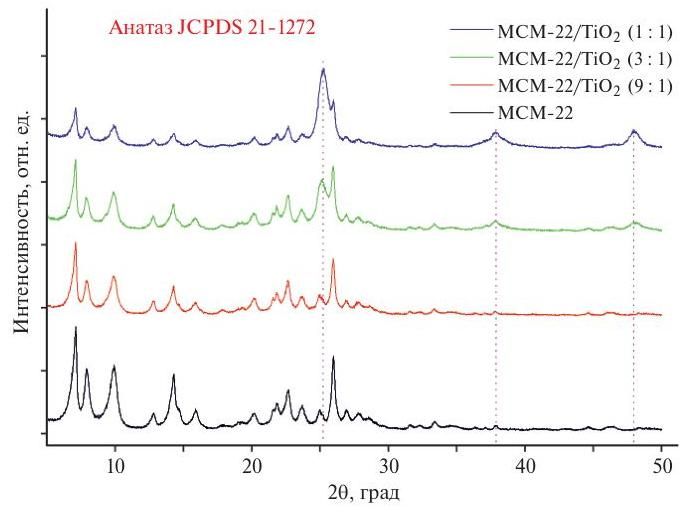

Рис. 1. Дифрактограммы образцов фотокатализаторов $\mathrm{MCM}-22 / \mathrm{TiO}_{2}$ с различным соотношением $\mathrm{MCM}-22: \mathrm{TiO}_{2}$, полученные с применением тетрахлорида титана.
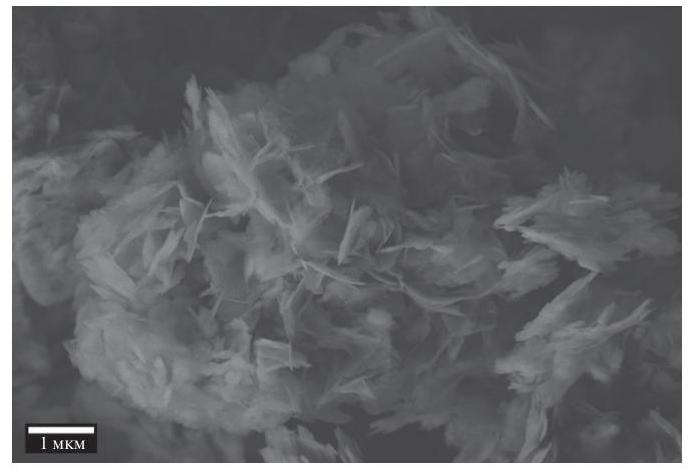

Рис. 2. РЭМ-изображения синтезированного цеолита MCM-22.
$\mathrm{TiO}_{2}(3: 1), \mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$. Так по мере роста концентрации диоксида титана в композите наблюдается увеличение интенсивности рефлексов анатаза. Для образцов $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(3: 1)$ и $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ по рефлексу (101) удалось оценить размер кристаллитов по формуле Шеррера (табл. 1). Для образца $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(9: 1)$ данный размер посчитать не представляется возможным из-за малого количества диоксида титана в композите и присутствия на дифрактограмме интенсивных рефлексов цеолита. По данным низкотемпературной адсорбции азота с ростом концентрации диоксида титана наблюдается уменьшение площади удельной поверхности (табл. 1).

Таблица 1. Физико-химические характеристики и фотокаталитические свойства образцов $\mathrm{TiO}_{2}$-MCM-22.

| Образец | $S_{\text {BET }}, \mathrm{m}^{2} / \mathrm{r}$ | ОКР частиц <br> $\mathrm{TiO}_{2}, \mathrm{HM}^{*}$ | $\mathrm{SiO}_{2} / \mathrm{TiO}_{2}$, <br> мас. соотн.** | ФКА, \%/мин | $C_{\mathrm{CO}_{2}}$, млн.д. | Ф, моль/ <br> мин $^{-1} \mathrm{BT}^{-1}$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| MCM-22 | 490 | - | - | - | - | - |
| $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(9: 1)$ <br> $\mathrm{TiCl}_{4}$ | 410 | - | 10,2 | 0,018 | 71 | $1,18 \times 10^{-5}$ |
| $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(3: 1)$ <br> $\mathrm{TiCl}_{4}$ | 342 | 19 | 3,7 | 0,051 | 204 | $3,39 \times 10^{-5}$ |
| $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ <br> $\mathrm{TiCl}_{4}$ | 251 | 17 | 1,5 | 0,167 | 642 | $1,07 \times 10^{-4}$ |
| $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ <br> TTIP | 215 | 20 | 1,7 | 0,091 | 402 | $6,70 \times 10^{-4}$ |

* Определено с помощью формулы Шеррера.
** По данным рентгеноспектрального микроанализа.

На рис. За-г показаны изображения растровой электронной микроскопии фотокатализаторов, полученных по разработанной методике из хлорида титана и изопропоксида титана. На изображениях можно заметить, что при соотношении цеолит : $\mathrm{TiO}_{2}=9: 1$ отсутствуют агрегаты диоксида титана, в то время как с увеличением соотношения заметно возрастает количество агрегатов наночастиц на поверхности цеолита. При использовании в качестве источника диоксида титана изопропоксида титана наблюдается

слипание пластин цеолита МСМ-22. Для определения элементного состава и состояния атомов в материалах были проведены ретгеноспектральный микроанализ и анализ методом рентгеновской фотоэлектронной спектроскопии (РФЭС).

В табл. 1 приведены значения соотношение $\mathrm{SiO}_{2} / \mathrm{TiO}_{2}$, полученные с помощью метода PCMA. В случае образца MCM-22/TiO 2 (1:1) было обнаружено что фактическое соотношение цеолита к диоксиду титана выше теоретического,
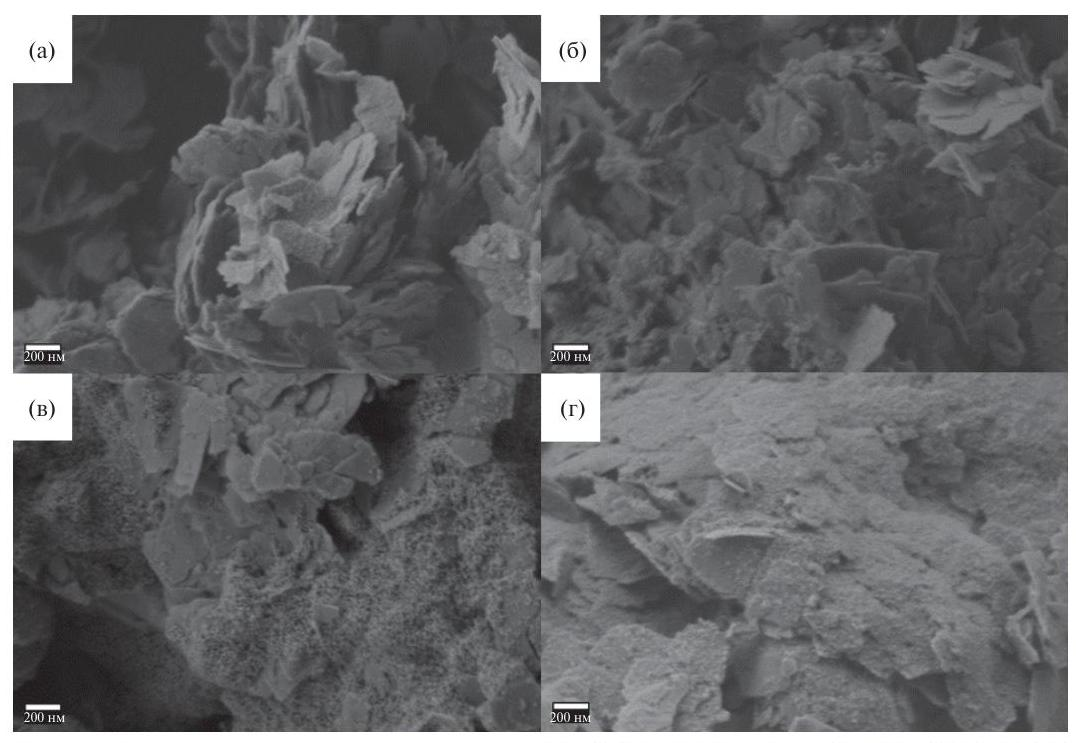

Рис. 3. РЭМ-изображения образцов катализаторов: (a) $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(9: 1)$, (б) $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(3: 1)$, (в) $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ из тетрахлорида титана, (г) $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ из изопропоксида титана при увеличении 100000 x .

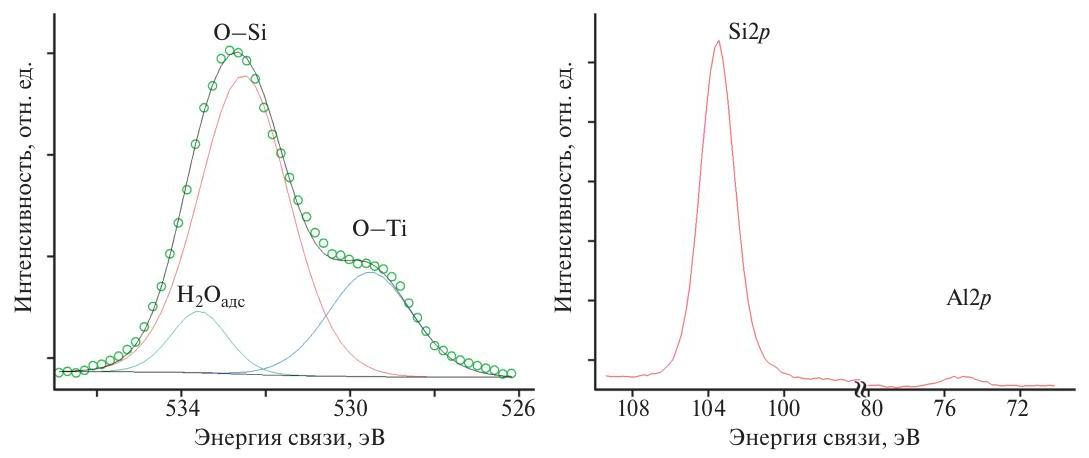

Рис. 4. РФЭ-спектры O1s, Si2p, Al2p образца MCM-22/TiO 2 (3:1).

что может быть связано с вымыванием слабосвязанного диоксида титана при промывке осадка в процессе синтеза. Для аналогичного образца из тетраизопропоксида титана данный эффект также наблюдался, и значение полученного соотношения больше чем для образца композита из тетрахлорида титана. Методом РФЭС было установлено, что атомы кремния находятся в состоянии +4 , атомы титана в состоянии +4 , алюминия в состоянии +3 , а кислород находится в трех состояниях ( $\mathrm{O}-\mathrm{Ti}$ - энергия связи 529,6 эВ, $\mathrm{O}-\mathrm{Si}$ - энергия связи 532,5 эВ и $\mathrm{H}_{2} \mathrm{O}_{\text {адс }}$ - энергия связи 533,6 эВ) (рис. 4).

Образцы композитных фотокатализаторов были исследованы в реакции разложения кристаллического фиолетового при УФ-облучении (табл. 1). Можно заметить, что с увеличением

диоксида титана в композите наблюдается увеличение ФКА (рис. 5a), в то время как площадь удельной поверхности снижается, что обусловлено большей площадью удельной поверхности исходного цеолита в сравнении с площадью удельной поверхности образуемого на поверхности диоксида титана. В газофазной реакции фотоокисления ацетона наблюдается аналогичная зависимость, а именно, рост фотокаталитической активности с увеличением содержания диоксида титана вследствие увеличения поглощения света и генерации электрон-дырочных пар. Так концентрация получаемого углекислого газа составляет от 642 млн долей для образца $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ до 71 млн долей для образца $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(9: 1)$ (рис. 5б). На основании этого можно заключить, что на ФКА в данных реакциях в первую очередь влияет количество
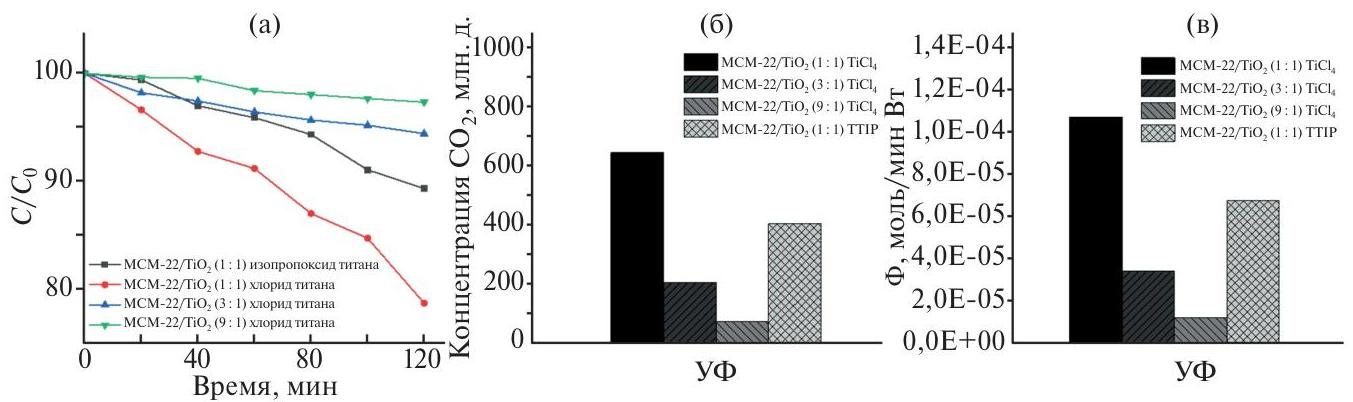

Рис. 5. Сравнение скоростей фотокаталитического разложения красителя кристаллического фиолетового в присутствии различных образцов диоксида титана при УФ-облучении: (a) скорость фотокаталитического разложения красителя кристаллического фиолетового в присутствии различных образцов диоксида титана; (б) зависимость концентрации образуемого $\mathrm{CO}_{2}$ в реакции фотокаталитического разложения ацетона при УФ-облучении различных исследуемых фотокатализаторов; (в) эффективность фотокаталитического окисления ацетона при УФ-облучении.

диоксида титана, нежели общая площадь удельной поверхности композита, что согласуется с литературными данными [18-19]. Для выбора источника диоксида титана в реакции разложения кристаллического фиолетового были исследованы образцы $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)$ из хлорида и изопропоксида титана. ФКА образца из хлорида титана существенно выше ( $0,167 \% /$ мин против $0,091 \% /$ мин $)$.

## ЗАКЛЮЧЕНИЕ

В ходе работы была разработана новая методика получения и впервые были получены гибридные фотокатализаторы состава $\mathrm{TiO}_{2}$-МСМ-22. В качестве исходных соединений для нанесения диоксида титана были выбраны тетраизопропоксид титана(IV) и тетрахлорид титана, исследованы их физико-химические и фотокаталитические свойства. Установлено, что большей фотокаталитической активностью в реакции УФ-разложения красителя кристаллического фиолетового обладает образец $\mathrm{MCM}-22 / \mathrm{TiO}_{2}(1: 1)(0,167 \% /$ мин $)$, а в реакции разложения ацетона активность составила 642 млн д. (выход $\mathrm{CO}_{2}$ ), полученный с применением в качестве источника диоксида титана тетрахлорида титана.

## ФИНАНСИРОВАНИЕ РАБОТЫ

Исследования проводились в рамках проекта РНФ № 23-23-00662.

## БЛАГОДАРНОСТИ

Работа выполнена с использованием оборудования ЦКП «Аналитический центр проблем глубокой переработки нефти и нефтехимии» ИНХС РАН. Авторы выражают благодарность ЦКП ФМИ ИОНХ РАН за содействие в проведении исследований свойств катализаторов методом растровой электронной микроскопии. Аттестация синтезированных образцов гетерогенных катализаторов выполнена при финансовой поддержке Минобрнауки России (Соглашение № 075-15-2021-1363).

## КОНФЛИКТ ИНТЕРЕСОВ

А.Л. Максимов является главным редактором журнала «Нефтехимия», у остальных авторов конфликт интересов, требующий раскрытия в данной статье, отсутствует.

## ИНФОРМАЦИЯ О ВКЛАДЕ АВТОРОВ

А.Л. Максимов и Е.Р. Наранов поставили цели и задачи исследования; А.А. Садовников и К.Н. Новоселова разработали методику получения и осуществили синтез фотокатализаторов, обработали данные, полученные методами рентгенофазового анализа, электронной микроскопии, рентгеновской фотоэлектронной спектроскопии. А.А. Садовников, Е.Р. Наранов и Р.А. Родригес Пинеда провели фотокаталитические эксперименты и интерпретировали результаты фотокаталитических исследований.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Садовников Алексей Александрович, ORCID: https://orcid.org/0000-0002-3574-0039

Наранов Евгений Русланович, к.х.н., ORCID: https://orcid.org/0000-0002-3815-9565

Родригес Пинеда Рикардо Артурович, ORCID: https://orcid.org/0009-0001-2744-2242

Новоселова Кристина Николаевна, ORCID: https://orcid.org/0009-0006-4139-1476

Максимов Антон Львович, д.х.н., академик PAH, ORCID: http://orcid.org/0000-0001-9297-4950

## СПИСОК ЛИТЕРАТУРЫ

1. Dong H., Zeng G., Tang L., Fan C., Zhang C., He X., He Y. An overview on limitations of $\mathrm{TiO}_{2}$-based particles for photocatalytic degradation of organic pollutants and the corresponding countermeasures // Water Res. 2015. V. 79. P. 128-146. https://dx.doi.org/10.1016/j.watres.2015.04.038
2. Haghighat Mamaghani A.H., Haghighat F., Lee C.-S. Role of titanium dioxide $\left(\mathrm{TiO}_{2}\right)$ structural design/ morphology in photocatalytic air purification // Appl. Catal. B: Environ. 2020. V. 269. ID118735. https://dx.doi.org/10.1016/j.apcatb.2020.118735
3. Ao C.H., Lee S.C. Indoor air purification by photocatalyst $\mathrm{TiO}_{2}$ immobilized on an activated carbon filter installed in an air cleaner // Chem. Eng. Sci. 2005. V. 60. № 1. P. 103-109. https://dx.doi.org/10.1016/j.ces.2004.01.073
4. Sadovnikov A.A., Baranchikov A.E., Zubavichus Y.V., Ivanova O.S., Murzin V.Y., Kozik V.V., Ivanov V.K. Photocatalytically active fluorinated nano-titania synthesized by microwave-assisted hydrothermal treat-

ment // J. Photochem. Photobiol. A. 2015. V. 303304. P. 36-43.
https://dx.doi.org/10.1016/j.jphotochem.2015.01.010
5. Sadovnikov A.A., Naranov E.R., Maksimov A.L., Baranchikov A.E., Ivanov V.K. Photocatalytic activity of fluorinated titanium dioxide in ozone decomposition: $1 / /$ Russ. J. Appl. Chem. 2022. V. 95, № 1. P. 118-125. https://dx.doi.org/10.1134/S1070427222010153
6. Rueda-Marquez J.J., Levchuk I., Fernández Ibañez P., Sillanpää M. A critical review on application of photocatalysis for toxicity reduction of real wastewaters // J. Cleaner Prod. 2020. V. 258. ID120694. https://dx.doi.org/10.1016/j.jclepro.2020.120694
7. Shan A.Y., Mohd. Ghazi T.I., Rashid S.A. Immobilisation of titanium dioxide onto supporting materials in heterogeneous photocatalysis: A review // Appl. Catal. A: Gen. 2010. V. 389, № 1-2. P. 1-8. https://dx.doi.org/10.1016/j.apcata.2010.08.053
8. Lin L., Wang H., Xu P. Immobilized $\mathrm{TiO}_{2}$-reduced graphene oxide nanocomposites on optical fibers as high performance photocatalysts for degradation of pharmaceuticals // Chem. Eng. J. 2017. V. 310. Pt. 2. P. 389-398.
https://dx.doi.org/10.1016/j.cej.2016.04.024
9. Tran M.L., Fu C.-C., Chiang L.-Y., Hsieh C.-T., Liu S.-H., Juang R.-S. Immobilization of $\mathrm{TiO}_{2}$ and $\mathrm{TiO}_{2}$-GO hybrids onto the surface of acrylic acidgrafted polymeric membranes for pollutant removal: Analysis of photocatalytic activity // J. Environ. Chem. Eng. 2020. V. 8, № 5. ID104422. https://dx.doi.org/10.1016/j.jece.2020.104422
10. Gar Alalm M., Tawfik A., Ookawara S. Enhancement of photocatalytic activity of $\mathrm{TiO}_{2}$ by immobilization on activated carbon for degradation of pharmaceuticals // J. Environ. Chem. Eng. 2016. V. 4, № 2. P. 1929-1937. https://dx.doi.org/10.1016/j.jece.2016.03.023
11. Bahrudin N.N. Evaluation of degradation kinetic and photostability of immobilized $\mathrm{TiO}_{2}$ /activated carbon bilayer photocatalyst for phenol removal // Appl. Surf. Sci. Adv. 2022. V. 7. ID100208.
https://dx.doi.org/10.1016/j.apsadv.2021.100208
12. Li F., Sun S., Jiang Y., Xia M., Sun M., Xue B. Photodegradation of an azo dye using immobilized nanoparticles of $\mathrm{TiO}_{2}$ supported by natural porous mineral // J. Hazard. Mater. 2008. V. 152, № 3. P. $1037-1044$.
https://dx.doi.org/10.1016/j.jhazmat.2007.07.114
13. de Oliveira W.V., Morais A.Í.S., Honorio L.M.C., Trigueiro P.A., Almeida L.C., Pena Garcia R.R., Viana B.C., Furtini M.B., Silva-Filho E.C., Osajima J.A. $\mathrm{TiO}_{2}$ Immobilized on Fibrous Clay as Strategies to Photocatalytic Activity // Mat. Res. 2020. V. 23. № 1. ID e20190463.
https://dx.doi.org/10.1590/1980-5373-mr-2019-0463
14. Yu J.C., Wang X., Fu X. Pore-Wall Chemistry and Photocatalytic Activity of Mesoporous Titania Molecular Sieve Films // Chem. Mater. 2004. V. 16, № 8. P. $1523-1530$.
https://dx.doi.org/10.1021/cm049955x
15. Younis S.A., Amdeha E., El-Salamony R.A. Enhanced removal of $p$-nitrophenol by $\beta-\mathrm{Ga}_{2} \mathrm{O}_{3}-\mathrm{TiO}_{2}$ photocatalyst immobilized onto rice straw-based $\mathrm{SiO}_{2}$ via factorial optimization of the synergy between adsorption and photocatalysis // J. Environ. Chem. Eng. 2021. V. 9, № 1. ID104619.
https://dx.doi.org/10.1016/j.jece.2020.104619
16. Wang B., Zhang G., Sun Z., Zheng S. Synthesis of natural porous minerals supported $\mathrm{TiO}_{2}$ nanoparticles and their photocatalytic performance towards Rhodamine B degradation // Powder Technol. 2014. V. 262. P. $1-8$.
https://dx.doi.org/10.1016/j.powtec.2014.04.050
17. Jansson I., Suárez S., Garcia-Garcia F.J., Sánchez B. Zeolite $-\mathrm{TiO}_{2}$ hybrid composites for pollutant degradation in gas phase // Appl. Catal. B: Environ. 2015. V. 178. P. 100-107.
https://dx.doi.org/10.1016/j.apcatb.2014.10.022
18. Hu G., Yang J., Duan X., Farnood R., Yang C., Yang J., Liu W., Liu Q. Recent developments and challenges in zeolite-based composite photocatalysts for environmental applications // Chem. Eng. J. 2021. V. 417. ID129209.
https://dx.doi.org/10.1016/j.cej.2021.129209
19. Kovalevskiy N.S., Lyulyukin M.N., Selishchev D.S., Kozlov D.V. Analysis of air photocatalytic purification using a total hazard index: Effect of the composite $\mathrm{TiO}_{2} /$ zeolite photocatalyst // J. Hazard. Mater. 2018. V. 358. P. 302-309.
https://dx.doi.org/10.1016/j.jhazmat.2018.06.035
20. Jiang N., Shang R., Heijman S.G.J., Rietveld L.C. Highsilica zeolites for adsorption of organic micro-pollutants in water treatment: A review // Water Res. 2018. V. 144. P. 145-161.
https://dx.doi.org/10.1016/j.watres.2018.07.017
21. Corma A., Corell C., Pérez-Pariente J. Synthesis and characterization of the MCM-22 zeolite // Zeolites. 1995. V. 15, № 1. P. 2-8.
https://dx.doi.org/10.1016/0144-2449(94)00013-I
22. Sadovnikov A.A., Nechaev E.G., Beltiukov A.N., Gavrilov A.I., Makarevich A.M., Boytsova O.V. Titania mesocrystals: working surface in photocatalytic reactions // Russ. J. Inorg. Chem. 2021. V. 66, № 4. P. 460-467. https://dx.doi.org/10.1134/S0036023621040197
23. Садовников А.А., Новоселова К.Н., Судьин В.В., Наранов Е.Р. Влияние аниона аммиачного комплекса серебра на активность сформированных in situ $\mathrm{Ag} / \mathrm{TiO}_{2}$-катализаторов // Нефтехимия. 2024. Т. 64, № 5. C. 491-498.
https://dx.doi.org/10.31857/S0028242124050077

# ИССЛЕДОВАНИЕ ПРОЦЕССА ГИДРООБЛАГОРАЖИВАНИЯ ПЕТРОЛАТУМОВ ДЛЯ ПРОИЗВОДСТВА УЛУЧШЕННЫХ НЕФТЯНЫХ ЦЕРЕЗИНОВ 

(C) 2025 г. Д. Ю. Махин ${ }^{1}$, В. А. Лаврентьев ${ }^{1}$, И. А. Пронченков ${ }^{2}$, В. М. Капустин ${ }^{2}$, А. А. С. Ахмед ${ }^{2}$<br>${ }^{1}$ Институт нефтехимического синтеза им. А. В. Топчиева РАН, Москва, 119991 Россия<br>${ }^{2}$ Российский государственный университет нефти и газа<br>(Национальный исследовательский университет) им. И. М. Губкина, Москва, 119991 Россия<br>E-mail: d.makhin@mail.ru<br>Поступила в редакцию 14 декабря 2024 г.<br>После доработки 16 апреля 2025 г.<br>Принята к публикации 7 мая 2025 г.


#### Abstract

В статье рассмотрены результаты квалифицированной переработки промышленно вырабатываемых петролатумов с целью получения гидроочищенных церезинов с улучшенными показателями качества. Установлено, что предварительное многостадийное обесмасливание петролатума позволяет снизить содержание серы в $2-3$ раза. Показано, что повышение давления водорода до 4,5 МПа в процессе гидроочистки при температуре $260^{\circ} \mathrm{C}$ позволяет получать церезины, по своим свойствам не уступающие коммерческим образцам. Минимально достигнутое содержание серы в гидроочищенном образце церезина составило 95 мг/кг, а содержание ароматических углеводородов 2,6 мас. $\%$, что создает предпосылки для разработки церезинов пищевого назначения.


Ключевые слова: депарафинизация, обезмасливание, петролатум, церезин, гидрооблагораживание DOI: 10.31857/S0028242125020082, EDN: KMEMBT

Петролатум является побочным продуктом процесса депарафинизации остаточных масляных фракций и, как правило, не находит квалифицированного применения, вследствие чего обладает низкой добавленной стоимостью. Одним из перспективных направлений переработки петролатума является получение нефтяного церезина, который, в отличие от петролатума, может применяться для пропитки упаковочных материалов, в качестве изоляционного материала в радио- и электротехнике, а также в составе пластичных смазок и свечных композиций; кроме того, специально очищенные марки могут использоваться в косметической и пищевой промышленности $[1,2,3]$.

На сегодняшний день в России петролатум производится на крупных нефтеперера-

батывающих заводах предприятий ПАО «НК «Роснефть», ПАО «ЛУКОЙЛ» и ПАО «Газпромнефть». Общий объем производства петролатума на предприятиях данных Компаний составляет около 60 тыс. т/год; при этом производство церезина не превышает 2 тыс. т/год ${ }^{1}$ и осуществляется лишь на ПАО «Славнефть-ЯНОС». Стоит отметить, что на предприятии ПАО «Славнефть-ЯНОС» церезин не подвергается гидрооблагораживанию, вследствие чего не удовлетворяет по основным показателям качества пищевым маркам. Для этого необходимо проведение гидроочистки с целью удаления нежелательных веществ (ароматических, азото- и серосодержащих соединений) [4].

[^0]
[^0]:    ${ }^{1}$ Федеральная таможенная служба. URL: https://cus-toms.gov.ru (дата обращения: 12.08.2024).

Дорогостоящим аналогом гидроочищенного церезина является синтетический парафин, полученный в процессе Фишера-Тропша [5]. Варьирование технологических параметров и каталитических систем способно обеспечить получение парафинов с заданным молекуляр-но-массовым распределением (MMP) и необходимой степенью разветвленности [6]. Синтетический церезин процесса Фишера-Тропша в Российской Федерации относится к дефицитным продуктам: ранее его производство осуществляли на Новочеркасском заводе синтетических продуктов (НЗСП) и на сегодняшний день оно утрачено. В свою очередь организация производства гидрооблагороженных церезинов из нефтяного сырья возможна на некоторых из действующих маслоблоков без их дополнительной модернизации.

Несмотря на обширную сырьевую базу для производства гидроочищенного церезина возможность реализации данного процесса затруднена в силу различного группового составов петролатумов [7]. В частности, из-за наличия повышенного содержания изопарафиновых углеводородов, не образующих комплекс с карбамидом, производство церезина, удовлетворяющего по основным показателям качества - температуре каплепадения и пенетрации, становится практически невозможным, даже при условии снижения содержания остаточного масла ниже 0,5 мас.\% [8]. Помимо этого, церезин должен иметь определенный «запас качества», ввиду протекания незначительных реакций крекинга и изомеризации в ходе гидроочистки [9]. Немаловажным аспектом является выбор каталитической системы, позволяющей вести процесс гидроочистки при сравнительно низких температурах, обеспечивая при этом необходимую глубину обессеривания [10].

Данные о влиянии показателей качества сырьевых петролатумов для получения улучшенных церезинов, а также об изменении физико-химических свойств и группового состава церезинов в процессе гидроочистки на современных высокоактивных катализаторах практически отсутствуют. В связи с чем целью данной работы стало исследование процесса гидрооблагораживания петролатумов для производства улучшенных нефтяных церезинов.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

В качестве сырьевых образцов для получения улучшенных (глубокообезмасленных) церезинов были выбраны петролатумы, промышленно выпускаемые на российских нефтеперерабатывающих заводах. Для сырья и полученных продуктов (петролатумов и церезинов) определяли их основные свойства, в частности содержание масла, температуру каплепадения, вязкость кинематическую при $100^{\circ} \mathrm{C}$, содержание серы, пенетрацию иглой и конусом по стандартным методикам (табл. 1).

Все образцы петролатумов перед гидроочисткой подвергали обезмасливанию на лабораторной установке в условиях, идентичных промышленным: кратность растворителя к сырью - $6: 1$; температура конечного охлаждения и фильтрации - 10 и $5^{\circ} \mathrm{C}$; количество стадий фильтрации 3; состав растворителя метилэтилкетон: толуол $60: 40$. Полученное остаточное содержание масла в церезине соответствует аналогичным зарубежным аналогам $[11,12]$.

Гидроочистку образцов церезинов проводили на лабораторной установке (рис. 1) в реакторе с неподвижным слоем катализатора в непрерывном режиме при повышенном давлении с контролем равномерности подачи сырья и водорода и температурного профиля реактора (отклонение не более $1^{\circ} \mathrm{C}$ ) и давления (отклонение не более 0,1 МПа). Для работы с церезином установку дополнительно модернизировали прокладкой электронагревателей вдоль линий, по которым движется сырье и жидкий продукт. Аналогичным

Таблица 1. Физико-химические свойства используемых сырьевых петролатумов

| Наименование показателя | Методы исследования | $\begin{gathered} \text { Образец } \\ \text { № } 1 \end{gathered}$ | $\begin{gathered} \text { Образец } \\ \text { № } 2 \end{gathered}$ |
| :--: | :--: | :--: | :--: |
| Температура <br> каплепадения, ${ }^{\circ} \mathrm{C}$ | ГОСТ 6793 | 73 | 68 |
| Пенетрация конусом при $25^{\circ} \mathrm{C}$, мм | ГОСТ 2137 | 38 | 53 |
| Содержание масла, мас.\% | ГОСТ 9090 | 12,32 | 15,27 |
| Кинематическая вязкость при $100^{\circ} \mathrm{C}$, $\mathrm{mm}^{2} / \mathrm{c}$ | ГОСТ 33 | 13,11 | 14,86 |
| Содержание серы, мас.\% | ГОСТ Р 51947 | 0,172 | 0,663 |
| Температура вспышки в открытом тигле, ${ }^{\circ} \mathrm{C}$ | ГОСТ 4333 | 288 | 275 |

образом был организован обогрев сепаратора C-1 и цилиндра поршневого насоса $\mathrm{H}-1$.

Катализатор среднего гранулометрического состава $1,0-1,6$ мм загружали в реактор в количестве $50 \mathrm{~cm}^{3}$ в виде неподвижного слоя, разбавляя его инертным материалом SiC (средний гранулометрический состав $0,10-0,15$ мм) в соотношении $1: 1$. Смесь загружали равными долями, составляющими по $1 / 10$ от общего количества смеси, при постоянном вибрационном воздействии на реактор. В нижнюю часть реактора загружали фарфоровые шары, служащие опорной подушкой для слоя катализатора, затем карбид кремния и гранулы катализатора, далее вновь карбид кремния и фарфоровые шары, формирующие верхнюю (распределительную) подушку.
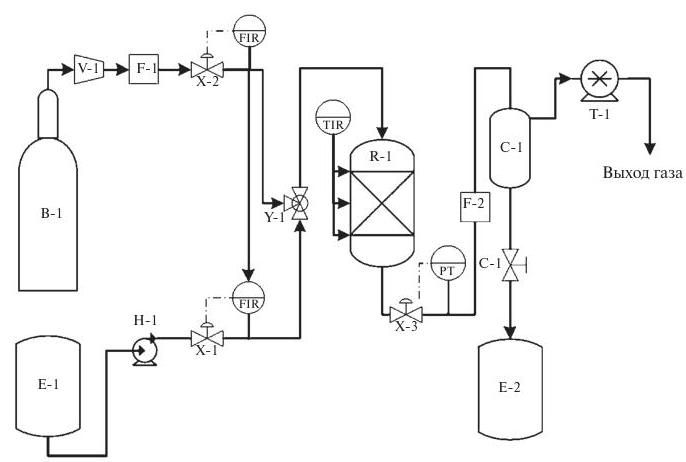

Рис. 1. Лабораторная установка гидроочистки церезина: В-1 - водородный буфер; Е-1 - сырьеван емкость; Н-1 - насос высокого давления; V-1 - редуктор понижающий газовый; F-1 и F-2 - микронные фильтры; Y-1 - смеситель; R-1 - реактор; C-1 - газожидкостной сепаратор; Е-2 - продуктовая емкость; Т-1 - газовый счетчик; X-1, X-2, X-3 - электрические задвижки, C-1 - ручная задвижка.

Реактор с загруженным катализатором монтировали на установку и проводили контрольную опрессовку системы азотом под давлением 10 МПа. Сбрасывали давление азота до 0,5 МПа и заполняли систему водородом до 1 МПа. Запускали систему обогрева установки. Цилиндр сырьевого насоса $\mathrm{H}-1$ заполняли нагретым жидким сырьем.

Первую стадию нагрева реактора проводили при подаче водорода с расходом 40 нл/ч до средней температуры реактора $120 \pm 5^{\circ} \mathrm{C}$; скорость подъема температуры составляла $20^{\circ} \mathrm{C} / ч$. Затем приступали к подаче осерняющей смеси при $1 \mathrm{ч}^{-1}$ ОСПС и повышали расход вородорода до 50 нл/ч. В качестве осерняющей смеси использовали дизельную фракцию гидроизомеризации с содержанием серы менее 10 мг/кг с введением в нее диметилдисульфида в количестве 1 мас. $\%$, эквивалентном содержанию серы. При подаче осерняющей смеси увеличивали скорость подъема температуры с 20 до $30^{\circ} \mathrm{C} /$ ч с двухчасовой выдержкой при $180^{\circ} \mathrm{C}$ и шестичасовой - при $320^{\circ} \mathrm{C}$. Наработку пробы при одних и тех же параметрах осуществляли в течение 48 ч, после чего переходили к следующему режиму без остановки реактора.

Процесс гидроочистки проводили с использованием промышленной каталитической системы PK-113 NiMo + KF757-1.3Q, используемой для получения пищевого парафина марки П-2. Технологические параметры исследованных режимов гидроочистки представлены в табл. 2.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

Существенное различие в показателях температуры каплепадения и пенетрации петролатумов, использованных в работе, свидетельствует о различном содержании соединений с длинны-

Таблица 2. Технологические параметры процесса гидроочистки

| Режим № | Технологические параметры |  |  |  |
| :--: | :--: | :--: | :--: | :--: |
|  | давление, МПа | объемная скорость подачи сырья, ч ${ }^{-1}$ | соотношение $\mathrm{H}_{2} /$ сырье, $\mathrm{н} / \mathrm{J}$ | температура в реакторе, ${ }^{\circ} \mathrm{C}$ |
| 1 | 3,0 | 0,2 | 2000 | 260 |
| 2 | 3,0 | 0,2 | 2000 | 280 |
| 3 | 3,0 | 0,2 | 2000 | 300 |
| 4 | 4,5 | 0,2 | 2000 | 260 |
| 5 | 6,0 | 0,2 | 2000 | 260 |

Таблица 3. Физико-химические свойства церезинов, полученных в результате обезмасливания

| Наименование показателя | Методы исследования | Церезин № 1 | Церезин № 2 | Норма для марки по ГОСТ 2488-79 |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  |  |  | 65 | 70 | 75 |
| Температура каплепадения, ${ }^{\circ} \mathrm{C}$ | ГОСТ 6793 | 78 | 71 | $65-70$ | $70-75$ | $75-80$ |
| Пенетрация иглой при $25^{\circ} \mathrm{C}, 0,1$ мм | $\begin{gathered} \text { ГОСТ } 25771 \text { по } 4.2 \\ \text { ГОСТ } 2488 \end{gathered}$ | 14 | 25 | не более 30 | не более 25 | $\begin{gathered} \text { не более } \\ 18 \end{gathered}$ |
| Содержание масла, мас.\% | ГОСТ 9090 | 0,69 | 1,51 | $-$ | $-$ | $-$ |
| Содержание серы, мас.\% | ГОСТ Р 51947 | 0,070 | 0,222 | $-$ | $-$ | $-$ |
| Кинематическая вязкость при $100^{\circ} \mathrm{C}, \mathrm{мм}^{2} / \mathrm{c}$ | ГОСТ 33 | 11,84 | 12,23 | $-$ | $-$ | $-$ |

ми алкильными цепями в образце № 1 (табл. 1). Стоит отметить, что содержание серы в образце петролатума № 2 в три раза выше в сравнении с образцом петролатума № 1 , при том, что серосодержащие соединения в основном концентрируются в остаточном масле. Данный выбор петролатумов позволяет оценить возможность получения церезина с улучшенными показателями из сырья различного качества, как наиболее (образец № 1), так и наименее (образец № 2) благоприятного. С промышленной же точки зрения интерес может представлять смесь данных петролатумов для расширения сырьевой базы производства.

Полученные в ходе обезмасливания церезины № 1 и 2 можно отнести к товарным маркам 75 и 70 соответственно по классификации ГОСТ 2488-79 (табл. 3). В ходе проведения многостадийного

процесса обезмасливания содержание серы снижается практически в три раза для обоих образцов церезина. При этом наибольшее изменение физико-химических свойств наблюдается у образца церезина № 2, что непосредственно связано с бо́льшим содержанием компонентов, растворимых в смеси избирательных растворителей. Наиболее отчетливо это заметно на показателе кинематической вязкости, изменение которого для образца церезина № 2 составило 2,63 мм²/с против 1,27 мм²/с для образца № 1 .

Все исследованные режимы гидроочистки (за исключением режима № 3) на основании образца № 1 позволяют получать церезин марки 75 с улучшенными показателями качества. Потенциально образцы церезинов, полученные в условиях режимов № 4 и 5 , могут соответствовать по содержанию ароматических углеводородов

Таблица 4. Свойства гидроочищенного церезина (образец № 1)

| Наименование показателя | Церезин <br> № 1 | Гидроочищенный церезин в различных условиях |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  | режим <br> № 1 | режим <br> № 2 | режим <br> № 3 | режим <br> № 4 | режим <br> № 5 |
| Температура каплепадения, ${ }^{\circ} \mathrm{C}$ | 78 | 79 | 77 | 73 | 78 | 77 |
| Пенетрация иглой при $25^{\circ} \mathrm{C}, 0,1$ мм | 14 | 14 | 15 | 17 | 15 | 15 |
| Содержание масла, мас.\% | 0,69 | 0,71 | 0,78 | 1,12 | 0,73 | 0,84 |
| Содержание серы, мг/кг | 704 | 132 | 128 | 120 | 98 | 95 |
| Кинематическая вязкость при $100^{\circ} \mathrm{C}$, мм²/с | 11,84 | 11,67 | 11,61 | 11,47 | 11,44 | 11,62 |
| Групповой углеводородный состав, мас.\%: |  |  |  |  |  |  |
| парафино-нафтены | 81,6 | 94,2 | 94,7 | 94,9 | 96,6 | 97,4 |
| моно-ароматика | 7,2 | 3,5 | 3,4 | 3,4 | 2,3 | 1,8 |
| би-ароматика | 5,8 | 1,5 | 1,2 | 1,1 | 0,8 | 0,7 |
| три-ароматика | 3,1 | 0,8 | 0,7 | 0,6 | 0,3 | 0,1 |
| нейтральные смолы | 1,5 | 0,0 | 0,0 | 0,0 | 0,0 | 0,0 |
| окисленные смолы | 0,8 | 0,0 | 0,0 | 0,0 | 0,0 | 0,0 |

международным требованиям, предъявляемым к церезинам, вовлекаемым в производство пищевого картона [1].

В ходе гидроочистки образца церезина № 1 наблюдается полное удаление смолистых веществ в условиях всех исследованных технологических режимов. Минимальное содержание серы в церезине достигнуто в условиях режима № 5 и составило 95 мг/кг, что соответствует международным стандартам качества [1] и находится на аналогичном уровне с рыночными образцами [11, 12]. Как видно из табл. 4 наибольшее влияние на удаление ароматических и серосодержащих соединений оказывает парциальное давление водорода. Увеличение температуры процесса в свою очередь способствует протеканию нежелательных деструктивных реакций, наблюдаемых уже при температуре $300^{\circ} \mathrm{C}$, о чем свидетельствует увеличение содержания остаточного масла и снижение таких показателей, как температура каплепадения и пенетрация. Стоит отметить, что проведение процесса гидроочистки в условиях режима № 5 при 6 МПа позволяет снизить содержание ароматических соединений более чем в два раза, в сравнении с условиями режима № 1, проводимого при 3 МПа.

В ходе гидроочистки образца церезина № 2 было установлено схожее проявление изменения зависимости физико-химических свойств церезина от технологических параметров процесса во всех условиях исследованных режимов. При

этом стоит отметить, что зависимости носят более резкий характер, что отчетливо наблюдается при изменении таких показателей как пенетрация, кинематическая вязкость, а также температура каплепадения.

Процесс гидроочистки позволяет полностью удалить смолистые вещества лишь при повышении давления (или температуры процесса), а именно в условиях режимов № 3, 4, 5.

Как видно из табл. 5 в условиях любого из режимов № $1-5$ для образца № 2 наблюдается снижение температуры каплепадения гидроочищенного церезина, что обусловлено показателями качества исходного петролатума, и, как следствие, подтверждает возможность производства гидроочищенного церезина, соответствующего марке 65 .

Среди исследованных технологических режимов наименее удовлетворяющим является режим № 3, ввиду значительного увеличения остаточного содержания масла как у гидроочищенных образцов церезина № 1, так и образцов № 2. Как следствие, температура процесса гидроочистки лимитируется остаточным содержанием масла в церезине и не должна превышать $280-290^{\circ} \mathrm{C}$. Увеличение парциального давления водорода в процессе гидроочистки оказывает наибольшее влияние на уменьшение содержания серы и ароматических углеводородов. Оптимальное значение данного технологического параметра зависит

Таблица 5. Свойства гидроочищенного церезина (образец № 2)

| Наименование показателя | Церезин <br> № 2 | Гидроочищенный церезин, в условиях |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  | режим <br> № 1 | режим <br> № 2 | режим <br> № 3 | режим <br> № 4 | режим <br> № 5 |
| Температура каплепадения, ${ }^{\circ} \mathrm{C}$ | 71 | 69 | 68 | 65 | 69 | 69 |
| Пенетрация иглой при $25^{\circ} \mathrm{C}, 0,1$ мм | 25 | 28 | 28 | 30 | 26 | 28 |
| Содержание масла, мас.\% | 1,51 | 1,72 | 1,87 | 2,19 | 1,68 | 1,75 |
| Содержание серы, мг/кг | 2220 | 211 | 198 | 195 | 145 | 134 |
| Кинематическая вязкость при $100^{\circ} \mathrm{C}$, мм² $/ \mathrm{c}$ | 12,23 | 12,10 | 11,88 | 11,51 | 11,98 | 11,82 |
| Групповой углеводородный состав, мас.\%: |  |  |  |  |  |  |
| парафино-нафтены | 74,2 | 85,6 | 87,2 | 87,7 | 90,1 | 92,5 |
| моно-ароматика | 10,3 | 8,3 | 7,3 | 7,2 | 6,5 | 5,5 |
| би-ароматика | 7,8 | 4,5 | 4,3 | 4,3 | 2,8 | 1,5 |
| три-ароматика | 3,5 | 1,3 | 1,1 | 0,8 | 0,6 | 0,5 |
| нейтральные смолы | 2,4 | 0,2 | 0,1 | 0,0 | 0,0 | 0,0 |
| окисленные смолы | 1,8 | 0,1 | 0,0 | 0,0 | 0,0 | 0,0 |

Таблица 6. Сравнение полученного гидроочищенного церезина с зарубежными аналогами

| Наименование показателя | Гидроочищенный <br> церезин № 1 <br> (режим № 4) | Гидроочищенный <br> церезин № 2 <br> (режим № 4) | Очищенный <br> церезин Sasolwax <br> 3279 | Очищенный <br> церезин Polwax |
| :-- | :--: | :--: | :--: | :--: |
| Содержание масла, мас.\% | 0,60 | 1,68 | $<1,0$ | $<1,5$ |
| Температура каплепадения, С | 78 | 69 | $76-82$ | $70-80$ |
| Пенетрация иглой при $25^{\circ} \mathrm{C}, 0,1$ мм | 14 | 26 | $14-18$ | $15-25$ |
| Содержание <br> серы, мг/кг | 98 | 145 | менее 100 | менее 100 |
| Кинематическая вязкость при <br> $100^{\circ} \mathrm{C}, \mathrm{мм}^{2} / \mathrm{c}$ | 11,67 | 11,98 | $13-19$ | $12-20$ |

от нормируемых требований конечной продукции. Так, например, для улучшения цвета церезина процесс гидроочистки может проводиться при давлении не более 3 МПа, в то время как получение пищевых грейдов церезинов должно проводиться при более высоком давлении.

Гидроочищенные образцы церезина № 1 не уступают по показателям качества зарубежным аналогам [11, 12] и могут стать альтернативой, потенциально реализуемой как на внутреннем, так и на внешнем рынках, чего нельзя сказать о гидроочищенных образцах церезина № 2 , которые с наибольшей степенью вероятности не соответствуют международным требованиям к церезинам пищевого качества (табл. 6). Образцы гидроочищенного церезина № 2 могут быть использованы для создания линейки товарной продукции различного качества, отвечающей запросам отечественных потребителей.

На основании полученных результатов можно сделать вывод о возможности использования смесевого сырья; при этом предельно допустимое количество неблагоприятного сырья (церезина № 2) не должно превышать 25 мас. $\%$.

Для гидроочищенного образца церезина № 1, полученного в условиях режима № 5, а также сырьевого церезина была определена фотохимическая стабильность в модуляторе солнечного света SOL-2, имитирующего воздействие прямого солнечного света при хранении парафино-восковой продукции. Фотохимическую стабильность оценивали на основании цвета образцов по шкале цветности нефтепродуктов (ЦНТ), определенного по ГОСТ 20284-74 с использованием цветных светофильтров, до и после пребывания в модуляторе солнечного света SOL-2. В табл. 7 представлена сравнительная характеристика фо-

тохимической стабильности сырьевого и гидроочищенного церезина, а также товарных парафинов марок П-2, Т-1 и НС.

Как видно из табл. 7, процесс гидроочистки способствует существенному улучшению цвета церезина - от коричневого ( 4,0 ед. ЦНТ) до белого ( 0,5 ед. ЦНТ), что с одной стороны, обусловлено произошедшими изменениями его состава и свойств, а с другой непосредственно влияет на дальнейшие области применения. Отметим, что меньшее изменение цвета по результатам фотохимической стабильности наблюдается у сырьевого церезина № 1 и разница составляет всего 0,5 ед. ЦНТ. Основная причина этого - изначально высокое светопоглощение образца церезина - цвет церезина по шкале ЦНТ превышает цвет окисленных образцов парафинов и составляет 4,0 ед. ЦНТ. Фотохимическая стабильность гидроочищенного церезина соответствует товарному парафину марки Т-1; при этом она значительно уступает пищевому парафину марки П-2, что обусловлено углеводородным составом образца церезина, в котором вместо нормальных алкановых углеводородов преобладают изомери-

Таблица 7. Сравнительная характеристика фотохимической стабильности сырьевых и гидроочищенных образцов церезина и парафинов марок НС, Т-1 и П-2

| Наименование <br> показателя | Церезин <br> № 1 | Гидро- <br> очищенный <br> церезин № 1 <br> (режим № 5) | Парафин <br> марки |  |  |
| :-- | :--: | :--: | :--: | :--: | :--: |
|  |  |  | НС | Т-1 | П-2* |
| Цвет в ед. <br> ЦНТ, до | 4,0 | 0,5 | 0,5 | 0,5 | 30 |
| Цвет в ед. <br> ЦНТ, после | 4,5 | 2,0 | 3,0 | 2,0 | 10 |

[^0]
[^0]:    * Примечание: для парафина марки П-2 цвет определялся по Сейболту, где -16 (самый темный цвет), +30 (самый светлый)

зованные и нафтеновые углеводороды с длинными алкильными цепями, обладающие более высокой реакционной способностью к окислению. При этом полученные результаты носят демонстрационный характер, ввиду отсутствия жестких требований к фотохимической стабильности гидроочищенного церезина и позволяют сделать вывод о необходимости соблюдения аналогичных правил перевозки, что и у нефтяных парафинов марки Т-1.

## ЗАКЛЮЧЕНИЕ

Таким образом, учитывая товарный ассортимент производителей парафино-восковой продукции, существующий спрос, а также уход с внутреннего рынка иностранных компаний, реализация промышленного производства церезина с улучшенными показателями качества является актуальным и перспективным направлением. Проведенные исследования с использованием петролатумов различного состава позволяют оценить потенциал их квалифицированной переработки и подтверждают возможность получения церезинов с улучшенными показателями качества, не уступающими зарубежным аналогам.

## КОНФЛИКТ ИНТЕРЕСОВ

Авторы заявляют об отсутствии конфликта интересов, требующего раскрытия в данной статье.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Махин Дмитрий Юрьевич, к.т.н., ORCID: https://orcid.org/0009-0006-3443-8176

Лаврентьев Владимир Александрович, ORCID: https://orcid.org/0000-0002-4394-6950

Пронченков Иван Александрович, ORCID: https://orcid.org/0009-0008-2080-263X

Капустин Владимир Михайлович, д.т.н., професcop, ORCID: https://orcid.org/0000-0002-8102-8624

Ахмед Ала Абдулкарим Сале, ORCID: https://orcid.org/0009-0008-1564-2993

## СПИСОК ЛИТЕРАТУРЫ

1. Krendlinger E.J., Wolfmeier U.H. Natural and Synthetic Waxes: Origin, Production, Technology,
and Applications. John Wiley \& Sons, 2022. 704 p. ISBN3527342222.
https://doi.org/10.1002/9783527807758
2. Soliman F.S. Introductory chapter: petroleum paraffins. In: Paraffin - an overview, Soliman F.S., Ed. 2020. V. 3. P. 1-9.
https://doi.org/10.5772/intechopen. 87090
3. El-Sayed Ibrahim E.M., Sadik W.A., El Batouti M., Nashed A.W., Abass M.T., El Rafey E. Blending petroleum waxes with suitable polymeric additives as a simple and promising way to improve the quality of petroleum waxes for numerous industrial applications // J. Pet. Sci. Technol. 2021. V. 11, № 2. P. $30-42$.
https://doi.org/10.22078/jpst.2021.4394.1711
4. Kumar S., Agrawal K.M. The deep deoiling of microcrystalline waxes by solvent percolation // Pet. Sci. Technol. 2014. V. 32, № 3. P. 261-266. https://doi.org/10.1080/10916466.2011.574175
5. Herz G., Reichelt E., Jahn M. Design and evaluation of a Fischer-Tropsch process for the production of waxes from biogas // Energy. 2017. V. 132. P. 370-381. https://doi.org/10.1016/j.energy.2017.05.102
6. Yang J.I., Yang J.H., Kim H.J., Jung H., Chun D.H., Lee H.T. Highly effective cobalt catalyst for wax production in Fischer-Tropsch synthesis // Fuel. 2010. V. 89, № 1. P. 237-243. https://doi.org/10.1016/j.fuel.2009.07.008
7. Abbas A.S., Barnoo S.K.A. Hydro-de-aromatization of paraffin wax // J. Eng. 2005. V. 11, № 4. P. 715-723. https://doi.org/10.31026/j.eng.2005.04.09
8. Riazi M.R. Characterization and properties of petroleum fractions. West Conshohocken: ASTM International, 2005. 421 p .
9. Sanchez J., Tallafigo M.F., Gilarranz M.A., Rodríguez F. Catalytic hydrotreatment of crude waxes from different sources over a $\mathrm{Ni}-\mathrm{W} / \mathrm{Al}_{2} \mathrm{O}_{3} / /$ Ind. Eng. Chem. Res. 2008. V. 47, № 18. P. 6854-6861. https://doi.org/10.1021/ie800014u
10. Sánchez J., Tallafigo M.F., Gilarranz M.A., Rodríguez F. Refining heavy neutral oil paraffin by catalytic hydrotreatment over $\mathrm{Ni}-\mathrm{W} / \mathrm{Al}_{2} \mathrm{O}_{3}$ catalysts // Energy Fuels. 2006. V. 20, № 1. P. 245-249. https://doi.org/10.1021/ef050143c
11. Официальный сайт компании Sasolwax. URL: https://sasoldcproducts.blob.core.windows.net/ documents/Product\%20Brochures/ZA_Wax_ Industrial\%20Coatings.pdf (дата обращения 12.08.2024)
12. Официальный сайт компании Polwax. URL: https://www.polwax.com/ (дата обращения 12.08.2024)

# НИКЕЛЬФОСФИДНЫЙ КАТАЛИЗАТОР НА ОСНОВЕ МЕЗОПОРИСТОГО НАНОСФЕРИЧЕСКОГО ПОЛИМЕРА В ПРОЦЕССЕ ГИДРИРОВАНИЯ ГВАЯКОЛА И ФУРФУРОЛА 

© 2025 г. И. И. Шакиров ${ }^{1, *}$, М. П. Бороноев ${ }^{1}$, Е. А. Ролдугина ${ }^{1}$, Ю. С. Кардашева ${ }^{1}$, С. В. Кардашев ${ }^{1}$<br>${ }^{1}$ Московский государственный университет имени М. В. Ломоносова, химический факультет, Москва, 119991 Россия<br>E-mail: sammy-power96@yandex.ru<br>Поступила в редакцию 17 апреля 2025 г.<br>После доработки 24 апреля 2025 г.<br>Принята к публикации 28 апреля 2025 г.


#### Abstract

Получен нанесенный никельфосфидный катализатор in situ в условиях синтеза мезопористого peзорцинформальдегидного полимера. Катализатор испытан в гидрировании гваякола и фурфурола в толуоле при давлении водорода 4 МПа. Исследованы характеристики гидрирования фурфурола в зависимости от давления водорода, массы загруженного катализатора, температуры и продолжительности процесса. Оценена активность полученного никельфосфидного катализатора в гидрировании смеси гваякола и фурфурола в толуоле.


Ключевые слова: мезопористый полимер, наносферы, фосфиды никеля, гваякол, фурфурол, гидрирование, гидродеоксигенация
DOI: 10.31857/S0028242125020093, EDN: KMLBKH

В контексте глобального перехода к устойчивым источникам энергии и снижения зависимости от ископаемого топлива, переработка возобновляемого сырья растительного происхождения, в частности отходов сельского и лесного хозяйства на основе лигниноцеллюлозной биомассы, представляет собой перспективное направление для производства биотоплива и ценных химических продуктов. Один из возможных способов переработки лигниноцеллюлозного сырья - процесс быстрого пиролиза, в результате которого образуется ценный продукт бионефть - сложная смесь органических соединений, содержащая кислородсодержащие производные фенолов, фуранов, альдегидов, крезолов, карбоновых кислот, кетонов, спиртов и т.д. Высокое содержание кислорода в бионефти ограничивает ее практическое применение из-за низкой теплотворной способности, коррозионной активности и нестабильности в условиях хранения и транспортировки [1]. В связи с этим, ключевым этапом переработки такого сырья яв-

ляется гидрооблагораживание, в частности процесс гидродеоксигенации. В литературе описано множество катализаторов гидродеоксигенации на основе переходных металлов: $\mathrm{Pd}, \mathrm{Pt}, \mathrm{Ru}, \mathrm{Rh}$, $\mathrm{Ni}, \mathrm{Co}, \mathrm{Fe}, \mathrm{Mo}, \mathrm{Cu}$, биметаллические $\mathrm{Pt}-\mathrm{Pd}, \mathrm{Pt}-$ Rh, Pd-Rh, Ni-Co, Ni-Cu, Co-Zn и др. [2-5]. Катализаторы на основе благородных металлов проявляют высокую активность в гидрооблагораживании компонентов бионефти. Такие катализаторы не требуют высоких температур проведения процесса и большого содержания металла на подложке, а также проявляют высокую стабильность. Однако для катализаторов на основе благородных металлов, как правило, необходимы кислотные носители или кислые добавки в систему для эффективной деоксигенации компонентов бионефти [6, 7]. В связи с этим особый интерес представляют бифункциональные катализаторы, способные одновременно обеспечивать как гидрирующую активность, так и кислотные свойства, необходимые для эффективной деоксигенации компонентов бионефти. К таким

материалам относят фосфиды переходных металлов, в частности фосфиды никеля, обладающие активностью в гидрировании компонентов бионефти на льюисовских ( $\mathrm{Ni}^{\mathrm{n}+}$ ) и бренстедовских (РО-Н) кислотных центрах (КЦ), участвующих в гидрогенолизе С-О-связей [8]. С точки зрения выбора носителя катализатора, пористые полимерные и углеродные материалы представляют собой современные альтернативы традиционным неорганическим носителям, обладая рядом существенных преимуществ. Такие материалы демонстрируют высокую химическую стабильность в условиях кислотно-агрессивных сред, свойственных для переработки бионефти, характеризуются лучшей сорбцией компонентов бионефти за счет гидрофобной природы, легкостью модификации для оптимизации каталитических свойств $[9,10]$.

Цель работы - синтез катализатора на основе наночастиц фосфида никеля, иммобилизованных в порах мезопористого резорцинформальдегидного полимера, и его испытание в гидрировании модельных соединений бионефти - гваякола и фурфурола.

## ЭКСПЕРИМЕНТАЛЬНАЯ ЧАСТЬ

В работе использованы: триблок-сополимер плюроник F127 ( $\mathrm{M}_{\mathrm{n}}=12600, \mathrm{EO}_{106}-\mathrm{PO}_{70}-\mathrm{EO}_{106}$, кат. номер 9003-11-6, Sigma-Aldrich); резорцин (ч., ООО «Химмед»); формальдегид ( $37 \%$-ный водный раствор, кат. номер 50-00-0, Sigma-Aldrich); НСl (х.ч., ООО «Иреа 2000»); фурфурол (99\%, кат. номер 98-01-1, Sigma-Aldrich); этанол (ч.д.а., ООО «Иреа 2000»); $\mathrm{NiCl}_{2} \cdot 6 \mathrm{H}_{2} \mathrm{O}$ (ч., ООО «Реахим»); $\mathrm{H}_{3} \mathrm{PO}_{3}(50 \%$-ный водный раствор, кат. номер 6303-21-5, Sigma-Aldrich), гваякол ( $98 \%$, кат. номер 90-05-1, Sigma-Aldrich). Фурфурол перед использованием в каталитических экспериментах перегоняли при 10 мм рт. ст. с отбором фракции, кипящей при $50-52^{\circ} \mathrm{C}$.

Анализ мезопористого наносферического полимера и нанесенного никельфосфидного катализатора методом просвечивающей электронной микроскопии был выполнен при помощи микроскопа JEM-2100 (Jeol, США) (увеличение от 50 до 1500000 , разрешение изображения 0,19 нм при 200 кВ) с приставкой энергодисперсионного микроанализатора JED-2300F (Jeol). Обработку микрофотографий и расчет среднего размера частиц производили с помощью программы Image Pro Plus.

Изотермы адсорбиии/десорбиии азота были получены при $T=77 \mathrm{~K}$ с помощью анализатора поверхности Gemini VII 2390 (Micromeritics). Перед анализом образцы были дегазированы в вакууме с помощью дегазатора VacPrep ${ }^{\text {TM }} 061$ (Micromeritics, США) при температуре $120^{\circ} \mathrm{C}$ в течение 12 ч. Для расчета площади поверхности был использован метод Брунауэра-Эммета-Теллера с использованием адсорбционных данных в диапазоне относительных давлений ( $P / P_{0}$ ) 0,04-0,2. Объем пор и распределение пор по размерам были определены исходя из данных, относящихся к адсорбционной ветви изотерм, с использованием модели Баррета-Джойнера-Халенды.

Фазовый состав катализатора определяли методом рентгенофазового анализа (РФА) на приборе Rigaku Rotaflex D/max-RC (Rigaku, Япония). Дифрактограмму регистрировали в угловом диапазоне $2 \theta=10^{\circ}-100^{\circ}$ с использованием $K_{\alpha}$-излучения ( $\lambda=1,54 \AA$ ) медного анода. Размер кристаллитов $d$ рассчитывали по уравнению Дебая-Шеррера:

$$
d=\frac{K \lambda}{\beta \cos \theta}
$$

где $\lambda(1,54 \AA)$ - длина волны излучения, $K(0 / 9)-$ постоянная Шеррера, $\theta$ - угол дифракции, $\beta$ ширина сигнала на полувысоте рефлекса.

Общее количество кислотных центров носителя и катализатора определяли методом термопрограммируемой десорбции аммиака (ТПД $\mathrm{NH}_{3}$ ) на прецизионном хемосорбционном анализаторе с детектором по теплопроводности Autosorb IQ (Quantachrome, США). Перед анализом образцы нагревали в токе гелия (марка A, ООО «ПГС-СЕРВИС ЛОГИСТИКА») до $450^{\circ} \mathrm{C}$, выдерживали при этой температуре 60 мин. ТПД $\mathrm{NH}_{3}$ (марка A, АО «Тольяттиазот», Россия) проводили в температурной области $50-400^{\circ} \mathrm{C}$ со скоростью нагрева измерительной ячейки $20^{\circ} \mathrm{C} /$ мин. Обработку спектров производили с использованием программного пакета TPRWin software for ASiQ.

Количественный анализ содержания металла в катализаторе осуществляли методом атомноэмиссионной спектроскопии с индуктивносвязанной плазмой (АЭС-ИСП) на приборе IRIS Interpid II XDL (Thermo Electron Corp., США) с радиальным и аксиальным наблюдением при длине волны 221,6 нм.

Исследования методом рентгенофотоэлектронной спектроскопии (РФЭС) проводили при помощи рентгеновского фотоэлектронного спектрометра PHI 5000 Versaprobe-II (Physical Electronics, США). Для возбуждения фотоэлектронов использовано рентгеновское излучение алюминиевого анода ( $\mathrm{Al} K_{\alpha}=1486,6$ эВ). Шкалу энергии связи корректировали по линии C1s ароматического углерода ( $E_{\text {св }}=284,7$ эВ). Обзорные спектры регистрировали в диапазоне $0-1100$ эВ при энергии пропускания анализатора ( $E_{\text {pass }}$ ) 117,4 эВ с шагом 1 эВ/шаг, спектры высокого разрешения - при $E_{\text {pass }}=23,5$ эВ с шагом $0,2 э \mathrm{~B} /$ шаг.

Идентификацию продуктов проводили на газо-хромато-масс-спектрометре Finnigan MAT 95 XL (Finnigan, США), оборудованном хроматографом с капиллярной колонкой Varian VF-5MS ( $30 \mathrm{~m} \times 0,25$ мм $\times 0,25$ мкм), газ-носитель - гелий $\left(1,5 \mathrm{~cm}^{3}\right.$ мин $^{-1}$ ). Для анализа субстратов и продуктов реакции гидрирования был использован газовый хроматограф Кристаллюкс-4000M (ООО «Мета-Хром») с пламенно-ионизационным детектором, капиллярной колонкой СР-Wax 52 CB с неподвижной жидкой фазой полиэтиленгликоль (размеры: $25 \mathrm{~m} \times 0,25$ мм). Условия анализа: температура колонки $220^{\circ} \mathrm{C}$, температура детектора $300^{\circ} \mathrm{C}$, температура инжектора $300^{\circ} \mathrm{C}$, газ-носитель гелий. Хроматограммы анализировали с использованием программы NetChrom. Конверсию определяли по изменению площадей хроматографических пиков, относящихся к субстрату и продуктам. Селективность определяли как отношение количества целевого продукта к количеству прореагировавшего субстрата.

Наносферический мезопористый полимер NSMR (nanospherical mesoporous resin) получали по методике [11]; отжиг темплата проводили при температуре $360^{\circ} \mathrm{C}$ для сохранения структуры полимера. Синтез катализатора NSMR- $\mathrm{Ni}_{2} \mathrm{P}$ проводили in situ в процессе синтеза носителя NSMR: на стадии растворения резорцина и плюроника F127 в реакционную смесь добавляли 710 мг $\mathrm{NiCl}_{2} \cdot 6 \mathrm{H}_{2} \mathrm{O}$ и 690 мкл $50 \%$-водного раствора $\mathrm{H}_{3} \mathrm{PO}_{2}$, далее синтез материала проводили по указанной выше методике.

Каталитические эксперименты по гидрированию гваякола/фурфурола осуществляли в стальном термостатируемом автоклаве объемом 45 мл. В автоклав помещали рассчитанное количество субстрата, растертого в порошок катализатора и растворителя, и якорь магнитной мешал-

ки. Автоклав герметично закрывали, заполняли водородом (марка А, АО «МГПЗ») до давления 4,0 МПа и выдерживали при заданной температуре и перемешивании со скоростью 1000 об/мин в течение 4 ч. По окончании реакции автоклав охлаждали и разгерметизировали, катализатор отделяли центрифугированием. Пробу анализировали методом газожидкостной хроматографии.

## РЕЗУЛЬТАТЫ И ИХ ОБСУЖДЕНИЕ

Мезопористый резорцинформальдегидный полимер NSMR был охарактеризован методами просвечивающей электронной микроскопии и низкотемпературной адсорбции-десорбции азота. На микрофотографии полимера NSMR (рис. 1a) присутствуют мезопористые сферические частицы с диаметром $120-360$ нм (рис. 1б); средний диаметр частиц составляет $200 \pm 10$ нм.

Изотерма адсорбции полимера NSMR (рис. 2) характеризуется II и IV типом, свойственным макро- и мезопористым материалам соответственно. Удельная площадь поверхности, объем и размер пор полимерного материала NSMR составляли $187 \mathrm{~m}^{2} /$ г, $0,12 \mathrm{~cm}^{3} /$ г, 3,7 нм соответственно.

На основе полученного материала NSMR был синтезирован никельфосфидный катализатор NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ методом разложения гипофосфита никеля in situ в процессе отжига темплата в пропитанном гипофосфитом никеля полимеpe NSMR. Содержание никеля в катализаторе NSMR $-\mathrm{Ni}_{2} \mathrm{P}$, определенное методом АЭС-ИСП, составило 8,6 мас. \%. На дифрактограмме (рис. 3) катализатора NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ присутствуют характерные рефлексы при углах Брэгга $40,6^{\circ}, 44,5^{\circ}$, $47,2^{\circ}$ и $54,0^{\circ}$, соответствующие плоскостям (111), (201), (210) и (300) гексагональной решетки фосфида никеля состава $\mathrm{Ni}_{2} \mathrm{P}$. Размер кристаллитов фосфидов никеля $\mathrm{Ni}_{2} \mathrm{P}$, рассчитанный по формуле Шеррера, составил 30 нм.

На микрофотографиях катализатора NSMR$\mathrm{Ni}_{2} \mathrm{P}$ (рис. 4) наблюдаются наночастицы $\mathrm{Ni}_{2} \mathrm{P}$ двух типов: частицы со средним размером 3,8 нм, закрепленные внутри пор наносферического носителя NSMR, и более крупные агрегаты размером $20-50$ нм, локализованные на внешней поверхности полимерного материала.

Для оценки кислотных свойств катализатора образцы NSMR и NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ были исследо-

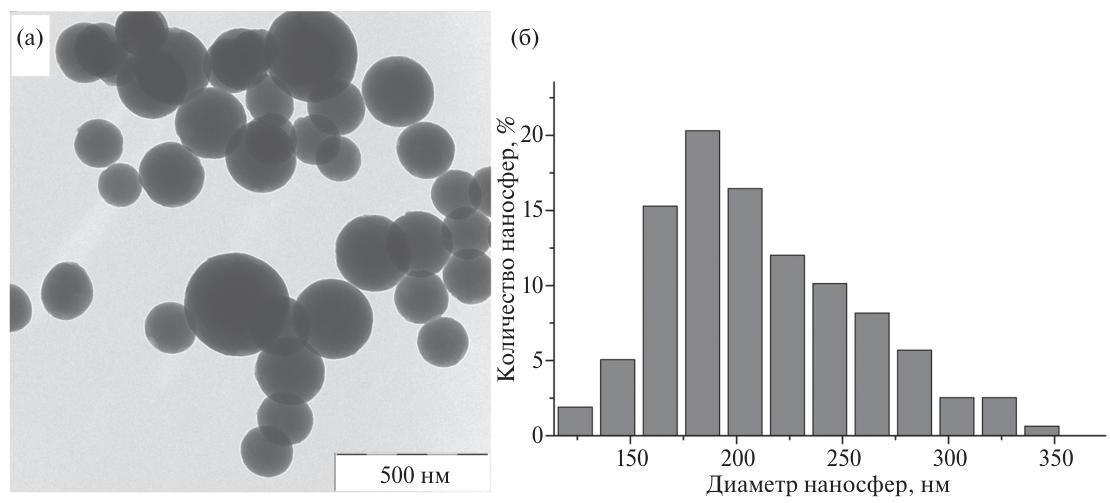

Рис. 1. Микрофотография (а) и распределение сферических частиц по размерам (б) мезопористого резорцинформальдегидного полимера.
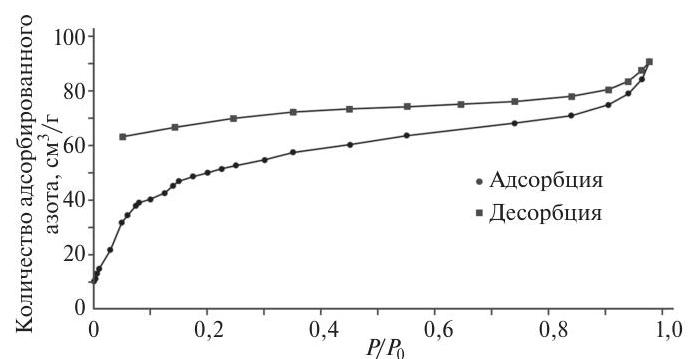

Рис. 2. Изотерма адсорбции-десорбции азота мезопористого резорцинформальдегидного полимера.
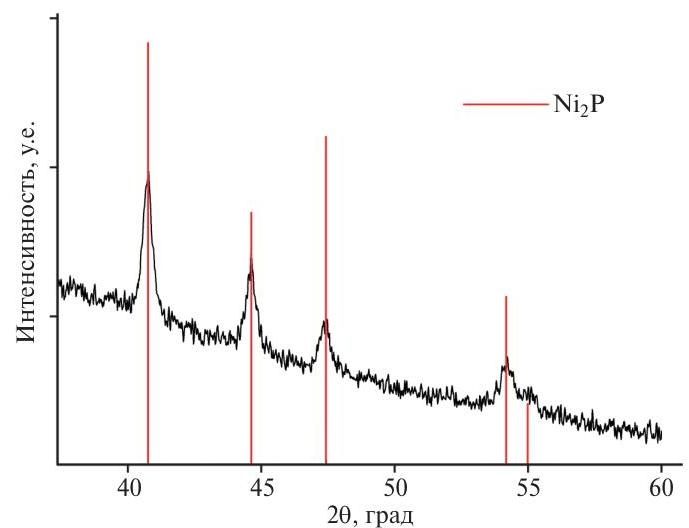

Рис. 3. Дифрактограмма никельфосфидного катализатора, нанесенного на мезопористый полимер.

ваны методом ТПД- $\mathrm{NH}_{3}$. На кривой ТПД- $\mathrm{NH}_{3}$ носителя NSMR сигналы десорбции $\mathrm{NH}_{3}$ не детектируются, что свидетельствует о том, что мезопористый наносферический полимер NSMR не содержит значительного количества КЦ. Количество же КЦ в случае катализатора NSMR$\mathrm{Ni}_{2} \mathrm{P}$ составило 51 мкмоль/г, что свидетельствует о значительном вкладе активной фазы $\mathrm{Ni}_{2} \mathrm{P}$ в формирование кислотных свойств материала. Профиль ТПД- $\mathrm{NH}_{3}$ катализатора NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ характеризуется максимумом пика десорбции $\mathrm{NH}_{3}$ области $150-160^{\circ} \mathrm{C}$, что указывает на присутствие слабых КЦ (рис. 5). Слабые КЦ в фосфидах преимущественно относят к бренстедовским КЦ Р-ОН [12-14].

Для определения валентных состояний компонентов поверхности катализатора образец NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ был исследован методом РФЭС. Согласно данным РФЭС, общее содержание элементов в катализаторе распределено следующим образом: 51,8 ат. $\%$ С, 28,7 ат. $\%$ О, 11,0 ат. $\% \mathrm{Ni}$, 8,5 ат.\% Р. На спектре области $\mathrm{Ni} 2 p_{3 / 2}$ (рис. 6a) присутствуют сигналы при энергии связи: 852,8 эВ, характерный для частично восстановленного состояния никеля $\mathrm{Ni}^{6+}$ в структуре фосфида [15, 16], 856,3 эВ, относящийся к окисленным формам никеля $\mathrm{Ni}^{2+}$. На спектре области $\mathrm{P} 2 p 3 / 2$ (рис. 6б) присутствуют сигналы при энергии связи 133,2 и 128,2 эВ, относящиеся к состояниям фосфора $\mathrm{P}^{5+}$ и $\mathrm{P}^{6-}$ соответственно [17]. Несмотря на высокое содержание окисленных форм никеля и фосфора на поверхности катализатора, наличие сигналов $\mathrm{Ni}^{6+}$ при 852,8 эВ

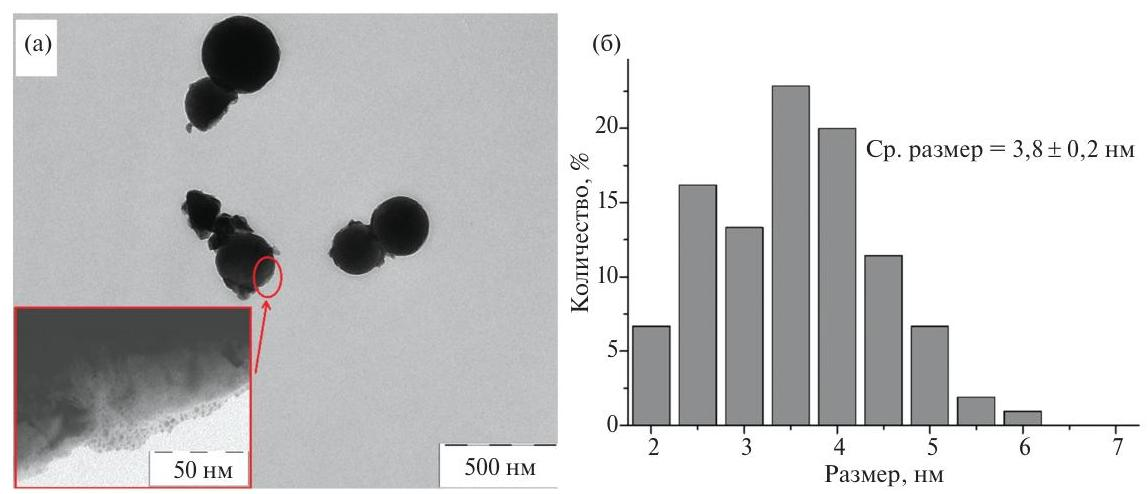

Рис. 4. Микрофотография никельфосфидного катализатора, нанесенного на мезопористый полимер (a), и распределение наночастиц $\mathrm{Ni}_{2} \mathrm{P}$ по размерам (б).

и $\mathrm{P}^{6-}$ при 128,9 эВ подтверждает формирование фосфидной фазы $\mathrm{Ni}_{2} \mathrm{P}$ в NSMR $-\mathrm{Ni}_{2} \mathrm{P}$. Преобладание окисленных форм фосфора и никеля на поверхности NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ может быть связано с частичным окислением фосфида никеля кислородом воздуха во время синтеза и хранения катализатора [18].

Поверхностное атомное соотношение $\mathrm{Ni} / \mathrm{P}=1,3$ для исследуемого катализатора превышает теоретическое значение $\mathrm{Ni} / \mathrm{P}=0,5$, характерное для стехиометрического фосфида никеля $\mathrm{Ni}_{2} \mathrm{P}$. Данное наблюдение может быть связано с частичной потерей фосфора в виде газообразного $\mathrm{PH}_{3}$ на стадии термического разложения предшественника - гипофосфита никеля в процессе синтеза катализатора [19].

Никельфосфидный катализатор NSMR $-\mathrm{Ni}_{2} \mathrm{P}$ был применен в гидрировании модельных ком-
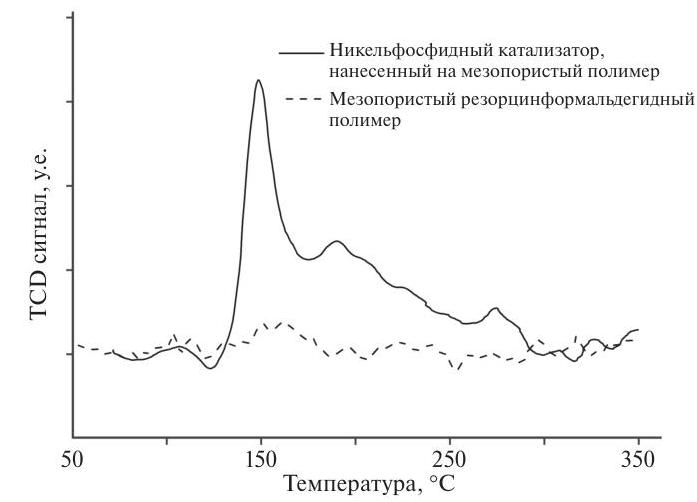

Рис. 5. Спектры термопрограммируемой десорбции аммиака мезопористого полимера и никельфосфидного катализатора.
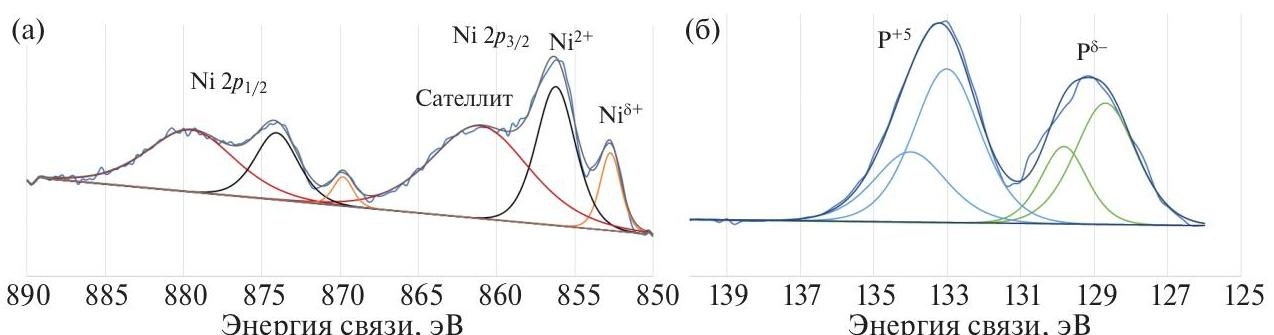

Рис. 6. Деконволюции $\mathrm{Ni} 2 p$ (а) и $\mathrm{P} 2 p$ (б) рентгеновских фотоэлектронных спектров никельфосфидного катализатора.

понентов бионефти - фурфурола и гваякола. В его присутствии было исследовано влияние таких параметров, как температура реакции, давление водорода, масса катализатора и продолжительности процесса гидрирования.

Для фурфурола. Показано, что с увеличением температуры от 170 до $250^{\circ} \mathrm{C}$ конверсия фурфурола существенно возрастала; при этом наблюдался значительный рост селективности образования 2-метилфурана, что указывает на ускорение процессов деоксигенации в реакционной смеси (рис. 7a). При повышении температуры процесса селективности продуктов гидрирования фуранового кольца оставались относительно низкими. Параллельно с этим доля продуктов конденсации возрастала при увеличении температуры процесса от 170 до $250^{\circ} \mathrm{C}$, что указывает на усиление реакций полимеризации фурфурола и его продуктов гидрирования.

Показано, что конверсия и распределение продуктов гидрирования фурфурола существенно зависят от давления водорода в системе (рис. 7б). Так, при давлении водорода до 3 МПа конверсия не превышала $10 \%$; с ростом давления водорода в реакционной смеси (4-6 МПа) происходило заметное усиление процессов гидрирования фуранового кольца, что проявлялось в увеличении выходов таких продуктов, как 2-метилтетрагидрофуран и тетрагидрофурфуриловый спирт.

При низких загрузках катализатора конверсия фурфурола составляла $7,7 \%$. С увеличением массы катализатора конверсия фурфурола возрастала до $87,8 \%$, селективность образования 2-метилфурана возрастала при снижении количества образующегося фурфурилового спирта, в то время как селективности образования 2-метилтетрагидрофурана и тетрагидрофурфурилового спирта изменялись незначительно (рис. 7в). То есть увеличение загрузки катализатора приводило к более активному протеканию процессов гидродеоксигенации по сравнению с гидрированием фуранового кольца. То, что доля продуктов конденсации возрастала с увеличением массы катализатора, может быть обусловлено повышением кислотности системы за счет добавления большего количества катализатора.

В ходе исследования процесса гидрирования фурфурола от продолжительности реакции были выявлены временные закономерности измене-

Таблица 1. Параметры аппроксимации рентгеновских фотоэлектронных спектров

| Параметры | $\mathrm{Ni}_{2} p_{3 / 2}$ |  | $\mathrm{P}_{2} p_{3 / 2}$ |  |
| :-- | :--: | :--: | :--: | :--: |
|  | $\mathrm{Ni}^{2+}$ | $\mathrm{Ni}^{6+}$ | $\mathrm{P}^{5+}$ | $\mathrm{P}^{6-}$ |
| $E_{\text {св }}$, эВ | 856,3 | 852,8 | 133,2 | 128,9 |
| Содержание, \% | 77 | 23 | 58 | 42 |

ния селективностей продуктов. На начальных стадиях (2 ч) в продуктах реакции присутствовало высокое содержание фурфурилового спирта, что указывает на преимущественное протекание реакции гидрирования альдегидной группы с последующей гидродеоксигенации до 2-метилфурана (рис. 7г). После 4 ч протекания реакции происходило снижение селективности образования фурфурилового спирта при росте селективности по 2-метилфурану, что указывает на преобладание процессов гидродеоксигенации. Селективность образования 2-метилтетрагидрофурана и тетрагидрофурфурилового спирта оставалась практически неизменной, что указывает на отсутствие существенного протекания реакций гидрирования фуранового кольца. При дальнейшем проведении процесса селективность образования 2-метилфурана уменьшалась при увеличении селективности образования продуктов гидрирования фуранового кольца. Также в реакционной смеси растет доля продуктов конденсации, постепенно образующихся на кислотных центрах.

Для гваякола. Согласно литературным данным, для достижения количественного превращения фенольных соединений в присутствии фосфидных катализаторов требуются повышенные температуры процесса гидрирования [2022]. Однако в исследуемом катализаторе фосфид никеля $\mathrm{Ni}_{2} \mathrm{P}$ иммобилизован в полимерной матрице, что накладывает дополнительные ограничения на условия проведения реакции. В частности, жесткие условия гидрирования гваякола, а именно повышенная температура и длительность термического воздействия, могут оказывать значительное влияние на активность катализатора на основе полимера из-за возможной деградации структуры полимера. Учитывая это, представляло особый интерес исследовать влияние температуры и продолжительности процесса на активность полученного материала.

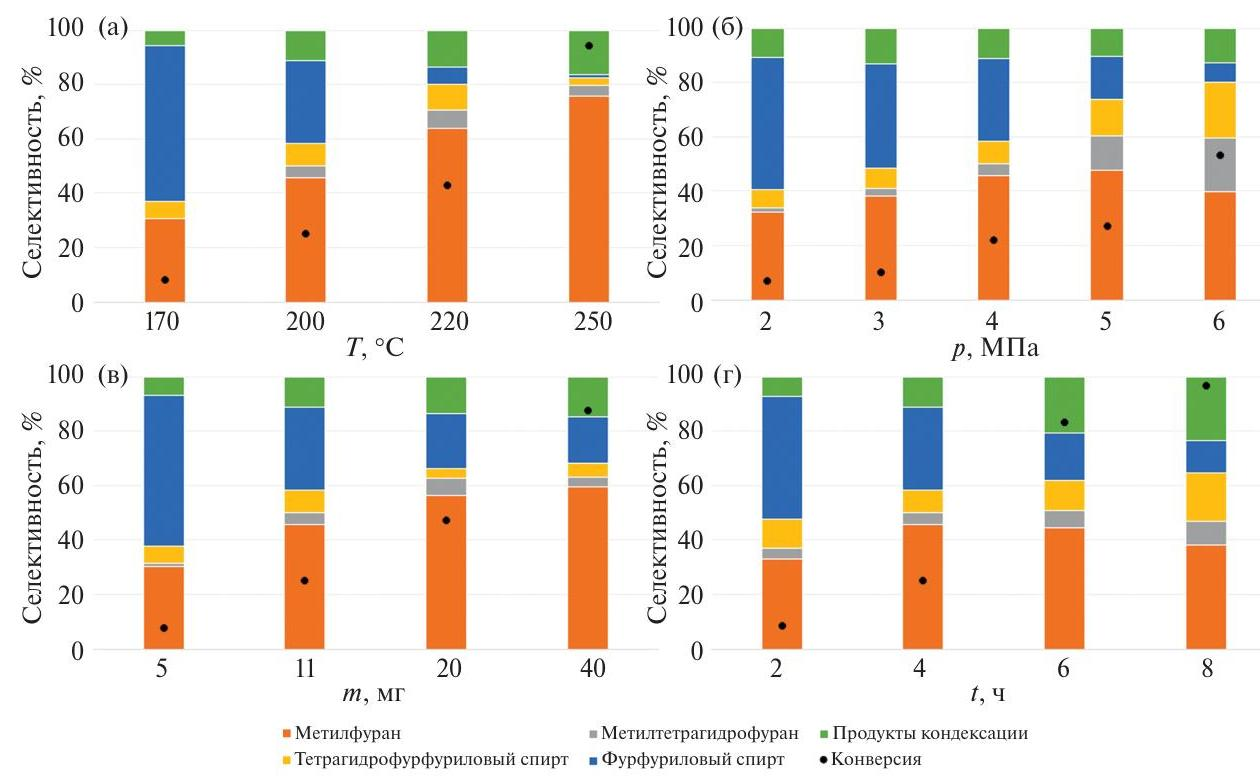

Рис. 7. Конверсия фурфурола и селективности образования продуктов его гидрирования в присутствии никельфосфидного катализатора в зависимости от: (а) - температуры; (б) - давления водорода; (в) - загрузки катализатора; (г) - продолжительности процесса гидрирования.
*Условия реакции: 50 мкл фурфурола, 2 мл толуола, далее для: (а) -11 мг катализатора, 4 МПа $\mathrm{H}_{2}, 4$ ч; (б) -11 мг катализатора, $200^{\circ} \mathrm{C}, 4$ ч; (в) -4 МПа $\mathrm{H}_{2}, 200^{\circ} \mathrm{C}, 4$ ч; (г) -4 МПа $\mathrm{H}_{2}, 200^{\circ} \mathrm{C}, 11$ мг катализатора.

При проведении реакции при 410 и $430^{\circ} \mathrm{C}$ превращение гваякола протекало количественно, однако в продуктах реакции детектировалось большое количество крезолов, диметилфенолов и бензола. При повышении температуры реакции помимо увеличения выходов по диметилфенолам, крезолам и бензолу наблюдалось снижение выходов продуктов гидрирования ароматического кольца (метилциклопентана, циклогексана, метилциклогексана, циклогексена).

При малых временах реакции в продуктах детектировали циклогексанон, однако при этом в реакционной смеси не было циклогексанола, что, вероятно, связано с его быстрой дегидратацией до циклогексена. Также необходимо отметить, что в промежутке от 3 до 12 ч селективность по бензолу не изменялась, в то время как выход по циклогексану возрастал и снизилось количество фенола и пирокатехина в реакционной смеси. Это позволяет предположить,

что превращение фенола до циклогексана и метилциклопентана может идти не только через деоксигенацию фенола с последующим гидрированием бензола, но и через гидрирование фенола с последующими деоксигенацией и гидрированием образовавшегося циклогексанола. Помимо гидродеоксигенации и гидрирования ароматических соединений происходят процессы метилирования, так, с течением времени в смеси растет содержание крезолов: если при 3-часовой реакции селективность по крезолам составляла $4 \%$, то при 12 ч - уже $12 \%$. В продуктах реакции также детектировали метилциклопентан, который, вероятно, образуется изомеризацией циклогексена.

В ходе исследования была оценена возможность совместного гидрирования гваякола и фурфурола в присутствии никельфосфидного катализатора NSMR- $\mathrm{Ni}_{2} \mathrm{P}$. При введении гваякола в реакционную смесь в условиях гидрирования фурфурола ( 23,5 мг катализатора, $250^{\circ} \mathrm{C}$,

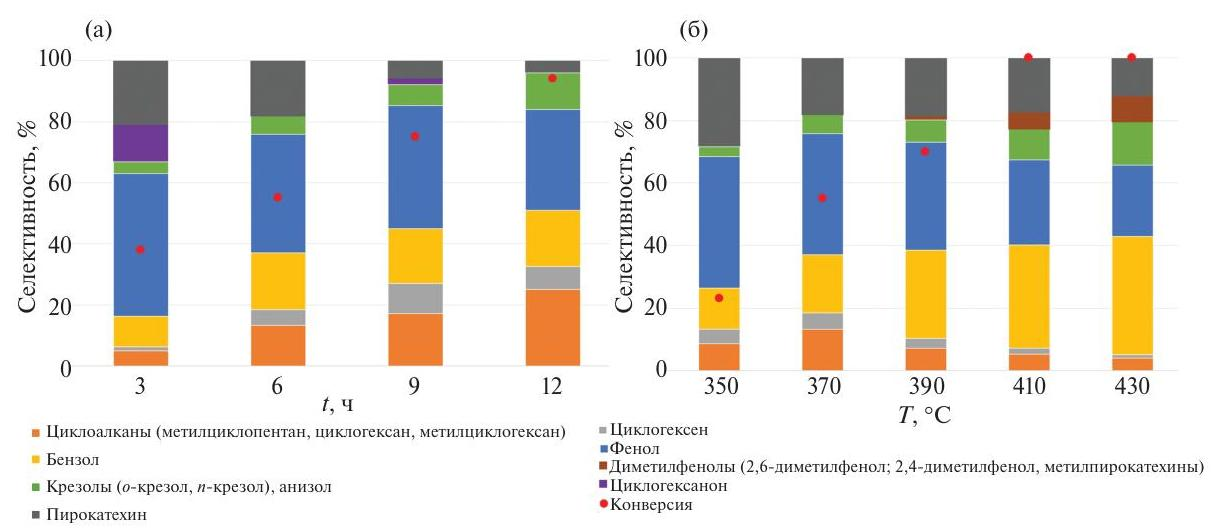

Рис. 8. Конверсия гваякола и селективности образования продуктов его гидрирования в присутствии никельфосфидного катализатора в зависимости от: (a) - температуры гидрирования; (б) - продолжительности процесса гидрирования.
Условия реакиии: 100 мкл гваякола, 2 мл толуола, 25 мг катализатора, 4 МПа $\mathrm{H}_{2}$.

4 ч, 4 МПа $\mathrm{H}_{2}, 50$ мкл фурфурола и 50 мкл гваякола) наблюдалось значительное снижение конверсии фурфурола, тогда как степень превращения гваякола не превышала $1 \%$.

При проведении гидрирования смеси при более высокой температуре ( 23,5 мг катализатора, $370^{\circ} \mathrm{C}, 9$ ч, 4 МПа $\mathrm{H}_{2}, 50$ мкл фурфурола и 50 мкл гваякола), обеспечивающей количественное превращение гваякола, в продуктах гидрирования фурфурола было обнаружено значительное количество продуктов конденсации и смол; при этом конверсия гваякола уменьшилась примерно в два раза. Таким образом, совместное гидрирование смесей фурфурола и гваякола в присутствии полученного никельфосфидного катализатора является нецелесообразным. Это указывает на необходимость рассмотрения многостадийных процессов гидрирования для оптимизации условий переработки каждого компонента.

## ВЫВОДЫ

Показано, что полученный никельфосфидный катализатор на основе мезопористого peзорцинформальдегидного полимера NSMR$\mathrm{Ni}_{2} \mathrm{P}$ активен в процессах гидродеоксигенации фурфурола и гваякола. Катализатор характеризуется высокой селективностью в превращении модельных соединений бионефти: фурфурола в 2-метилфуран, гваякола - в бензол.

## ФИНАНСИРОВАНИЕ РАБОТЫ

Исследование выполнено за счет средств гранта Российского научного фонда (проект № 22-79-10077, https://rscf.ru/project/22-79-10077).

## КОНФЛИКТ ИНТЕРЕСОВ

Авторы заявляют об отсутствии конфликта интересов, требующего раскрытия в данной статье.

## ИНФОРМАЦИЯ ОБ АВТОРАХ

Шакиров Искандер Ильгизович, ORCID: https://orcid.org/0000-0003-2029-693X

Бороноев Максим Павлович, к.х.н. ORCID: https://orcid.org/0000-0001-6129-598X

Ролдугина Екатерина Алексеевна, к.х.н. ORCID: https://orcid.org/0000-0002-9194-1097

Кардашева Юлия Сергеевна, к.х.н. ORCID: https://orcid.org/0000-0002-6580-1082

Кардашев Сергей Викторович, к.х.н. ORCID: https://orcid.org/0000-0003-1818-7697

## СПИСОК ЛИТЕРАТУРЫ

1. Lu Q., Li W.-Z., Zhu X.-F. Overview of fuel properties of biomass fast pyrolysis oils // Energy Convers.

Manage. 2009. V. 50, № 5. P. 1376-1383.
https://doi.org/10.1016/j.enconman.2009.01.001
2. Jin W., Pastor-Pérez L., Shen D., Sepúlveda-Escribano A., Gu S., Ramirez Reina T. Catalytic upgrading of biomass model compounds: novel approaches and lessons learnt from traditional hydrodeoxygenation a review // ChemCatChem. 2019. V. 11, № 3. P. 924960 .
https://doi.org/10.1002/cctc. 201801722
3. Ouedraogo A.S., Bhoi P.R. Recent progress of metals supported catalysts for hydrodeoxygenation of biomass derived pyrolysis oil // J. Clean. Prod. 2020. V. 253. ID119957.
https://doi.org/10.1016/j.jclepro.2020.119957
4. Qu L., Jiang X., Zhang Z., Zhang X.-G., Song G.-Y., Wang H.-L., Yuan Y.-P., Chang Y.-L. A review of hydrodeoxygenation of bio-oil: model compounds, catalysts, and equipment // Green Chem. 2021. V. 23, № 23. P. 9348-9376.
https://doi.org/10.1039/D1GC03183J
5. Gollakota A.R.K., Shu C.-M., Sarangi P.K., Shadangi K.P., Rakshit S., Kennedy J.F., Gupta V.K., Sharma M. Catalytic hydrodeoxygenation of bio-oil and model compounds - choice of catalysts, and mechanisms // Renew. Sustain. Energy Rev. 2023. V. 187. ID113700. https://doi.org/10.1016/j.rser.2023.113700
6. Kim S., Kwon E.E., Kim Y.T., Jung S., Kim H.J., Huber G.W., Lee J. Recent advances in hydrodeoxygenation of biomass-derived oxygenates over heterogeneous catalysts // Green Chem. 2019. V. 21, № 14. P. 3715-3743.
https://doi.org/10.1039/C9GC01210A
7. Yao G., Wu G., Dai W., Guan N., Li L. Hydrodeoxygenation of lignin-derived phenolic compounds over bi-functional Ru/H-Beta under mild conditions // Fuel. 2015. V. 150. P. 175-183.
https://doi.org/10.1016/j.fuel.2015.02.035
8. Golubeva M.A., Maximov A.L. Transition metal compounds in the hydrodeoxygenation of biomass derivatives // Renew. Sustain. Energy Rev. 2025. V. 210. ID115153.
https://doi.org/10.1016/j.rser.2024.115153
9. Бороноев М.П., Шакиров И.И., Ролдугина Е.А., Кардашева Ю.С., Кардашев С.В., Максимов А.Л., Караханов Э.А. Гидрирование гваякола на наноразмерных рутениевых нанесенных катализаторах: влияние размера частиц носителя и присутствия оксигенатов бионефти// Журн. прикл. химии. 2022. T. 95, № 10. C. 1263-1272.
http://doi.org/10.31857/S004446182210005X
[Boronoev M.P., Shakirov I.I., Roldugina E.A., Kardasheva Y.S., Kardashev S.V., Maksimov A.L., Karakhanov E.A. Hydrogenation of guaiacol on nanoscale supported ruthenium catalysts: influence of support particle size and the presence of bio-oil oxygenates // Russ. J. Appl. Chem. 2022. V. 95, № 10. P. 1555-1563. https://doi.org/10.1134/S1070427222100068]
10. Liang C., Li Z., Dai S. Mesoporous carbon materials: synthesis and modification // Angew. Chem. Int. Ed. 2008. V. 47, № 20. P. 3696-3717.
https://doi.org/10.1002/anie. 200702046
11. Wei J., Liang Y., Zhang X., Simon G.P., Zhao D., Zhang J., Jiang S., Wang H. Controllable synthesis of mesoporous carbon nanospheres and $\mathrm{Fe}-\mathrm{N} /$ carbon nanospheres as efficient oxygen reduction electrocatalysts // Nanoscale. 2015. V. 7, № 14. P. 6247-6254. https://doi.org/10.1039/C5NR00331H
12. Peroni M., Lee I., Huang X., Baráth E., Gutiérrez O.Y., Lercher J.A. Deoxygenation of palmitic acid on unsupported transition-metal phosphides // ACS Catal. 2017. V. 7, № 9. P. 6331-6341.
https://doi.org/10.1021/acscatal.7b01294
13. Golubeva M.A., Maximov A.L. Hydroprocessing of furfural over in situ generated nickel phosphide based catalysts in different solvents // Appl. Catal. A: Gen. 2020. V. 608. ID117890.
https://doi.org/10.1016/j.apcata.2020.117890
14. Wu S.-K., Lai P.-C., Lin Y.-C. Atmospheric hydrodeoxygenation of guaiacol over nickel phosphide catalysts: effect of phosphorus composition // Catal. Lett. 2014. V. 144, № 5. P. 878-889.
https://doi.org/10.1007/s10562-014-1231-7
15. Cecilia J.A., Infantes-Molina A., Rodríguez-Castellón E., Jiménez-López A. A novel method for preparing an active nickel phosphide catalyst for HDS of dibenzothiophene // J. Catal. 2009. V. 263, № 1. P. 4-15. https://doi.org/10.1016/j.jcat.2009.02.013
16. Bui P., Cecilia J.A., Oyama S.T., Takagaki A., Infan-tes-Molina A., Zhao H., Li D., Rodríguez-Castellón E., Jiménez López A. Studies of the synthesis of transition metal phosphides and their activity in the hydrodeoxygenation of a biofuel model compound // J. Catal. 2012. V. 294. P. 184-198.
https://doi.org/10.1016/j.jcat.2012.07.021
17. Wang R., Smith K.J. The effect of preparation conditions on the properties of high-surface area $\mathrm{Ni}_{2} \mathrm{P}$ catalysts // Appl. Catal. A: Gen. 2010. V. 380, № 1-2. P. $149-164$.
https://doi.org/10.1016/j.apcata.2010.03.055
18. Dai X., Song H., Yan Z., Li F., Chen Y., Wang X., Yuan D., Zhang J., Wang Y. Effect of preparation temperature on the structures and hydrodeoxygenation performance of $\mathrm{Ni}_{2} \mathrm{P} / \mathrm{C}$ catalysts prepared by decomposition of hypophosphites // New J. Chem. 2018. V. 42, № 24. P. 19917-19923.
https://doi.org/10.1039/C8NJ04628J
19. d'Aquino A. I., Danforth S.J., Clinkingbeard T.R., Ilic B., Pullan L., Reynolds M.A., Murray B.D., Bussell M.E. Highly-active nickel phosphide hydrotreating catalysts prepared in situ using nickel hypophosphite precursors // J. Catal. 2016. V. 335. P. 204-214.
https://doi.org/10.1016/j.jcat.2015.12.006

20. Li Y., Fu J., Chen B. Highly selective hydrodeoxygenation of anisole, phenol and guaiacol to benzene over nickel phosphide // RSC Adv. 2017. V. 7, № 25. P. $15272-15277$.
https://doi.org/10.1039/C7RA00989E
21. Gonçalves V.O.O., de Souza P.M., Cabioc'h T., da Silva V.T., Noronha F.B., Richard F. Hydrodeoxygenation of m-cresol over nickel and nickel phosphide based catalysts. Influence of the nature of the active phase and the support // Appl. Catal. B: Environ. 2017. V. 219. P. 619-628.
https://doi.org/10.1016/j.apcatb.2017.07.042
22. Шакиров И.И., Бороноев М.П., Кардашев С.В., Путилин Ф.Н., Караханов Э.А. Селективное гидрирование фенола с использованием нанесенного на мезопористый наносферический полимер $\mathrm{Ni}_{2} \mathrm{P}$-катализатора // Наногетерогенный катализ. 2021. T. 6, № 2. C. 92-99.
https://doi.org/10.56304/S2414215821020076
[Shakirov I.I., Boronoev M.P., Kardashev S.V., Putilin F.N., Karakhanov E.A. Selective hydrogenation of phenol using a $\mathrm{Ni}_{2} \mathrm{P}$ catalyst supported on mesoporous polymeric nanospheres // Petrol. Chem. 2021. V. 61, № 10. P. 1111-1117.
https://doi.org/10.1134/S0965544121100042]

In [16]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [17]:
import base64

# Verify image exists
image_file = Path("receipt.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "PLACE FACE UP ON DASH\nCITY OF PALO ALTO\nNOT VALID FOR\nONSTREET PARKING\n\nExpiration Date/Time\n11:59 PM\nAUG 19, 2024\n\nPurchase Date/Time: 01:34pm Aug 19, 2024\nTotal Due: $15.00\nTotal Paid: $15.00\nTicket #: 00005883\nS/N #: 520117260957\nSetting: Permit Machines\nMach Name: Civic Center\n\n#****-1224, Visa\nDISPLAY FACE UP ON DASH\n\nPERMIT EXPIRES\nAT MIDNIGHT",
            "images": [],
            "dimensions": {
                "dpi": 200,
                "height": 3210,
                "width": 1806
            }
        }
    ],
    "model": "mistral-ocr-2505-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 3110191
    },
    "document_annotation": null
}


## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [18]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))

{
    "parking_receipt": {
        "city": "Palo Alto",
        "expiration_time": "11:59 PM",
        "expiration_date": "AUG 19, 2024",
        "purchase_time": "01:34pm",
        "purchase_date": "Aug 19, 2024",
        "total_due": "$15.00",
        "total_paid": "$15.00",
        "ticket_number": "00005883",
        "serial_number": "520117260957",
        "setting": "Permit Machines",
        "machine_name": "Civic Center",
        "payment_method": "#****-1224, Visa",
        "notes": "DISPLAY FACE UP ON DASH PERMIT EXPIRES AT MIDNIGHT"
    }
}


In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [19]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "city": "Palo Alto",
    "expiration_date_time": "2024-08-19T23:59:00Z",
    "purchase_date_time": "2024-08-19T13:34:00Z",
    "total_due": 15.0,
    "total_paid": 15.0,
    "ticket_number": "00005883",
    "serial_number": "520117260957",
    "setting": "Permit Machines",
    "machine_name": "Civic Center",
    "payment_method": "Visa",
    "display_instruction": "DISPLAY FACE UP ON DASH"
}


## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [20]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64


class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.

    Args:
        image_path: Path to the image file to process

    Returns:
        StructuredOCR object containing the extracted data

    Raises:
        AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"This is the image's OCR in markdown:\n{image_ocr_markdown}\n.\n"
                        "Convert this into a structured JSON response "
                        "with the OCR contents in a sensible dictionnary."
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [21]:
# Example usage
image_path = "receipt.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "file_name": "parking_receipt",
    "topics": [
        "Parking",
        "Receipt",
        "City of Palo Alto"
    ],
    "languages": "English",
    "ocr_contents": {
        "header": "PLACE FACE UP ON DASH",
        "city": "CITY OF PALO ALTO",
        "validity": "NOT VALID FOR ONSTREET PARKING",
        "expiration": {
            "date_time": "11:59 PM AUG 19, 2024"
        },
        "purchase": {
            "date_time": "01:34pm Aug 19, 2024"
        },
        "amounts": {
            "total_due": "$15.00",
            "total_paid": "$15.00"
        },
        "ticket": {
            "number": "00005883"
        },
        "serial_number": "520117260957",
        "setting": "Permit Machines",
        "machine_name": "Civic Center",
        "payment_info": "#****-1224, Visa",
        "instructions": "DISPLAY FACE UP ON DASH",
        "expiry": "PERMIT EXPIRES AT MIDNIGHT"
    }
}


The original image for comparison can be found below.

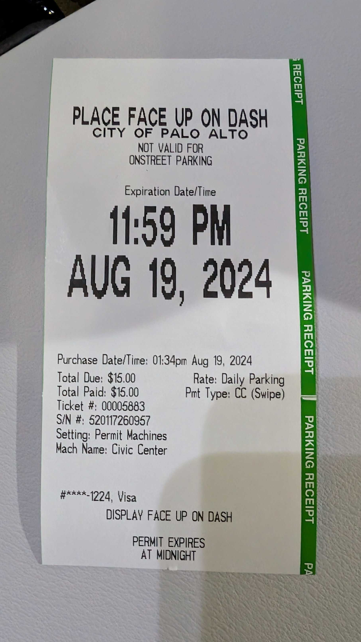

In [22]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width // 5, image.height // 5))
